In [1]:
%matplotlib inline

In [2]:
import os 
os.environ["CUDA_VISIBLE_DEVICES"]="0"

In [3]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

/usr/local/lib/python3.5/dist-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [4]:
loss_summary = [[], [], []]
pred = []

n_classes = 1
batch_size = 50
nm_epochs = 20000
train_num_batches_per_epoch = 1000 // batch_size

In [5]:
def sin_function(source):
    target = source * np.sin(source ** 2) + 1
    return target

In [6]:
def neural_network_model_0(data): #571
    hidden_1_layer = {'weights':tf.Variable(tf.truncated_normal([1, 5], stddev=0.1)),
                      'biases':tf.Variable(tf.constant(0.1, shape=[5]))}

    hidden_2_layer = {'weights':tf.Variable(tf.truncated_normal([5, 10], stddev=0.1)),
                      'biases':tf.Variable(tf.constant(0.1, shape=[10]))}

    hidden_3_layer = {'weights':tf.Variable(tf.truncated_normal([10, 10], stddev=0.1)),
                      'biases':tf.Variable(tf.constant(0.1, shape=[10]))}
    
    hidden_4_layer = {'weights':tf.Variable(tf.truncated_normal([10, 10], stddev=0.1)),
                      'biases':tf.Variable(tf.constant(0.1, shape=[10]))}
    
    hidden_5_layer = {'weights':tf.Variable(tf.truncated_normal([10, 10], stddev=0.1)),
                      'biases':tf.Variable(tf.constant(0.1, shape=[10]))}
    
    hidden_6_layer = {'weights':tf.Variable(tf.truncated_normal([10, 10], stddev=0.1)),
                      'biases':tf.Variable(tf.constant(0.1, shape=[10]))}
    
    hidden_7_layer = {'weights':tf.Variable(tf.truncated_normal([10, 5], stddev=0.1)),
                      'biases':tf.Variable(tf.constant(0.1, shape=[5]))}

    output_layer = {'weights':tf.Variable(tf.truncated_normal([5, 1], stddev=0.1)),
                    'biases':tf.Variable(tf.constant(0.1, shape=[1])),}


    l1 = tf.add(tf.matmul(data, hidden_1_layer['weights']), hidden_1_layer['biases'])
    l1 = tf.nn.relu(l1)

    l2 = tf.add(tf.matmul(l1, hidden_2_layer['weights']), hidden_2_layer['biases'])
    l2 = tf.nn.relu(l2)

    l3 = tf.add(tf.matmul(l2, hidden_3_layer['weights']), hidden_3_layer['biases'])
    l3 = tf.nn.relu(l3)
    
    l4 = tf.add(tf.matmul(l3, hidden_4_layer['weights']), hidden_4_layer['biases'])
    l4 = tf.nn.relu(l4)
    
    l5 = tf.add(tf.matmul(l4, hidden_5_layer['weights']), hidden_5_layer['biases'])
    l5 = tf.nn.relu(l5)
    
    l6 = tf.add(tf.matmul(l5, hidden_6_layer['weights']), hidden_6_layer['biases'])
    l6 = tf.nn.relu(l6)
    
    l7 = tf.add(tf.matmul(l6, hidden_7_layer['weights']), hidden_7_layer['biases'])
    l7 = tf.nn.relu(l7)

    output = tf.matmul(l7, output_layer['weights']) + output_layer['biases']

    return output

In [7]:
def neural_network_model_1(data): #572
    hidden_1_layer = {'weights':tf.Variable(tf.truncated_normal([1, 10], stddev=0.1)),
                      'biases':tf.Variable(tf.constant(0.1, shape=[10]))}

    hidden_2_layer = {'weights':tf.Variable(tf.truncated_normal([10, 18], stddev=0.1)),
                      'biases':tf.Variable(tf.constant(0.1, shape=[18]))}

    hidden_3_layer = {'weights':tf.Variable(tf.truncated_normal([18, 15], stddev=0.1)),
                      'biases':tf.Variable(tf.constant(0.1, shape=[15]))}
    
    hidden_4_layer = {'weights':tf.Variable(tf.truncated_normal([15, 4], stddev=0.1)),
                      'biases':tf.Variable(tf.constant(0.1, shape=[4]))}

    output_layer = {'weights':tf.Variable(tf.truncated_normal([4, 1], stddev=0.1)),
                    'biases':tf.Variable(tf.constant(0.1, shape=[1])),}


    l1 = tf.add(tf.matmul(data, hidden_1_layer['weights']), hidden_1_layer['biases'])
    l1 = tf.nn.relu(l1)

    l2 = tf.add(tf.matmul(l1, hidden_2_layer['weights']), hidden_2_layer['biases'])
    l2 = tf.nn.relu(l2)

    l3 = tf.add(tf.matmul(l2, hidden_3_layer['weights']), hidden_3_layer['biases'])
    l3 = tf.nn.relu(l3)
    
    l4 = tf.add(tf.matmul(l3, hidden_4_layer['weights']), hidden_4_layer['biases'])
    l4 = tf.nn.relu(l4)

    output = tf.matmul(l4, output_layer['weights']) + output_layer['biases']

    return output

In [8]:
def neural_network_model_2(data): #571
    hidden_1_layer = {'weights':tf.Variable(tf.truncated_normal([1, 190], stddev=0.1)),
                      'biases':tf.Variable(tf.constant(0.1, shape=[190]))}

    output_layer = {'weights':tf.Variable(tf.truncated_normal([190, 1], stddev=0.1)),
                    'biases':tf.Variable(tf.constant(0.1, shape=[1])),}


    l1 = tf.add(tf.matmul(data, hidden_1_layer['weights']), hidden_1_layer['biases'])
    l1 = tf.nn.relu(l1)

    output = tf.matmul(l1, output_layer['weights']) + output_layer['biases']

    return output

In [9]:
def next_batch(source, target, batch_size):

   # Shuffle data
   shuffle_indices = np.random.permutation(np.arange(len(target)))
   source = source[shuffle_indices]
   target = target[shuffle_indices]

   for batch_i in range(0, len(source)//batch_size):
      start_i = batch_i * batch_size
      source_batch = source[start_i:start_i + batch_size]
      target_batch = target[start_i:start_i + batch_size]

      yield np.array(source_batch), np.array(target_batch)

In [10]:
def train_neural_network(x):
    predictions = [neural_network_model_0(x), neural_network_model_1(x), neural_network_model_2(x)]
    for i, prediction in enumerate(predictions):
        cost = tf.reduce_mean(tf.square(prediction - y))
        optimizer = tf.train.AdamOptimizer().minimize(cost)

        config=tf.ConfigProto()
        config.gpu_options.allow_growth=True
        
        with tf.Session(config=config) as sess:
            sess.run(tf.global_variables_initializer())

            for epoch in range(nm_epochs):
                epoch_loss = 0.0
                for epoch_x, epoch_y in next_batch(source, target, batch_size):
                    _, c = sess.run([optimizer, cost], feed_dict={x: epoch_x, y: epoch_y})
                    epoch_loss += c / train_num_batches_per_epoch
                loss_summary[i].append(epoch_loss)

                print('Epoch', epoch, 'completed out of',nm_epochs,'loss:',epoch_loss)

            pred.append(sess.run(prediction, feed_dict={x:source}))

In [11]:
source = np.arange(-2, 3, 0.005).reshape(-1, 1)
target = sin_function(source)

In [12]:
source

array([[-2.00000000e+00],
       [-1.99500000e+00],
       [-1.99000000e+00],
       [-1.98500000e+00],
       [-1.98000000e+00],
       [-1.97500000e+00],
       [-1.97000000e+00],
       [-1.96500000e+00],
       [-1.96000000e+00],
       [-1.95500000e+00],
       [-1.95000000e+00],
       [-1.94500000e+00],
       [-1.94000000e+00],
       [-1.93500000e+00],
       [-1.93000000e+00],
       [-1.92500000e+00],
       [-1.92000000e+00],
       [-1.91500000e+00],
       [-1.91000000e+00],
       [-1.90500000e+00],
       [-1.90000000e+00],
       [-1.89500000e+00],
       [-1.89000000e+00],
       [-1.88500000e+00],
       [-1.88000000e+00],
       [-1.87500000e+00],
       [-1.87000000e+00],
       [-1.86500000e+00],
       [-1.86000000e+00],
       [-1.85500000e+00],
       [-1.85000000e+00],
       [-1.84500000e+00],
       [-1.84000000e+00],
       [-1.83500000e+00],
       [-1.83000000e+00],
       [-1.82500000e+00],
       [-1.82000000e+00],
       [-1.81500000e+00],
       [-1.8

In [13]:
target

array([[ 2.51360499e+00],
       [ 2.48347373e+00],
       [ 2.45295212e+00],
       [ 2.42205910e+00],
       [ 2.39081347e+00],
       [ 2.35923397e+00],
       [ 2.32733921e+00],
       [ 2.29514766e+00],
       [ 2.26267768e+00],
       [ 2.22994748e+00],
       [ 2.19697512e+00],
       [ 2.16377851e+00],
       [ 2.13037539e+00],
       [ 2.09678332e+00],
       [ 2.06301969e+00],
       [ 2.02910172e+00],
       [ 1.99504641e+00],
       [ 1.96087057e+00],
       [ 1.92659082e+00],
       [ 1.89222354e+00],
       [ 1.85778493e+00],
       [ 1.82329094e+00],
       [ 1.78875731e+00],
       [ 1.75419954e+00],
       [ 1.71963289e+00],
       [ 1.68507240e+00],
       [ 1.65053285e+00],
       [ 1.61602878e+00],
       [ 1.58157446e+00],
       [ 1.54718393e+00],
       [ 1.51287096e+00],
       [ 1.47864906e+00],
       [ 1.44453148e+00],
       [ 1.41053120e+00],
       [ 1.37666094e+00],
       [ 1.34293313e+00],
       [ 1.30935996e+00],
       [ 1.27595333e+00],
       [ 1.2

In [14]:
x = tf.placeholder(tf.float32, [None,1])
y = tf.placeholder(tf.float32,[None,1])

In [15]:
train_neural_network(x)

Epoch 0 completed out of 20000 loss: 2.0061215281486513
Epoch 1 completed out of 20000 loss: 1.9115202307701111
Epoch 2 completed out of 20000 loss: 1.8025839567184447
Epoch 3 completed out of 20000 loss: 1.6117253780364988
Epoch 4 completed out of 20000 loss: 1.2746687769889833
Epoch 5 completed out of 20000 loss: 1.1681433439254765
Epoch 6 completed out of 20000 loss: 1.143823364377022
Epoch 7 completed out of 20000 loss: 1.1278044581413267
Epoch 8 completed out of 20000 loss: 1.1089257955551148
Epoch 9 completed out of 20000 loss: 1.0967674404382708
Epoch 10 completed out of 20000 loss: 1.09313285946846
Epoch 11 completed out of 20000 loss: 1.080527821183205
Epoch 12 completed out of 20000 loss: 1.0699408590793609
Epoch 13 completed out of 20000 loss: 1.0641549915075301
Epoch 14 completed out of 20000 loss: 1.0627052664756773
Epoch 15 completed out of 20000 loss: 1.0566196709871292
Epoch 16 completed out of 20000 loss: 1.0615315079689027
Epoch 17 completed out of 20000 loss: 1.05983

Epoch 145 completed out of 20000 loss: 1.0349039047956468
Epoch 146 completed out of 20000 loss: 1.0364733904600143
Epoch 147 completed out of 20000 loss: 1.0358484894037248
Epoch 148 completed out of 20000 loss: 1.0340863734483718
Epoch 149 completed out of 20000 loss: 1.0378640800714491
Epoch 150 completed out of 20000 loss: 1.033404526114464
Epoch 151 completed out of 20000 loss: 1.0335679233074189
Epoch 152 completed out of 20000 loss: 1.0341904431581497
Epoch 153 completed out of 20000 loss: 1.0345655024051665
Epoch 154 completed out of 20000 loss: 1.0349227517843247
Epoch 155 completed out of 20000 loss: 1.0342248499393463
Epoch 156 completed out of 20000 loss: 1.0344347715377809
Epoch 157 completed out of 20000 loss: 1.0331087291240693
Epoch 158 completed out of 20000 loss: 1.034317621588707
Epoch 159 completed out of 20000 loss: 1.0323708981275557
Epoch 160 completed out of 20000 loss: 1.0336615920066832
Epoch 161 completed out of 20000 loss: 1.033863514661789
Epoch 162 complet

Epoch 290 completed out of 20000 loss: 1.0403142869472506
Epoch 291 completed out of 20000 loss: 1.0362178891897205
Epoch 292 completed out of 20000 loss: 1.0323656499385836
Epoch 293 completed out of 20000 loss: 1.0336115479469299
Epoch 294 completed out of 20000 loss: 1.0340257585048676
Epoch 295 completed out of 20000 loss: 1.035134893655777
Epoch 296 completed out of 20000 loss: 1.0327662646770477
Epoch 297 completed out of 20000 loss: 1.0348728209733964
Epoch 298 completed out of 20000 loss: 1.0336349844932557
Epoch 299 completed out of 20000 loss: 1.0326930433511736
Epoch 300 completed out of 20000 loss: 1.0355161547660827
Epoch 301 completed out of 20000 loss: 1.034934040904045
Epoch 302 completed out of 20000 loss: 1.0379835188388824
Epoch 303 completed out of 20000 loss: 1.0337901011109354
Epoch 304 completed out of 20000 loss: 1.033122456073761
Epoch 305 completed out of 20000 loss: 1.032731705904007
Epoch 306 completed out of 20000 loss: 1.0324382454156877
Epoch 307 complete

Epoch 432 completed out of 20000 loss: 1.0359577417373655
Epoch 433 completed out of 20000 loss: 1.0341137647628784
Epoch 434 completed out of 20000 loss: 1.0334366112947464
Epoch 435 completed out of 20000 loss: 1.0351563900709153
Epoch 436 completed out of 20000 loss: 1.0338237583637238
Epoch 437 completed out of 20000 loss: 1.0335728645324707
Epoch 438 completed out of 20000 loss: 1.0336855977773665
Epoch 439 completed out of 20000 loss: 1.0335391849279405
Epoch 440 completed out of 20000 loss: 1.0331225454807282
Epoch 441 completed out of 20000 loss: 1.0346714109182358
Epoch 442 completed out of 20000 loss: 1.0336075454950333
Epoch 443 completed out of 20000 loss: 1.0337610781192779
Epoch 444 completed out of 20000 loss: 1.0323837399482725
Epoch 445 completed out of 20000 loss: 1.034448504447937
Epoch 446 completed out of 20000 loss: 1.0332424491643906
Epoch 447 completed out of 20000 loss: 1.0419726252555845
Epoch 448 completed out of 20000 loss: 1.0359710127115251
Epoch 449 compl

Epoch 577 completed out of 20000 loss: 1.0323136031627655
Epoch 578 completed out of 20000 loss: 1.0361093938350676
Epoch 579 completed out of 20000 loss: 1.0337216943502425
Epoch 580 completed out of 20000 loss: 1.0369404256343842
Epoch 581 completed out of 20000 loss: 1.0333893835544585
Epoch 582 completed out of 20000 loss: 1.0322874814271927
Epoch 583 completed out of 20000 loss: 1.033198529481888
Epoch 584 completed out of 20000 loss: 1.035090720653534
Epoch 585 completed out of 20000 loss: 1.0333229124546053
Epoch 586 completed out of 20000 loss: 1.0333254724740983
Epoch 587 completed out of 20000 loss: 1.0385597676038743
Epoch 588 completed out of 20000 loss: 1.0392540246248245
Epoch 589 completed out of 20000 loss: 1.0423572719097138
Epoch 590 completed out of 20000 loss: 1.0445628792047503
Epoch 591 completed out of 20000 loss: 1.0449889659881593
Epoch 592 completed out of 20000 loss: 1.0332446426153186
Epoch 593 completed out of 20000 loss: 1.0342025727033617
Epoch 594 comple

Epoch 722 completed out of 20000 loss: 1.0324497461318969
Epoch 723 completed out of 20000 loss: 1.0341254383325575
Epoch 724 completed out of 20000 loss: 1.0324846923351287
Epoch 725 completed out of 20000 loss: 1.0349276870489121
Epoch 726 completed out of 20000 loss: 1.0348684072494507
Epoch 727 completed out of 20000 loss: 1.0332247495651243
Epoch 728 completed out of 20000 loss: 1.0362183630466462
Epoch 729 completed out of 20000 loss: 1.0336530923843383
Epoch 730 completed out of 20000 loss: 1.033057463169098
Epoch 731 completed out of 20000 loss: 1.0324126929044724
Epoch 732 completed out of 20000 loss: 1.0323187440633774
Epoch 733 completed out of 20000 loss: 1.032132339477539
Epoch 734 completed out of 20000 loss: 1.0340473502874372
Epoch 735 completed out of 20000 loss: 1.0328432321548462
Epoch 736 completed out of 20000 loss: 1.0341448903083803
Epoch 737 completed out of 20000 loss: 1.0334141939878463
Epoch 738 completed out of 20000 loss: 1.0339574396610258
Epoch 739 comple

Epoch 867 completed out of 20000 loss: 1.0358311444520951
Epoch 868 completed out of 20000 loss: 1.0338931173086165
Epoch 869 completed out of 20000 loss: 1.0347834944725034
Epoch 870 completed out of 20000 loss: 1.0379014879465103
Epoch 871 completed out of 20000 loss: 1.0348234117031097
Epoch 872 completed out of 20000 loss: 1.0319730609655382
Epoch 873 completed out of 20000 loss: 1.032340544462204
Epoch 874 completed out of 20000 loss: 1.03119036257267
Epoch 875 completed out of 20000 loss: 1.0306825071573258
Epoch 876 completed out of 20000 loss: 1.0331860065460206
Epoch 877 completed out of 20000 loss: 1.0297839492559433
Epoch 878 completed out of 20000 loss: 1.030191722512245
Epoch 879 completed out of 20000 loss: 1.0293862283229827
Epoch 880 completed out of 20000 loss: 1.0277563482522964
Epoch 881 completed out of 20000 loss: 1.0269792079925537
Epoch 882 completed out of 20000 loss: 1.0276814311742781
Epoch 883 completed out of 20000 loss: 1.0248482882976528
Epoch 884 complete

Epoch 1013 completed out of 20000 loss: 0.3077361427247524
Epoch 1014 completed out of 20000 loss: 0.30787151232361787
Epoch 1015 completed out of 20000 loss: 0.29579601660370825
Epoch 1016 completed out of 20000 loss: 0.2939142815768718
Epoch 1017 completed out of 20000 loss: 0.29437687098979953
Epoch 1018 completed out of 20000 loss: 0.29314543083310124
Epoch 1019 completed out of 20000 loss: 0.2997947961091995
Epoch 1020 completed out of 20000 loss: 0.30481652393937114
Epoch 1021 completed out of 20000 loss: 0.30510490164160725
Epoch 1022 completed out of 20000 loss: 0.29309538602828983
Epoch 1023 completed out of 20000 loss: 0.2954452335834503
Epoch 1024 completed out of 20000 loss: 0.28569381386041637
Epoch 1025 completed out of 20000 loss: 0.29461922943592067
Epoch 1026 completed out of 20000 loss: 0.3050607673823834
Epoch 1027 completed out of 20000 loss: 0.30396709367632874
Epoch 1028 completed out of 20000 loss: 0.2914194092154503
Epoch 1029 completed out of 20000 loss: 0.2903

Epoch 1153 completed out of 20000 loss: 0.2534225150942802
Epoch 1154 completed out of 20000 loss: 0.25884632766246796
Epoch 1155 completed out of 20000 loss: 0.25793188661336897
Epoch 1156 completed out of 20000 loss: 0.26236725226044655
Epoch 1157 completed out of 20000 loss: 0.25716466791927817
Epoch 1158 completed out of 20000 loss: 0.2543673016130924
Epoch 1159 completed out of 20000 loss: 0.25772020108997823
Epoch 1160 completed out of 20000 loss: 0.2591958433389664
Epoch 1161 completed out of 20000 loss: 0.25239651277661324
Epoch 1162 completed out of 20000 loss: 0.2607534553855657
Epoch 1163 completed out of 20000 loss: 0.25460752472281456
Epoch 1164 completed out of 20000 loss: 0.2632620498538017
Epoch 1165 completed out of 20000 loss: 0.2560167454183102
Epoch 1166 completed out of 20000 loss: 0.2584105975925922
Epoch 1167 completed out of 20000 loss: 0.2543291710317135
Epoch 1168 completed out of 20000 loss: 0.25624452084302907
Epoch 1169 completed out of 20000 loss: 0.256442

Epoch 1293 completed out of 20000 loss: 0.24074930772185324
Epoch 1294 completed out of 20000 loss: 0.23854367509484292
Epoch 1295 completed out of 20000 loss: 0.23915336839854714
Epoch 1296 completed out of 20000 loss: 0.23920477405190466
Epoch 1297 completed out of 20000 loss: 0.2352750468999147
Epoch 1298 completed out of 20000 loss: 0.23840561509132385
Epoch 1299 completed out of 20000 loss: 0.2407516412436962
Epoch 1300 completed out of 20000 loss: 0.23793393336236476
Epoch 1301 completed out of 20000 loss: 0.23840095996856692
Epoch 1302 completed out of 20000 loss: 0.24147018678486348
Epoch 1303 completed out of 20000 loss: 0.24269371777772902
Epoch 1304 completed out of 20000 loss: 0.23497857078909873
Epoch 1305 completed out of 20000 loss: 0.23914590179920192
Epoch 1306 completed out of 20000 loss: 0.2378749541938305
Epoch 1307 completed out of 20000 loss: 0.24188057817518704
Epoch 1308 completed out of 20000 loss: 0.2517203889787197
Epoch 1309 completed out of 20000 loss: 0.24

Epoch 1433 completed out of 20000 loss: 0.10141986403614284
Epoch 1434 completed out of 20000 loss: 0.10206384453922511
Epoch 1435 completed out of 20000 loss: 0.09178061615675688
Epoch 1436 completed out of 20000 loss: 0.08714044596999881
Epoch 1437 completed out of 20000 loss: 0.08350295573472975
Epoch 1438 completed out of 20000 loss: 0.08368730358779432
Epoch 1439 completed out of 20000 loss: 0.08139658458530903
Epoch 1440 completed out of 20000 loss: 0.07901544366031886
Epoch 1441 completed out of 20000 loss: 0.07902154400944712
Epoch 1442 completed out of 20000 loss: 0.08112489711493254
Epoch 1443 completed out of 20000 loss: 0.07805948257446291
Epoch 1444 completed out of 20000 loss: 0.07726473435759544
Epoch 1445 completed out of 20000 loss: 0.08068055156618355
Epoch 1446 completed out of 20000 loss: 0.07960414886474608
Epoch 1447 completed out of 20000 loss: 0.07889284584671259
Epoch 1448 completed out of 20000 loss: 0.07991896029561757
Epoch 1449 completed out of 20000 loss: 

Epoch 1573 completed out of 20000 loss: 0.05451133931055665
Epoch 1574 completed out of 20000 loss: 0.054995900206267836
Epoch 1575 completed out of 20000 loss: 0.056466820649802685
Epoch 1576 completed out of 20000 loss: 0.05858198776841164
Epoch 1577 completed out of 20000 loss: 0.05412488169968128
Epoch 1578 completed out of 20000 loss: 0.052553327474743124
Epoch 1579 completed out of 20000 loss: 0.052094428148120646
Epoch 1580 completed out of 20000 loss: 0.052540113404393185
Epoch 1581 completed out of 20000 loss: 0.05598914567381144
Epoch 1582 completed out of 20000 loss: 0.05655689379200339
Epoch 1583 completed out of 20000 loss: 0.05510311918333174
Epoch 1584 completed out of 20000 loss: 0.0522700959816575
Epoch 1585 completed out of 20000 loss: 0.05712668355554342
Epoch 1586 completed out of 20000 loss: 0.055005894787609574
Epoch 1587 completed out of 20000 loss: 0.05334183713421226
Epoch 1588 completed out of 20000 loss: 0.054609938524663455
Epoch 1589 completed out of 20000 

Epoch 1712 completed out of 20000 loss: 0.0466589868068695
Epoch 1713 completed out of 20000 loss: 0.047271170932799575
Epoch 1714 completed out of 20000 loss: 0.04724983805790544
Epoch 1715 completed out of 20000 loss: 0.0461015253327787
Epoch 1716 completed out of 20000 loss: 0.0456955743022263
Epoch 1717 completed out of 20000 loss: 0.04586940603330731
Epoch 1718 completed out of 20000 loss: 0.046698495279997594
Epoch 1719 completed out of 20000 loss: 0.045992468949407346
Epoch 1720 completed out of 20000 loss: 0.049611995369195944
Epoch 1721 completed out of 20000 loss: 0.05018009664490818
Epoch 1722 completed out of 20000 loss: 0.05153999719768763
Epoch 1723 completed out of 20000 loss: 0.0500808196607977
Epoch 1724 completed out of 20000 loss: 0.047063720226287846
Epoch 1725 completed out of 20000 loss: 0.044809513539075856
Epoch 1726 completed out of 20000 loss: 0.046712848078459504
Epoch 1727 completed out of 20000 loss: 0.04408647390082479
Epoch 1728 completed out of 20000 los

Epoch 1852 completed out of 20000 loss: 0.029720092844218015
Epoch 1853 completed out of 20000 loss: 0.02795608094893396
Epoch 1854 completed out of 20000 loss: 0.0275576910469681
Epoch 1855 completed out of 20000 loss: 0.027294345526024704
Epoch 1856 completed out of 20000 loss: 0.02958357720635831
Epoch 1857 completed out of 20000 loss: 0.028347936552017932
Epoch 1858 completed out of 20000 loss: 0.028010267531499267
Epoch 1859 completed out of 20000 loss: 0.026692593889310955
Epoch 1860 completed out of 20000 loss: 0.027459816914051766
Epoch 1861 completed out of 20000 loss: 0.02794580021873116
Epoch 1862 completed out of 20000 loss: 0.02904752641916275
Epoch 1863 completed out of 20000 loss: 0.031368242111057036
Epoch 1864 completed out of 20000 loss: 0.029183973046019676
Epoch 1865 completed out of 20000 loss: 0.027024075808003548
Epoch 1866 completed out of 20000 loss: 0.026463334634900092
Epoch 1867 completed out of 20000 loss: 0.02749803480692208
Epoch 1868 completed out of 200

Epoch 1988 completed out of 20000 loss: 0.015201137983240187
Epoch 1989 completed out of 20000 loss: 0.01516284013632685
Epoch 1990 completed out of 20000 loss: 0.014094062871299686
Epoch 1991 completed out of 20000 loss: 0.01452220920473337
Epoch 1992 completed out of 20000 loss: 0.0145668710116297
Epoch 1993 completed out of 20000 loss: 0.01581927826628089
Epoch 1994 completed out of 20000 loss: 0.017934057349339127
Epoch 1995 completed out of 20000 loss: 0.019252256909385323
Epoch 1996 completed out of 20000 loss: 0.024951389897614713
Epoch 1997 completed out of 20000 loss: 0.023758061742410064
Epoch 1998 completed out of 20000 loss: 0.02507230504415929
Epoch 1999 completed out of 20000 loss: 0.01692724621389061
Epoch 2000 completed out of 20000 loss: 0.015088248741813004
Epoch 2001 completed out of 20000 loss: 0.014393902895972132
Epoch 2002 completed out of 20000 loss: 0.013485073251649738
Epoch 2003 completed out of 20000 loss: 0.013158007664605977
Epoch 2004 completed out of 200

Epoch 2123 completed out of 20000 loss: 0.008893761271610854
Epoch 2124 completed out of 20000 loss: 0.015292530460283161
Epoch 2125 completed out of 20000 loss: 0.017427899152971802
Epoch 2126 completed out of 20000 loss: 0.01222057193517685
Epoch 2127 completed out of 20000 loss: 0.009648886020295323
Epoch 2128 completed out of 20000 loss: 0.007359294756315649
Epoch 2129 completed out of 20000 loss: 0.007494010403752329
Epoch 2130 completed out of 20000 loss: 0.00827435055980459
Epoch 2131 completed out of 20000 loss: 0.007359163835644722
Epoch 2132 completed out of 20000 loss: 0.008276697259861975
Epoch 2133 completed out of 20000 loss: 0.008961601275950672
Epoch 2134 completed out of 20000 loss: 0.00788624573033303
Epoch 2135 completed out of 20000 loss: 0.0076037285849452005
Epoch 2136 completed out of 20000 loss: 0.008814838365651667
Epoch 2137 completed out of 20000 loss: 0.009405762492679062
Epoch 2138 completed out of 20000 loss: 0.006666949600912631
Epoch 2139 completed out o

Epoch 2262 completed out of 20000 loss: 0.006588996481150388
Epoch 2263 completed out of 20000 loss: 0.007338382315356285
Epoch 2264 completed out of 20000 loss: 0.010324098472483455
Epoch 2265 completed out of 20000 loss: 0.006759722111746669
Epoch 2266 completed out of 20000 loss: 0.006079563847742974
Epoch 2267 completed out of 20000 loss: 0.0055159822921268635
Epoch 2268 completed out of 20000 loss: 0.005253191047813743
Epoch 2269 completed out of 20000 loss: 0.005988334293942898
Epoch 2270 completed out of 20000 loss: 0.006248470465652645
Epoch 2271 completed out of 20000 loss: 0.00667248850222677
Epoch 2272 completed out of 20000 loss: 0.006000737857539208
Epoch 2273 completed out of 20000 loss: 0.006740523641929031
Epoch 2274 completed out of 20000 loss: 0.008467619866132738
Epoch 2275 completed out of 20000 loss: 0.0056922594900243
Epoch 2276 completed out of 20000 loss: 0.005052417085971684
Epoch 2277 completed out of 20000 loss: 0.012358886667061596
Epoch 2278 completed out o

Epoch 2400 completed out of 20000 loss: 0.012258396297693252
Epoch 2401 completed out of 20000 loss: 0.005792566970922053
Epoch 2402 completed out of 20000 loss: 0.005482765170745552
Epoch 2403 completed out of 20000 loss: 0.005527875444386154
Epoch 2404 completed out of 20000 loss: 0.0051253685262054195
Epoch 2405 completed out of 20000 loss: 0.0045913482434116306
Epoch 2406 completed out of 20000 loss: 0.004458756523672491
Epoch 2407 completed out of 20000 loss: 0.005623273248784243
Epoch 2408 completed out of 20000 loss: 0.005241776362527161
Epoch 2409 completed out of 20000 loss: 0.009145531663671136
Epoch 2410 completed out of 20000 loss: 0.012181724375113848
Epoch 2411 completed out of 20000 loss: 0.007521910115610809
Epoch 2412 completed out of 20000 loss: 0.0075231357826851305
Epoch 2413 completed out of 20000 loss: 0.006445366516709328
Epoch 2414 completed out of 20000 loss: 0.006587764853611588
Epoch 2415 completed out of 20000 loss: 0.005364218773320317
Epoch 2416 completed 

Epoch 2539 completed out of 20000 loss: 0.0042087073670700175
Epoch 2540 completed out of 20000 loss: 0.005553205468459055
Epoch 2541 completed out of 20000 loss: 0.0066996960202232
Epoch 2542 completed out of 20000 loss: 0.00544194234535098
Epoch 2543 completed out of 20000 loss: 0.00505953065585345
Epoch 2544 completed out of 20000 loss: 0.005880918947514147
Epoch 2545 completed out of 20000 loss: 0.005430855753365904
Epoch 2546 completed out of 20000 loss: 0.004248544748406856
Epoch 2547 completed out of 20000 loss: 0.00379262255737558
Epoch 2548 completed out of 20000 loss: 0.0041630902560427785
Epoch 2549 completed out of 20000 loss: 0.007666210003662855
Epoch 2550 completed out of 20000 loss: 0.01171183349797502
Epoch 2551 completed out of 20000 loss: 0.007376641023438426
Epoch 2552 completed out of 20000 loss: 0.0066586845205165454
Epoch 2553 completed out of 20000 loss: 0.0041515524382703005
Epoch 2554 completed out of 20000 loss: 0.003906660771463066
Epoch 2555 completed out o

Epoch 2676 completed out of 20000 loss: 0.0040006016613915564
Epoch 2677 completed out of 20000 loss: 0.0050042510556522765
Epoch 2678 completed out of 20000 loss: 0.004390252241864799
Epoch 2679 completed out of 20000 loss: 0.003806938813067973
Epoch 2680 completed out of 20000 loss: 0.0035173134878277775
Epoch 2681 completed out of 20000 loss: 0.004862196638714522
Epoch 2682 completed out of 20000 loss: 0.007351498701609672
Epoch 2683 completed out of 20000 loss: 0.00862988446606323
Epoch 2684 completed out of 20000 loss: 0.009583799203392118
Epoch 2685 completed out of 20000 loss: 0.006304655456915499
Epoch 2686 completed out of 20000 loss: 0.008320326753892006
Epoch 2687 completed out of 20000 loss: 0.00836710089351982
Epoch 2688 completed out of 20000 loss: 0.007711180998012423
Epoch 2689 completed out of 20000 loss: 0.005100244365166874
Epoch 2690 completed out of 20000 loss: 0.0037009880761615928
Epoch 2691 completed out of 20000 loss: 0.0036819126456975933
Epoch 2692 completed 

Epoch 2810 completed out of 20000 loss: 0.003159110085107387
Epoch 2811 completed out of 20000 loss: 0.003027211595326663
Epoch 2812 completed out of 20000 loss: 0.0035929281031712892
Epoch 2813 completed out of 20000 loss: 0.003910004196222872
Epoch 2814 completed out of 20000 loss: 0.004557510575978085
Epoch 2815 completed out of 20000 loss: 0.0030889501387719068
Epoch 2816 completed out of 20000 loss: 0.003380023961653933
Epoch 2817 completed out of 20000 loss: 0.0042866395378950975
Epoch 2818 completed out of 20000 loss: 0.004766691237455234
Epoch 2819 completed out of 20000 loss: 0.0045358030125498775
Epoch 2820 completed out of 20000 loss: 0.002991008601384238
Epoch 2821 completed out of 20000 loss: 0.002919293154263869
Epoch 2822 completed out of 20000 loss: 0.003463783964980393
Epoch 2823 completed out of 20000 loss: 0.0028766409319359813
Epoch 2824 completed out of 20000 loss: 0.0032217086816672233
Epoch 2825 completed out of 20000 loss: 0.0036551183729898185
Epoch 2826 comple

Epoch 2944 completed out of 20000 loss: 0.0033568516955710948
Epoch 2945 completed out of 20000 loss: 0.00391968812327832
Epoch 2946 completed out of 20000 loss: 0.0028655857371632006
Epoch 2947 completed out of 20000 loss: 0.002527859178371728
Epoch 2948 completed out of 20000 loss: 0.002074700122466311
Epoch 2949 completed out of 20000 loss: 0.002347563317744062
Epoch 2950 completed out of 20000 loss: 0.0024263493425678464
Epoch 2951 completed out of 20000 loss: 0.0061585179617395635
Epoch 2952 completed out of 20000 loss: 0.0032902908511459827
Epoch 2953 completed out of 20000 loss: 0.0030126346217002717
Epoch 2954 completed out of 20000 loss: 0.003352420259034261
Epoch 2955 completed out of 20000 loss: 0.0036854409438092255
Epoch 2956 completed out of 20000 loss: 0.0024299965065438297
Epoch 2957 completed out of 20000 loss: 0.0026133543753530833
Epoch 2958 completed out of 20000 loss: 0.0034784286282956603
Epoch 2959 completed out of 20000 loss: 0.002610587165690959
Epoch 2960 comp

Epoch 3078 completed out of 20000 loss: 0.002455613162601367
Epoch 3079 completed out of 20000 loss: 0.0019555598031729456
Epoch 3080 completed out of 20000 loss: 0.001927681552479044
Epoch 3081 completed out of 20000 loss: 0.0017471969011239707
Epoch 3082 completed out of 20000 loss: 0.0022598318639211355
Epoch 3083 completed out of 20000 loss: 0.002347732929047197
Epoch 3084 completed out of 20000 loss: 0.0034072716662194584
Epoch 3085 completed out of 20000 loss: 0.002358974434901029
Epoch 3086 completed out of 20000 loss: 0.0029883253504522146
Epoch 3087 completed out of 20000 loss: 0.0035127479583024978
Epoch 3088 completed out of 20000 loss: 0.0029592792561743404
Epoch 3089 completed out of 20000 loss: 0.002525431115645915
Epoch 3090 completed out of 20000 loss: 0.0037347488978412002
Epoch 3091 completed out of 20000 loss: 0.00324679632904008
Epoch 3092 completed out of 20000 loss: 0.0024122095026541507
Epoch 3093 completed out of 20000 loss: 0.0023884293274022642
Epoch 3094 comp

Epoch 3214 completed out of 20000 loss: 0.0031097113678697497
Epoch 3215 completed out of 20000 loss: 0.0024491172807756816
Epoch 3216 completed out of 20000 loss: 0.0019384673447348179
Epoch 3217 completed out of 20000 loss: 0.002709058771142736
Epoch 3218 completed out of 20000 loss: 0.0032580705475993453
Epoch 3219 completed out of 20000 loss: 0.005226768099237234
Epoch 3220 completed out of 20000 loss: 0.004053798120003193
Epoch 3221 completed out of 20000 loss: 0.005019121509394609
Epoch 3222 completed out of 20000 loss: 0.010531313717365263
Epoch 3223 completed out of 20000 loss: 0.006659926020074635
Epoch 3224 completed out of 20000 loss: 0.002995705703506246
Epoch 3225 completed out of 20000 loss: 0.004315481247613207
Epoch 3226 completed out of 20000 loss: 0.0045968365098815415
Epoch 3227 completed out of 20000 loss: 0.0033871036372147495
Epoch 3228 completed out of 20000 loss: 0.0023310630815103653
Epoch 3229 completed out of 20000 loss: 0.002500473737018183
Epoch 3230 comple

Epoch 3349 completed out of 20000 loss: 0.0028866877895779904
Epoch 3350 completed out of 20000 loss: 0.0030987468198873103
Epoch 3351 completed out of 20000 loss: 0.0033859396586194634
Epoch 3352 completed out of 20000 loss: 0.002403167262673378
Epoch 3353 completed out of 20000 loss: 0.0015635225834557788
Epoch 3354 completed out of 20000 loss: 0.0017003437213134022
Epoch 3355 completed out of 20000 loss: 0.0016369254211895169
Epoch 3356 completed out of 20000 loss: 0.003495551843661815
Epoch 3357 completed out of 20000 loss: 0.0026628096413332963
Epoch 3358 completed out of 20000 loss: 0.002078475095913746
Epoch 3359 completed out of 20000 loss: 0.001975523051805794
Epoch 3360 completed out of 20000 loss: 0.002293376170564443
Epoch 3361 completed out of 20000 loss: 0.003178412572015077
Epoch 3362 completed out of 20000 loss: 0.0023054488527122887
Epoch 3363 completed out of 20000 loss: 0.0024159100197721274
Epoch 3364 completed out of 20000 loss: 0.0018137252744054421
Epoch 3365 com

Epoch 3485 completed out of 20000 loss: 0.001926314504817128
Epoch 3486 completed out of 20000 loss: 0.0018478213984053585
Epoch 3487 completed out of 20000 loss: 0.0019183177151717245
Epoch 3488 completed out of 20000 loss: 0.0021184238838031885
Epoch 3489 completed out of 20000 loss: 0.0020326091907918453
Epoch 3490 completed out of 20000 loss: 0.002565247123129666
Epoch 3491 completed out of 20000 loss: 0.0036232117796316738
Epoch 3492 completed out of 20000 loss: 0.004938842443516478
Epoch 3493 completed out of 20000 loss: 0.0027947092603426422
Epoch 3494 completed out of 20000 loss: 0.002351810928666964
Epoch 3495 completed out of 20000 loss: 0.003230737947160378
Epoch 3496 completed out of 20000 loss: 0.00289923851378262
Epoch 3497 completed out of 20000 loss: 0.003383278509136289
Epoch 3498 completed out of 20000 loss: 0.0033443403022829442
Epoch 3499 completed out of 20000 loss: 0.001988936203997582
Epoch 3500 completed out of 20000 loss: 0.002267731993924826
Epoch 3501 complet

Epoch 3619 completed out of 20000 loss: 0.0022216953861061484
Epoch 3620 completed out of 20000 loss: 0.0024536206270568076
Epoch 3621 completed out of 20000 loss: 0.001578794509987347
Epoch 3622 completed out of 20000 loss: 0.0023397509037749844
Epoch 3623 completed out of 20000 loss: 0.003473088267492131
Epoch 3624 completed out of 20000 loss: 0.0020922123221680526
Epoch 3625 completed out of 20000 loss: 0.0018750181305222213
Epoch 3626 completed out of 20000 loss: 0.006986752437660471
Epoch 3627 completed out of 20000 loss: 0.003235264419345185
Epoch 3628 completed out of 20000 loss: 0.0021503244177438316
Epoch 3629 completed out of 20000 loss: 0.0016202345344936474
Epoch 3630 completed out of 20000 loss: 0.0022077649831771847
Epoch 3631 completed out of 20000 loss: 0.0018170652183471248
Epoch 3632 completed out of 20000 loss: 0.0016744352818932385
Epoch 3633 completed out of 20000 loss: 0.003050716040888801
Epoch 3634 completed out of 20000 loss: 0.002119335683528334
Epoch 3635 com

Epoch 3753 completed out of 20000 loss: 0.002403389289975166
Epoch 3754 completed out of 20000 loss: 0.004291140119312331
Epoch 3755 completed out of 20000 loss: 0.008038765605306253
Epoch 3756 completed out of 20000 loss: 0.0034617796947713935
Epoch 3757 completed out of 20000 loss: 0.002053211070597172
Epoch 3758 completed out of 20000 loss: 0.0027234400622546664
Epoch 3759 completed out of 20000 loss: 0.0022398317174520347
Epoch 3760 completed out of 20000 loss: 0.0032934392424067483
Epoch 3761 completed out of 20000 loss: 0.0029754331044387072
Epoch 3762 completed out of 20000 loss: 0.0017140478623332458
Epoch 3763 completed out of 20000 loss: 0.0019686218758579346
Epoch 3764 completed out of 20000 loss: 0.0016864036035258321
Epoch 3765 completed out of 20000 loss: 0.0015367806219728662
Epoch 3766 completed out of 20000 loss: 0.0017200564761878923
Epoch 3767 completed out of 20000 loss: 0.0014883618918247524
Epoch 3768 completed out of 20000 loss: 0.0029238284332677718
Epoch 3769 c

Epoch 3888 completed out of 20000 loss: 0.0023648890492040664
Epoch 3889 completed out of 20000 loss: 0.002036754199070856
Epoch 3890 completed out of 20000 loss: 0.0014778804150409998
Epoch 3891 completed out of 20000 loss: 0.001610598005936481
Epoch 3892 completed out of 20000 loss: 0.0017006981477607041
Epoch 3893 completed out of 20000 loss: 0.001531669389805756
Epoch 3894 completed out of 20000 loss: 0.0014104048663284628
Epoch 3895 completed out of 20000 loss: 0.0019126600935123858
Epoch 3896 completed out of 20000 loss: 0.002633223042357713
Epoch 3897 completed out of 20000 loss: 0.005129142646910624
Epoch 3898 completed out of 20000 loss: 0.0026837202836759388
Epoch 3899 completed out of 20000 loss: 0.0037426290742587293
Epoch 3900 completed out of 20000 loss: 0.0038988785876426847
Epoch 3901 completed out of 20000 loss: 0.0024892705754609775
Epoch 3902 completed out of 20000 loss: 0.0020789517438970506
Epoch 3903 completed out of 20000 loss: 0.001761111814994365
Epoch 3904 com

Epoch 4024 completed out of 20000 loss: 0.004098490104661324
Epoch 4025 completed out of 20000 loss: 0.005048353265738115
Epoch 4026 completed out of 20000 loss: 0.0022437920502852648
Epoch 4027 completed out of 20000 loss: 0.002435320292715915
Epoch 4028 completed out of 20000 loss: 0.0019971903297118843
Epoch 4029 completed out of 20000 loss: 0.002087756065884605
Epoch 4030 completed out of 20000 loss: 0.002466363023268059
Epoch 4031 completed out of 20000 loss: 0.004345472226850687
Epoch 4032 completed out of 20000 loss: 0.0021644699678290634
Epoch 4033 completed out of 20000 loss: 0.0021365261025493966
Epoch 4034 completed out of 20000 loss: 0.0017203090945258738
Epoch 4035 completed out of 20000 loss: 0.001416578350472264
Epoch 4036 completed out of 20000 loss: 0.002058377742650919
Epoch 4037 completed out of 20000 loss: 0.0027345072070602333
Epoch 4038 completed out of 20000 loss: 0.002487166645005345
Epoch 4039 completed out of 20000 loss: 0.003822427958948538
Epoch 4040 complet

Epoch 4161 completed out of 20000 loss: 0.001928682252764702
Epoch 4162 completed out of 20000 loss: 0.001799993304302916
Epoch 4163 completed out of 20000 loss: 0.002529328502714634
Epoch 4164 completed out of 20000 loss: 0.0016449097311124208
Epoch 4165 completed out of 20000 loss: 0.0021697046497138215
Epoch 4166 completed out of 20000 loss: 0.002190604782663286
Epoch 4167 completed out of 20000 loss: 0.0020267566083930436
Epoch 4168 completed out of 20000 loss: 0.002641091827536002
Epoch 4169 completed out of 20000 loss: 0.0020186862675473094
Epoch 4170 completed out of 20000 loss: 0.0015742244519060477
Epoch 4171 completed out of 20000 loss: 0.002312942402204499
Epoch 4172 completed out of 20000 loss: 0.004011010826798157
Epoch 4173 completed out of 20000 loss: 0.0034527269715908917
Epoch 4174 completed out of 20000 loss: 0.007055874651996419
Epoch 4175 completed out of 20000 loss: 0.002595545654185116
Epoch 4176 completed out of 20000 loss: 0.0017230035213287918
Epoch 4177 comple

Epoch 4294 completed out of 20000 loss: 0.00188493249588646
Epoch 4295 completed out of 20000 loss: 0.001849235774716363
Epoch 4296 completed out of 20000 loss: 0.0013457806460792198
Epoch 4297 completed out of 20000 loss: 0.002161317743593827
Epoch 4298 completed out of 20000 loss: 0.002567319286754354
Epoch 4299 completed out of 20000 loss: 0.0019047625770326703
Epoch 4300 completed out of 20000 loss: 0.0012677818041993306
Epoch 4301 completed out of 20000 loss: 0.0014683737419545649
Epoch 4302 completed out of 20000 loss: 0.0023354502453003076
Epoch 4303 completed out of 20000 loss: 0.0021575489692622794
Epoch 4304 completed out of 20000 loss: 0.0017673111811745913
Epoch 4305 completed out of 20000 loss: 0.0016315070097334683
Epoch 4306 completed out of 20000 loss: 0.0024341206182725726
Epoch 4307 completed out of 20000 loss: 0.0033686594339087605
Epoch 4308 completed out of 20000 loss: 0.003195768169825897
Epoch 4309 completed out of 20000 loss: 0.0029107287351507693
Epoch 4310 com

Epoch 4429 completed out of 20000 loss: 0.0032642092555761346
Epoch 4430 completed out of 20000 loss: 0.0028509048977866775
Epoch 4431 completed out of 20000 loss: 0.0024963860225398087
Epoch 4432 completed out of 20000 loss: 0.0023078053956851357
Epoch 4433 completed out of 20000 loss: 0.0021408083499409257
Epoch 4434 completed out of 20000 loss: 0.0023262953152880074
Epoch 4435 completed out of 20000 loss: 0.0025999700679676606
Epoch 4436 completed out of 20000 loss: 0.0016695562226232141
Epoch 4437 completed out of 20000 loss: 0.001512555588851683
Epoch 4438 completed out of 20000 loss: 0.0016405967704486105
Epoch 4439 completed out of 20000 loss: 0.001396569819189608
Epoch 4440 completed out of 20000 loss: 0.0017076805146643893
Epoch 4441 completed out of 20000 loss: 0.0018581210053525868
Epoch 4442 completed out of 20000 loss: 0.0020735298865474762
Epoch 4443 completed out of 20000 loss: 0.0016187518165679646
Epoch 4444 completed out of 20000 loss: 0.0019310157251311469
Epoch 4445

Epoch 4563 completed out of 20000 loss: 0.002174183103488758
Epoch 4564 completed out of 20000 loss: 0.0018967045820318165
Epoch 4565 completed out of 20000 loss: 0.00215618918882683
Epoch 4566 completed out of 20000 loss: 0.002956331212772056
Epoch 4567 completed out of 20000 loss: 0.001785110562923364
Epoch 4568 completed out of 20000 loss: 0.0016606503399088977
Epoch 4569 completed out of 20000 loss: 0.0019254344166256484
Epoch 4570 completed out of 20000 loss: 0.0015490381483687088
Epoch 4571 completed out of 20000 loss: 0.002612607361515984
Epoch 4572 completed out of 20000 loss: 0.0035097020736429836
Epoch 4573 completed out of 20000 loss: 0.0023235483677126463
Epoch 4574 completed out of 20000 loss: 0.002000640641199425
Epoch 4575 completed out of 20000 loss: 0.0016642492526443675
Epoch 4576 completed out of 20000 loss: 0.0015840163454413415
Epoch 4577 completed out of 20000 loss: 0.0017205262614879762
Epoch 4578 completed out of 20000 loss: 0.00257539045996964
Epoch 4579 comple

Epoch 4700 completed out of 20000 loss: 0.0025428401539102194
Epoch 4701 completed out of 20000 loss: 0.002204814204014838
Epoch 4702 completed out of 20000 loss: 0.0016323616058798508
Epoch 4703 completed out of 20000 loss: 0.0017798609565943479
Epoch 4704 completed out of 20000 loss: 0.0027460997807793324
Epoch 4705 completed out of 20000 loss: 0.001998576792539097
Epoch 4706 completed out of 20000 loss: 0.0017484558629803362
Epoch 4707 completed out of 20000 loss: 0.001861473557073623
Epoch 4708 completed out of 20000 loss: 0.0020699585584225133
Epoch 4709 completed out of 20000 loss: 0.0015484382252907384
Epoch 4710 completed out of 20000 loss: 0.001940271121566184
Epoch 4711 completed out of 20000 loss: 0.0014208041684469206
Epoch 4712 completed out of 20000 loss: 0.0014720209728693592
Epoch 4713 completed out of 20000 loss: 0.0017700129654258487
Epoch 4714 completed out of 20000 loss: 0.0019461328745819628
Epoch 4715 completed out of 20000 loss: 0.0028248943679500373
Epoch 4716 c

Epoch 4835 completed out of 20000 loss: 0.00874829988460988
Epoch 4836 completed out of 20000 loss: 0.00355232855072245
Epoch 4837 completed out of 20000 loss: 0.0024873560323612764
Epoch 4838 completed out of 20000 loss: 0.0020806674263440074
Epoch 4839 completed out of 20000 loss: 0.0018170580267906186
Epoch 4840 completed out of 20000 loss: 0.0014928644843166694
Epoch 4841 completed out of 20000 loss: 0.0016188141307793555
Epoch 4842 completed out of 20000 loss: 0.002252224646508694
Epoch 4843 completed out of 20000 loss: 0.0019442948803771287
Epoch 4844 completed out of 20000 loss: 0.001445119976415299
Epoch 4845 completed out of 20000 loss: 0.0016389167110901326
Epoch 4846 completed out of 20000 loss: 0.001711930887540802
Epoch 4847 completed out of 20000 loss: 0.0012526616803370417
Epoch 4848 completed out of 20000 loss: 0.0015468773868633435
Epoch 4849 completed out of 20000 loss: 0.001527024430106394
Epoch 4850 completed out of 20000 loss: 0.001389904518146068
Epoch 4851 comple

Epoch 4968 completed out of 20000 loss: 0.001445636706193909
Epoch 4969 completed out of 20000 loss: 0.0013432231004117056
Epoch 4970 completed out of 20000 loss: 0.0014075984858209266
Epoch 4971 completed out of 20000 loss: 0.001617128436919302
Epoch 4972 completed out of 20000 loss: 0.0017391295376000923
Epoch 4973 completed out of 20000 loss: 0.002465615223627537
Epoch 4974 completed out of 20000 loss: 0.0017352167400531472
Epoch 4975 completed out of 20000 loss: 0.0014948696567444126
Epoch 4976 completed out of 20000 loss: 0.0021298759093042463
Epoch 4977 completed out of 20000 loss: 0.0016597670910414308
Epoch 4978 completed out of 20000 loss: 0.0015524435671977698
Epoch 4979 completed out of 20000 loss: 0.0016015652450732884
Epoch 4980 completed out of 20000 loss: 0.0015887721645412964
Epoch 4981 completed out of 20000 loss: 0.0020046090590767566
Epoch 4982 completed out of 20000 loss: 0.0020256810763385146
Epoch 4983 completed out of 20000 loss: 0.0025055368605535477
Epoch 4984 

Epoch 5102 completed out of 20000 loss: 0.0019495671760523692
Epoch 5103 completed out of 20000 loss: 0.0027371714590117336
Epoch 5104 completed out of 20000 loss: 0.0025917755207046874
Epoch 5105 completed out of 20000 loss: 0.0016453284362796694
Epoch 5106 completed out of 20000 loss: 0.001330557826440781
Epoch 5107 completed out of 20000 loss: 0.0015188060991931705
Epoch 5108 completed out of 20000 loss: 0.002012269306578673
Epoch 5109 completed out of 20000 loss: 0.0025631309661548586
Epoch 5110 completed out of 20000 loss: 0.001962344930507243
Epoch 5111 completed out of 20000 loss: 0.0014766299835173413
Epoch 5112 completed out of 20000 loss: 0.002498803293565288
Epoch 5113 completed out of 20000 loss: 0.00358146028011106
Epoch 5114 completed out of 20000 loss: 0.002141439623665065
Epoch 5115 completed out of 20000 loss: 0.0013998331589391455
Epoch 5116 completed out of 20000 loss: 0.0015498965891310946
Epoch 5117 completed out of 20000 loss: 0.0020875132060609756
Epoch 5118 comp

Epoch 5240 completed out of 20000 loss: 0.002455911063589156
Epoch 5241 completed out of 20000 loss: 0.003784479777095839
Epoch 5242 completed out of 20000 loss: 0.0023764259007293728
Epoch 5243 completed out of 20000 loss: 0.0018848558334866542
Epoch 5244 completed out of 20000 loss: 0.0018022387463133783
Epoch 5245 completed out of 20000 loss: 0.002817687159404158
Epoch 5246 completed out of 20000 loss: 0.0028257495723664765
Epoch 5247 completed out of 20000 loss: 0.0042412684211740265
Epoch 5248 completed out of 20000 loss: 0.0028883493039757006
Epoch 5249 completed out of 20000 loss: 0.002216007176321
Epoch 5250 completed out of 20000 loss: 0.0034936076786834746
Epoch 5251 completed out of 20000 loss: 0.0033983084256760773
Epoch 5252 completed out of 20000 loss: 0.0025714180344948547
Epoch 5253 completed out of 20000 loss: 0.0016191329952562228
Epoch 5254 completed out of 20000 loss: 0.0018382617970928552
Epoch 5255 completed out of 20000 loss: 0.001663948351051658
Epoch 5256 compl

Epoch 5376 completed out of 20000 loss: 0.002879601856693625
Epoch 5377 completed out of 20000 loss: 0.0032586116169113664
Epoch 5378 completed out of 20000 loss: 0.002141444419976324
Epoch 5379 completed out of 20000 loss: 0.0017868872673716396
Epoch 5380 completed out of 20000 loss: 0.002190975929261185
Epoch 5381 completed out of 20000 loss: 0.0019415315531659868
Epoch 5382 completed out of 20000 loss: 0.0014738973317435014
Epoch 5383 completed out of 20000 loss: 0.0024965815478935837
Epoch 5384 completed out of 20000 loss: 0.002224962587933987
Epoch 5385 completed out of 20000 loss: 0.0023886112903710455
Epoch 5386 completed out of 20000 loss: 0.0021246009098831566
Epoch 5387 completed out of 20000 loss: 0.0013697323680389667
Epoch 5388 completed out of 20000 loss: 0.0012819910567486658
Epoch 5389 completed out of 20000 loss: 0.0013588617526693269
Epoch 5390 completed out of 20000 loss: 0.0019279435975477098
Epoch 5391 completed out of 20000 loss: 0.001822307897964492
Epoch 5392 co

Epoch 5512 completed out of 20000 loss: 0.0024516799312550575
Epoch 5513 completed out of 20000 loss: 0.002000783395487815
Epoch 5514 completed out of 20000 loss: 0.0022995211184024815
Epoch 5515 completed out of 20000 loss: 0.002922076516551897
Epoch 5516 completed out of 20000 loss: 0.0040126045874785635
Epoch 5517 completed out of 20000 loss: 0.0033683995192404837
Epoch 5518 completed out of 20000 loss: 0.003008715936448425
Epoch 5519 completed out of 20000 loss: 0.0018449979834258556
Epoch 5520 completed out of 20000 loss: 0.0014603570045437666
Epoch 5521 completed out of 20000 loss: 0.0025093156611546877
Epoch 5522 completed out of 20000 loss: 0.0029558752867160365
Epoch 5523 completed out of 20000 loss: 0.0020899310708045954
Epoch 5524 completed out of 20000 loss: 0.0017109105479903523
Epoch 5525 completed out of 20000 loss: 0.0014724224543897432
Epoch 5526 completed out of 20000 loss: 0.0021116756834089756
Epoch 5527 completed out of 20000 loss: 0.0017686854145722466
Epoch 5528 

Epoch 5645 completed out of 20000 loss: 0.0017742228985298428
Epoch 5646 completed out of 20000 loss: 0.0013448820565827193
Epoch 5647 completed out of 20000 loss: 0.001326511474326253
Epoch 5648 completed out of 20000 loss: 0.001416416311985813
Epoch 5649 completed out of 20000 loss: 0.001611289114225656
Epoch 5650 completed out of 20000 loss: 0.0016836858005262914
Epoch 5651 completed out of 20000 loss: 0.0017447041056584567
Epoch 5652 completed out of 20000 loss: 0.0012871148734120651
Epoch 5653 completed out of 20000 loss: 0.00154958737839479
Epoch 5654 completed out of 20000 loss: 0.0012314268795307727
Epoch 5655 completed out of 20000 loss: 0.003076677484204993
Epoch 5656 completed out of 20000 loss: 0.0025557991408277298
Epoch 5657 completed out of 20000 loss: 0.001418897559051402
Epoch 5658 completed out of 20000 loss: 0.0014983350934926422
Epoch 5659 completed out of 20000 loss: 0.0013020554790273307
Epoch 5660 completed out of 20000 loss: 0.0018130456621292981
Epoch 5661 comp

Epoch 5779 completed out of 20000 loss: 0.0012952822638908402
Epoch 5780 completed out of 20000 loss: 0.0010678658058168367
Epoch 5781 completed out of 20000 loss: 0.001407892364659347
Epoch 5782 completed out of 20000 loss: 0.0013579319696873427
Epoch 5783 completed out of 20000 loss: 0.0020086204691324386
Epoch 5784 completed out of 20000 loss: 0.001586450362810865
Epoch 5785 completed out of 20000 loss: 0.001883000152884051
Epoch 5786 completed out of 20000 loss: 0.0016791762420325538
Epoch 5787 completed out of 20000 loss: 0.0011410080012865364
Epoch 5788 completed out of 20000 loss: 0.0010695682984078305
Epoch 5789 completed out of 20000 loss: 0.0012813071807613598
Epoch 5790 completed out of 20000 loss: 0.001437281392281875
Epoch 5791 completed out of 20000 loss: 0.0011475925508420916
Epoch 5792 completed out of 20000 loss: 0.0012831266067223623
Epoch 5793 completed out of 20000 loss: 0.0014672789431642744
Epoch 5794 completed out of 20000 loss: 0.0013812081393552943
Epoch 5795 c

Epoch 5915 completed out of 20000 loss: 0.0008885311719495805
Epoch 5916 completed out of 20000 loss: 0.0009847801266005263
Epoch 5917 completed out of 20000 loss: 0.0012595299456734212
Epoch 5918 completed out of 20000 loss: 0.0016257381968898697
Epoch 5919 completed out of 20000 loss: 0.0012017902103252708
Epoch 5920 completed out of 20000 loss: 0.0011900575278559699
Epoch 5921 completed out of 20000 loss: 0.0011596209136769176
Epoch 5922 completed out of 20000 loss: 0.0017671916575636715
Epoch 5923 completed out of 20000 loss: 0.0014520804659696295
Epoch 5924 completed out of 20000 loss: 0.0012609525030711666
Epoch 5925 completed out of 20000 loss: 0.00273174931644462
Epoch 5926 completed out of 20000 loss: 0.0014244299032725393
Epoch 5927 completed out of 20000 loss: 0.0013509544223779812
Epoch 5928 completed out of 20000 loss: 0.002469433983787894
Epoch 5929 completed out of 20000 loss: 0.003238910215441138
Epoch 5930 completed out of 20000 loss: 0.0016162001935299485
Epoch 5931 c

Epoch 6048 completed out of 20000 loss: 0.001296766268205829
Epoch 6049 completed out of 20000 loss: 0.0012541802716441455
Epoch 6050 completed out of 20000 loss: 0.002564225194510073
Epoch 6051 completed out of 20000 loss: 0.003275677131023257
Epoch 6052 completed out of 20000 loss: 0.006400948879308998
Epoch 6053 completed out of 20000 loss: 0.005941331374924629
Epoch 6054 completed out of 20000 loss: 0.007570837053935975
Epoch 6055 completed out of 20000 loss: 0.004018036229535938
Epoch 6056 completed out of 20000 loss: 0.002790822245879099
Epoch 6057 completed out of 20000 loss: 0.0019179376278771088
Epoch 6058 completed out of 20000 loss: 0.0011352238507242875
Epoch 6059 completed out of 20000 loss: 0.00120497215539217
Epoch 6060 completed out of 20000 loss: 0.001416201671236195
Epoch 6061 completed out of 20000 loss: 0.0011635856033535674
Epoch 6062 completed out of 20000 loss: 0.0013661188073456289
Epoch 6063 completed out of 20000 loss: 0.0015102216246305035
Epoch 6064 complete

Epoch 6181 completed out of 20000 loss: 0.0013569438859121874
Epoch 6182 completed out of 20000 loss: 0.0012587840843480082
Epoch 6183 completed out of 20000 loss: 0.0017996676819166167
Epoch 6184 completed out of 20000 loss: 0.0013860660110367462
Epoch 6185 completed out of 20000 loss: 0.0011471577308839187
Epoch 6186 completed out of 20000 loss: 0.0010346055845730005
Epoch 6187 completed out of 20000 loss: 0.0013135425862856208
Epoch 6188 completed out of 20000 loss: 0.0010143331834115087
Epoch 6189 completed out of 20000 loss: 0.0024646975012728944
Epoch 6190 completed out of 20000 loss: 0.0023348029586486518
Epoch 6191 completed out of 20000 loss: 0.0024878602853277694
Epoch 6192 completed out of 20000 loss: 0.0030810532858595256
Epoch 6193 completed out of 20000 loss: 0.001542638830142096
Epoch 6194 completed out of 20000 loss: 0.0018966890755109486
Epoch 6195 completed out of 20000 loss: 0.0013019694801187146
Epoch 6196 completed out of 20000 loss: 0.0020915906003210697
Epoch 619

Epoch 6316 completed out of 20000 loss: 0.0012271890649572018
Epoch 6317 completed out of 20000 loss: 0.0017895549215609207
Epoch 6318 completed out of 20000 loss: 0.001419999246718362
Epoch 6319 completed out of 20000 loss: 0.0013067975174635648
Epoch 6320 completed out of 20000 loss: 0.0019038390280911699
Epoch 6321 completed out of 20000 loss: 0.0030782255838857965
Epoch 6322 completed out of 20000 loss: 0.0019648296700324865
Epoch 6323 completed out of 20000 loss: 0.0011337240226566793
Epoch 6324 completed out of 20000 loss: 0.0016475389275001362
Epoch 6325 completed out of 20000 loss: 0.0025996141135692596
Epoch 6326 completed out of 20000 loss: 0.0023904454603325574
Epoch 6327 completed out of 20000 loss: 0.0017816861742176115
Epoch 6328 completed out of 20000 loss: 0.0013981273281387983
Epoch 6329 completed out of 20000 loss: 0.0011093231267295775
Epoch 6330 completed out of 20000 loss: 0.001187851498252712
Epoch 6331 completed out of 20000 loss: 0.0017586307920282706
Epoch 6332

Epoch 6451 completed out of 20000 loss: 0.001433469119365327
Epoch 6452 completed out of 20000 loss: 0.002534846609341912
Epoch 6453 completed out of 20000 loss: 0.0013023235107539224
Epoch 6454 completed out of 20000 loss: 0.0013799239415675398
Epoch 6455 completed out of 20000 loss: 0.0010108071437571198
Epoch 6456 completed out of 20000 loss: 0.0012201063131215052
Epoch 6457 completed out of 20000 loss: 0.0015243802277836948
Epoch 6458 completed out of 20000 loss: 0.0009728320816066116
Epoch 6459 completed out of 20000 loss: 0.0010651251213857904
Epoch 6460 completed out of 20000 loss: 0.001089545711874962
Epoch 6461 completed out of 20000 loss: 0.0012582493189256634
Epoch 6462 completed out of 20000 loss: 0.002159648627275601
Epoch 6463 completed out of 20000 loss: 0.0018668721197172998
Epoch 6464 completed out of 20000 loss: 0.0018399800232145934
Epoch 6465 completed out of 20000 loss: 0.002136248588794842
Epoch 6466 completed out of 20000 loss: 0.0021885212569031864
Epoch 6467 co

Epoch 6585 completed out of 20000 loss: 0.0012946053102496082
Epoch 6586 completed out of 20000 loss: 0.0010577162029221654
Epoch 6587 completed out of 20000 loss: 0.001143845783371944
Epoch 6588 completed out of 20000 loss: 0.0009849926718743516
Epoch 6589 completed out of 20000 loss: 0.0017577045247890051
Epoch 6590 completed out of 20000 loss: 0.0022823879466159266
Epoch 6591 completed out of 20000 loss: 0.002201947779394686
Epoch 6592 completed out of 20000 loss: 0.0011998822767054663
Epoch 6593 completed out of 20000 loss: 0.0015223657421302055
Epoch 6594 completed out of 20000 loss: 0.001188685558736324
Epoch 6595 completed out of 20000 loss: 0.0010635082115186378
Epoch 6596 completed out of 20000 loss: 0.0010787562699988483
Epoch 6597 completed out of 20000 loss: 0.00117184596019797
Epoch 6598 completed out of 20000 loss: 0.0027516823116457093
Epoch 6599 completed out of 20000 loss: 0.0010016564454417677
Epoch 6600 completed out of 20000 loss: 0.0012426832545315847
Epoch 6601 co

Epoch 6719 completed out of 20000 loss: 0.0017723517841659487
Epoch 6720 completed out of 20000 loss: 0.0011240460647968574
Epoch 6721 completed out of 20000 loss: 0.0025618765866965982
Epoch 6722 completed out of 20000 loss: 0.002391572581836954
Epoch 6723 completed out of 20000 loss: 0.0011835921322926881
Epoch 6724 completed out of 20000 loss: 0.0007948287558974698
Epoch 6725 completed out of 20000 loss: 0.0010418649268103765
Epoch 6726 completed out of 20000 loss: 0.001677709870273247
Epoch 6727 completed out of 20000 loss: 0.0013712833519093695
Epoch 6728 completed out of 20000 loss: 0.0007606645143823698
Epoch 6729 completed out of 20000 loss: 0.0011160220557940193
Epoch 6730 completed out of 20000 loss: 0.0008485932150506416
Epoch 6731 completed out of 20000 loss: 0.0009877250558929518
Epoch 6732 completed out of 20000 loss: 0.0008803291028016248
Epoch 6733 completed out of 20000 loss: 0.0007966408869833685
Epoch 6734 completed out of 20000 loss: 0.0009064639220014214
Epoch 6735

Epoch 6854 completed out of 20000 loss: 0.0012577786081237718
Epoch 6855 completed out of 20000 loss: 0.0010483837948413563
Epoch 6856 completed out of 20000 loss: 0.0016976705606793982
Epoch 6857 completed out of 20000 loss: 0.003038536920212209
Epoch 6858 completed out of 20000 loss: 0.001237652183044702
Epoch 6859 completed out of 20000 loss: 0.000859417612082325
Epoch 6860 completed out of 20000 loss: 0.001679659177898429
Epoch 6861 completed out of 20000 loss: 0.001042912623961456
Epoch 6862 completed out of 20000 loss: 0.0010794268309837205
Epoch 6863 completed out of 20000 loss: 0.0009126987424679102
Epoch 6864 completed out of 20000 loss: 0.001131852470280137
Epoch 6865 completed out of 20000 loss: 0.00203872159763705
Epoch 6866 completed out of 20000 loss: 0.0018090181722072883
Epoch 6867 completed out of 20000 loss: 0.0029330026940442623
Epoch 6868 completed out of 20000 loss: 0.004876997566316277
Epoch 6869 completed out of 20000 loss: 0.003950395682477391
Epoch 6870 complet

Epoch 6990 completed out of 20000 loss: 0.0020335554960183803
Epoch 6991 completed out of 20000 loss: 0.001943243821733631
Epoch 6992 completed out of 20000 loss: 0.0011361721815774217
Epoch 6993 completed out of 20000 loss: 0.0009771227050805464
Epoch 6994 completed out of 20000 loss: 0.0014216386625776065
Epoch 6995 completed out of 20000 loss: 0.0010539186099777
Epoch 6996 completed out of 20000 loss: 0.0009637847542762757
Epoch 6997 completed out of 20000 loss: 0.0008966849127318711
Epoch 6998 completed out of 20000 loss: 0.0008273940649814903
Epoch 6999 completed out of 20000 loss: 0.001185944353346713
Epoch 7000 completed out of 20000 loss: 0.00112750738626346
Epoch 7001 completed out of 20000 loss: 0.0018916885484941304
Epoch 7002 completed out of 20000 loss: 0.001440138978068717
Epoch 7003 completed out of 20000 loss: 0.0011624860795564017
Epoch 7004 completed out of 20000 loss: 0.001289900144911371
Epoch 7005 completed out of 20000 loss: 0.001398191825137474
Epoch 7006 complet

Epoch 7123 completed out of 20000 loss: 0.0014697240840177979
Epoch 7124 completed out of 20000 loss: 0.001313263428164646
Epoch 7125 completed out of 20000 loss: 0.0013473634113324807
Epoch 7126 completed out of 20000 loss: 0.0008443202546914108
Epoch 7127 completed out of 20000 loss: 0.0011312151647871358
Epoch 7128 completed out of 20000 loss: 0.0011918491713004185
Epoch 7129 completed out of 20000 loss: 0.0013481929578119892
Epoch 7130 completed out of 20000 loss: 0.0012829732237150894
Epoch 7131 completed out of 20000 loss: 0.0009397945454111324
Epoch 7132 completed out of 20000 loss: 0.001822459645336494
Epoch 7133 completed out of 20000 loss: 0.001956373776192777
Epoch 7134 completed out of 20000 loss: 0.0013056999960099345
Epoch 7135 completed out of 20000 loss: 0.0022486852161819116
Epoch 7136 completed out of 20000 loss: 0.0022856451512780042
Epoch 7137 completed out of 20000 loss: 0.0014946926094125956
Epoch 7138 completed out of 20000 loss: 0.0011463497066870332
Epoch 7139 

Epoch 7257 completed out of 20000 loss: 0.001434797010733746
Epoch 7258 completed out of 20000 loss: 0.0016372694313758981
Epoch 7259 completed out of 20000 loss: 0.000867253667092882
Epoch 7260 completed out of 20000 loss: 0.0009273588802898303
Epoch 7261 completed out of 20000 loss: 0.0008159400516888128
Epoch 7262 completed out of 20000 loss: 0.0018255295406561342
Epoch 7263 completed out of 20000 loss: 0.0022559771663509314
Epoch 7264 completed out of 20000 loss: 0.0013522644323529676
Epoch 7265 completed out of 20000 loss: 0.001132317999145016
Epoch 7266 completed out of 20000 loss: 0.0011305533174891021
Epoch 7267 completed out of 20000 loss: 0.0010752841568319128
Epoch 7268 completed out of 20000 loss: 0.0012447217595763507
Epoch 7269 completed out of 20000 loss: 0.0017141504737082868
Epoch 7270 completed out of 20000 loss: 0.002027001167880371
Epoch 7271 completed out of 20000 loss: 0.0013109819788951428
Epoch 7272 completed out of 20000 loss: 0.0013341434503672644
Epoch 7273 c

Epoch 7390 completed out of 20000 loss: 0.0012847276782849805
Epoch 7391 completed out of 20000 loss: 0.0011216585669899359
Epoch 7392 completed out of 20000 loss: 0.0012973418924957512
Epoch 7393 completed out of 20000 loss: 0.001703199671464972
Epoch 7394 completed out of 20000 loss: 0.0011705985612934454
Epoch 7395 completed out of 20000 loss: 0.0009696835448266938
Epoch 7396 completed out of 20000 loss: 0.00118569654005114
Epoch 7397 completed out of 20000 loss: 0.002120395368547179
Epoch 7398 completed out of 20000 loss: 0.003255234955577179
Epoch 7399 completed out of 20000 loss: 0.002603441316750832
Epoch 7400 completed out of 20000 loss: 0.0027499529474880554
Epoch 7401 completed out of 20000 loss: 0.0015523110254434872
Epoch 7402 completed out of 20000 loss: 0.0018163638858823105
Epoch 7403 completed out of 20000 loss: 0.0021683622821001333
Epoch 7404 completed out of 20000 loss: 0.0012646230286918578
Epoch 7405 completed out of 20000 loss: 0.0007971181767061352
Epoch 7406 com

Epoch 7526 completed out of 20000 loss: 0.0009905449580401183
Epoch 7527 completed out of 20000 loss: 0.0012379336898447947
Epoch 7528 completed out of 20000 loss: 0.0011292833674815483
Epoch 7529 completed out of 20000 loss: 0.00118613627855666
Epoch 7530 completed out of 20000 loss: 0.0010455157869728282
Epoch 7531 completed out of 20000 loss: 0.0010784934333059938
Epoch 7532 completed out of 20000 loss: 0.0008921532993554137
Epoch 7533 completed out of 20000 loss: 0.0008708882174687461
Epoch 7534 completed out of 20000 loss: 0.001339917580480687
Epoch 7535 completed out of 20000 loss: 0.0010334871767554432
Epoch 7536 completed out of 20000 loss: 0.0011830665898742152
Epoch 7537 completed out of 20000 loss: 0.001042650757881347
Epoch 7538 completed out of 20000 loss: 0.0009583956649294123
Epoch 7539 completed out of 20000 loss: 0.0011670065578073263
Epoch 7540 completed out of 20000 loss: 0.001064276715624146
Epoch 7541 completed out of 20000 loss: 0.0017016602127114312
Epoch 7542 co

Epoch 7660 completed out of 20000 loss: 0.0011269544367678464
Epoch 7661 completed out of 20000 loss: 0.0013601465034298597
Epoch 7662 completed out of 20000 loss: 0.001208246914029587
Epoch 7663 completed out of 20000 loss: 0.0022624698001891376
Epoch 7664 completed out of 20000 loss: 0.0030155437561916187
Epoch 7665 completed out of 20000 loss: 0.002436796799884178
Epoch 7666 completed out of 20000 loss: 0.0016317427624017002
Epoch 7667 completed out of 20000 loss: 0.0010978174541378394
Epoch 7668 completed out of 20000 loss: 0.0016624672221951188
Epoch 7669 completed out of 20000 loss: 0.001202343706972897
Epoch 7670 completed out of 20000 loss: 0.0015012713120086116
Epoch 7671 completed out of 20000 loss: 0.0011189564131200316
Epoch 7672 completed out of 20000 loss: 0.0014837918890407307
Epoch 7673 completed out of 20000 loss: 0.0012795725109754131
Epoch 7674 completed out of 20000 loss: 0.001053233952552546
Epoch 7675 completed out of 20000 loss: 0.000901438356959261
Epoch 7676 co

Epoch 7797 completed out of 20000 loss: 0.002791997964959592
Epoch 7798 completed out of 20000 loss: 0.0018276694259839134
Epoch 7799 completed out of 20000 loss: 0.0011780485510826109
Epoch 7800 completed out of 20000 loss: 0.0012392323871608822
Epoch 7801 completed out of 20000 loss: 0.0010141521008335984
Epoch 7802 completed out of 20000 loss: 0.0011998994305031374
Epoch 7803 completed out of 20000 loss: 0.0010692235548049212
Epoch 7804 completed out of 20000 loss: 0.001189095471636392
Epoch 7805 completed out of 20000 loss: 0.001589022565167397
Epoch 7806 completed out of 20000 loss: 0.002369328419445082
Epoch 7807 completed out of 20000 loss: 0.0017785233358154073
Epoch 7808 completed out of 20000 loss: 0.0010625540860928597
Epoch 7809 completed out of 20000 loss: 0.0009012288064695894
Epoch 7810 completed out of 20000 loss: 0.0008929238072596491
Epoch 7811 completed out of 20000 loss: 0.0006984218227444217
Epoch 7812 completed out of 20000 loss: 0.0008583856295445004
Epoch 7813 c

Epoch 7930 completed out of 20000 loss: 0.0015887181682046501
Epoch 7931 completed out of 20000 loss: 0.001758758901269175
Epoch 7932 completed out of 20000 loss: 0.0007328865875024349
Epoch 7933 completed out of 20000 loss: 0.0007120635651517661
Epoch 7934 completed out of 20000 loss: 0.0013592177565442398
Epoch 7935 completed out of 20000 loss: 0.0013637828757055103
Epoch 7936 completed out of 20000 loss: 0.001301080841221847
Epoch 7937 completed out of 20000 loss: 0.0012484480073908343
Epoch 7938 completed out of 20000 loss: 0.000992450281046331
Epoch 7939 completed out of 20000 loss: 0.0013945185113698247
Epoch 7940 completed out of 20000 loss: 0.001856757106725126
Epoch 7941 completed out of 20000 loss: 0.001033701197593473
Epoch 7942 completed out of 20000 loss: 0.0013510184624465182
Epoch 7943 completed out of 20000 loss: 0.001568514510290697
Epoch 7944 completed out of 20000 loss: 0.0010828517784830182
Epoch 7945 completed out of 20000 loss: 0.0009489957665209661
Epoch 7946 com

Epoch 8067 completed out of 20000 loss: 0.0009902819379931313
Epoch 8068 completed out of 20000 loss: 0.000791770638898015
Epoch 8069 completed out of 20000 loss: 0.0008160011493600903
Epoch 8070 completed out of 20000 loss: 0.0009176926687359811
Epoch 8071 completed out of 20000 loss: 0.0008804126264294607
Epoch 8072 completed out of 20000 loss: 0.0017261987522942948
Epoch 8073 completed out of 20000 loss: 0.0010590720979962497
Epoch 8074 completed out of 20000 loss: 0.0009229484625393525
Epoch 8075 completed out of 20000 loss: 0.0010840671398909762
Epoch 8076 completed out of 20000 loss: 0.0011373823275789617
Epoch 8077 completed out of 20000 loss: 0.0010349383897846566
Epoch 8078 completed out of 20000 loss: 0.0011361805591150187
Epoch 8079 completed out of 20000 loss: 0.0020543314632959666
Epoch 8080 completed out of 20000 loss: 0.0011372095468686894
Epoch 8081 completed out of 20000 loss: 0.0009273788135033101
Epoch 8082 completed out of 20000 loss: 0.001203341904329136
Epoch 8083

Epoch 8203 completed out of 20000 loss: 0.0010112813120940701
Epoch 8204 completed out of 20000 loss: 0.0025120360747678205
Epoch 8205 completed out of 20000 loss: 0.0020390446079545654
Epoch 8206 completed out of 20000 loss: 0.0013017195247812194
Epoch 8207 completed out of 20000 loss: 0.0015647159190848472
Epoch 8208 completed out of 20000 loss: 0.0012658974912483243
Epoch 8209 completed out of 20000 loss: 0.0020694352540886027
Epoch 8210 completed out of 20000 loss: 0.002412689221091568
Epoch 8211 completed out of 20000 loss: 0.0015904341853456572
Epoch 8212 completed out of 20000 loss: 0.0008663189073558899
Epoch 8213 completed out of 20000 loss: 0.0007099673282937145
Epoch 8214 completed out of 20000 loss: 0.0008254436848801561
Epoch 8215 completed out of 20000 loss: 0.0008644573201308958
Epoch 8216 completed out of 20000 loss: 0.0008436439762590452
Epoch 8217 completed out of 20000 loss: 0.0008452967507764698
Epoch 8218 completed out of 20000 loss: 0.0009087453508982436
Epoch 821

Epoch 8339 completed out of 20000 loss: 0.001399449713062495
Epoch 8340 completed out of 20000 loss: 0.0018028059566859158
Epoch 8341 completed out of 20000 loss: 0.001285730834933929
Epoch 8342 completed out of 20000 loss: 0.0012759963923599572
Epoch 8343 completed out of 20000 loss: 0.0014708100119605661
Epoch 8344 completed out of 20000 loss: 0.0008170817396603525
Epoch 8345 completed out of 20000 loss: 0.0006825374395702966
Epoch 8346 completed out of 20000 loss: 0.0007705320575041697
Epoch 8347 completed out of 20000 loss: 0.0008920065709389746
Epoch 8348 completed out of 20000 loss: 0.0008023177215363831
Epoch 8349 completed out of 20000 loss: 0.0008168347980245016
Epoch 8350 completed out of 20000 loss: 0.0007748024087049997
Epoch 8351 completed out of 20000 loss: 0.0009185431161313318
Epoch 8352 completed out of 20000 loss: 0.0010184707964072004
Epoch 8353 completed out of 20000 loss: 0.001003326874342747
Epoch 8354 completed out of 20000 loss: 0.0010367841867264358
Epoch 8355 

Epoch 8476 completed out of 20000 loss: 0.0013000609702430667
Epoch 8477 completed out of 20000 loss: 0.0009780428576050327
Epoch 8478 completed out of 20000 loss: 0.0013393954315688461
Epoch 8479 completed out of 20000 loss: 0.0009996373381000012
Epoch 8480 completed out of 20000 loss: 0.0015385412159957923
Epoch 8481 completed out of 20000 loss: 0.0011116176523501054
Epoch 8482 completed out of 20000 loss: 0.0011770218086894603
Epoch 8483 completed out of 20000 loss: 0.0010313095612218604
Epoch 8484 completed out of 20000 loss: 0.001327702733397018
Epoch 8485 completed out of 20000 loss: 0.0014659019012469797
Epoch 8486 completed out of 20000 loss: 0.0009677523368736728
Epoch 8487 completed out of 20000 loss: 0.0013999132614117113
Epoch 8488 completed out of 20000 loss: 0.0015447706682607536
Epoch 8489 completed out of 20000 loss: 0.0010530586790991946
Epoch 8490 completed out of 20000 loss: 0.0007295930699910969
Epoch 8491 completed out of 20000 loss: 0.0007314895497984253
Epoch 849

Epoch 8612 completed out of 20000 loss: 0.0024726178467972203
Epoch 8613 completed out of 20000 loss: 0.002342462434899062
Epoch 8614 completed out of 20000 loss: 0.0026247664616676045
Epoch 8615 completed out of 20000 loss: 0.001284351889626123
Epoch 8616 completed out of 20000 loss: 0.0007873605412896722
Epoch 8617 completed out of 20000 loss: 0.0011924705060664565
Epoch 8618 completed out of 20000 loss: 0.0014098387036938222
Epoch 8619 completed out of 20000 loss: 0.0016986841888865455
Epoch 8620 completed out of 20000 loss: 0.0012314124032855032
Epoch 8621 completed out of 20000 loss: 0.0014087332470808177
Epoch 8622 completed out of 20000 loss: 0.0030933465197449553
Epoch 8623 completed out of 20000 loss: 0.0037232034839689734
Epoch 8624 completed out of 20000 loss: 0.004970647150184961
Epoch 8625 completed out of 20000 loss: 0.0019611111696576696
Epoch 8626 completed out of 20000 loss: 0.001380484487162903
Epoch 8627 completed out of 20000 loss: 0.0008299122753669507
Epoch 8628 c

Epoch 8747 completed out of 20000 loss: 0.001738548229332082
Epoch 8748 completed out of 20000 loss: 0.0018006816389970481
Epoch 8749 completed out of 20000 loss: 0.004108909811475314
Epoch 8750 completed out of 20000 loss: 0.001526431973616127
Epoch 8751 completed out of 20000 loss: 0.001248762401519343
Epoch 8752 completed out of 20000 loss: 0.0018199242302216591
Epoch 8753 completed out of 20000 loss: 0.0012604458781424908
Epoch 8754 completed out of 20000 loss: 0.0012883324408903716
Epoch 8755 completed out of 20000 loss: 0.0012956225778907534
Epoch 8756 completed out of 20000 loss: 0.0010966049536364154
Epoch 8757 completed out of 20000 loss: 0.001144402583304327
Epoch 8758 completed out of 20000 loss: 0.0013098838244331998
Epoch 8759 completed out of 20000 loss: 0.0011917456169612704
Epoch 8760 completed out of 20000 loss: 0.0010122784966370092
Epoch 8761 completed out of 20000 loss: 0.001094845436455216
Epoch 8762 completed out of 20000 loss: 0.0019775735883740706
Epoch 8763 com

Epoch 8881 completed out of 20000 loss: 0.0007863449223805219
Epoch 8882 completed out of 20000 loss: 0.0006515415574540385
Epoch 8883 completed out of 20000 loss: 0.0006362122876453213
Epoch 8884 completed out of 20000 loss: 0.0007617394512635656
Epoch 8885 completed out of 20000 loss: 0.0009071130843949504
Epoch 8886 completed out of 20000 loss: 0.0007026781182503329
Epoch 8887 completed out of 20000 loss: 0.0005596088434685953
Epoch 8888 completed out of 20000 loss: 0.0005447120842291042
Epoch 8889 completed out of 20000 loss: 0.0005544389015994965
Epoch 8890 completed out of 20000 loss: 0.0005329542356776073
Epoch 8891 completed out of 20000 loss: 0.0005702474009012803
Epoch 8892 completed out of 20000 loss: 0.0005844127445016056
Epoch 8893 completed out of 20000 loss: 0.0006108045461587607
Epoch 8894 completed out of 20000 loss: 0.0005715040766517632
Epoch 8895 completed out of 20000 loss: 0.0006188187995576298
Epoch 8896 completed out of 20000 loss: 0.0007322271776502021
Epoch 88

Epoch 9018 completed out of 20000 loss: 0.000765936511743348
Epoch 9019 completed out of 20000 loss: 0.0007650456158444285
Epoch 9020 completed out of 20000 loss: 0.001587326996377669
Epoch 9021 completed out of 20000 loss: 0.0017240526591194793
Epoch 9022 completed out of 20000 loss: 0.0009678379530669192
Epoch 9023 completed out of 20000 loss: 0.0008345519207068717
Epoch 9024 completed out of 20000 loss: 0.0010656166326953097
Epoch 9025 completed out of 20000 loss: 0.001454229757655412
Epoch 9026 completed out of 20000 loss: 0.0009149701014393941
Epoch 9027 completed out of 20000 loss: 0.0009340749587863685
Epoch 9028 completed out of 20000 loss: 0.0008800849172985181
Epoch 9029 completed out of 20000 loss: 0.0007792947173584253
Epoch 9030 completed out of 20000 loss: 0.0007774539932142941
Epoch 9031 completed out of 20000 loss: 0.0006682932493276895
Epoch 9032 completed out of 20000 loss: 0.0007512105003115722
Epoch 9033 completed out of 20000 loss: 0.000799279211787507
Epoch 9034 c

Epoch 9153 completed out of 20000 loss: 0.0013479289555107241
Epoch 9154 completed out of 20000 loss: 0.0013099267162033359
Epoch 9155 completed out of 20000 loss: 0.0013228344760136679
Epoch 9156 completed out of 20000 loss: 0.00117771954392083
Epoch 9157 completed out of 20000 loss: 0.0010796840957482345
Epoch 9158 completed out of 20000 loss: 0.000995551503729075
Epoch 9159 completed out of 20000 loss: 0.0010624889226164673
Epoch 9160 completed out of 20000 loss: 0.0012013480198220352
Epoch 9161 completed out of 20000 loss: 0.0017772055842215197
Epoch 9162 completed out of 20000 loss: 0.0006337444079690613
Epoch 9163 completed out of 20000 loss: 0.0005780270788818596
Epoch 9164 completed out of 20000 loss: 0.0007219670442282221
Epoch 9165 completed out of 20000 loss: 0.0013201498775742948
Epoch 9166 completed out of 20000 loss: 0.0010380061256000772
Epoch 9167 completed out of 20000 loss: 0.0006980812162510119
Epoch 9168 completed out of 20000 loss: 0.0010651481585227883
Epoch 9169 

Epoch 9290 completed out of 20000 loss: 0.0006963673833524809
Epoch 9291 completed out of 20000 loss: 0.0008676240700879134
Epoch 9292 completed out of 20000 loss: 0.0006027252282365225
Epoch 9293 completed out of 20000 loss: 0.00065975388570223
Epoch 9294 completed out of 20000 loss: 0.0006297572806943209
Epoch 9295 completed out of 20000 loss: 0.001463745758519508
Epoch 9296 completed out of 20000 loss: 0.0032310433743987232
Epoch 9297 completed out of 20000 loss: 0.001603099863859825
Epoch 9298 completed out of 20000 loss: 0.0007882545571192166
Epoch 9299 completed out of 20000 loss: 0.0008516429195879029
Epoch 9300 completed out of 20000 loss: 0.000757986590906512
Epoch 9301 completed out of 20000 loss: 0.0009535471152048558
Epoch 9302 completed out of 20000 loss: 0.0006160422519315034
Epoch 9303 completed out of 20000 loss: 0.0006953995383810253
Epoch 9304 completed out of 20000 loss: 0.000906121212756261
Epoch 9305 completed out of 20000 loss: 0.0013677478564204648
Epoch 9306 com

Epoch 9426 completed out of 20000 loss: 0.0006600776367122308
Epoch 9427 completed out of 20000 loss: 0.0005076807792647742
Epoch 9428 completed out of 20000 loss: 0.0005022532655857504
Epoch 9429 completed out of 20000 loss: 0.0011063065816415473
Epoch 9430 completed out of 20000 loss: 0.0016468636022182184
Epoch 9431 completed out of 20000 loss: 0.0007753938538371586
Epoch 9432 completed out of 20000 loss: 0.0007451946454239075
Epoch 9433 completed out of 20000 loss: 0.0005519792641280219
Epoch 9434 completed out of 20000 loss: 0.0006617900231503882
Epoch 9435 completed out of 20000 loss: 0.0005512781950528734
Epoch 9436 completed out of 20000 loss: 0.000615623450721614
Epoch 9437 completed out of 20000 loss: 0.0005991672558593563
Epoch 9438 completed out of 20000 loss: 0.0006845012787380257
Epoch 9439 completed out of 20000 loss: 0.0007275044525158592
Epoch 9440 completed out of 20000 loss: 0.0008781533455476165
Epoch 9441 completed out of 20000 loss: 0.0005779237806564198
Epoch 944

Epoch 9560 completed out of 20000 loss: 0.0013279987237183378
Epoch 9561 completed out of 20000 loss: 0.001410283401492052
Epoch 9562 completed out of 20000 loss: 0.0018457321421010418
Epoch 9563 completed out of 20000 loss: 0.0014025917073013261
Epoch 9564 completed out of 20000 loss: 0.0009872318740235641
Epoch 9565 completed out of 20000 loss: 0.0005668932382832281
Epoch 9566 completed out of 20000 loss: 0.0009437559652724304
Epoch 9567 completed out of 20000 loss: 0.0007642755474080331
Epoch 9568 completed out of 20000 loss: 0.0008667015514220111
Epoch 9569 completed out of 20000 loss: 0.0005957112996838986
Epoch 9570 completed out of 20000 loss: 0.0006334861376672054
Epoch 9571 completed out of 20000 loss: 0.0006903089641127736
Epoch 9572 completed out of 20000 loss: 0.0009928264596965166
Epoch 9573 completed out of 20000 loss: 0.000713664953946136
Epoch 9574 completed out of 20000 loss: 0.0006198731454787776
Epoch 9575 completed out of 20000 loss: 0.0005432061429019086
Epoch 9576

Epoch 9694 completed out of 20000 loss: 0.0008586211493820882
Epoch 9695 completed out of 20000 loss: 0.0008319969958392903
Epoch 9696 completed out of 20000 loss: 0.0007324002508539708
Epoch 9697 completed out of 20000 loss: 0.0009036234245286324
Epoch 9698 completed out of 20000 loss: 0.001083151251077652
Epoch 9699 completed out of 20000 loss: 0.001136938834679313
Epoch 9700 completed out of 20000 loss: 0.0016371826379327097
Epoch 9701 completed out of 20000 loss: 0.0007859990204451607
Epoch 9702 completed out of 20000 loss: 0.0007003950682701542
Epoch 9703 completed out of 20000 loss: 0.0011390406172722578
Epoch 9704 completed out of 20000 loss: 0.0011289607180515306
Epoch 9705 completed out of 20000 loss: 0.0013899277779273688
Epoch 9706 completed out of 20000 loss: 0.0007480086031137034
Epoch 9707 completed out of 20000 loss: 0.0005083351556095293
Epoch 9708 completed out of 20000 loss: 0.0005838679884618614
Epoch 9709 completed out of 20000 loss: 0.0007836481963749975
Epoch 9710

Epoch 9831 completed out of 20000 loss: 0.0006916426209500061
Epoch 9832 completed out of 20000 loss: 0.0008398520600167104
Epoch 9833 completed out of 20000 loss: 0.0008112470881314948
Epoch 9834 completed out of 20000 loss: 0.0010160155579796992
Epoch 9835 completed out of 20000 loss: 0.0007494069213862531
Epoch 9836 completed out of 20000 loss: 0.0005032630273490214
Epoch 9837 completed out of 20000 loss: 0.0008344313755515032
Epoch 9838 completed out of 20000 loss: 0.0008111477669444867
Epoch 9839 completed out of 20000 loss: 0.0009121127746766434
Epoch 9840 completed out of 20000 loss: 0.0009824164255405772
Epoch 9841 completed out of 20000 loss: 0.002403870088164694
Epoch 9842 completed out of 20000 loss: 0.0010281710012350232
Epoch 9843 completed out of 20000 loss: 0.0006274056941037998
Epoch 9844 completed out of 20000 loss: 0.0008179593700333497
Epoch 9845 completed out of 20000 loss: 0.0005219324812060222
Epoch 9846 completed out of 20000 loss: 0.0005718220461858435
Epoch 984

Epoch 9966 completed out of 20000 loss: 0.0006800302973715589
Epoch 9967 completed out of 20000 loss: 0.0005730432807467878
Epoch 9968 completed out of 20000 loss: 0.0007485663882107474
Epoch 9969 completed out of 20000 loss: 0.0006564625844475814
Epoch 9970 completed out of 20000 loss: 0.0009671688821981661
Epoch 9971 completed out of 20000 loss: 0.0007918186209280975
Epoch 9972 completed out of 20000 loss: 0.0008200037438655274
Epoch 9973 completed out of 20000 loss: 0.0005955150991212577
Epoch 9974 completed out of 20000 loss: 0.0009098221926251426
Epoch 9975 completed out of 20000 loss: 0.0006467721905210054
Epoch 9976 completed out of 20000 loss: 0.0005286187239107676
Epoch 9977 completed out of 20000 loss: 0.0006148341068183072
Epoch 9978 completed out of 20000 loss: 0.0005840803030878305
Epoch 9979 completed out of 20000 loss: 0.0006990105801378379
Epoch 9980 completed out of 20000 loss: 0.0012883992894785479
Epoch 9981 completed out of 20000 loss: 0.0016719037288567054
Epoch 99

Epoch 10098 completed out of 20000 loss: 0.0006702002399833874
Epoch 10099 completed out of 20000 loss: 0.0010029942204710098
Epoch 10100 completed out of 20000 loss: 0.0016764806874562052
Epoch 10101 completed out of 20000 loss: 0.0010822720199939794
Epoch 10102 completed out of 20000 loss: 0.001017690855951514
Epoch 10103 completed out of 20000 loss: 0.0007940823386888952
Epoch 10104 completed out of 20000 loss: 0.000551763926341664
Epoch 10105 completed out of 20000 loss: 0.0007483305220375769
Epoch 10106 completed out of 20000 loss: 0.0008912603807402774
Epoch 10107 completed out of 20000 loss: 0.0006471964923548512
Epoch 10108 completed out of 20000 loss: 0.0007169476899434811
Epoch 10109 completed out of 20000 loss: 0.0007102994481101633
Epoch 10110 completed out of 20000 loss: 0.000822731011430733
Epoch 10111 completed out of 20000 loss: 0.0006143640363006854
Epoch 10112 completed out of 20000 loss: 0.0007316856033867224
Epoch 10113 completed out of 20000 loss: 0.000813216922688

Epoch 10233 completed out of 20000 loss: 0.0008726058498723433
Epoch 10234 completed out of 20000 loss: 0.0007767767427139917
Epoch 10235 completed out of 20000 loss: 0.0006272877712035553
Epoch 10236 completed out of 20000 loss: 0.0012118648955947717
Epoch 10237 completed out of 20000 loss: 0.003837371707777493
Epoch 10238 completed out of 20000 loss: 0.00233718273229897
Epoch 10239 completed out of 20000 loss: 0.0008332908866577782
Epoch 10240 completed out of 20000 loss: 0.0008586162031861021
Epoch 10241 completed out of 20000 loss: 0.0010148739762371407
Epoch 10242 completed out of 20000 loss: 0.0009922044948325493
Epoch 10243 completed out of 20000 loss: 0.0006449621680076234
Epoch 10244 completed out of 20000 loss: 0.0009691480474430137
Epoch 10245 completed out of 20000 loss: 0.0009435503350687213
Epoch 10246 completed out of 20000 loss: 0.001259272491734009
Epoch 10247 completed out of 20000 loss: 0.001570434169843793
Epoch 10248 completed out of 20000 loss: 0.00191124203265644

Epoch 10368 completed out of 20000 loss: 0.0009771264711162075
Epoch 10369 completed out of 20000 loss: 0.0013236925733508542
Epoch 10370 completed out of 20000 loss: 0.0007859737117541954
Epoch 10371 completed out of 20000 loss: 0.0007069766274071297
Epoch 10372 completed out of 20000 loss: 0.00091835751227336
Epoch 10373 completed out of 20000 loss: 0.00074849993980024
Epoch 10374 completed out of 20000 loss: 0.0010672366559447257
Epoch 10375 completed out of 20000 loss: 0.0010759018812677823
Epoch 10376 completed out of 20000 loss: 0.0008563043287722391
Epoch 10377 completed out of 20000 loss: 0.0009237602658686227
Epoch 10378 completed out of 20000 loss: 0.0005326924059772864
Epoch 10379 completed out of 20000 loss: 0.0005730569871957413
Epoch 10380 completed out of 20000 loss: 0.0007822030820534565
Epoch 10381 completed out of 20000 loss: 0.000650076344027184
Epoch 10382 completed out of 20000 loss: 0.0011323941318551079
Epoch 10383 completed out of 20000 loss: 0.00143888446327764

Epoch 10503 completed out of 20000 loss: 0.0013065678067505357
Epoch 10504 completed out of 20000 loss: 0.0023145239014411346
Epoch 10505 completed out of 20000 loss: 0.0019215813837945462
Epoch 10506 completed out of 20000 loss: 0.0014304897806141528
Epoch 10507 completed out of 20000 loss: 0.0007404745891108177
Epoch 10508 completed out of 20000 loss: 0.00054265717335511
Epoch 10509 completed out of 20000 loss: 0.0005375625027227216
Epoch 10510 completed out of 20000 loss: 0.00048654243437340483
Epoch 10511 completed out of 20000 loss: 0.0006915720412507653
Epoch 10512 completed out of 20000 loss: 0.000666239217389375
Epoch 10513 completed out of 20000 loss: 0.0006900774460518733
Epoch 10514 completed out of 20000 loss: 0.0006341356885968709
Epoch 10515 completed out of 20000 loss: 0.0007565131265437229
Epoch 10516 completed out of 20000 loss: 0.000883510946005117
Epoch 10517 completed out of 20000 loss: 0.0021650708833476527
Epoch 10518 completed out of 20000 loss: 0.000878782095969

Epoch 10635 completed out of 20000 loss: 0.000631285177951213
Epoch 10636 completed out of 20000 loss: 0.0008031980760279113
Epoch 10637 completed out of 20000 loss: 0.0006179044939926825
Epoch 10638 completed out of 20000 loss: 0.0005718858315958642
Epoch 10639 completed out of 20000 loss: 0.000728080386761576
Epoch 10640 completed out of 20000 loss: 0.000639687920192955
Epoch 10641 completed out of 20000 loss: 0.0008221780139137991
Epoch 10642 completed out of 20000 loss: 0.001362863840768114
Epoch 10643 completed out of 20000 loss: 0.0010970013565383854
Epoch 10644 completed out of 20000 loss: 0.0009878257202217355
Epoch 10645 completed out of 20000 loss: 0.0014078973355935885
Epoch 10646 completed out of 20000 loss: 0.0017590876668691637
Epoch 10647 completed out of 20000 loss: 0.0008108522379188798
Epoch 10648 completed out of 20000 loss: 0.0014397865714272486
Epoch 10649 completed out of 20000 loss: 0.0019422418874455616
Epoch 10650 completed out of 20000 loss: 0.0020230245252605

Epoch 10770 completed out of 20000 loss: 0.0013100300697260537
Epoch 10771 completed out of 20000 loss: 0.0008065161222475581
Epoch 10772 completed out of 20000 loss: 0.001491810256266035
Epoch 10773 completed out of 20000 loss: 0.0006017150546540507
Epoch 10774 completed out of 20000 loss: 0.001283230181434192
Epoch 10775 completed out of 20000 loss: 0.002165349456481635
Epoch 10776 completed out of 20000 loss: 0.001232035155408084
Epoch 10777 completed out of 20000 loss: 0.0008328837866429238
Epoch 10778 completed out of 20000 loss: 0.0006650758361502085
Epoch 10779 completed out of 20000 loss: 0.0006959014877793379
Epoch 10780 completed out of 20000 loss: 0.0007114226944395342
Epoch 10781 completed out of 20000 loss: 0.0006924473025719635
Epoch 10782 completed out of 20000 loss: 0.0006434984927182086
Epoch 10783 completed out of 20000 loss: 0.0007981625618413091
Epoch 10784 completed out of 20000 loss: 0.0005397000262746587
Epoch 10785 completed out of 20000 loss: 0.0005658895053784

Epoch 10905 completed out of 20000 loss: 0.0006187245802721008
Epoch 10906 completed out of 20000 loss: 0.0008897125037037767
Epoch 10907 completed out of 20000 loss: 0.0006370793926180339
Epoch 10908 completed out of 20000 loss: 0.000511981853924226
Epoch 10909 completed out of 20000 loss: 0.0007270557834999634
Epoch 10910 completed out of 20000 loss: 0.0006573510472662748
Epoch 10911 completed out of 20000 loss: 0.0006965384367504157
Epoch 10912 completed out of 20000 loss: 0.0007748820280539802
Epoch 10913 completed out of 20000 loss: 0.0006195086098159663
Epoch 10914 completed out of 20000 loss: 0.0006954791766474954
Epoch 10915 completed out of 20000 loss: 0.0010060550150228663
Epoch 10916 completed out of 20000 loss: 0.0006845849697128869
Epoch 10917 completed out of 20000 loss: 0.0007841174090572168
Epoch 10918 completed out of 20000 loss: 0.0007247430323332084
Epoch 10919 completed out of 20000 loss: 0.0008933289165725001
Epoch 10920 completed out of 20000 loss: 0.0009227491362

Epoch 11036 completed out of 20000 loss: 0.0015531136479694395
Epoch 11037 completed out of 20000 loss: 0.0022116901673143725
Epoch 11038 completed out of 20000 loss: 0.003882609677384607
Epoch 11039 completed out of 20000 loss: 0.0029688443435588853
Epoch 11040 completed out of 20000 loss: 0.0012932173704029992
Epoch 11041 completed out of 20000 loss: 0.0007213080592919141
Epoch 11042 completed out of 20000 loss: 0.0007421050875564104
Epoch 11043 completed out of 20000 loss: 0.0008480292977765202
Epoch 11044 completed out of 20000 loss: 0.0005948404839728028
Epoch 11045 completed out of 20000 loss: 0.0008661608560942114
Epoch 11046 completed out of 20000 loss: 0.0018938583816634493
Epoch 11047 completed out of 20000 loss: 0.0021654211945133285
Epoch 11048 completed out of 20000 loss: 0.0012769585038768128
Epoch 11049 completed out of 20000 loss: 0.0007382013529422692
Epoch 11050 completed out of 20000 loss: 0.0005624784549581818
Epoch 11051 completed out of 20000 loss: 0.0005758393133

Epoch 11171 completed out of 20000 loss: 0.0007537817087722942
Epoch 11172 completed out of 20000 loss: 0.0009258296558982693
Epoch 11173 completed out of 20000 loss: 0.0009200885921018197
Epoch 11174 completed out of 20000 loss: 0.0007459537868271582
Epoch 11175 completed out of 20000 loss: 0.0008630377022200265
Epoch 11176 completed out of 20000 loss: 0.0008206045269616879
Epoch 11177 completed out of 20000 loss: 0.0007749007127131338
Epoch 11178 completed out of 20000 loss: 0.0008983596271718852
Epoch 11179 completed out of 20000 loss: 0.0009442288952413944
Epoch 11180 completed out of 20000 loss: 0.00047150380851235235
Epoch 11181 completed out of 20000 loss: 0.0004475848749279975
Epoch 11182 completed out of 20000 loss: 0.0005426136107416823
Epoch 11183 completed out of 20000 loss: 0.000614863060764037
Epoch 11184 completed out of 20000 loss: 0.0006090487950132227
Epoch 11185 completed out of 20000 loss: 0.0008193649904569613
Epoch 11186 completed out of 20000 loss: 0.001149519126

Epoch 11303 completed out of 20000 loss: 0.0006487977487267927
Epoch 11304 completed out of 20000 loss: 0.0006451760098570958
Epoch 11305 completed out of 20000 loss: 0.0010387894857558423
Epoch 11306 completed out of 20000 loss: 0.001093412893533241
Epoch 11307 completed out of 20000 loss: 0.0006109966867370531
Epoch 11308 completed out of 20000 loss: 0.000790282378147822
Epoch 11309 completed out of 20000 loss: 0.0006371822062646972
Epoch 11310 completed out of 20000 loss: 0.0006878275424242021
Epoch 11311 completed out of 20000 loss: 0.0013658188458066432
Epoch 11312 completed out of 20000 loss: 0.003045470878714696
Epoch 11313 completed out of 20000 loss: 0.00420290682814084
Epoch 11314 completed out of 20000 loss: 0.0022384068550309164
Epoch 11315 completed out of 20000 loss: 0.0011734257961506956
Epoch 11316 completed out of 20000 loss: 0.0007744556773104704
Epoch 11317 completed out of 20000 loss: 0.0005530292124603875
Epoch 11318 completed out of 20000 loss: 0.00071100562927313

Epoch 11436 completed out of 20000 loss: 0.0008693037278135307
Epoch 11437 completed out of 20000 loss: 0.0011355009890394287
Epoch 11438 completed out of 20000 loss: 0.0006844821211416276
Epoch 11439 completed out of 20000 loss: 0.001037770984112285
Epoch 11440 completed out of 20000 loss: 0.0020745293819345533
Epoch 11441 completed out of 20000 loss: 0.001100868651701603
Epoch 11442 completed out of 20000 loss: 0.0009121245791902766
Epoch 11443 completed out of 20000 loss: 0.0009291724636568688
Epoch 11444 completed out of 20000 loss: 0.0009210487172822469
Epoch 11445 completed out of 20000 loss: 0.0006743294536136091
Epoch 11446 completed out of 20000 loss: 0.0006078022852307186
Epoch 11447 completed out of 20000 loss: 0.00048318214903702027
Epoch 11448 completed out of 20000 loss: 0.0004921105501125566
Epoch 11449 completed out of 20000 loss: 0.00047538848448311913
Epoch 11450 completed out of 20000 loss: 0.0011749338911613448
Epoch 11451 completed out of 20000 loss: 0.000842691143

Epoch 11570 completed out of 20000 loss: 0.0010610564961098135
Epoch 11571 completed out of 20000 loss: 0.0014467649903963321
Epoch 11572 completed out of 20000 loss: 0.0016833295871037989
Epoch 11573 completed out of 20000 loss: 0.0019316770980367438
Epoch 11574 completed out of 20000 loss: 0.0012628038071852642
Epoch 11575 completed out of 20000 loss: 0.0006247996891033835
Epoch 11576 completed out of 20000 loss: 0.0008026456111110747
Epoch 11577 completed out of 20000 loss: 0.0009899928190861829
Epoch 11578 completed out of 20000 loss: 0.0009532744516036474
Epoch 11579 completed out of 20000 loss: 0.0013359205120650585
Epoch 11580 completed out of 20000 loss: 0.0008609539450844749
Epoch 11581 completed out of 20000 loss: 0.0005785443325294181
Epoch 11582 completed out of 20000 loss: 0.00046878942666808145
Epoch 11583 completed out of 20000 loss: 0.0007204963447293265
Epoch 11584 completed out of 20000 loss: 0.0006880982415168546
Epoch 11585 completed out of 20000 loss: 0.00069077848

Epoch 11705 completed out of 20000 loss: 0.0007329647145525086
Epoch 11706 completed out of 20000 loss: 0.0005577934847678989
Epoch 11707 completed out of 20000 loss: 0.0005852310001500881
Epoch 11708 completed out of 20000 loss: 0.0010055666687549091
Epoch 11709 completed out of 20000 loss: 0.0016405764952651225
Epoch 11710 completed out of 20000 loss: 0.0009325604783953168
Epoch 11711 completed out of 20000 loss: 0.0005760235115303658
Epoch 11712 completed out of 20000 loss: 0.0005753710953285917
Epoch 11713 completed out of 20000 loss: 0.0005364379088860006
Epoch 11714 completed out of 20000 loss: 0.000551630851259688
Epoch 11715 completed out of 20000 loss: 0.0006579050677828491
Epoch 11716 completed out of 20000 loss: 0.0006351456861011684
Epoch 11717 completed out of 20000 loss: 0.0009489306117757224
Epoch 11718 completed out of 20000 loss: 0.0008973748714197428
Epoch 11719 completed out of 20000 loss: 0.0005622593089356087
Epoch 11720 completed out of 20000 loss: 0.0004654436124

Epoch 11840 completed out of 20000 loss: 0.0005883100689970888
Epoch 11841 completed out of 20000 loss: 0.000547989808546845
Epoch 11842 completed out of 20000 loss: 0.0005504757864400746
Epoch 11843 completed out of 20000 loss: 0.0008362266307813118
Epoch 11844 completed out of 20000 loss: 0.0006375845929142089
Epoch 11845 completed out of 20000 loss: 0.0006590159551706164
Epoch 11846 completed out of 20000 loss: 0.0008984099767985755
Epoch 11847 completed out of 20000 loss: 0.0011463662143796683
Epoch 11848 completed out of 20000 loss: 0.0012251925712917
Epoch 11849 completed out of 20000 loss: 0.0012142224455601537
Epoch 11850 completed out of 20000 loss: 0.0016281758551485838
Epoch 11851 completed out of 20000 loss: 0.002405967115191743
Epoch 11852 completed out of 20000 loss: 0.0020325232530012723
Epoch 11853 completed out of 20000 loss: 0.0025863058515824384
Epoch 11854 completed out of 20000 loss: 0.0013552421936765312
Epoch 11855 completed out of 20000 loss: 0.00089194091269746

Epoch 11975 completed out of 20000 loss: 0.0009577753109624609
Epoch 11976 completed out of 20000 loss: 0.0005962863637250849
Epoch 11977 completed out of 20000 loss: 0.0008751692163059489
Epoch 11978 completed out of 20000 loss: 0.001363625517114997
Epoch 11979 completed out of 20000 loss: 0.0008524904536898248
Epoch 11980 completed out of 20000 loss: 0.000413353768090019
Epoch 11981 completed out of 20000 loss: 0.0006437716045184062
Epoch 11982 completed out of 20000 loss: 0.0008900977933080866
Epoch 11983 completed out of 20000 loss: 0.0007968649777467363
Epoch 11984 completed out of 20000 loss: 0.0008577555170631967
Epoch 11985 completed out of 20000 loss: 0.0009334543734439648
Epoch 11986 completed out of 20000 loss: 0.0012192534937639724
Epoch 11987 completed out of 20000 loss: 0.0008048009796766565
Epoch 11988 completed out of 20000 loss: 0.00047900809659040533
Epoch 11989 completed out of 20000 loss: 0.0006548227291204966
Epoch 11990 completed out of 20000 loss: 0.0008279416433

Epoch 12110 completed out of 20000 loss: 0.0006273393315495922
Epoch 12111 completed out of 20000 loss: 0.0005802858242532239
Epoch 12112 completed out of 20000 loss: 0.0008268662699265406
Epoch 12113 completed out of 20000 loss: 0.0011654446774628014
Epoch 12114 completed out of 20000 loss: 0.0010013640596298501
Epoch 12115 completed out of 20000 loss: 0.0008819435330224223
Epoch 12116 completed out of 20000 loss: 0.0005544306441152003
Epoch 12117 completed out of 20000 loss: 0.000905026780674234
Epoch 12118 completed out of 20000 loss: 0.0008975540607934819
Epoch 12119 completed out of 20000 loss: 0.0006435637580580078
Epoch 12120 completed out of 20000 loss: 0.0004884353184024803
Epoch 12121 completed out of 20000 loss: 0.0008131528520607388
Epoch 12122 completed out of 20000 loss: 0.0015815065678907556
Epoch 12123 completed out of 20000 loss: 0.0014178826560964806
Epoch 12124 completed out of 20000 loss: 0.0008893986159819178
Epoch 12125 completed out of 20000 loss: 0.0008156118252

Epoch 12245 completed out of 20000 loss: 0.0004874447695328854
Epoch 12246 completed out of 20000 loss: 0.0006892638208228164
Epoch 12247 completed out of 20000 loss: 0.0004796814566361718
Epoch 12248 completed out of 20000 loss: 0.0004180299016297795
Epoch 12249 completed out of 20000 loss: 0.0004992122296243905
Epoch 12250 completed out of 20000 loss: 0.0009103709613555111
Epoch 12251 completed out of 20000 loss: 0.0014962097426177935
Epoch 12252 completed out of 20000 loss: 0.004313844576245174
Epoch 12253 completed out of 20000 loss: 0.005513572855852545
Epoch 12254 completed out of 20000 loss: 0.0058186432230286295
Epoch 12255 completed out of 20000 loss: 0.0013977519236505031
Epoch 12256 completed out of 20000 loss: 0.0011185788593138567
Epoch 12257 completed out of 20000 loss: 0.0007387021541944705
Epoch 12258 completed out of 20000 loss: 0.000979512941557914
Epoch 12259 completed out of 20000 loss: 0.0006321263455902227
Epoch 12260 completed out of 20000 loss: 0.000493263507087

Epoch 12380 completed out of 20000 loss: 0.000907919961900916
Epoch 12381 completed out of 20000 loss: 0.0009737547909026036
Epoch 12382 completed out of 20000 loss: 0.0005253085182630456
Epoch 12383 completed out of 20000 loss: 0.0006278043991187587
Epoch 12384 completed out of 20000 loss: 0.000527589135162998
Epoch 12385 completed out of 20000 loss: 0.0005185496032936499
Epoch 12386 completed out of 20000 loss: 0.0005344807112123818
Epoch 12387 completed out of 20000 loss: 0.0006487887614639475
Epoch 12388 completed out of 20000 loss: 0.0005159043619642035
Epoch 12389 completed out of 20000 loss: 0.002005032548913732
Epoch 12390 completed out of 20000 loss: 0.0011315662282868288
Epoch 12391 completed out of 20000 loss: 0.0009237304540874902
Epoch 12392 completed out of 20000 loss: 0.0005503776454133912
Epoch 12393 completed out of 20000 loss: 0.0004897869061096572
Epoch 12394 completed out of 20000 loss: 0.0005470346251968295
Epoch 12395 completed out of 20000 loss: 0.000546036852756

Epoch 12511 completed out of 20000 loss: 0.000666880536300596
Epoch 12512 completed out of 20000 loss: 0.000877415301511064
Epoch 12513 completed out of 20000 loss: 0.0011840482446132227
Epoch 12514 completed out of 20000 loss: 0.0012571254395879802
Epoch 12515 completed out of 20000 loss: 0.0014519768796162678
Epoch 12516 completed out of 20000 loss: 0.0014196133735822512
Epoch 12517 completed out of 20000 loss: 0.001295726116222795
Epoch 12518 completed out of 20000 loss: 0.0018131338991224765
Epoch 12519 completed out of 20000 loss: 0.0016571086118347008
Epoch 12520 completed out of 20000 loss: 0.0007834866759367287
Epoch 12521 completed out of 20000 loss: 0.0011611801746767012
Epoch 12522 completed out of 20000 loss: 0.001151407118595671
Epoch 12523 completed out of 20000 loss: 0.00076908273040317
Epoch 12524 completed out of 20000 loss: 0.0006112237038905731
Epoch 12525 completed out of 20000 loss: 0.0005877119590877556
Epoch 12526 completed out of 20000 loss: 0.001253307254228275

Epoch 12644 completed out of 20000 loss: 0.0005632682732539253
Epoch 12645 completed out of 20000 loss: 0.0012865419004810974
Epoch 12646 completed out of 20000 loss: 0.0009013293733005412
Epoch 12647 completed out of 20000 loss: 0.0007470749536878431
Epoch 12648 completed out of 20000 loss: 0.0010108549817232416
Epoch 12649 completed out of 20000 loss: 0.0008907692215871068
Epoch 12650 completed out of 20000 loss: 0.0007582136298879051
Epoch 12651 completed out of 20000 loss: 0.0016657013969961555
Epoch 12652 completed out of 20000 loss: 0.0010667984432075174
Epoch 12653 completed out of 20000 loss: 0.0005925751524046064
Epoch 12654 completed out of 20000 loss: 0.0006760799362382386
Epoch 12655 completed out of 20000 loss: 0.0005718986387364566
Epoch 12656 completed out of 20000 loss: 0.0004900866726529785
Epoch 12657 completed out of 20000 loss: 0.0006745538390532602
Epoch 12658 completed out of 20000 loss: 0.0009139853267697616
Epoch 12659 completed out of 20000 loss: 0.000766372210

Epoch 12779 completed out of 20000 loss: 0.0010478385622263884
Epoch 12780 completed out of 20000 loss: 0.0011921061930479484
Epoch 12781 completed out of 20000 loss: 0.0007715866471698973
Epoch 12782 completed out of 20000 loss: 0.0005725356015318539
Epoch 12783 completed out of 20000 loss: 0.0006581355337402783
Epoch 12784 completed out of 20000 loss: 0.000609575281123398
Epoch 12785 completed out of 20000 loss: 0.0008617725019576029
Epoch 12786 completed out of 20000 loss: 0.0005933041291427798
Epoch 12787 completed out of 20000 loss: 0.0008655575264128856
Epoch 12788 completed out of 20000 loss: 0.0005027241852076258
Epoch 12789 completed out of 20000 loss: 0.0006923560271388851
Epoch 12790 completed out of 20000 loss: 0.0007539336613263004
Epoch 12791 completed out of 20000 loss: 0.0020761630876222625
Epoch 12792 completed out of 20000 loss: 0.002135852497303859
Epoch 12793 completed out of 20000 loss: 0.0011354333502822556
Epoch 12794 completed out of 20000 loss: 0.00102237926184

Epoch 12910 completed out of 20000 loss: 0.0033203542319824916
Epoch 12911 completed out of 20000 loss: 0.0014428708644118157
Epoch 12912 completed out of 20000 loss: 0.0012606939533725385
Epoch 12913 completed out of 20000 loss: 0.000709110454772599
Epoch 12914 completed out of 20000 loss: 0.000561974228185136
Epoch 12915 completed out of 20000 loss: 0.0004947427929437254
Epoch 12916 completed out of 20000 loss: 0.0004561606023344211
Epoch 12917 completed out of 20000 loss: 0.0005341913740267045
Epoch 12918 completed out of 20000 loss: 0.0005690039222827182
Epoch 12919 completed out of 20000 loss: 0.001251036548637785
Epoch 12920 completed out of 20000 loss: 0.0015138927323278038
Epoch 12921 completed out of 20000 loss: 0.0007721297894022428
Epoch 12922 completed out of 20000 loss: 0.0004871923338214402
Epoch 12923 completed out of 20000 loss: 0.000762220199976582
Epoch 12924 completed out of 20000 loss: 0.0006800289047532715
Epoch 12925 completed out of 20000 loss: 0.0005775332356279

Epoch 13043 completed out of 20000 loss: 0.001064090493309777
Epoch 13044 completed out of 20000 loss: 0.0012030361147481016
Epoch 13045 completed out of 20000 loss: 0.0014019307898706756
Epoch 13046 completed out of 20000 loss: 0.001475798268802464
Epoch 13047 completed out of 20000 loss: 0.0007878858785261401
Epoch 13048 completed out of 20000 loss: 0.0009550915608997457
Epoch 13049 completed out of 20000 loss: 0.0010090680050780065
Epoch 13050 completed out of 20000 loss: 0.0004920404840959237
Epoch 13051 completed out of 20000 loss: 0.0007284589286427946
Epoch 13052 completed out of 20000 loss: 0.0007914938716567123
Epoch 13053 completed out of 20000 loss: 0.0010276587039697914
Epoch 13054 completed out of 20000 loss: 0.0007110886814189144
Epoch 13055 completed out of 20000 loss: 0.0008021939967875368
Epoch 13056 completed out of 20000 loss: 0.0006193656045070384
Epoch 13057 completed out of 20000 loss: 0.0006291110854363068
Epoch 13058 completed out of 20000 loss: 0.00053276940161

Epoch 13177 completed out of 20000 loss: 0.0005957850778941066
Epoch 13178 completed out of 20000 loss: 0.0005679143985616974
Epoch 13179 completed out of 20000 loss: 0.0005353820815798825
Epoch 13180 completed out of 20000 loss: 0.0005515370867215097
Epoch 13181 completed out of 20000 loss: 0.00045711596758337694
Epoch 13182 completed out of 20000 loss: 0.000613776825775858
Epoch 13183 completed out of 20000 loss: 0.0007830275586456992
Epoch 13184 completed out of 20000 loss: 0.0013519106432795525
Epoch 13185 completed out of 20000 loss: 0.0009320193799794651
Epoch 13186 completed out of 20000 loss: 0.0006923725493834354
Epoch 13187 completed out of 20000 loss: 0.00114325398899382
Epoch 13188 completed out of 20000 loss: 0.0007658713933778927
Epoch 13189 completed out of 20000 loss: 0.0008648247006931343
Epoch 13190 completed out of 20000 loss: 0.0006810281847720034
Epoch 13191 completed out of 20000 loss: 0.0005167710725800136
Epoch 13192 completed out of 20000 loss: 0.00055325768771

Epoch 13310 completed out of 20000 loss: 0.0008253160151070915
Epoch 13311 completed out of 20000 loss: 0.0012822955279261806
Epoch 13312 completed out of 20000 loss: 0.0010489785912795925
Epoch 13313 completed out of 20000 loss: 0.0028414378612069413
Epoch 13314 completed out of 20000 loss: 0.0020568568550515926
Epoch 13315 completed out of 20000 loss: 0.001052389855613001
Epoch 13316 completed out of 20000 loss: 0.0011494943057186902
Epoch 13317 completed out of 20000 loss: 0.0008401395592954941
Epoch 13318 completed out of 20000 loss: 0.0005574063929088879
Epoch 13319 completed out of 20000 loss: 0.0005055582128989045
Epoch 13320 completed out of 20000 loss: 0.0006954270182177425
Epoch 13321 completed out of 20000 loss: 0.0005934867644100451
Epoch 13322 completed out of 20000 loss: 0.0005251943272014613
Epoch 13323 completed out of 20000 loss: 0.0006043503977707586
Epoch 13324 completed out of 20000 loss: 0.0006145982384623494
Epoch 13325 completed out of 20000 loss: 0.0005917065849

Epoch 13443 completed out of 20000 loss: 0.001237886314629577
Epoch 13444 completed out of 20000 loss: 0.0008953229335020296
Epoch 13445 completed out of 20000 loss: 0.0006028058473020792
Epoch 13446 completed out of 20000 loss: 0.0005911849410040305
Epoch 13447 completed out of 20000 loss: 0.0006673052208498122
Epoch 13448 completed out of 20000 loss: 0.0008216214642743581
Epoch 13449 completed out of 20000 loss: 0.0009725770374643617
Epoch 13450 completed out of 20000 loss: 0.0009778679726878182
Epoch 13451 completed out of 20000 loss: 0.0010580985705018974
Epoch 13452 completed out of 20000 loss: 0.001103766572487075
Epoch 13453 completed out of 20000 loss: 0.0014277852576924488
Epoch 13454 completed out of 20000 loss: 0.002742467698408291
Epoch 13455 completed out of 20000 loss: 0.0036290948773967102
Epoch 13456 completed out of 20000 loss: 0.0010680836305255069
Epoch 13457 completed out of 20000 loss: 0.0007998609100468456
Epoch 13458 completed out of 20000 loss: 0.000586824482888

Epoch 13574 completed out of 20000 loss: 0.004075485141947865
Epoch 13575 completed out of 20000 loss: 0.0029651690274477
Epoch 13576 completed out of 20000 loss: 0.0013173668732633817
Epoch 13577 completed out of 20000 loss: 0.0009316956493421459
Epoch 13578 completed out of 20000 loss: 0.001952939829789102
Epoch 13579 completed out of 20000 loss: 0.0013064437982393427
Epoch 13580 completed out of 20000 loss: 0.0007292405323823913
Epoch 13581 completed out of 20000 loss: 0.0004625852874596603
Epoch 13582 completed out of 20000 loss: 0.0005130534707859624
Epoch 13583 completed out of 20000 loss: 0.0008776607501204126
Epoch 13584 completed out of 20000 loss: 0.0008185705955838787
Epoch 13585 completed out of 20000 loss: 0.0007856808966607786
Epoch 13586 completed out of 20000 loss: 0.0006237342677195555
Epoch 13587 completed out of 20000 loss: 0.0005701622532797046
Epoch 13588 completed out of 20000 loss: 0.0006974315881961956
Epoch 13589 completed out of 20000 loss: 0.00070668770640622

Epoch 13706 completed out of 20000 loss: 0.0006075140947359613
Epoch 13707 completed out of 20000 loss: 0.0007395390319288707
Epoch 13708 completed out of 20000 loss: 0.0005456124170450493
Epoch 13709 completed out of 20000 loss: 0.0006583539070561529
Epoch 13710 completed out of 20000 loss: 0.0004399500176077708
Epoch 13711 completed out of 20000 loss: 0.0004993735943571665
Epoch 13712 completed out of 20000 loss: 0.0006458881645812652
Epoch 13713 completed out of 20000 loss: 0.0006727711224812084
Epoch 13714 completed out of 20000 loss: 0.0008004001443623565
Epoch 13715 completed out of 20000 loss: 0.0012288275669561698
Epoch 13716 completed out of 20000 loss: 0.0014063490336411633
Epoch 13717 completed out of 20000 loss: 0.0011091755004599693
Epoch 13718 completed out of 20000 loss: 0.001775570603786036
Epoch 13719 completed out of 20000 loss: 0.0015975690912455323
Epoch 13720 completed out of 20000 loss: 0.0017602554988116023
Epoch 13721 completed out of 20000 loss: 0.0010432677634

Epoch 13841 completed out of 20000 loss: 0.0006086244597099721
Epoch 13842 completed out of 20000 loss: 0.0005688709119567646
Epoch 13843 completed out of 20000 loss: 0.0005169008487428073
Epoch 13844 completed out of 20000 loss: 0.0004999486918677576
Epoch 13845 completed out of 20000 loss: 0.000544462127436418
Epoch 13846 completed out of 20000 loss: 0.0005789674280094913
Epoch 13847 completed out of 20000 loss: 0.000641691633791197
Epoch 13848 completed out of 20000 loss: 0.0009715715219499541
Epoch 13849 completed out of 20000 loss: 0.0007240708786412141
Epoch 13850 completed out of 20000 loss: 0.000988988543394953
Epoch 13851 completed out of 20000 loss: 0.000855609464633744
Epoch 13852 completed out of 20000 loss: 0.0008782681426964702
Epoch 13853 completed out of 20000 loss: 0.0009210465810610913
Epoch 13854 completed out of 20000 loss: 0.0013744169933488594
Epoch 13855 completed out of 20000 loss: 0.0008775579670327717
Epoch 13856 completed out of 20000 loss: 0.0004691826936323

Epoch 13972 completed out of 20000 loss: 0.0005245935753919184
Epoch 13973 completed out of 20000 loss: 0.00037390747966128404
Epoch 13974 completed out of 20000 loss: 0.0003776767931412905
Epoch 13975 completed out of 20000 loss: 0.0007354494358878581
Epoch 13976 completed out of 20000 loss: 0.0007571329872007482
Epoch 13977 completed out of 20000 loss: 0.0009513976183370686
Epoch 13978 completed out of 20000 loss: 0.00048411512325401406
Epoch 13979 completed out of 20000 loss: 0.0005542390557820909
Epoch 13980 completed out of 20000 loss: 0.000415124212304363
Epoch 13981 completed out of 20000 loss: 0.0006512181033031083
Epoch 13982 completed out of 20000 loss: 0.00045263766296557153
Epoch 13983 completed out of 20000 loss: 0.0004953177849529311
Epoch 13984 completed out of 20000 loss: 0.0005225942535616924
Epoch 13985 completed out of 20000 loss: 0.0006428255728678777
Epoch 13986 completed out of 20000 loss: 0.0007601279474329204
Epoch 13987 completed out of 20000 loss: 0.0006489945

Epoch 14106 completed out of 20000 loss: 0.0005321181088220328
Epoch 14107 completed out of 20000 loss: 0.00047299247817136344
Epoch 14108 completed out of 20000 loss: 0.0005386803270084783
Epoch 14109 completed out of 20000 loss: 0.0005892906701774335
Epoch 14110 completed out of 20000 loss: 0.0004713087022537366
Epoch 14111 completed out of 20000 loss: 0.0006237106659682467
Epoch 14112 completed out of 20000 loss: 0.0005578248499659821
Epoch 14113 completed out of 20000 loss: 0.0008859087945893408
Epoch 14114 completed out of 20000 loss: 0.0006136366166174411
Epoch 14115 completed out of 20000 loss: 0.0006312504294328391
Epoch 14116 completed out of 20000 loss: 0.0006169317566673271
Epoch 14117 completed out of 20000 loss: 0.0007178889158240054
Epoch 14118 completed out of 20000 loss: 0.0006530637132527774
Epoch 14119 completed out of 20000 loss: 0.0006253828883927782
Epoch 14120 completed out of 20000 loss: 0.0007710830177529715
Epoch 14121 completed out of 20000 loss: 0.00121101523

Epoch 14240 completed out of 20000 loss: 0.0005607762199360877
Epoch 14241 completed out of 20000 loss: 0.0006045637928764336
Epoch 14242 completed out of 20000 loss: 0.0008107557558105329
Epoch 14243 completed out of 20000 loss: 0.0006164837279357017
Epoch 14244 completed out of 20000 loss: 0.0010002215509302913
Epoch 14245 completed out of 20000 loss: 0.0007730771903879939
Epoch 14246 completed out of 20000 loss: 0.0008243708529334982
Epoch 14247 completed out of 20000 loss: 0.000828343495959416
Epoch 14248 completed out of 20000 loss: 0.0005329624356818386
Epoch 14249 completed out of 20000 loss: 0.0005439785731141455
Epoch 14250 completed out of 20000 loss: 0.0004787282028701156
Epoch 14251 completed out of 20000 loss: 0.0004487334081204608
Epoch 14252 completed out of 20000 loss: 0.0006446707920986228
Epoch 14253 completed out of 20000 loss: 0.0008285741554573178
Epoch 14254 completed out of 20000 loss: 0.000816156732616946
Epoch 14255 completed out of 20000 loss: 0.00051907163142

Epoch 14374 completed out of 20000 loss: 0.0007476921600755303
Epoch 14375 completed out of 20000 loss: 0.0006557691856869496
Epoch 14376 completed out of 20000 loss: 0.0007952858271892181
Epoch 14377 completed out of 20000 loss: 0.0007733193204330747
Epoch 14378 completed out of 20000 loss: 0.0010645598289556802
Epoch 14379 completed out of 20000 loss: 0.0005528275680262596
Epoch 14380 completed out of 20000 loss: 0.0006432111535104923
Epoch 14381 completed out of 20000 loss: 0.0008145870626321993
Epoch 14382 completed out of 20000 loss: 0.0014079222019063309
Epoch 14383 completed out of 20000 loss: 0.0010455640614964066
Epoch 14384 completed out of 20000 loss: 0.0025185667589539664
Epoch 14385 completed out of 20000 loss: 0.002353832439985126
Epoch 14386 completed out of 20000 loss: 0.001850708528945688
Epoch 14387 completed out of 20000 loss: 0.001040982629638165
Epoch 14388 completed out of 20000 loss: 0.0009669923369074241
Epoch 14389 completed out of 20000 loss: 0.000592411724210

Epoch 14509 completed out of 20000 loss: 0.000693059525656281
Epoch 14510 completed out of 20000 loss: 0.0003749721028725617
Epoch 14511 completed out of 20000 loss: 0.00040908566079451693
Epoch 14512 completed out of 20000 loss: 0.0004956468124873935
Epoch 14513 completed out of 20000 loss: 0.0005424324175692163
Epoch 14514 completed out of 20000 loss: 0.00045618833901244215
Epoch 14515 completed out of 20000 loss: 0.0003960568974434863
Epoch 14516 completed out of 20000 loss: 0.0008573562037781813
Epoch 14517 completed out of 20000 loss: 0.0013982870877953244
Epoch 14518 completed out of 20000 loss: 0.0017272650933591645
Epoch 14519 completed out of 20000 loss: 0.0011380473544704728
Epoch 14520 completed out of 20000 loss: 0.0008631687509478071
Epoch 14521 completed out of 20000 loss: 0.0004590836331772153
Epoch 14522 completed out of 20000 loss: 0.0004973636714566966
Epoch 14523 completed out of 20000 loss: 0.0005271138550597243
Epoch 14524 completed out of 20000 loss: 0.00065718385

Epoch 14644 completed out of 20000 loss: 0.0008185463448171502
Epoch 14645 completed out of 20000 loss: 0.0005619696792564354
Epoch 14646 completed out of 20000 loss: 0.00043495537756825796
Epoch 14647 completed out of 20000 loss: 0.0004789129889104515
Epoch 14648 completed out of 20000 loss: 0.0005788344584289006
Epoch 14649 completed out of 20000 loss: 0.00046712812909390774
Epoch 14650 completed out of 20000 loss: 0.00043175845858058884
Epoch 14651 completed out of 20000 loss: 0.0007947319289087319
Epoch 14652 completed out of 20000 loss: 0.0014427759742829949
Epoch 14653 completed out of 20000 loss: 0.0013336023475858385
Epoch 14654 completed out of 20000 loss: 0.0007855318253859878
Epoch 14655 completed out of 20000 loss: 0.0006937485377420671
Epoch 14656 completed out of 20000 loss: 0.00050785619096132
Epoch 14657 completed out of 20000 loss: 0.0005103792478621472
Epoch 14658 completed out of 20000 loss: 0.0006593367259483784
Epoch 14659 completed out of 20000 loss: 0.00056769225

Epoch 14779 completed out of 20000 loss: 0.0005496560828760266
Epoch 14780 completed out of 20000 loss: 0.0007106430057319812
Epoch 14781 completed out of 20000 loss: 0.0009502368149696849
Epoch 14782 completed out of 20000 loss: 0.0008379599021282047
Epoch 14783 completed out of 20000 loss: 0.000550887465942651
Epoch 14784 completed out of 20000 loss: 0.0006307743955403567
Epoch 14785 completed out of 20000 loss: 0.0009554101066896694
Epoch 14786 completed out of 20000 loss: 0.0006280683519435115
Epoch 14787 completed out of 20000 loss: 0.00047522905442747286
Epoch 14788 completed out of 20000 loss: 0.0003784536776947789
Epoch 14789 completed out of 20000 loss: 0.0006241384253371507
Epoch 14790 completed out of 20000 loss: 0.0010901220899540928
Epoch 14791 completed out of 20000 loss: 0.0010471944086020814
Epoch 14792 completed out of 20000 loss: 0.001320594262506347
Epoch 14793 completed out of 20000 loss: 0.0013467515440424903
Epoch 14794 completed out of 20000 loss: 0.0009889246430

Epoch 14910 completed out of 20000 loss: 0.0005168224815861323
Epoch 14911 completed out of 20000 loss: 0.0005949981961748561
Epoch 14912 completed out of 20000 loss: 0.0007252315917867236
Epoch 14913 completed out of 20000 loss: 0.0011741988011635838
Epoch 14914 completed out of 20000 loss: 0.0014606095472117883
Epoch 14915 completed out of 20000 loss: 0.001143432196113281
Epoch 14916 completed out of 20000 loss: 0.0010595625732094049
Epoch 14917 completed out of 20000 loss: 0.0007226326939417048
Epoch 14918 completed out of 20000 loss: 0.0006792761632823385
Epoch 14919 completed out of 20000 loss: 0.0008977463912742677
Epoch 14920 completed out of 20000 loss: 0.0008890616780263371
Epoch 14921 completed out of 20000 loss: 0.001080530292529147
Epoch 14922 completed out of 20000 loss: 0.000984586714184843
Epoch 14923 completed out of 20000 loss: 0.0008803876611636951
Epoch 14924 completed out of 20000 loss: 0.0005677841341821476
Epoch 14925 completed out of 20000 loss: 0.000536584755172

Epoch 15042 completed out of 20000 loss: 0.0008575626197853126
Epoch 15043 completed out of 20000 loss: 0.0011531391966855154
Epoch 15044 completed out of 20000 loss: 0.001486534596187994
Epoch 15045 completed out of 20000 loss: 0.0009485331611358562
Epoch 15046 completed out of 20000 loss: 0.000677211649599485
Epoch 15047 completed out of 20000 loss: 0.0006769978106603956
Epoch 15048 completed out of 20000 loss: 0.0011908421889529563
Epoch 15049 completed out of 20000 loss: 0.0006894438301969784
Epoch 15050 completed out of 20000 loss: 0.0004748892890347634
Epoch 15051 completed out of 20000 loss: 0.0004100380145246163
Epoch 15052 completed out of 20000 loss: 0.0006959204707527533
Epoch 15053 completed out of 20000 loss: 0.0010412844494567255
Epoch 15054 completed out of 20000 loss: 0.0007473927311366425
Epoch 15055 completed out of 20000 loss: 0.001200956740649417
Epoch 15056 completed out of 20000 loss: 0.0009905399390845561
Epoch 15057 completed out of 20000 loss: 0.000973793276352

Epoch 15176 completed out of 20000 loss: 0.0013834213605150578
Epoch 15177 completed out of 20000 loss: 0.00309103571344167
Epoch 15178 completed out of 20000 loss: 0.003290627826936544
Epoch 15179 completed out of 20000 loss: 0.000967084092553705
Epoch 15180 completed out of 20000 loss: 0.0007555607022368349
Epoch 15181 completed out of 20000 loss: 0.0014994196943007407
Epoch 15182 completed out of 20000 loss: 0.0007290938519872725
Epoch 15183 completed out of 20000 loss: 0.000506110476271715
Epoch 15184 completed out of 20000 loss: 0.0005548794360947795
Epoch 15185 completed out of 20000 loss: 0.0007096933957654982
Epoch 15186 completed out of 20000 loss: 0.0004909385272185319
Epoch 15187 completed out of 20000 loss: 0.0004437279916601256
Epoch 15188 completed out of 20000 loss: 0.0003770979725231882
Epoch 15189 completed out of 20000 loss: 0.00037863929901504895
Epoch 15190 completed out of 20000 loss: 0.0003811742419202347
Epoch 15191 completed out of 20000 loss: 0.0006423331600672

Epoch 15311 completed out of 20000 loss: 0.0006956571043701844
Epoch 15312 completed out of 20000 loss: 0.0005038171628257259
Epoch 15313 completed out of 20000 loss: 0.0005932400585152208
Epoch 15314 completed out of 20000 loss: 0.0005225305154453963
Epoch 15315 completed out of 20000 loss: 0.0004279402288375422
Epoch 15316 completed out of 20000 loss: 0.0004785956385603641
Epoch 15317 completed out of 20000 loss: 0.0005617790004180279
Epoch 15318 completed out of 20000 loss: 0.0008231449624872766
Epoch 15319 completed out of 20000 loss: 0.001250482308387291
Epoch 15320 completed out of 20000 loss: 0.003542334161465988
Epoch 15321 completed out of 20000 loss: 0.0026325393584556885
Epoch 15322 completed out of 20000 loss: 0.0012042902861139737
Epoch 15323 completed out of 20000 loss: 0.0006088065259973517
Epoch 15324 completed out of 20000 loss: 0.0008682059735292569
Epoch 15325 completed out of 20000 loss: 0.0005010657238017302
Epoch 15326 completed out of 20000 loss: 0.00053231900747

Epoch 15442 completed out of 20000 loss: 0.0018573669483885169
Epoch 15443 completed out of 20000 loss: 0.0016965270770015195
Epoch 15444 completed out of 20000 loss: 0.0012748209599521944
Epoch 15445 completed out of 20000 loss: 0.0009714396364870481
Epoch 15446 completed out of 20000 loss: 0.0009805453519220464
Epoch 15447 completed out of 20000 loss: 0.0008686557906912641
Epoch 15448 completed out of 20000 loss: 0.0008193234825739637
Epoch 15449 completed out of 20000 loss: 0.0005836810043547303
Epoch 15450 completed out of 20000 loss: 0.000610796299588401
Epoch 15451 completed out of 20000 loss: 0.0005508719405042939
Epoch 15452 completed out of 20000 loss: 0.0005259575351374224
Epoch 15453 completed out of 20000 loss: 0.0007101524839526975
Epoch 15454 completed out of 20000 loss: 0.0004338948136137333
Epoch 15455 completed out of 20000 loss: 0.0005457376362755895
Epoch 15456 completed out of 20000 loss: 0.0008502551907440647
Epoch 15457 completed out of 20000 loss: 0.0009789878051

Epoch 15575 completed out of 20000 loss: 0.0006196301779709757
Epoch 15576 completed out of 20000 loss: 0.0005371063482016325
Epoch 15577 completed out of 20000 loss: 0.002173234666406643
Epoch 15578 completed out of 20000 loss: 0.0013917621356085875
Epoch 15579 completed out of 20000 loss: 0.0021991703222738576
Epoch 15580 completed out of 20000 loss: 0.0009542518484522588
Epoch 15581 completed out of 20000 loss: 0.0004581055749440566
Epoch 15582 completed out of 20000 loss: 0.0005170626602193807
Epoch 15583 completed out of 20000 loss: 0.0004133541588089429
Epoch 15584 completed out of 20000 loss: 0.0005635372544929851
Epoch 15585 completed out of 20000 loss: 0.0010651424643583595
Epoch 15586 completed out of 20000 loss: 0.0019995897746412084
Epoch 15587 completed out of 20000 loss: 0.003373573708813637
Epoch 15588 completed out of 20000 loss: 0.0005709366101655178
Epoch 15589 completed out of 20000 loss: 0.00040109296314767563
Epoch 15590 completed out of 20000 loss: 0.0005665547658

Epoch 15710 completed out of 20000 loss: 0.0009042132995091379
Epoch 15711 completed out of 20000 loss: 0.000558755942620337
Epoch 15712 completed out of 20000 loss: 0.0004529952304437757
Epoch 15713 completed out of 20000 loss: 0.00037558678013738245
Epoch 15714 completed out of 20000 loss: 0.0007526590939960443
Epoch 15715 completed out of 20000 loss: 0.0005818515957798808
Epoch 15716 completed out of 20000 loss: 0.0005908853469009046
Epoch 15717 completed out of 20000 loss: 0.0009046796432812699
Epoch 15718 completed out of 20000 loss: 0.0008674930752022193
Epoch 15719 completed out of 20000 loss: 0.0008529254162567668
Epoch 15720 completed out of 20000 loss: 0.000484422790032113
Epoch 15721 completed out of 20000 loss: 0.0004977321885235143
Epoch 15722 completed out of 20000 loss: 0.0003924696036847308
Epoch 15723 completed out of 20000 loss: 0.000475280691171065
Epoch 15724 completed out of 20000 loss: 0.0005524842825252562
Epoch 15725 completed out of 20000 loss: 0.00146685027430

Epoch 15845 completed out of 20000 loss: 0.00045248118040035483
Epoch 15846 completed out of 20000 loss: 0.0004353229320258833
Epoch 15847 completed out of 20000 loss: 0.00044773687986889856
Epoch 15848 completed out of 20000 loss: 0.0005892066328669898
Epoch 15849 completed out of 20000 loss: 0.0004931251874950249
Epoch 15850 completed out of 20000 loss: 0.0009230472918716259
Epoch 15851 completed out of 20000 loss: 0.0016323310090228913
Epoch 15852 completed out of 20000 loss: 0.0007813203221303411
Epoch 15853 completed out of 20000 loss: 0.0009811719603021627
Epoch 15854 completed out of 20000 loss: 0.0010728026158176361
Epoch 15855 completed out of 20000 loss: 0.0005716577099519781
Epoch 15856 completed out of 20000 loss: 0.0005509936643647962
Epoch 15857 completed out of 20000 loss: 0.001067155066994019
Epoch 15858 completed out of 20000 loss: 0.0019461876901914364
Epoch 15859 completed out of 20000 loss: 0.000682881605462171
Epoch 15860 completed out of 20000 loss: 0.000542031455

Epoch 15980 completed out of 20000 loss: 0.000372058960783761
Epoch 15981 completed out of 20000 loss: 0.0003809417205047794
Epoch 15982 completed out of 20000 loss: 0.0003457863014773465
Epoch 15983 completed out of 20000 loss: 0.0006875571139971725
Epoch 15984 completed out of 20000 loss: 0.0005741557484725489
Epoch 15985 completed out of 20000 loss: 0.0005474932040669955
Epoch 15986 completed out of 20000 loss: 0.0006793045016820543
Epoch 15987 completed out of 20000 loss: 0.0005508139540324919
Epoch 15988 completed out of 20000 loss: 0.0005090107413707301
Epoch 15989 completed out of 20000 loss: 0.0011425257878727281
Epoch 15990 completed out of 20000 loss: 0.001635737388278358
Epoch 15991 completed out of 20000 loss: 0.0008602137066191062
Epoch 15992 completed out of 20000 loss: 0.0023790501792973376
Epoch 15993 completed out of 20000 loss: 0.004790787730598822
Epoch 15994 completed out of 20000 loss: 0.0011216966857318764
Epoch 15995 completed out of 20000 loss: 0.001185101864393

Epoch 16111 completed out of 20000 loss: 0.0003926541852706578
Epoch 16112 completed out of 20000 loss: 0.0013447416597045958
Epoch 16113 completed out of 20000 loss: 0.001116965188703034
Epoch 16114 completed out of 20000 loss: 0.0009549862777930683
Epoch 16115 completed out of 20000 loss: 0.00034849849253077987
Epoch 16116 completed out of 20000 loss: 0.00038286836133920576
Epoch 16117 completed out of 20000 loss: 0.0006360745028359815
Epoch 16118 completed out of 20000 loss: 0.001501729935989715
Epoch 16119 completed out of 20000 loss: 0.0016965703049208968
Epoch 16120 completed out of 20000 loss: 0.0007612636167323217
Epoch 16121 completed out of 20000 loss: 0.0006571688558324241
Epoch 16122 completed out of 20000 loss: 0.0006068475180654786
Epoch 16123 completed out of 20000 loss: 0.0008949548850068824
Epoch 16124 completed out of 20000 loss: 0.0010912789904978127
Epoch 16125 completed out of 20000 loss: 0.0007243484913487919
Epoch 16126 completed out of 20000 loss: 0.000612679017

Epoch 16243 completed out of 20000 loss: 0.0009720353031298149
Epoch 16244 completed out of 20000 loss: 0.0005674821033608169
Epoch 16245 completed out of 20000 loss: 0.0004150671178649645
Epoch 16246 completed out of 20000 loss: 0.0003978623128205072
Epoch 16247 completed out of 20000 loss: 0.00036298561390140093
Epoch 16248 completed out of 20000 loss: 0.0006405207757779862
Epoch 16249 completed out of 20000 loss: 0.0011275202559772879
Epoch 16250 completed out of 20000 loss: 0.0015691079490352422
Epoch 16251 completed out of 20000 loss: 0.0008727241598535329
Epoch 16252 completed out of 20000 loss: 0.0006110487258411012
Epoch 16253 completed out of 20000 loss: 0.00041337661677971483
Epoch 16254 completed out of 20000 loss: 0.00034711200278252357
Epoch 16255 completed out of 20000 loss: 0.00036246677191229535
Epoch 16256 completed out of 20000 loss: 0.0004939400329021737
Epoch 16257 completed out of 20000 loss: 0.0006361008163366932
Epoch 16258 completed out of 20000 loss: 0.00110859

Epoch 16374 completed out of 20000 loss: 0.0011865574604598805
Epoch 16375 completed out of 20000 loss: 0.0015035086747957397
Epoch 16376 completed out of 20000 loss: 0.0008293894323287531
Epoch 16377 completed out of 20000 loss: 0.00044775421192753127
Epoch 16378 completed out of 20000 loss: 0.0004179639370704535
Epoch 16379 completed out of 20000 loss: 0.00038438623523688863
Epoch 16380 completed out of 20000 loss: 0.0005495773461007047
Epoch 16381 completed out of 20000 loss: 0.0012406621914124118
Epoch 16382 completed out of 20000 loss: 0.0017028321773977953
Epoch 16383 completed out of 20000 loss: 0.000658644713985268
Epoch 16384 completed out of 20000 loss: 0.0004466073325602338
Epoch 16385 completed out of 20000 loss: 0.0004300316140870563
Epoch 16386 completed out of 20000 loss: 0.0004990795605408492
Epoch 16387 completed out of 20000 loss: 0.0005305042359395884
Epoch 16388 completed out of 20000 loss: 0.0007287603199074509
Epoch 16389 completed out of 20000 loss: 0.00125755295

Epoch 16506 completed out of 20000 loss: 0.0006741232937201856
Epoch 16507 completed out of 20000 loss: 0.0005120395639096387
Epoch 16508 completed out of 20000 loss: 0.0003655543092463632
Epoch 16509 completed out of 20000 loss: 0.00045698492685914967
Epoch 16510 completed out of 20000 loss: 0.000495644130569417
Epoch 16511 completed out of 20000 loss: 0.0007452745041518937
Epoch 16512 completed out of 20000 loss: 0.0011106495177955367
Epoch 16513 completed out of 20000 loss: 0.0005979790126730222
Epoch 16514 completed out of 20000 loss: 0.0005580500044743531
Epoch 16515 completed out of 20000 loss: 0.0009591575420927257
Epoch 16516 completed out of 20000 loss: 0.0012922733905725182
Epoch 16517 completed out of 20000 loss: 0.0010614719751174564
Epoch 16518 completed out of 20000 loss: 0.0007681296148803083
Epoch 16519 completed out of 20000 loss: 0.0006023045774782077
Epoch 16520 completed out of 20000 loss: 0.000368254254135536
Epoch 16521 completed out of 20000 loss: 0.0005250531845

Epoch 16637 completed out of 20000 loss: 0.0010673518336261623
Epoch 16638 completed out of 20000 loss: 0.0014773441987927076
Epoch 16639 completed out of 20000 loss: 0.0005878855357877909
Epoch 16640 completed out of 20000 loss: 0.0008392918956815265
Epoch 16641 completed out of 20000 loss: 0.0006689880523481408
Epoch 16642 completed out of 20000 loss: 0.0004127465152123477
Epoch 16643 completed out of 20000 loss: 0.0006415232710423879
Epoch 16644 completed out of 20000 loss: 0.0013581198523752393
Epoch 16645 completed out of 20000 loss: 0.0007122379029169681
Epoch 16646 completed out of 20000 loss: 0.0003860319447994699
Epoch 16647 completed out of 20000 loss: 0.0003895088302670046
Epoch 16648 completed out of 20000 loss: 0.0005151771452801768
Epoch 16649 completed out of 20000 loss: 0.0005074430984677746
Epoch 16650 completed out of 20000 loss: 0.000589151204621885
Epoch 16651 completed out of 20000 loss: 0.0006218252834514715
Epoch 16652 completed out of 20000 loss: 0.0005587757201

Epoch 16768 completed out of 20000 loss: 0.0007872905247495511
Epoch 16769 completed out of 20000 loss: 0.00046290475002024327
Epoch 16770 completed out of 20000 loss: 0.0004560129476885778
Epoch 16771 completed out of 20000 loss: 0.0008822699121083133
Epoch 16772 completed out of 20000 loss: 0.0008750880529987625
Epoch 16773 completed out of 20000 loss: 0.0009517872589640319
Epoch 16774 completed out of 20000 loss: 0.0004854168953897898
Epoch 16775 completed out of 20000 loss: 0.0006099797159549781
Epoch 16776 completed out of 20000 loss: 0.00053999846932129
Epoch 16777 completed out of 20000 loss: 0.0004731918561446946
Epoch 16778 completed out of 20000 loss: 0.0004727313964394853
Epoch 16779 completed out of 20000 loss: 0.0003544813989719842
Epoch 16780 completed out of 20000 loss: 0.00047302403982030233
Epoch 16781 completed out of 20000 loss: 0.0007965670971316285
Epoch 16782 completed out of 20000 loss: 0.0010199524855124763
Epoch 16783 completed out of 20000 loss: 0.001769311001

Epoch 16902 completed out of 20000 loss: 0.0005728772754082455
Epoch 16903 completed out of 20000 loss: 0.0004939859951264225
Epoch 16904 completed out of 20000 loss: 0.0005251767004665454
Epoch 16905 completed out of 20000 loss: 0.0007289892368135042
Epoch 16906 completed out of 20000 loss: 0.0004928728325467092
Epoch 16907 completed out of 20000 loss: 0.0004292739024094771
Epoch 16908 completed out of 20000 loss: 0.0008622513487352991
Epoch 16909 completed out of 20000 loss: 0.0006749636013410055
Epoch 16910 completed out of 20000 loss: 0.0008938883038354107
Epoch 16911 completed out of 20000 loss: 0.000572974811802851
Epoch 16912 completed out of 20000 loss: 0.00040835923937265767
Epoch 16913 completed out of 20000 loss: 0.0004854478320339695
Epoch 16914 completed out of 20000 loss: 0.00055407651088899
Epoch 16915 completed out of 20000 loss: 0.0005129437573486939
Epoch 16916 completed out of 20000 loss: 0.0004373845717054792
Epoch 16917 completed out of 20000 loss: 0.00060290388719

Epoch 17034 completed out of 20000 loss: 0.0004221570641675498
Epoch 17035 completed out of 20000 loss: 0.000381543116964167
Epoch 17036 completed out of 20000 loss: 0.000491468775726389
Epoch 17037 completed out of 20000 loss: 0.0004795304092112929
Epoch 17038 completed out of 20000 loss: 0.0006172836205223576
Epoch 17039 completed out of 20000 loss: 0.00046927031289669676
Epoch 17040 completed out of 20000 loss: 0.0005598311741778163
Epoch 17041 completed out of 20000 loss: 0.0005775910787633621
Epoch 17042 completed out of 20000 loss: 0.00041754972189664833
Epoch 17043 completed out of 20000 loss: 0.0005859552446054294
Epoch 17044 completed out of 20000 loss: 0.0006017721636453644
Epoch 17045 completed out of 20000 loss: 0.0009619953591027299
Epoch 17046 completed out of 20000 loss: 0.0005263425715384074
Epoch 17047 completed out of 20000 loss: 0.00039615387941012165
Epoch 17048 completed out of 20000 loss: 0.0005860584715264849
Epoch 17049 completed out of 20000 loss: 0.00366863589

Epoch 17165 completed out of 20000 loss: 0.0007421904381772037
Epoch 17166 completed out of 20000 loss: 0.0004673424162319862
Epoch 17167 completed out of 20000 loss: 0.0004314213707402815
Epoch 17168 completed out of 20000 loss: 0.0008150527253746986
Epoch 17169 completed out of 20000 loss: 0.0008041334644076414
Epoch 17170 completed out of 20000 loss: 0.0017103934958868196
Epoch 17171 completed out of 20000 loss: 0.003132966856355779
Epoch 17172 completed out of 20000 loss: 0.0032559262006543574
Epoch 17173 completed out of 20000 loss: 0.002016869586077519
Epoch 17174 completed out of 20000 loss: 0.0006111805960244965
Epoch 17175 completed out of 20000 loss: 0.0005493023447343148
Epoch 17176 completed out of 20000 loss: 0.0006033995668985882
Epoch 17177 completed out of 20000 loss: 0.0005363233503885568
Epoch 17178 completed out of 20000 loss: 0.0007185379407019356
Epoch 17179 completed out of 20000 loss: 0.0008562158109270968
Epoch 17180 completed out of 20000 loss: 0.00073141426546

Epoch 17296 completed out of 20000 loss: 0.0010144112791749648
Epoch 17297 completed out of 20000 loss: 0.0006276608299231156
Epoch 17298 completed out of 20000 loss: 0.0004944685424561612
Epoch 17299 completed out of 20000 loss: 0.00041696040934766635
Epoch 17300 completed out of 20000 loss: 0.0006614410463953392
Epoch 17301 completed out of 20000 loss: 0.0006383521125826519
Epoch 17302 completed out of 20000 loss: 0.0007388981844997034
Epoch 17303 completed out of 20000 loss: 0.0010985070141032336
Epoch 17304 completed out of 20000 loss: 0.001263282808940858
Epoch 17305 completed out of 20000 loss: 0.001044277953042183
Epoch 17306 completed out of 20000 loss: 0.0006026077418937347
Epoch 17307 completed out of 20000 loss: 0.0015807630959898233
Epoch 17308 completed out of 20000 loss: 0.0015322121034841987
Epoch 17309 completed out of 20000 loss: 0.0005563392915064469
Epoch 17310 completed out of 20000 loss: 0.0007218941129394806
Epoch 17311 completed out of 20000 loss: 0.0007521599312

Epoch 17426 completed out of 20000 loss: 0.00045810911469743574
Epoch 17427 completed out of 20000 loss: 0.0007333102337724994
Epoch 17428 completed out of 20000 loss: 0.0006853096856502817
Epoch 17429 completed out of 20000 loss: 0.000828663748688996
Epoch 17430 completed out of 20000 loss: 0.0006710710986226333
Epoch 17431 completed out of 20000 loss: 0.0006228666476090438
Epoch 17432 completed out of 20000 loss: 0.0006497785449028015
Epoch 17433 completed out of 20000 loss: 0.0005870073924597819
Epoch 17434 completed out of 20000 loss: 0.0006321481603663414
Epoch 17435 completed out of 20000 loss: 0.0004938718251651154
Epoch 17436 completed out of 20000 loss: 0.00040666345448698855
Epoch 17437 completed out of 20000 loss: 0.00042650880350265653
Epoch 17438 completed out of 20000 loss: 0.0004977886012056843
Epoch 17439 completed out of 20000 loss: 0.0007605734586832114
Epoch 17440 completed out of 20000 loss: 0.0006984684077906422
Epoch 17441 completed out of 20000 loss: 0.0006075498

Epoch 17561 completed out of 20000 loss: 0.0005950530656264162
Epoch 17562 completed out of 20000 loss: 0.00046914821577956903
Epoch 17563 completed out of 20000 loss: 0.0004767248683492653
Epoch 17564 completed out of 20000 loss: 0.0005208354850765318
Epoch 17565 completed out of 20000 loss: 0.0007188559087808244
Epoch 17566 completed out of 20000 loss: 0.0010719156212871893
Epoch 17567 completed out of 20000 loss: 0.0005363866235711612
Epoch 17568 completed out of 20000 loss: 0.0007509515024139545
Epoch 17569 completed out of 20000 loss: 0.0005582173798757141
Epoch 17570 completed out of 20000 loss: 0.00041265988184022715
Epoch 17571 completed out of 20000 loss: 0.0004313671517593321
Epoch 17572 completed out of 20000 loss: 0.0004362906547612511
Epoch 17573 completed out of 20000 loss: 0.0007785224050167017
Epoch 17574 completed out of 20000 loss: 0.0006149320761323906
Epoch 17575 completed out of 20000 loss: 0.0010710826245485805
Epoch 17576 completed out of 20000 loss: 0.0010038245

Epoch 17691 completed out of 20000 loss: 0.0004835507294046693
Epoch 17692 completed out of 20000 loss: 0.0007987576333107429
Epoch 17693 completed out of 20000 loss: 0.0006046276830602437
Epoch 17694 completed out of 20000 loss: 0.0008601262801676057
Epoch 17695 completed out of 20000 loss: 0.0010982163192238658
Epoch 17696 completed out of 20000 loss: 0.0015409877829370088
Epoch 17697 completed out of 20000 loss: 0.001633921646862291
Epoch 17698 completed out of 20000 loss: 0.0007439826513291337
Epoch 17699 completed out of 20000 loss: 0.0007536335149779916
Epoch 17700 completed out of 20000 loss: 0.0011051864406908863
Epoch 17701 completed out of 20000 loss: 0.0006094128344557247
Epoch 17702 completed out of 20000 loss: 0.0004993930066120812
Epoch 17703 completed out of 20000 loss: 0.0011460718000307678
Epoch 17704 completed out of 20000 loss: 0.0011984836412011648
Epoch 17705 completed out of 20000 loss: 0.0005259645964542871
Epoch 17706 completed out of 20000 loss: 0.0007796351914

Epoch 17822 completed out of 20000 loss: 0.0010014342027716337
Epoch 17823 completed out of 20000 loss: 0.00190966189984465
Epoch 17824 completed out of 20000 loss: 0.0023875594968558287
Epoch 17825 completed out of 20000 loss: 0.0005972055303573142
Epoch 17826 completed out of 20000 loss: 0.0006176722716190853
Epoch 17827 completed out of 20000 loss: 0.0005792435535113329
Epoch 17828 completed out of 20000 loss: 0.0004118659773666878
Epoch 17829 completed out of 20000 loss: 0.0005190619187487755
Epoch 17830 completed out of 20000 loss: 0.0004656601289752871
Epoch 17831 completed out of 20000 loss: 0.00042238435999024664
Epoch 17832 completed out of 20000 loss: 0.0005971645849058406
Epoch 17833 completed out of 20000 loss: 0.0009549233829602597
Epoch 17834 completed out of 20000 loss: 0.0008611103898147121
Epoch 17835 completed out of 20000 loss: 0.0010396426150691693
Epoch 17836 completed out of 20000 loss: 0.00047543485561618576
Epoch 17837 completed out of 20000 loss: 0.000436264850

Epoch 17955 completed out of 20000 loss: 0.0009393446423928253
Epoch 17956 completed out of 20000 loss: 0.0006126535547082313
Epoch 17957 completed out of 20000 loss: 0.0008317756917676889
Epoch 17958 completed out of 20000 loss: 0.0004873870362644085
Epoch 17959 completed out of 20000 loss: 0.00047055757459020243
Epoch 17960 completed out of 20000 loss: 0.000574501087248791
Epoch 17961 completed out of 20000 loss: 0.000557739962823689
Epoch 17962 completed out of 20000 loss: 0.0003631681967817713
Epoch 17963 completed out of 20000 loss: 0.00034641217134776523
Epoch 17964 completed out of 20000 loss: 0.00032289675655192704
Epoch 17965 completed out of 20000 loss: 0.00038923372121644204
Epoch 17966 completed out of 20000 loss: 0.0006236883455130738
Epoch 17967 completed out of 20000 loss: 0.0005114619452797341
Epoch 17968 completed out of 20000 loss: 0.0006196919101057574
Epoch 17969 completed out of 20000 loss: 0.000447242447262397
Epoch 17970 completed out of 20000 loss: 0.00058939167

Epoch 18090 completed out of 20000 loss: 0.0008320992725202816
Epoch 18091 completed out of 20000 loss: 0.0009192074750899338
Epoch 18092 completed out of 20000 loss: 0.0015895208038273266
Epoch 18093 completed out of 20000 loss: 0.0017948553868336603
Epoch 18094 completed out of 20000 loss: 0.0006888922041980549
Epoch 18095 completed out of 20000 loss: 0.0007136095853638835
Epoch 18096 completed out of 20000 loss: 0.0006608205978409387
Epoch 18097 completed out of 20000 loss: 0.0004551926802378148
Epoch 18098 completed out of 20000 loss: 0.00043361448842915706
Epoch 18099 completed out of 20000 loss: 0.0004085695778485387
Epoch 18100 completed out of 20000 loss: 0.00033567477075848736
Epoch 18101 completed out of 20000 loss: 0.00039814567571738735
Epoch 18102 completed out of 20000 loss: 0.00038484180913656024
Epoch 18103 completed out of 20000 loss: 0.00039101553775253704
Epoch 18104 completed out of 20000 loss: 0.00040255483399960213
Epoch 18105 completed out of 20000 loss: 0.000501

Epoch 18221 completed out of 20000 loss: 0.0005316068149113563
Epoch 18222 completed out of 20000 loss: 0.0006591294397367165
Epoch 18223 completed out of 20000 loss: 0.0007744921153062024
Epoch 18224 completed out of 20000 loss: 0.0005757262537372299
Epoch 18225 completed out of 20000 loss: 0.00041353169217472896
Epoch 18226 completed out of 20000 loss: 0.0004038136481540278
Epoch 18227 completed out of 20000 loss: 0.0004834371997276321
Epoch 18228 completed out of 20000 loss: 0.00035443409724393853
Epoch 18229 completed out of 20000 loss: 0.0006525167686049825
Epoch 18230 completed out of 20000 loss: 0.0008181311903172174
Epoch 18231 completed out of 20000 loss: 0.0008354253906873054
Epoch 18232 completed out of 20000 loss: 0.0006844455012469554
Epoch 18233 completed out of 20000 loss: 0.0004687964814365842
Epoch 18234 completed out of 20000 loss: 0.0006091129500418901
Epoch 18235 completed out of 20000 loss: 0.0010077003855258227
Epoch 18236 completed out of 20000 loss: 0.0006584902

Epoch 18353 completed out of 20000 loss: 0.0006091957868193277
Epoch 18354 completed out of 20000 loss: 0.0009379016963066534
Epoch 18355 completed out of 20000 loss: 0.00200691175123211
Epoch 18356 completed out of 20000 loss: 0.0027627153525827453
Epoch 18357 completed out of 20000 loss: 0.0038985212391708045
Epoch 18358 completed out of 20000 loss: 0.004137918772175908
Epoch 18359 completed out of 20000 loss: 0.002992051129695028
Epoch 18360 completed out of 20000 loss: 0.0033545812126249083
Epoch 18361 completed out of 20000 loss: 0.006840191636001692
Epoch 18362 completed out of 20000 loss: 0.0026514156459597872
Epoch 18363 completed out of 20000 loss: 0.000631757859082427
Epoch 18364 completed out of 20000 loss: 0.00037718299645348455
Epoch 18365 completed out of 20000 loss: 0.0004681839178374503
Epoch 18366 completed out of 20000 loss: 0.0004393219925987068
Epoch 18367 completed out of 20000 loss: 0.00036379191951709796
Epoch 18368 completed out of 20000 loss: 0.0003174342717102

Epoch 18485 completed out of 20000 loss: 0.0009762551402673124
Epoch 18486 completed out of 20000 loss: 0.0006229680569958872
Epoch 18487 completed out of 20000 loss: 0.00042333764213253744
Epoch 18488 completed out of 20000 loss: 0.00040746034937910746
Epoch 18489 completed out of 20000 loss: 0.0006108738904003985
Epoch 18490 completed out of 20000 loss: 0.00046404849272221324
Epoch 18491 completed out of 20000 loss: 0.0006504364268039352
Epoch 18492 completed out of 20000 loss: 0.0006829312871559522
Epoch 18493 completed out of 20000 loss: 0.00044209971601958384
Epoch 18494 completed out of 20000 loss: 0.0004268460841558408
Epoch 18495 completed out of 20000 loss: 0.00039490659837611015
Epoch 18496 completed out of 20000 loss: 0.0006987077809753829
Epoch 18497 completed out of 20000 loss: 0.0006616106307774316
Epoch 18498 completed out of 20000 loss: 0.0004499468515859917
Epoch 18499 completed out of 20000 loss: 0.0004850153607549146
Epoch 18500 completed out of 20000 loss: 0.0004224

Epoch 18619 completed out of 20000 loss: 0.0005822878745675551
Epoch 18620 completed out of 20000 loss: 0.0005129356773977634
Epoch 18621 completed out of 20000 loss: 0.0007922992735984735
Epoch 18622 completed out of 20000 loss: 0.0007742439745925366
Epoch 18623 completed out of 20000 loss: 0.0008307345124194399
Epoch 18624 completed out of 20000 loss: 0.0006371917610522359
Epoch 18625 completed out of 20000 loss: 0.0007277019627508708
Epoch 18626 completed out of 20000 loss: 0.0004720540746347979
Epoch 18627 completed out of 20000 loss: 0.0005555905459914357
Epoch 18628 completed out of 20000 loss: 0.0005253980423731263
Epoch 18629 completed out of 20000 loss: 0.0006064439192414284
Epoch 18630 completed out of 20000 loss: 0.0012259756185812876
Epoch 18631 completed out of 20000 loss: 0.0009640107411541975
Epoch 18632 completed out of 20000 loss: 0.0013819026833516547
Epoch 18633 completed out of 20000 loss: 0.0009304806764703243
Epoch 18634 completed out of 20000 loss: 0.000482859751

Epoch 18753 completed out of 20000 loss: 0.0012706054578302429
Epoch 18754 completed out of 20000 loss: 0.0017939965648110956
Epoch 18755 completed out of 20000 loss: 0.004011461144546047
Epoch 18756 completed out of 20000 loss: 0.004286232485901565
Epoch 18757 completed out of 20000 loss: 0.0016688542556948958
Epoch 18758 completed out of 20000 loss: 0.0008749489556066692
Epoch 18759 completed out of 20000 loss: 0.0007744008631561883
Epoch 18760 completed out of 20000 loss: 0.000510409550042823
Epoch 18761 completed out of 20000 loss: 0.00047831687115831303
Epoch 18762 completed out of 20000 loss: 0.0004712582449428736
Epoch 18763 completed out of 20000 loss: 0.0004287034156732261
Epoch 18764 completed out of 20000 loss: 0.0003386130003491417
Epoch 18765 completed out of 20000 loss: 0.00038269756769295784
Epoch 18766 completed out of 20000 loss: 0.0004958027871907689
Epoch 18767 completed out of 20000 loss: 0.0005050148683949374
Epoch 18768 completed out of 20000 loss: 0.0004536546657

Epoch 18887 completed out of 20000 loss: 0.0005023792138672433
Epoch 18888 completed out of 20000 loss: 0.0005542245518881828
Epoch 18889 completed out of 20000 loss: 0.0004941932973451912
Epoch 18890 completed out of 20000 loss: 0.0006674716540146619
Epoch 18891 completed out of 20000 loss: 0.00044578123633982615
Epoch 18892 completed out of 20000 loss: 0.00041363381315022706
Epoch 18893 completed out of 20000 loss: 0.00040383852319791913
Epoch 18894 completed out of 20000 loss: 0.0005617250106297433
Epoch 18895 completed out of 20000 loss: 0.0004970180772943422
Epoch 18896 completed out of 20000 loss: 0.000643179420148954
Epoch 18897 completed out of 20000 loss: 0.0005908861727220937
Epoch 18898 completed out of 20000 loss: 0.0005224244567216375
Epoch 18899 completed out of 20000 loss: 0.0005013936315663159
Epoch 18900 completed out of 20000 loss: 0.00039157746214186774
Epoch 18901 completed out of 20000 loss: 0.0006950902024982497
Epoch 18902 completed out of 20000 loss: 0.000723331

Epoch 19020 completed out of 20000 loss: 0.00044197285533300587
Epoch 19021 completed out of 20000 loss: 0.0004943232721416279
Epoch 19022 completed out of 20000 loss: 0.0009564306106767616
Epoch 19023 completed out of 20000 loss: 0.0006611284901737236
Epoch 19024 completed out of 20000 loss: 0.0009843216670560651
Epoch 19025 completed out of 20000 loss: 0.0009049259941093623
Epoch 19026 completed out of 20000 loss: 0.0016384443297283724
Epoch 19027 completed out of 20000 loss: 0.004313402519619558
Epoch 19028 completed out of 20000 loss: 0.0024857998534571378
Epoch 19029 completed out of 20000 loss: 0.001668160175904632
Epoch 19030 completed out of 20000 loss: 0.0009399331000167876
Epoch 19031 completed out of 20000 loss: 0.0005303002042637672
Epoch 19032 completed out of 20000 loss: 0.0005467235961987171
Epoch 19033 completed out of 20000 loss: 0.0004475713809370063
Epoch 19034 completed out of 20000 loss: 0.0005892323875741567
Epoch 19035 completed out of 20000 loss: 0.0004901170526

Epoch 19154 completed out of 20000 loss: 0.00042238095848006195
Epoch 19155 completed out of 20000 loss: 0.0005591080131125637
Epoch 19156 completed out of 20000 loss: 0.00036074455128982664
Epoch 19157 completed out of 20000 loss: 0.0004185250363661908
Epoch 19158 completed out of 20000 loss: 0.0007739070206298493
Epoch 19159 completed out of 20000 loss: 0.001053541469445918
Epoch 19160 completed out of 20000 loss: 0.0006136726646218449
Epoch 19161 completed out of 20000 loss: 0.0005050622610724532
Epoch 19162 completed out of 20000 loss: 0.0004074296011822298
Epoch 19163 completed out of 20000 loss: 0.00045936507667647674
Epoch 19164 completed out of 20000 loss: 0.0007633684857864865
Epoch 19165 completed out of 20000 loss: 0.0004175560425210279
Epoch 19166 completed out of 20000 loss: 0.0012085116890375501
Epoch 19167 completed out of 20000 loss: 0.000993679901876021
Epoch 19168 completed out of 20000 loss: 0.0008211669352022
Epoch 19169 completed out of 20000 loss: 0.00046999854821

Epoch 19286 completed out of 20000 loss: 0.00047901869838824486
Epoch 19287 completed out of 20000 loss: 0.00046107113448670136
Epoch 19288 completed out of 20000 loss: 0.0011411081752157773
Epoch 19289 completed out of 20000 loss: 0.001098831913259346
Epoch 19290 completed out of 20000 loss: 0.0010637044630129823
Epoch 19291 completed out of 20000 loss: 0.0006112671064329334
Epoch 19292 completed out of 20000 loss: 0.0012226561811985448
Epoch 19293 completed out of 20000 loss: 0.0009216603240929543
Epoch 19294 completed out of 20000 loss: 0.0004943500243825838
Epoch 19295 completed out of 20000 loss: 0.0004000190194346942
Epoch 19296 completed out of 20000 loss: 0.00047743440518388525
Epoch 19297 completed out of 20000 loss: 0.0008314626946230419
Epoch 19298 completed out of 20000 loss: 0.0006505861252662726
Epoch 19299 completed out of 20000 loss: 0.0006023072921379934
Epoch 19300 completed out of 20000 loss: 0.0006256946675421204
Epoch 19301 completed out of 20000 loss: 0.0007090239

Epoch 19419 completed out of 20000 loss: 0.000434651026444044
Epoch 19420 completed out of 20000 loss: 0.0005485831672558561
Epoch 19421 completed out of 20000 loss: 0.0010210033069597557
Epoch 19422 completed out of 20000 loss: 0.001298242577468045
Epoch 19423 completed out of 20000 loss: 0.0009136221124208533
Epoch 19424 completed out of 20000 loss: 0.0006222772513865492
Epoch 19425 completed out of 20000 loss: 0.0005664750497089699
Epoch 19426 completed out of 20000 loss: 0.00036309205897850917
Epoch 19427 completed out of 20000 loss: 0.00036766485718544575
Epoch 19428 completed out of 20000 loss: 0.0004073887103004382
Epoch 19429 completed out of 20000 loss: 0.000504690692469012
Epoch 19430 completed out of 20000 loss: 0.0003101389280345757
Epoch 19431 completed out of 20000 loss: 0.00036321958687040017
Epoch 19432 completed out of 20000 loss: 0.0006015541090164334
Epoch 19433 completed out of 20000 loss: 0.0005613660585368051
Epoch 19434 completed out of 20000 loss: 0.000585861542

Epoch 19550 completed out of 20000 loss: 0.0006555518804816527
Epoch 19551 completed out of 20000 loss: 0.0005238815530901775
Epoch 19552 completed out of 20000 loss: 0.00038548294905922377
Epoch 19553 completed out of 20000 loss: 0.00039850241737440236
Epoch 19554 completed out of 20000 loss: 0.00043648826249409456
Epoch 19555 completed out of 20000 loss: 0.0005383358686231077
Epoch 19556 completed out of 20000 loss: 0.0004488095772103405
Epoch 19557 completed out of 20000 loss: 0.0009969113452825693
Epoch 19558 completed out of 20000 loss: 0.0011190956240170636
Epoch 19559 completed out of 20000 loss: 0.0013301934348419306
Epoch 19560 completed out of 20000 loss: 0.0013278473008540462
Epoch 19561 completed out of 20000 loss: 0.0010233592067379505
Epoch 19562 completed out of 20000 loss: 0.0005420709436293692
Epoch 19563 completed out of 20000 loss: 0.00044700306389131587
Epoch 19564 completed out of 20000 loss: 0.0003657738132460508
Epoch 19565 completed out of 20000 loss: 0.00039587

Epoch 19680 completed out of 20000 loss: 0.0008336773447808808
Epoch 19681 completed out of 20000 loss: 0.0005011509492760525
Epoch 19682 completed out of 20000 loss: 0.0007054960937239228
Epoch 19683 completed out of 20000 loss: 0.0010360860556829722
Epoch 19684 completed out of 20000 loss: 0.001507236179895699
Epoch 19685 completed out of 20000 loss: 0.0011035257746698334
Epoch 19686 completed out of 20000 loss: 0.0006347801740048453
Epoch 19687 completed out of 20000 loss: 0.0018853755842428658
Epoch 19688 completed out of 20000 loss: 0.001203206093487097
Epoch 19689 completed out of 20000 loss: 0.0006988976325374095
Epoch 19690 completed out of 20000 loss: 0.0005526035485672765
Epoch 19691 completed out of 20000 loss: 0.0005609754793113097
Epoch 19692 completed out of 20000 loss: 0.0009825878747506066
Epoch 19693 completed out of 20000 loss: 0.0005401870024797972
Epoch 19694 completed out of 20000 loss: 0.0006100790706113912
Epoch 19695 completed out of 20000 loss: 0.00062349256040

Epoch 19811 completed out of 20000 loss: 0.0009236664125637617
Epoch 19812 completed out of 20000 loss: 0.0006049566727597266
Epoch 19813 completed out of 20000 loss: 0.0004915325116598979
Epoch 19814 completed out of 20000 loss: 0.0005292181311233435
Epoch 19815 completed out of 20000 loss: 0.0005599071962933521
Epoch 19816 completed out of 20000 loss: 0.00039906804449856286
Epoch 19817 completed out of 20000 loss: 0.00041364207063452333
Epoch 19818 completed out of 20000 loss: 0.0003846631087071727
Epoch 19819 completed out of 20000 loss: 0.0004371636627183762
Epoch 19820 completed out of 20000 loss: 0.0007297892399947158
Epoch 19821 completed out of 20000 loss: 0.0006919756109709851
Epoch 19822 completed out of 20000 loss: 0.000707285339012742
Epoch 19823 completed out of 20000 loss: 0.0017105775827076285
Epoch 19824 completed out of 20000 loss: 0.0007991608552401885
Epoch 19825 completed out of 20000 loss: 0.0005610833468381315
Epoch 19826 completed out of 20000 loss: 0.00166259203

Epoch 19942 completed out of 20000 loss: 0.0007484599307645112
Epoch 19943 completed out of 20000 loss: 0.0012198089782032185
Epoch 19944 completed out of 20000 loss: 0.0010289389087120072
Epoch 19945 completed out of 20000 loss: 0.0009436117485165594
Epoch 19946 completed out of 20000 loss: 0.0010935480255284348
Epoch 19947 completed out of 20000 loss: 0.0007894230111560318
Epoch 19948 completed out of 20000 loss: 0.0006141260892036371
Epoch 19949 completed out of 20000 loss: 0.0004805740107258317
Epoch 19950 completed out of 20000 loss: 0.00046965465953690004
Epoch 19951 completed out of 20000 loss: 0.0004158474759606178
Epoch 19952 completed out of 20000 loss: 0.0005396800635935506
Epoch 19953 completed out of 20000 loss: 0.0007889436979894527
Epoch 19954 completed out of 20000 loss: 0.0006468204846896697
Epoch 19955 completed out of 20000 loss: 0.0004941314626194071
Epoch 19956 completed out of 20000 loss: 0.000344392478291411
Epoch 19957 completed out of 20000 loss: 0.000514694410

Epoch 85 completed out of 20000 loss: 0.9894319474697114
Epoch 86 completed out of 20000 loss: 0.9861788034439086
Epoch 87 completed out of 20000 loss: 0.981523084640503
Epoch 88 completed out of 20000 loss: 0.9800191521644593
Epoch 89 completed out of 20000 loss: 0.9770736575126646
Epoch 90 completed out of 20000 loss: 0.9763287603855133
Epoch 91 completed out of 20000 loss: 0.9706232249736785
Epoch 92 completed out of 20000 loss: 0.9685557126998902
Epoch 93 completed out of 20000 loss: 0.9674753218889237
Epoch 94 completed out of 20000 loss: 0.9623721539974214
Epoch 95 completed out of 20000 loss: 0.9587583631277085
Epoch 96 completed out of 20000 loss: 0.9572754740715026
Epoch 97 completed out of 20000 loss: 0.9520134299993516
Epoch 98 completed out of 20000 loss: 0.9488108962774279
Epoch 99 completed out of 20000 loss: 0.9445611327886579
Epoch 100 completed out of 20000 loss: 0.9423033744096756
Epoch 101 completed out of 20000 loss: 0.9330512285232544
Epoch 102 completed out of 200

Epoch 227 completed out of 20000 loss: 0.030257666995748878
Epoch 228 completed out of 20000 loss: 0.02973191472701728
Epoch 229 completed out of 20000 loss: 0.03023309197742492
Epoch 230 completed out of 20000 loss: 0.030214520625304435
Epoch 231 completed out of 20000 loss: 0.031496740272268654
Epoch 232 completed out of 20000 loss: 0.030597862647846343
Epoch 233 completed out of 20000 loss: 0.028408704721368853
Epoch 234 completed out of 20000 loss: 0.028381686052307488
Epoch 235 completed out of 20000 loss: 0.02812050516949966
Epoch 236 completed out of 20000 loss: 0.027970189193729313
Epoch 237 completed out of 20000 loss: 0.02733600552892312
Epoch 238 completed out of 20000 loss: 0.027582122327294203
Epoch 239 completed out of 20000 loss: 0.027133335568942128
Epoch 240 completed out of 20000 loss: 0.027711222670041027
Epoch 241 completed out of 20000 loss: 0.027771058492362506
Epoch 242 completed out of 20000 loss: 0.02780279730213806
Epoch 243 completed out of 20000 loss: 0.0280

Epoch 365 completed out of 20000 loss: 0.020223937649279832
Epoch 366 completed out of 20000 loss: 0.02113504926091992
Epoch 367 completed out of 20000 loss: 0.022429526050109415
Epoch 368 completed out of 20000 loss: 0.022164439386688172
Epoch 369 completed out of 20000 loss: 0.019918263718136587
Epoch 370 completed out of 20000 loss: 0.01983082623919472
Epoch 371 completed out of 20000 loss: 0.02018442351254635
Epoch 372 completed out of 20000 loss: 0.020159267203416674
Epoch 373 completed out of 20000 loss: 0.01986321343865711
Epoch 374 completed out of 20000 loss: 0.019992932223249226
Epoch 375 completed out of 20000 loss: 0.019842618471011517
Epoch 376 completed out of 20000 loss: 0.01980973372701555
Epoch 377 completed out of 20000 loss: 0.019649062509415668
Epoch 378 completed out of 20000 loss: 0.020103064883733163
Epoch 379 completed out of 20000 loss: 0.019568634271854537
Epoch 380 completed out of 20000 loss: 0.020826302305795248
Epoch 381 completed out of 20000 loss: 0.0201

Epoch 507 completed out of 20000 loss: 0.017398856638465077
Epoch 508 completed out of 20000 loss: 0.017320419510360802
Epoch 509 completed out of 20000 loss: 0.016177722124848515
Epoch 510 completed out of 20000 loss: 0.01616453157039359
Epoch 511 completed out of 20000 loss: 0.01660687873372808
Epoch 512 completed out of 20000 loss: 0.016191167087526992
Epoch 513 completed out of 20000 loss: 0.01631582940754015
Epoch 514 completed out of 20000 loss: 0.016669097164412963
Epoch 515 completed out of 20000 loss: 0.016478237602859738
Epoch 516 completed out of 20000 loss: 0.016446516691939903
Epoch 517 completed out of 20000 loss: 0.017701849143486468
Epoch 518 completed out of 20000 loss: 0.01682689645676874
Epoch 519 completed out of 20000 loss: 0.01630789388436824
Epoch 520 completed out of 20000 loss: 0.015947559033520523
Epoch 521 completed out of 20000 loss: 0.01652713242219761
Epoch 522 completed out of 20000 loss: 0.017453010482131503
Epoch 523 completed out of 20000 loss: 0.01711

Epoch 645 completed out of 20000 loss: 0.013207234264700676
Epoch 646 completed out of 20000 loss: 0.013305352709721774
Epoch 647 completed out of 20000 loss: 0.013096066311118194
Epoch 648 completed out of 20000 loss: 0.013003232065238988
Epoch 649 completed out of 20000 loss: 0.013289254970732146
Epoch 650 completed out of 20000 loss: 0.013344064631382935
Epoch 651 completed out of 20000 loss: 0.014192056100000626
Epoch 652 completed out of 20000 loss: 0.013793548103421926
Epoch 653 completed out of 20000 loss: 0.016658690822077916
Epoch 654 completed out of 20000 loss: 0.014739610668038949
Epoch 655 completed out of 20000 loss: 0.014901848044246435
Epoch 656 completed out of 20000 loss: 0.013250598570448349
Epoch 657 completed out of 20000 loss: 0.013409666978986936
Epoch 658 completed out of 20000 loss: 0.013001375825842841
Epoch 659 completed out of 20000 loss: 0.013068618561374023
Epoch 660 completed out of 20000 loss: 0.01286612278781831
Epoch 661 completed out of 20000 loss: 0.

Epoch 783 completed out of 20000 loss: 0.00976659735024441
Epoch 784 completed out of 20000 loss: 0.010371732700150457
Epoch 785 completed out of 20000 loss: 0.010286645794985816
Epoch 786 completed out of 20000 loss: 0.00963219169061631
Epoch 787 completed out of 20000 loss: 0.009444688755320386
Epoch 788 completed out of 20000 loss: 0.009418621956137942
Epoch 789 completed out of 20000 loss: 0.009287349844817073
Epoch 790 completed out of 20000 loss: 0.00925444327876903
Epoch 791 completed out of 20000 loss: 0.009806063305586577
Epoch 792 completed out of 20000 loss: 0.010129470107494851
Epoch 793 completed out of 20000 loss: 0.010245036089327184
Epoch 794 completed out of 20000 loss: 0.010567321372218427
Epoch 795 completed out of 20000 loss: 0.009598762664245442
Epoch 796 completed out of 20000 loss: 0.009447169830673377
Epoch 797 completed out of 20000 loss: 0.0103046246455051
Epoch 798 completed out of 20000 loss: 0.010859529755543917
Epoch 799 completed out of 20000 loss: 0.0094

Epoch 924 completed out of 20000 loss: 0.0061823068128433085
Epoch 925 completed out of 20000 loss: 0.005823892285116017
Epoch 926 completed out of 20000 loss: 0.007221995713189243
Epoch 927 completed out of 20000 loss: 0.009166366065619512
Epoch 928 completed out of 20000 loss: 0.009289391251513734
Epoch 929 completed out of 20000 loss: 0.00708867822540924
Epoch 930 completed out of 20000 loss: 0.00695628099492751
Epoch 931 completed out of 20000 loss: 0.005226941632281524
Epoch 932 completed out of 20000 loss: 0.005016174155753107
Epoch 933 completed out of 20000 loss: 0.005013791544479317
Epoch 934 completed out of 20000 loss: 0.005012858545524069
Epoch 935 completed out of 20000 loss: 0.005288321617990734
Epoch 936 completed out of 20000 loss: 0.005055490127415396
Epoch 937 completed out of 20000 loss: 0.0049706624529790135
Epoch 938 completed out of 20000 loss: 0.0049716794601408765
Epoch 939 completed out of 20000 loss: 0.005080538147012703
Epoch 940 completed out of 20000 loss: 

Epoch 1064 completed out of 20000 loss: 0.0027361748274415732
Epoch 1065 completed out of 20000 loss: 0.0026067066326504575
Epoch 1066 completed out of 20000 loss: 0.0027417392411734904
Epoch 1067 completed out of 20000 loss: 0.00272430599143263
Epoch 1068 completed out of 20000 loss: 0.0031602388044120744
Epoch 1069 completed out of 20000 loss: 0.0028312517562881115
Epoch 1070 completed out of 20000 loss: 0.0027112073003081605
Epoch 1071 completed out of 20000 loss: 0.0029048445401713254
Epoch 1072 completed out of 20000 loss: 0.0026602128607919437
Epoch 1073 completed out of 20000 loss: 0.0028995449567446488
Epoch 1074 completed out of 20000 loss: 0.0035149229574017228
Epoch 1075 completed out of 20000 loss: 0.002984335063956678
Epoch 1076 completed out of 20000 loss: 0.0029206976818386466
Epoch 1077 completed out of 20000 loss: 0.0052574751316569746
Epoch 1078 completed out of 20000 loss: 0.003738374059321359
Epoch 1079 completed out of 20000 loss: 0.0030640785407740614
Epoch 1080 c

Epoch 1199 completed out of 20000 loss: 0.00243326268682722
Epoch 1200 completed out of 20000 loss: 0.003627850924385712
Epoch 1201 completed out of 20000 loss: 0.002465975648374297
Epoch 1202 completed out of 20000 loss: 0.0020197072939481583
Epoch 1203 completed out of 20000 loss: 0.001875485527853016
Epoch 1204 completed out of 20000 loss: 0.001623086165636778
Epoch 1205 completed out of 20000 loss: 0.0015556204685708511
Epoch 1206 completed out of 20000 loss: 0.0015749069512821733
Epoch 1207 completed out of 20000 loss: 0.0020220190926920623
Epoch 1208 completed out of 20000 loss: 0.0022166616239701403
Epoch 1209 completed out of 20000 loss: 0.0013579819613369183
Epoch 1210 completed out of 20000 loss: 0.002090476138982922
Epoch 1211 completed out of 20000 loss: 0.0022621808253461494
Epoch 1212 completed out of 20000 loss: 0.002236248561530374
Epoch 1213 completed out of 20000 loss: 0.001892344281077385
Epoch 1214 completed out of 20000 loss: 0.0016595269451499916
Epoch 1215 comple

Epoch 1335 completed out of 20000 loss: 0.0015540956126642415
Epoch 1336 completed out of 20000 loss: 0.0016024271229980514
Epoch 1337 completed out of 20000 loss: 0.0010019391615060157
Epoch 1338 completed out of 20000 loss: 0.0014438761048950256
Epoch 1339 completed out of 20000 loss: 0.001637343395850621
Epoch 1340 completed out of 20000 loss: 0.005086995527381078
Epoch 1341 completed out of 20000 loss: 0.0027318058360833674
Epoch 1342 completed out of 20000 loss: 0.0016274023160804064
Epoch 1343 completed out of 20000 loss: 0.0013173966290196404
Epoch 1344 completed out of 20000 loss: 0.001296117302263156
Epoch 1345 completed out of 20000 loss: 0.0011070404012571088
Epoch 1346 completed out of 20000 loss: 0.0013651893983478661
Epoch 1347 completed out of 20000 loss: 0.0016369157470762729
Epoch 1348 completed out of 20000 loss: 0.0010519886054680683
Epoch 1349 completed out of 20000 loss: 0.0009367070626467467
Epoch 1350 completed out of 20000 loss: 0.0010880381174501964
Epoch 1351 

Epoch 1472 completed out of 20000 loss: 0.0016207916778512295
Epoch 1473 completed out of 20000 loss: 0.0023069292699801737
Epoch 1474 completed out of 20000 loss: 0.002711681637447327
Epoch 1475 completed out of 20000 loss: 0.0016438697624835189
Epoch 1476 completed out of 20000 loss: 0.000979763273790013
Epoch 1477 completed out of 20000 loss: 0.0008816758825560101
Epoch 1478 completed out of 20000 loss: 0.0011331974557833747
Epoch 1479 completed out of 20000 loss: 0.0009070838961633852
Epoch 1480 completed out of 20000 loss: 0.000957111681054812
Epoch 1481 completed out of 20000 loss: 0.0010923404261120593
Epoch 1482 completed out of 20000 loss: 0.0009226604408468119
Epoch 1483 completed out of 20000 loss: 0.0010789672247483396
Epoch 1484 completed out of 20000 loss: 0.0011560785773326642
Epoch 1485 completed out of 20000 loss: 0.0009588053246261552
Epoch 1486 completed out of 20000 loss: 0.0007969124140799977
Epoch 1487 completed out of 20000 loss: 0.0012230612075654792
Epoch 1488 

Epoch 1610 completed out of 20000 loss: 0.0009437223387067205
Epoch 1611 completed out of 20000 loss: 0.0009922097407979891
Epoch 1612 completed out of 20000 loss: 0.001625981624238193
Epoch 1613 completed out of 20000 loss: 0.0031136972334934398
Epoch 1614 completed out of 20000 loss: 0.0010318385466234758
Epoch 1615 completed out of 20000 loss: 0.000797807116759941
Epoch 1616 completed out of 20000 loss: 0.0014013525287737136
Epoch 1617 completed out of 20000 loss: 0.0010681726111215538
Epoch 1618 completed out of 20000 loss: 0.0012951910408446564
Epoch 1619 completed out of 20000 loss: 0.0013250934716779734
Epoch 1620 completed out of 20000 loss: 0.0009674948028987274
Epoch 1621 completed out of 20000 loss: 0.001551154296612367
Epoch 1622 completed out of 20000 loss: 0.0008932348631788048
Epoch 1623 completed out of 20000 loss: 0.0006384411826729777
Epoch 1624 completed out of 20000 loss: 0.0006482586031779648
Epoch 1625 completed out of 20000 loss: 0.000766157494217623
Epoch 1626 c

Epoch 1748 completed out of 20000 loss: 0.0020122167974477635
Epoch 1749 completed out of 20000 loss: 0.003939087202888914
Epoch 1750 completed out of 20000 loss: 0.008625900701736102
Epoch 1751 completed out of 20000 loss: 0.004908524308120832
Epoch 1752 completed out of 20000 loss: 0.0030033992021344597
Epoch 1753 completed out of 20000 loss: 0.0010964952714857645
Epoch 1754 completed out of 20000 loss: 0.0006909062518388963
Epoch 1755 completed out of 20000 loss: 0.0007314307324122639
Epoch 1756 completed out of 20000 loss: 0.0007338120725762564
Epoch 1757 completed out of 20000 loss: 0.000632707532349741
Epoch 1758 completed out of 20000 loss: 0.0008232685810071415
Epoch 1759 completed out of 20000 loss: 0.0006325749840470962
Epoch 1760 completed out of 20000 loss: 0.0007672772873775104
Epoch 1761 completed out of 20000 loss: 0.0009325104794697834
Epoch 1762 completed out of 20000 loss: 0.0006688524525088723
Epoch 1763 completed out of 20000 loss: 0.0006984508072491735
Epoch 1764 c

Epoch 1884 completed out of 20000 loss: 0.001184282009489834
Epoch 1885 completed out of 20000 loss: 0.0006195049980306066
Epoch 1886 completed out of 20000 loss: 0.0006694784788123797
Epoch 1887 completed out of 20000 loss: 0.000605840158823412
Epoch 1888 completed out of 20000 loss: 0.0007543412924860604
Epoch 1889 completed out of 20000 loss: 0.0007779569401463961
Epoch 1890 completed out of 20000 loss: 0.0007017790398094803
Epoch 1891 completed out of 20000 loss: 0.0015915013529593125
Epoch 1892 completed out of 20000 loss: 0.0015576133067952468
Epoch 1893 completed out of 20000 loss: 0.0015141859359573575
Epoch 1894 completed out of 20000 loss: 0.0013628073822474108
Epoch 1895 completed out of 20000 loss: 0.0008255257125711067
Epoch 1896 completed out of 20000 loss: 0.0008886376075679435
Epoch 1897 completed out of 20000 loss: 0.0009527217887807638
Epoch 1898 completed out of 20000 loss: 0.0009679389710072428
Epoch 1899 completed out of 20000 loss: 0.0006401678445399738
Epoch 1900

Epoch 2018 completed out of 20000 loss: 0.000668576097814366
Epoch 2019 completed out of 20000 loss: 0.0006608069219510071
Epoch 2020 completed out of 20000 loss: 0.0007122202820028178
Epoch 2021 completed out of 20000 loss: 0.0007087789112119934
Epoch 2022 completed out of 20000 loss: 0.0007916516871773639
Epoch 2023 completed out of 20000 loss: 0.0011972444321145304
Epoch 2024 completed out of 20000 loss: 0.000758086955465842
Epoch 2025 completed out of 20000 loss: 0.0013667143459315412
Epoch 2026 completed out of 20000 loss: 0.0015552503056824208
Epoch 2027 completed out of 20000 loss: 0.0008816634901450016
Epoch 2028 completed out of 20000 loss: 0.0007319409269257449
Epoch 2029 completed out of 20000 loss: 0.0008491658620187081
Epoch 2030 completed out of 20000 loss: 0.0007026462611975149
Epoch 2031 completed out of 20000 loss: 0.0010974716831697148
Epoch 2032 completed out of 20000 loss: 0.0019310896313982084
Epoch 2033 completed out of 20000 loss: 0.002391577727394178
Epoch 2034 

Epoch 2154 completed out of 20000 loss: 0.0005597534094704314
Epoch 2155 completed out of 20000 loss: 0.0008771235130552668
Epoch 2156 completed out of 20000 loss: 0.0008768015832174572
Epoch 2157 completed out of 20000 loss: 0.0006460696400608868
Epoch 2158 completed out of 20000 loss: 0.0008746052233618683
Epoch 2159 completed out of 20000 loss: 0.001263768516946584
Epoch 2160 completed out of 20000 loss: 0.0008831510858726687
Epoch 2161 completed out of 20000 loss: 0.0008414258874836377
Epoch 2162 completed out of 20000 loss: 0.0006970004877075553
Epoch 2163 completed out of 20000 loss: 0.000679835511255078
Epoch 2164 completed out of 20000 loss: 0.000949297369515989
Epoch 2165 completed out of 20000 loss: 0.0007954557062475942
Epoch 2166 completed out of 20000 loss: 0.0011006663204170763
Epoch 2167 completed out of 20000 loss: 0.0011006287328200412
Epoch 2168 completed out of 20000 loss: 0.001051288489543367
Epoch 2169 completed out of 20000 loss: 0.0006845148833235724
Epoch 2170 c

Epoch 2292 completed out of 20000 loss: 0.0007407120006973855
Epoch 2293 completed out of 20000 loss: 0.0015067639309563673
Epoch 2294 completed out of 20000 loss: 0.001689822555636056
Epoch 2295 completed out of 20000 loss: 0.00252019586332608
Epoch 2296 completed out of 20000 loss: 0.002265142963733524
Epoch 2297 completed out of 20000 loss: 0.0006799258495448157
Epoch 2298 completed out of 20000 loss: 0.0005992961465381086
Epoch 2299 completed out of 20000 loss: 0.0006032996927388013
Epoch 2300 completed out of 20000 loss: 0.000852955467416905
Epoch 2301 completed out of 20000 loss: 0.0005813211711938493
Epoch 2302 completed out of 20000 loss: 0.0010649407631717622
Epoch 2303 completed out of 20000 loss: 0.0015385143284220248
Epoch 2304 completed out of 20000 loss: 0.0013731459286645984
Epoch 2305 completed out of 20000 loss: 0.0010886575706535952
Epoch 2306 completed out of 20000 loss: 0.0017251348457648415
Epoch 2307 completed out of 20000 loss: 0.0014394731202628465
Epoch 2308 co

Epoch 2430 completed out of 20000 loss: 0.0010077045924845151
Epoch 2431 completed out of 20000 loss: 0.0010160513775190338
Epoch 2432 completed out of 20000 loss: 0.0015787468699272722
Epoch 2433 completed out of 20000 loss: 0.0021328562463168053
Epoch 2434 completed out of 20000 loss: 0.0013620999932754782
Epoch 2435 completed out of 20000 loss: 0.0007236619770992546
Epoch 2436 completed out of 20000 loss: 0.0006804184871725739
Epoch 2437 completed out of 20000 loss: 0.0010867208082345316
Epoch 2438 completed out of 20000 loss: 0.0018615737266372888
Epoch 2439 completed out of 20000 loss: 0.0015786550924531183
Epoch 2440 completed out of 20000 loss: 0.001148065071902238
Epoch 2441 completed out of 20000 loss: 0.0008607204479631036
Epoch 2442 completed out of 20000 loss: 0.0005926869765971788
Epoch 2443 completed out of 20000 loss: 0.0015479133144253865
Epoch 2444 completed out of 20000 loss: 0.0009761050416273065
Epoch 2445 completed out of 20000 loss: 0.000572798852226697
Epoch 2446

Epoch 2568 completed out of 20000 loss: 0.0006510721432277933
Epoch 2569 completed out of 20000 loss: 0.0006660766201093792
Epoch 2570 completed out of 20000 loss: 0.0006261029986490029
Epoch 2571 completed out of 20000 loss: 0.0005379071182687767
Epoch 2572 completed out of 20000 loss: 0.0005879357013327535
Epoch 2573 completed out of 20000 loss: 0.0008700243284692989
Epoch 2574 completed out of 20000 loss: 0.0006588226300664247
Epoch 2575 completed out of 20000 loss: 0.0008714323426829652
Epoch 2576 completed out of 20000 loss: 0.0011708458652719854
Epoch 2577 completed out of 20000 loss: 0.0007450818739016541
Epoch 2578 completed out of 20000 loss: 0.0008311854966450482
Epoch 2579 completed out of 20000 loss: 0.000724157657532487
Epoch 2580 completed out of 20000 loss: 0.0009059392556082458
Epoch 2581 completed out of 20000 loss: 0.0009651278145611286
Epoch 2582 completed out of 20000 loss: 0.0006846859017969109
Epoch 2583 completed out of 20000 loss: 0.0009324936225311829
Epoch 258

Epoch 2706 completed out of 20000 loss: 0.001020231723668985
Epoch 2707 completed out of 20000 loss: 0.0007120744397980163
Epoch 2708 completed out of 20000 loss: 0.0011588752953684887
Epoch 2709 completed out of 20000 loss: 0.000984257023083046
Epoch 2710 completed out of 20000 loss: 0.001599996045115404
Epoch 2711 completed out of 20000 loss: 0.0010849718702957032
Epoch 2712 completed out of 20000 loss: 0.0012060434608429204
Epoch 2713 completed out of 20000 loss: 0.0012742312101181594
Epoch 2714 completed out of 20000 loss: 0.0008884611452231186
Epoch 2715 completed out of 20000 loss: 0.0005279051409161182
Epoch 2716 completed out of 20000 loss: 0.0006529893304104917
Epoch 2717 completed out of 20000 loss: 0.0007349847779551053
Epoch 2718 completed out of 20000 loss: 0.0009494936355622486
Epoch 2719 completed out of 20000 loss: 0.0007439766814059112
Epoch 2720 completed out of 20000 loss: 0.0006522711119032465
Epoch 2721 completed out of 20000 loss: 0.0016118025596369987
Epoch 2722 

Epoch 2844 completed out of 20000 loss: 0.0007430169207509609
Epoch 2845 completed out of 20000 loss: 0.0007726797455688938
Epoch 2846 completed out of 20000 loss: 0.0010351428791182116
Epoch 2847 completed out of 20000 loss: 0.0018036246387055145
Epoch 2848 completed out of 20000 loss: 0.0009611132380086929
Epoch 2849 completed out of 20000 loss: 0.0007268435700098052
Epoch 2850 completed out of 20000 loss: 0.0006900143511302303
Epoch 2851 completed out of 20000 loss: 0.0007316054630791769
Epoch 2852 completed out of 20000 loss: 0.0008948639420850668
Epoch 2853 completed out of 20000 loss: 0.000699958292534575
Epoch 2854 completed out of 20000 loss: 0.0006583871072507463
Epoch 2855 completed out of 20000 loss: 0.0016280210271361285
Epoch 2856 completed out of 20000 loss: 0.004341183416545392
Epoch 2857 completed out of 20000 loss: 0.0061710026639048
Epoch 2858 completed out of 20000 loss: 0.005423345213057473
Epoch 2859 completed out of 20000 loss: 0.0034156086505390706
Epoch 2860 com

Epoch 2982 completed out of 20000 loss: 0.0009789170857402497
Epoch 2983 completed out of 20000 loss: 0.0007952338317409156
Epoch 2984 completed out of 20000 loss: 0.0012049756973283364
Epoch 2985 completed out of 20000 loss: 0.0008452246926026419
Epoch 2986 completed out of 20000 loss: 0.001135213373345323
Epoch 2987 completed out of 20000 loss: 0.0029576494562206794
Epoch 2988 completed out of 20000 loss: 0.002729998377617448
Epoch 2989 completed out of 20000 loss: 0.0022009530148352496
Epoch 2990 completed out of 20000 loss: 0.0020643549461965447
Epoch 2991 completed out of 20000 loss: 0.0012876727778348143
Epoch 2992 completed out of 20000 loss: 0.001835374478832819
Epoch 2993 completed out of 20000 loss: 0.002325730602024123
Epoch 2994 completed out of 20000 loss: 0.001632339860952925
Epoch 2995 completed out of 20000 loss: 0.0009434627863811329
Epoch 2996 completed out of 20000 loss: 0.0007693685685808305
Epoch 2997 completed out of 20000 loss: 0.0006378771358868106
Epoch 2998 co

Epoch 3120 completed out of 20000 loss: 0.0006931841999175958
Epoch 3121 completed out of 20000 loss: 0.001148648794332985
Epoch 3122 completed out of 20000 loss: 0.000761122578114737
Epoch 3123 completed out of 20000 loss: 0.0008254207350546493
Epoch 3124 completed out of 20000 loss: 0.0011815223697340114
Epoch 3125 completed out of 20000 loss: 0.0009720595931867136
Epoch 3126 completed out of 20000 loss: 0.001329606436775066
Epoch 3127 completed out of 20000 loss: 0.0014710993826156484
Epoch 3128 completed out of 20000 loss: 0.0013767954369541258
Epoch 3129 completed out of 20000 loss: 0.0014114404111751353
Epoch 3130 completed out of 20000 loss: 0.0006831275721197015
Epoch 3131 completed out of 20000 loss: 0.0008794667344773188
Epoch 3132 completed out of 20000 loss: 0.0007819652862963265
Epoch 3133 completed out of 20000 loss: 0.0005931002997385803
Epoch 3134 completed out of 20000 loss: 0.0008416374810622073
Epoch 3135 completed out of 20000 loss: 0.0008595055332989432
Epoch 3136 

Epoch 3258 completed out of 20000 loss: 0.0007006622057815548
Epoch 3259 completed out of 20000 loss: 0.0007427571363223251
Epoch 3260 completed out of 20000 loss: 0.0010507171216886492
Epoch 3261 completed out of 20000 loss: 0.0009274832656956278
Epoch 3262 completed out of 20000 loss: 0.0012969325485755686
Epoch 3263 completed out of 20000 loss: 0.0023234035208588473
Epoch 3264 completed out of 20000 loss: 0.0014295418586698363
Epoch 3265 completed out of 20000 loss: 0.0011111760628409683
Epoch 3266 completed out of 20000 loss: 0.000917009130353108
Epoch 3267 completed out of 20000 loss: 0.0006428731663618236
Epoch 3268 completed out of 20000 loss: 0.0006820877824793571
Epoch 3269 completed out of 20000 loss: 0.0005800019760499708
Epoch 3270 completed out of 20000 loss: 0.0006992511509452015
Epoch 3271 completed out of 20000 loss: 0.000637274705513846
Epoch 3272 completed out of 20000 loss: 0.0009060809039510786
Epoch 3273 completed out of 20000 loss: 0.0008600507979281247
Epoch 3274

Epoch 3396 completed out of 20000 loss: 0.0006973760537221098
Epoch 3397 completed out of 20000 loss: 0.0007956515895784833
Epoch 3398 completed out of 20000 loss: 0.0005960155263892375
Epoch 3399 completed out of 20000 loss: 0.0009622938465327026
Epoch 3400 completed out of 20000 loss: 0.0007412876177113504
Epoch 3401 completed out of 20000 loss: 0.0007198874765890651
Epoch 3402 completed out of 20000 loss: 0.0006931992262252608
Epoch 3403 completed out of 20000 loss: 0.0006766755672288127
Epoch 3404 completed out of 20000 loss: 0.0005954899039352313
Epoch 3405 completed out of 20000 loss: 0.003714036868768744
Epoch 3406 completed out of 20000 loss: 0.0014385551505256445
Epoch 3407 completed out of 20000 loss: 0.0007319974087295123
Epoch 3408 completed out of 20000 loss: 0.0008492306296830066
Epoch 3409 completed out of 20000 loss: 0.001470960461301729
Epoch 3410 completed out of 20000 loss: 0.0009507334005320444
Epoch 3411 completed out of 20000 loss: 0.0011236614489462226
Epoch 3412

Epoch 3534 completed out of 20000 loss: 0.0004873163612501231
Epoch 3535 completed out of 20000 loss: 0.0005857787844433913
Epoch 3536 completed out of 20000 loss: 0.000742995666951174
Epoch 3537 completed out of 20000 loss: 0.001073309063212946
Epoch 3538 completed out of 20000 loss: 0.0010192256115260532
Epoch 3539 completed out of 20000 loss: 0.0007429982382745947
Epoch 3540 completed out of 20000 loss: 0.0007569267443614082
Epoch 3541 completed out of 20000 loss: 0.002088258280127775
Epoch 3542 completed out of 20000 loss: 0.0018496458767913281
Epoch 3543 completed out of 20000 loss: 0.0012251514694071376
Epoch 3544 completed out of 20000 loss: 0.000911448779515922
Epoch 3545 completed out of 20000 loss: 0.0010769998931209558
Epoch 3546 completed out of 20000 loss: 0.0006789915190893224
Epoch 3547 completed out of 20000 loss: 0.0009514261721051297
Epoch 3548 completed out of 20000 loss: 0.0007609981010318733
Epoch 3549 completed out of 20000 loss: 0.0008130076719680801
Epoch 3550 c

Epoch 3672 completed out of 20000 loss: 0.0006564168514159973
Epoch 3673 completed out of 20000 loss: 0.0007745804308797234
Epoch 3674 completed out of 20000 loss: 0.0008038336018216795
Epoch 3675 completed out of 20000 loss: 0.0006719704069837462
Epoch 3676 completed out of 20000 loss: 0.0005370828897866886
Epoch 3677 completed out of 20000 loss: 0.0006447175648645497
Epoch 3678 completed out of 20000 loss: 0.0007815473989467136
Epoch 3679 completed out of 20000 loss: 0.001030367039493285
Epoch 3680 completed out of 20000 loss: 0.0006530209415359422
Epoch 3681 completed out of 20000 loss: 0.000640957108407747
Epoch 3682 completed out of 20000 loss: 0.0007672255327634049
Epoch 3683 completed out of 20000 loss: 0.000561702590493951
Epoch 3684 completed out of 20000 loss: 0.0006700410587654913
Epoch 3685 completed out of 20000 loss: 0.0010396700658020564
Epoch 3686 completed out of 20000 loss: 0.0008031196390220432
Epoch 3687 completed out of 20000 loss: 0.0010291502869222311
Epoch 3688 

Epoch 3810 completed out of 20000 loss: 0.0008029978489503266
Epoch 3811 completed out of 20000 loss: 0.000860205796197988
Epoch 3812 completed out of 20000 loss: 0.0007437235544784925
Epoch 3813 completed out of 20000 loss: 0.001249645825009793
Epoch 3814 completed out of 20000 loss: 0.0010035007930127905
Epoch 3815 completed out of 20000 loss: 0.0012068712690961548
Epoch 3816 completed out of 20000 loss: 0.0006954399737878703
Epoch 3817 completed out of 20000 loss: 0.0005516178076504729
Epoch 3818 completed out of 20000 loss: 0.0006608898875128943
Epoch 3819 completed out of 20000 loss: 0.0005067347607109696
Epoch 3820 completed out of 20000 loss: 0.0005708948505343868
Epoch 3821 completed out of 20000 loss: 0.0008770672706305049
Epoch 3822 completed out of 20000 loss: 0.0007328553743718658
Epoch 3823 completed out of 20000 loss: 0.0006991871559876016
Epoch 3824 completed out of 20000 loss: 0.0005715520936064422
Epoch 3825 completed out of 20000 loss: 0.0008101971368887461
Epoch 3826

Epoch 3945 completed out of 20000 loss: 0.0014990137657150625
Epoch 3946 completed out of 20000 loss: 0.0009365851437905804
Epoch 3947 completed out of 20000 loss: 0.0005122561473399402
Epoch 3948 completed out of 20000 loss: 0.0005179684507311323
Epoch 3949 completed out of 20000 loss: 0.0006477741786511615
Epoch 3950 completed out of 20000 loss: 0.0013487512114807032
Epoch 3951 completed out of 20000 loss: 0.0008470356653560884
Epoch 3952 completed out of 20000 loss: 0.0006320626562228427
Epoch 3953 completed out of 20000 loss: 0.000776751249213703
Epoch 3954 completed out of 20000 loss: 0.0005795384859084152
Epoch 3955 completed out of 20000 loss: 0.00046610436838818715
Epoch 3956 completed out of 20000 loss: 0.000477965411846526
Epoch 3957 completed out of 20000 loss: 0.0004422206220624503
Epoch 3958 completed out of 20000 loss: 0.0008490399268339388
Epoch 3959 completed out of 20000 loss: 0.0013325836174772122
Epoch 3960 completed out of 20000 loss: 0.0010463980288477615
Epoch 396

Epoch 4079 completed out of 20000 loss: 0.0007249709226016422
Epoch 4080 completed out of 20000 loss: 0.0004027333525300492
Epoch 4081 completed out of 20000 loss: 0.0004214536122162827
Epoch 4082 completed out of 20000 loss: 0.0005133126287546473
Epoch 4083 completed out of 20000 loss: 0.0005719356078770941
Epoch 4084 completed out of 20000 loss: 0.0011515182559378447
Epoch 4085 completed out of 20000 loss: 0.0009225278467056342
Epoch 4086 completed out of 20000 loss: 0.0012692292104475198
Epoch 4087 completed out of 20000 loss: 0.0007015006616711616
Epoch 4088 completed out of 20000 loss: 0.0005691786282113752
Epoch 4089 completed out of 20000 loss: 0.0005193126213271171
Epoch 4090 completed out of 20000 loss: 0.000663641186838504
Epoch 4091 completed out of 20000 loss: 0.0005304586062266026
Epoch 4092 completed out of 20000 loss: 0.0010693549440475181
Epoch 4093 completed out of 20000 loss: 0.001449386749300174
Epoch 4094 completed out of 20000 loss: 0.000599550326296594
Epoch 4095 

Epoch 4212 completed out of 20000 loss: 0.0008069254559813999
Epoch 4213 completed out of 20000 loss: 0.0008070873431279324
Epoch 4214 completed out of 20000 loss: 0.0006589553100639023
Epoch 4215 completed out of 20000 loss: 0.001012165195425041
Epoch 4216 completed out of 20000 loss: 0.0007494536097510719
Epoch 4217 completed out of 20000 loss: 0.0011785069247707727
Epoch 4218 completed out of 20000 loss: 0.0020030260173371063
Epoch 4219 completed out of 20000 loss: 0.0009867621163721196
Epoch 4220 completed out of 20000 loss: 0.0010147412191145123
Epoch 4221 completed out of 20000 loss: 0.0008704612751898821
Epoch 4222 completed out of 20000 loss: 0.0008803209428151604
Epoch 4223 completed out of 20000 loss: 0.0007902862605988049
Epoch 4224 completed out of 20000 loss: 0.0004916664962365758
Epoch 4225 completed out of 20000 loss: 0.0005649118509609252
Epoch 4226 completed out of 20000 loss: 0.0017366721491271163
Epoch 4227 completed out of 20000 loss: 0.0009252564021153376
Epoch 422

Epoch 4345 completed out of 20000 loss: 0.00045992555387783804
Epoch 4346 completed out of 20000 loss: 0.0004801524351933039
Epoch 4347 completed out of 20000 loss: 0.000625050206144806
Epoch 4348 completed out of 20000 loss: 0.0010531796549912542
Epoch 4349 completed out of 20000 loss: 0.0006616268554353156
Epoch 4350 completed out of 20000 loss: 0.0007208460760011802
Epoch 4351 completed out of 20000 loss: 0.0004645374981919304
Epoch 4352 completed out of 20000 loss: 0.00036403222111403005
Epoch 4353 completed out of 20000 loss: 0.0006923057269887068
Epoch 4354 completed out of 20000 loss: 0.0009086774225579575
Epoch 4355 completed out of 20000 loss: 0.0006386799679603426
Epoch 4356 completed out of 20000 loss: 0.0005085884396976326
Epoch 4357 completed out of 20000 loss: 0.0009133890038356187
Epoch 4358 completed out of 20000 loss: 0.0006163431135064457
Epoch 4359 completed out of 20000 loss: 0.0006490198356914334
Epoch 4360 completed out of 20000 loss: 0.0017653435264946892
Epoch 4

Epoch 4483 completed out of 20000 loss: 0.0005254531857644906
Epoch 4484 completed out of 20000 loss: 0.0004680467201978899
Epoch 4485 completed out of 20000 loss: 0.0005221910825639498
Epoch 4486 completed out of 20000 loss: 0.0004710945242550225
Epoch 4487 completed out of 20000 loss: 0.0007753922836855055
Epoch 4488 completed out of 20000 loss: 0.0015357311349362135
Epoch 4489 completed out of 20000 loss: 0.0012424757485860027
Epoch 4490 completed out of 20000 loss: 0.0005456179336761124
Epoch 4491 completed out of 20000 loss: 0.0004557286629278679
Epoch 4492 completed out of 20000 loss: 0.00045808419745299036
Epoch 4493 completed out of 20000 loss: 0.0004101087950402871
Epoch 4494 completed out of 20000 loss: 0.0006341456071822905
Epoch 4495 completed out of 20000 loss: 0.000611098338413285
Epoch 4496 completed out of 20000 loss: 0.0009715276508359238
Epoch 4497 completed out of 20000 loss: 0.0009529322094749657
Epoch 4498 completed out of 20000 loss: 0.0010655622769263576
Epoch 44

Epoch 4620 completed out of 20000 loss: 0.0010581549620837906
Epoch 4621 completed out of 20000 loss: 0.00045820479863323266
Epoch 4622 completed out of 20000 loss: 0.0005022180936066434
Epoch 4623 completed out of 20000 loss: 0.000439113598986296
Epoch 4624 completed out of 20000 loss: 0.0006028317082382272
Epoch 4625 completed out of 20000 loss: 0.0005490262337843889
Epoch 4626 completed out of 20000 loss: 0.0006704118735797238
Epoch 4627 completed out of 20000 loss: 0.0005920825700741261
Epoch 4628 completed out of 20000 loss: 0.0006691399161354638
Epoch 4629 completed out of 20000 loss: 0.0007574699964607134
Epoch 4630 completed out of 20000 loss: 0.0007606957733514719
Epoch 4631 completed out of 20000 loss: 0.0004771066196553874
Epoch 4632 completed out of 20000 loss: 0.0006249468904570676
Epoch 4633 completed out of 20000 loss: 0.000673658901359886
Epoch 4634 completed out of 20000 loss: 0.0006107997920480557
Epoch 4635 completed out of 20000 loss: 0.0008000199668458661
Epoch 463

Epoch 4753 completed out of 20000 loss: 0.000989096882403828
Epoch 4754 completed out of 20000 loss: 0.0007580153876915574
Epoch 4755 completed out of 20000 loss: 0.0009028563508763909
Epoch 4756 completed out of 20000 loss: 0.0010767037136247381
Epoch 4757 completed out of 20000 loss: 0.0008926499533117749
Epoch 4758 completed out of 20000 loss: 0.000808249159308616
Epoch 4759 completed out of 20000 loss: 0.0006465423590270802
Epoch 4760 completed out of 20000 loss: 0.0006259040339500643
Epoch 4761 completed out of 20000 loss: 0.000513984374993015
Epoch 4762 completed out of 20000 loss: 0.0016121679698699156
Epoch 4763 completed out of 20000 loss: 0.0007162019042880273
Epoch 4764 completed out of 20000 loss: 0.0006652427036897277
Epoch 4765 completed out of 20000 loss: 0.0004268108787073288
Epoch 4766 completed out of 20000 loss: 0.001253584360529203
Epoch 4767 completed out of 20000 loss: 0.0008333728241268544
Epoch 4768 completed out of 20000 loss: 0.0006702906655846163
Epoch 4769 c

Epoch 4887 completed out of 20000 loss: 0.0005656160741636996
Epoch 4888 completed out of 20000 loss: 0.0006370120041538029
Epoch 4889 completed out of 20000 loss: 0.0005679602269083262
Epoch 4890 completed out of 20000 loss: 0.0005964822295936756
Epoch 4891 completed out of 20000 loss: 0.0006025458351359703
Epoch 4892 completed out of 20000 loss: 0.0005692257254850119
Epoch 4893 completed out of 20000 loss: 0.0008932337776059285
Epoch 4894 completed out of 20000 loss: 0.0007060846757667603
Epoch 4895 completed out of 20000 loss: 0.0011314552786643617
Epoch 4896 completed out of 20000 loss: 0.00045744914677925397
Epoch 4897 completed out of 20000 loss: 0.0005124433395394591
Epoch 4898 completed out of 20000 loss: 0.0008752900059334933
Epoch 4899 completed out of 20000 loss: 0.0009845309396041557
Epoch 4900 completed out of 20000 loss: 0.0005376241882913747
Epoch 4901 completed out of 20000 loss: 0.0005726125600631349
Epoch 4902 completed out of 20000 loss: 0.0008759402204304934
Epoch 4

Epoch 5020 completed out of 20000 loss: 0.002777019375935197
Epoch 5021 completed out of 20000 loss: 0.001272988854907453
Epoch 5022 completed out of 20000 loss: 0.0007262802981131245
Epoch 5023 completed out of 20000 loss: 0.000528667523758486
Epoch 5024 completed out of 20000 loss: 0.0005195809171709698
Epoch 5025 completed out of 20000 loss: 0.0006664214859483763
Epoch 5026 completed out of 20000 loss: 0.000536215964530129
Epoch 5027 completed out of 20000 loss: 0.0005937996633292642
Epoch 5028 completed out of 20000 loss: 0.0007037791001494041
Epoch 5029 completed out of 20000 loss: 0.0005877486903045793
Epoch 5030 completed out of 20000 loss: 0.000617914980830392
Epoch 5031 completed out of 20000 loss: 0.0008497103219269773
Epoch 5032 completed out of 20000 loss: 0.0009754017024533824
Epoch 5033 completed out of 20000 loss: 0.00103759033663664
Epoch 5034 completed out of 20000 loss: 0.0007511809497373178
Epoch 5035 completed out of 20000 loss: 0.000607262019184418
Epoch 5036 compl

Epoch 5153 completed out of 20000 loss: 0.0006337304148473776
Epoch 5154 completed out of 20000 loss: 0.0006311836186796426
Epoch 5155 completed out of 20000 loss: 0.0013871334376744924
Epoch 5156 completed out of 20000 loss: 0.0007540805963799357
Epoch 5157 completed out of 20000 loss: 0.0020901556039461867
Epoch 5158 completed out of 20000 loss: 0.00244357247138396
Epoch 5159 completed out of 20000 loss: 0.0008711121103260666
Epoch 5160 completed out of 20000 loss: 0.00042321379442000756
Epoch 5161 completed out of 20000 loss: 0.0004705465151346289
Epoch 5162 completed out of 20000 loss: 0.0004843743408855516
Epoch 5163 completed out of 20000 loss: 0.0005183087581826839
Epoch 5164 completed out of 20000 loss: 0.0005606918974081055
Epoch 5165 completed out of 20000 loss: 0.00043252342584310105
Epoch 5166 completed out of 20000 loss: 0.0004733389403554612
Epoch 5167 completed out of 20000 loss: 0.00043989735131617637
Epoch 5168 completed out of 20000 loss: 0.000745848762744572
Epoch 51

Epoch 5289 completed out of 20000 loss: 0.0005570659690420143
Epoch 5290 completed out of 20000 loss: 0.0004530207559582778
Epoch 5291 completed out of 20000 loss: 0.0007357682326983194
Epoch 5292 completed out of 20000 loss: 0.0007302198457182384
Epoch 5293 completed out of 20000 loss: 0.0005432738413219339
Epoch 5294 completed out of 20000 loss: 0.0006863063623313792
Epoch 5295 completed out of 20000 loss: 0.0007449505588738248
Epoch 5296 completed out of 20000 loss: 0.000964380097866524
Epoch 5297 completed out of 20000 loss: 0.0006412169655959588
Epoch 5298 completed out of 20000 loss: 0.0007394388936518227
Epoch 5299 completed out of 20000 loss: 0.0006012201214616653
Epoch 5300 completed out of 20000 loss: 0.0005326026701368392
Epoch 5301 completed out of 20000 loss: 0.0006522277762996965
Epoch 5302 completed out of 20000 loss: 0.0007113707048119976
Epoch 5303 completed out of 20000 loss: 0.0013239647596492432
Epoch 5304 completed out of 20000 loss: 0.0006328004274109844
Epoch 530

Epoch 5423 completed out of 20000 loss: 0.0005040792799263727
Epoch 5424 completed out of 20000 loss: 0.0007440339191816746
Epoch 5425 completed out of 20000 loss: 0.0010463940227054991
Epoch 5426 completed out of 20000 loss: 0.0008316975872730836
Epoch 5427 completed out of 20000 loss: 0.0008563669602153823
Epoch 5428 completed out of 20000 loss: 0.0007632568238477689
Epoch 5429 completed out of 20000 loss: 0.0006273781575146133
Epoch 5430 completed out of 20000 loss: 0.0005430394725408406
Epoch 5431 completed out of 20000 loss: 0.0005148232165083754
Epoch 5432 completed out of 20000 loss: 0.0004153812711592764
Epoch 5433 completed out of 20000 loss: 0.0005337830050848424
Epoch 5434 completed out of 20000 loss: 0.0005083796946564688
Epoch 5435 completed out of 20000 loss: 0.0006683235391392372
Epoch 5436 completed out of 20000 loss: 0.000966731281368993
Epoch 5437 completed out of 20000 loss: 0.0006346231864881702
Epoch 5438 completed out of 20000 loss: 0.0009789112242287955
Epoch 543

Epoch 5560 completed out of 20000 loss: 0.00047406465891981504
Epoch 5561 completed out of 20000 loss: 0.0006458947442297357
Epoch 5562 completed out of 20000 loss: 0.0005996400941512549
Epoch 5563 completed out of 20000 loss: 0.0005300492215610575
Epoch 5564 completed out of 20000 loss: 0.0003965695847000461
Epoch 5565 completed out of 20000 loss: 0.0007409035650198347
Epoch 5566 completed out of 20000 loss: 0.0010052773126517421
Epoch 5567 completed out of 20000 loss: 0.000924685383506585
Epoch 5568 completed out of 20000 loss: 0.0006726462852384428
Epoch 5569 completed out of 20000 loss: 0.0005304509555571713
Epoch 5570 completed out of 20000 loss: 0.0004738820171041879
Epoch 5571 completed out of 20000 loss: 0.0005549457986489869
Epoch 5572 completed out of 20000 loss: 0.0004274847095075529
Epoch 5573 completed out of 20000 loss: 0.000590703706984641
Epoch 5574 completed out of 20000 loss: 0.000597382165142335
Epoch 5575 completed out of 20000 loss: 0.0005280935765767937
Epoch 5576

Epoch 5697 completed out of 20000 loss: 0.0004592053512169514
Epoch 5698 completed out of 20000 loss: 0.0004559190885629504
Epoch 5699 completed out of 20000 loss: 0.0008697649362147785
Epoch 5700 completed out of 20000 loss: 0.0004856848550844006
Epoch 5701 completed out of 20000 loss: 0.0005014024274714756
Epoch 5702 completed out of 20000 loss: 0.0007274508883710951
Epoch 5703 completed out of 20000 loss: 0.000582739814853994
Epoch 5704 completed out of 20000 loss: 0.0004750252744997852
Epoch 5705 completed out of 20000 loss: 0.0006050396863429341
Epoch 5706 completed out of 20000 loss: 0.0009256080476916393
Epoch 5707 completed out of 20000 loss: 0.000777534179360373
Epoch 5708 completed out of 20000 loss: 0.0005370867300371173
Epoch 5709 completed out of 20000 loss: 0.0013006847962969913
Epoch 5710 completed out of 20000 loss: 0.0009441518239327707
Epoch 5711 completed out of 20000 loss: 0.0008005912575754339
Epoch 5712 completed out of 20000 loss: 0.0005597651717835106
Epoch 5713

Epoch 5830 completed out of 20000 loss: 0.000750857107777847
Epoch 5831 completed out of 20000 loss: 0.0005542857965338045
Epoch 5832 completed out of 20000 loss: 0.0006200573370733763
Epoch 5833 completed out of 20000 loss: 0.0005331046464561951
Epoch 5834 completed out of 20000 loss: 0.0004937807359965519
Epoch 5835 completed out of 20000 loss: 0.0004788210469996556
Epoch 5836 completed out of 20000 loss: 0.0006731715257046743
Epoch 5837 completed out of 20000 loss: 0.000793787225848064
Epoch 5838 completed out of 20000 loss: 0.0014929416909581052
Epoch 5839 completed out of 20000 loss: 0.0012458541634259748
Epoch 5840 completed out of 20000 loss: 0.0011496385763166473
Epoch 5841 completed out of 20000 loss: 0.0005585662671364845
Epoch 5842 completed out of 20000 loss: 0.000924159903661348
Epoch 5843 completed out of 20000 loss: 0.0009322287063696421
Epoch 5844 completed out of 20000 loss: 0.0009880655881715937
Epoch 5845 completed out of 20000 loss: 0.0009125554526690394
Epoch 5846 

Epoch 5966 completed out of 20000 loss: 0.0003809293892118149
Epoch 5967 completed out of 20000 loss: 0.0010010429083195048
Epoch 5968 completed out of 20000 loss: 0.001173513378307689
Epoch 5969 completed out of 20000 loss: 0.0012851390361902303
Epoch 5970 completed out of 20000 loss: 0.0006497332040453329
Epoch 5971 completed out of 20000 loss: 0.0006549430698214564
Epoch 5972 completed out of 20000 loss: 0.0007403913681628182
Epoch 5973 completed out of 20000 loss: 0.0006675488068140112
Epoch 5974 completed out of 20000 loss: 0.0008132089642458596
Epoch 5975 completed out of 20000 loss: 0.0007261863822350278
Epoch 5976 completed out of 20000 loss: 0.000919172347494168
Epoch 5977 completed out of 20000 loss: 0.0005751956297899597
Epoch 5978 completed out of 20000 loss: 0.0007889138978498521
Epoch 5979 completed out of 20000 loss: 0.0007961501483805479
Epoch 5980 completed out of 20000 loss: 0.0006806377918110229
Epoch 5981 completed out of 20000 loss: 0.0007032086832623462
Epoch 5982

Epoch 6101 completed out of 20000 loss: 0.0004669969908718485
Epoch 6102 completed out of 20000 loss: 0.0003882454773702193
Epoch 6103 completed out of 20000 loss: 0.0007561805527075195
Epoch 6104 completed out of 20000 loss: 0.0009454499071580357
Epoch 6105 completed out of 20000 loss: 0.0008445392290013842
Epoch 6106 completed out of 20000 loss: 0.0005847760941833258
Epoch 6107 completed out of 20000 loss: 0.0009672545405919663
Epoch 6108 completed out of 20000 loss: 0.0006972814240725712
Epoch 6109 completed out of 20000 loss: 0.0009140060647041536
Epoch 6110 completed out of 20000 loss: 0.0007034545764327048
Epoch 6111 completed out of 20000 loss: 0.0004892962824669666
Epoch 6112 completed out of 20000 loss: 0.0004178832092293305
Epoch 6113 completed out of 20000 loss: 0.0012436275283107534
Epoch 6114 completed out of 20000 loss: 0.0008196352122467942
Epoch 6115 completed out of 20000 loss: 0.000904336890380364
Epoch 6116 completed out of 20000 loss: 0.0007873886919696815
Epoch 611

Epoch 6237 completed out of 20000 loss: 0.001034649221401196
Epoch 6238 completed out of 20000 loss: 0.0005111905986268538
Epoch 6239 completed out of 20000 loss: 0.0006110719652497208
Epoch 6240 completed out of 20000 loss: 0.0004994515016733204
Epoch 6241 completed out of 20000 loss: 0.0005664524811436422
Epoch 6242 completed out of 20000 loss: 0.0004791587998624891
Epoch 6243 completed out of 20000 loss: 0.00039954273233888676
Epoch 6244 completed out of 20000 loss: 0.0005562894191825761
Epoch 6245 completed out of 20000 loss: 0.0008491726985084824
Epoch 6246 completed out of 20000 loss: 0.0006674404721707105
Epoch 6247 completed out of 20000 loss: 0.0006258702851482668
Epoch 6248 completed out of 20000 loss: 0.0007930597152153498
Epoch 6249 completed out of 20000 loss: 0.0009446503725484948
Epoch 6250 completed out of 20000 loss: 0.0008349721727427095
Epoch 6251 completed out of 20000 loss: 0.0007955076827784069
Epoch 6252 completed out of 20000 loss: 0.0008949494484113528
Epoch 62

Epoch 6374 completed out of 20000 loss: 0.0010433107541757635
Epoch 6375 completed out of 20000 loss: 0.0008156052645063028
Epoch 6376 completed out of 20000 loss: 0.0005009768246964086
Epoch 6377 completed out of 20000 loss: 0.0018630009049957154
Epoch 6378 completed out of 20000 loss: 0.0022717195563018325
Epoch 6379 completed out of 20000 loss: 0.00133681564766448
Epoch 6380 completed out of 20000 loss: 0.0007322692166781053
Epoch 6381 completed out of 20000 loss: 0.0008029865683056415
Epoch 6382 completed out of 20000 loss: 0.0008948714312282392
Epoch 6383 completed out of 20000 loss: 0.0006985502928728238
Epoch 6384 completed out of 20000 loss: 0.000987781294679735
Epoch 6385 completed out of 20000 loss: 0.0010443929975735957
Epoch 6386 completed out of 20000 loss: 0.0006613589765038341
Epoch 6387 completed out of 20000 loss: 0.0006216663816303479
Epoch 6388 completed out of 20000 loss: 0.000498776399763301
Epoch 6389 completed out of 20000 loss: 0.0006418144985218533
Epoch 6390 c

Epoch 6512 completed out of 20000 loss: 0.0007059026334900409
Epoch 6513 completed out of 20000 loss: 0.0006821814851718954
Epoch 6514 completed out of 20000 loss: 0.0009239516737579834
Epoch 6515 completed out of 20000 loss: 0.0007968997961143032
Epoch 6516 completed out of 20000 loss: 0.0007899014221038669
Epoch 6517 completed out of 20000 loss: 0.0008452764028334059
Epoch 6518 completed out of 20000 loss: 0.0005072374187875539
Epoch 6519 completed out of 20000 loss: 0.00043167724652448674
Epoch 6520 completed out of 20000 loss: 0.0007034667738480493
Epoch 6521 completed out of 20000 loss: 0.000829394736501854
Epoch 6522 completed out of 20000 loss: 0.0009927686158334836
Epoch 6523 completed out of 20000 loss: 0.0007427649106830359
Epoch 6524 completed out of 20000 loss: 0.0005442611902253702
Epoch 6525 completed out of 20000 loss: 0.00047836087469477206
Epoch 6526 completed out of 20000 loss: 0.0005354749453545082
Epoch 6527 completed out of 20000 loss: 0.0005040569143602624
Epoch 6

Epoch 6649 completed out of 20000 loss: 0.0008486217549943831
Epoch 6650 completed out of 20000 loss: 0.0006603595036722254
Epoch 6651 completed out of 20000 loss: 0.0004076388009707443
Epoch 6652 completed out of 20000 loss: 0.0004392237002321053
Epoch 6653 completed out of 20000 loss: 0.0004378010460641236
Epoch 6654 completed out of 20000 loss: 0.000595070022973232
Epoch 6655 completed out of 20000 loss: 0.0008395990109420382
Epoch 6656 completed out of 20000 loss: 0.00062953779779491
Epoch 6657 completed out of 20000 loss: 0.00047603102866560225
Epoch 6658 completed out of 20000 loss: 0.0011841597355669363
Epoch 6659 completed out of 20000 loss: 0.0011188582109753042
Epoch 6660 completed out of 20000 loss: 0.0009290744957979768
Epoch 6661 completed out of 20000 loss: 0.0006820057416916824
Epoch 6662 completed out of 20000 loss: 0.0005231166680459865
Epoch 6663 completed out of 20000 loss: 0.0004999728946131655
Epoch 6664 completed out of 20000 loss: 0.0005047589576861356
Epoch 6665

Epoch 6782 completed out of 20000 loss: 0.0017263338377233595
Epoch 6783 completed out of 20000 loss: 0.0009294505711295641
Epoch 6784 completed out of 20000 loss: 0.000702546523825731
Epoch 6785 completed out of 20000 loss: 0.00045527485781349247
Epoch 6786 completed out of 20000 loss: 0.0008854694402543829
Epoch 6787 completed out of 20000 loss: 0.000732519937446341
Epoch 6788 completed out of 20000 loss: 0.0004515522399742622
Epoch 6789 completed out of 20000 loss: 0.0004619813080353197
Epoch 6790 completed out of 20000 loss: 0.0005632579952361994
Epoch 6791 completed out of 20000 loss: 0.0008079279403318653
Epoch 6792 completed out of 20000 loss: 0.000516971876641037
Epoch 6793 completed out of 20000 loss: 0.000566035042720614
Epoch 6794 completed out of 20000 loss: 0.0009541447041556241
Epoch 6795 completed out of 20000 loss: 0.0007360646552115214
Epoch 6796 completed out of 20000 loss: 0.0007675066925003195
Epoch 6797 completed out of 20000 loss: 0.0011675086090690455
Epoch 6798 

Epoch 6917 completed out of 20000 loss: 0.0006253926796489393
Epoch 6918 completed out of 20000 loss: 0.00047378898525494154
Epoch 6919 completed out of 20000 loss: 0.0008023297530598939
Epoch 6920 completed out of 20000 loss: 0.0006700591649860145
Epoch 6921 completed out of 20000 loss: 0.00046813847147859634
Epoch 6922 completed out of 20000 loss: 0.0005361805924621875
Epoch 6923 completed out of 20000 loss: 0.0006829535428551026
Epoch 6924 completed out of 20000 loss: 0.0005431843623227904
Epoch 6925 completed out of 20000 loss: 0.000575828347064089
Epoch 6926 completed out of 20000 loss: 0.0005375066713895649
Epoch 6927 completed out of 20000 loss: 0.0007041232704068533
Epoch 6928 completed out of 20000 loss: 0.0006051890617527534
Epoch 6929 completed out of 20000 loss: 0.0006174487738462629
Epoch 6930 completed out of 20000 loss: 0.0008242272393545136
Epoch 6931 completed out of 20000 loss: 0.0007497543265344576
Epoch 6932 completed out of 20000 loss: 0.0010608173062792048
Epoch 6

Epoch 7051 completed out of 20000 loss: 0.0004952320581651293
Epoch 7052 completed out of 20000 loss: 0.0012234973153681496
Epoch 7053 completed out of 20000 loss: 0.0007748414136585778
Epoch 7054 completed out of 20000 loss: 0.0009353367873700335
Epoch 7055 completed out of 20000 loss: 0.0005708031429094262
Epoch 7056 completed out of 20000 loss: 0.0007454513157426845
Epoch 7057 completed out of 20000 loss: 0.0006116822660260367
Epoch 7058 completed out of 20000 loss: 0.000540642349369591
Epoch 7059 completed out of 20000 loss: 0.0005186501955904532
Epoch 7060 completed out of 20000 loss: 0.0004423727579705882
Epoch 7061 completed out of 20000 loss: 0.0004059279657667503
Epoch 7062 completed out of 20000 loss: 0.0005658454589138272
Epoch 7063 completed out of 20000 loss: 0.0007629493440617807
Epoch 7064 completed out of 20000 loss: 0.0005020619835704566
Epoch 7065 completed out of 20000 loss: 0.0005986672287690453
Epoch 7066 completed out of 20000 loss: 0.00046059291125857273
Epoch 70

Epoch 7184 completed out of 20000 loss: 0.0007015200448222458
Epoch 7185 completed out of 20000 loss: 0.0006236068555153907
Epoch 7186 completed out of 20000 loss: 0.0006067344365874305
Epoch 7187 completed out of 20000 loss: 0.0006113717885455116
Epoch 7188 completed out of 20000 loss: 0.0005399233057687524
Epoch 7189 completed out of 20000 loss: 0.0004510555787419434
Epoch 7190 completed out of 20000 loss: 0.0004304956455598585
Epoch 7191 completed out of 20000 loss: 0.00043378588961786587
Epoch 7192 completed out of 20000 loss: 0.0006837183216703124
Epoch 7193 completed out of 20000 loss: 0.000503714678779943
Epoch 7194 completed out of 20000 loss: 0.0004584996684570797
Epoch 7195 completed out of 20000 loss: 0.0005741131033573766
Epoch 7196 completed out of 20000 loss: 0.001217691342753824
Epoch 7197 completed out of 20000 loss: 0.0011536448990227654
Epoch 7198 completed out of 20000 loss: 0.0021902358392253516
Epoch 7199 completed out of 20000 loss: 0.0012913718062918633
Epoch 720

Epoch 7318 completed out of 20000 loss: 0.0007086557830916718
Epoch 7319 completed out of 20000 loss: 0.0007302352372789755
Epoch 7320 completed out of 20000 loss: 0.0011748604971216995
Epoch 7321 completed out of 20000 loss: 0.0006323641398921608
Epoch 7322 completed out of 20000 loss: 0.0008346028538653629
Epoch 7323 completed out of 20000 loss: 0.0009733338301884941
Epoch 7324 completed out of 20000 loss: 0.0014551305954228152
Epoch 7325 completed out of 20000 loss: 0.0010289321166055741
Epoch 7326 completed out of 20000 loss: 0.0006432136477087626
Epoch 7327 completed out of 20000 loss: 0.0005358849819458555
Epoch 7328 completed out of 20000 loss: 0.0005070715153124184
Epoch 7329 completed out of 20000 loss: 0.00041373583808308463
Epoch 7330 completed out of 20000 loss: 0.0005140401430253405
Epoch 7331 completed out of 20000 loss: 0.0005360504168493207
Epoch 7332 completed out of 20000 loss: 0.0012118255617679097
Epoch 7333 completed out of 20000 loss: 0.0010930804593954236
Epoch 7

Epoch 7454 completed out of 20000 loss: 0.0011805080663179978
Epoch 7455 completed out of 20000 loss: 0.0006493620065157301
Epoch 7456 completed out of 20000 loss: 0.0005787715585029219
Epoch 7457 completed out of 20000 loss: 0.0006999981502303854
Epoch 7458 completed out of 20000 loss: 0.0005749870717409067
Epoch 7459 completed out of 20000 loss: 0.0005744453352235725
Epoch 7460 completed out of 20000 loss: 0.00045382999378489335
Epoch 7461 completed out of 20000 loss: 0.000666819191246759
Epoch 7462 completed out of 20000 loss: 0.001204682927345857
Epoch 7463 completed out of 20000 loss: 0.0008097235389868731
Epoch 7464 completed out of 20000 loss: 0.0006929404291440731
Epoch 7465 completed out of 20000 loss: 0.0006159436714369804
Epoch 7466 completed out of 20000 loss: 0.0007168583731981926
Epoch 7467 completed out of 20000 loss: 0.0007880978635512294
Epoch 7468 completed out of 20000 loss: 0.0006807965342886747
Epoch 7469 completed out of 20000 loss: 0.0006457302028138655
Epoch 747

Epoch 7589 completed out of 20000 loss: 0.00041729105578269804
Epoch 7590 completed out of 20000 loss: 0.00039959597415872855
Epoch 7591 completed out of 20000 loss: 0.0007109248203050812
Epoch 7592 completed out of 20000 loss: 0.0007186080038081855
Epoch 7593 completed out of 20000 loss: 0.00047275169636122887
Epoch 7594 completed out of 20000 loss: 0.0007807051355484874
Epoch 7595 completed out of 20000 loss: 0.0008870330289937555
Epoch 7596 completed out of 20000 loss: 0.0005369687052734661
Epoch 7597 completed out of 20000 loss: 0.0005967973287624772
Epoch 7598 completed out of 20000 loss: 0.0006800454371841626
Epoch 7599 completed out of 20000 loss: 0.0007211756994365714
Epoch 7600 completed out of 20000 loss: 0.0006426172709325329
Epoch 7601 completed out of 20000 loss: 0.00045753554659313524
Epoch 7602 completed out of 20000 loss: 0.00044270779617363595
Epoch 7603 completed out of 20000 loss: 0.0005919472925597802
Epoch 7604 completed out of 20000 loss: 0.0034283651359146463
Epo

Epoch 7725 completed out of 20000 loss: 0.0017294700373895468
Epoch 7726 completed out of 20000 loss: 0.00126891305699246
Epoch 7727 completed out of 20000 loss: 0.0007229130205814727
Epoch 7728 completed out of 20000 loss: 0.0016918082692427559
Epoch 7729 completed out of 20000 loss: 0.0009144406663835981
Epoch 7730 completed out of 20000 loss: 0.00048000634851632637
Epoch 7731 completed out of 20000 loss: 0.000389211986475857
Epoch 7732 completed out of 20000 loss: 0.0004660240811062977
Epoch 7733 completed out of 20000 loss: 0.00040490076935384417
Epoch 7734 completed out of 20000 loss: 0.0005251565518847201
Epoch 7735 completed out of 20000 loss: 0.0007181750239396934
Epoch 7736 completed out of 20000 loss: 0.00042712171125458553
Epoch 7737 completed out of 20000 loss: 0.0005622357974061742
Epoch 7738 completed out of 20000 loss: 0.0004601961656589992
Epoch 7739 completed out of 20000 loss: 0.0005743503446865361
Epoch 7740 completed out of 20000 loss: 0.0005736960127251224
Epoch 77

Epoch 7863 completed out of 20000 loss: 0.0005522438659681939
Epoch 7864 completed out of 20000 loss: 0.0009680892952019348
Epoch 7865 completed out of 20000 loss: 0.0007178503983595873
Epoch 7866 completed out of 20000 loss: 0.0005266814514470752
Epoch 7867 completed out of 20000 loss: 0.0005171323224203661
Epoch 7868 completed out of 20000 loss: 0.0004247118849889375
Epoch 7869 completed out of 20000 loss: 0.0006900327949551865
Epoch 7870 completed out of 20000 loss: 0.0006379512065905145
Epoch 7871 completed out of 20000 loss: 0.00044180406330269757
Epoch 7872 completed out of 20000 loss: 0.0010878719520405866
Epoch 7873 completed out of 20000 loss: 0.0007940963216242381
Epoch 7874 completed out of 20000 loss: 0.0010960756422718988
Epoch 7875 completed out of 20000 loss: 0.0006291412824793953
Epoch 7876 completed out of 20000 loss: 0.0006154894974315539
Epoch 7877 completed out of 20000 loss: 0.0006126631400547923
Epoch 7878 completed out of 20000 loss: 0.0006221481293323452
Epoch 7

Epoch 7996 completed out of 20000 loss: 0.0006082412408431993
Epoch 7997 completed out of 20000 loss: 0.00040916345751611526
Epoch 7998 completed out of 20000 loss: 0.0004166547798376996
Epoch 7999 completed out of 20000 loss: 0.0003955684507673141
Epoch 8000 completed out of 20000 loss: 0.0006792406049498824
Epoch 8001 completed out of 20000 loss: 0.0008283860712253953
Epoch 8002 completed out of 20000 loss: 0.000635641979170032
Epoch 8003 completed out of 20000 loss: 0.0006593073339900002
Epoch 8004 completed out of 20000 loss: 0.0013330147034139371
Epoch 8005 completed out of 20000 loss: 0.0007756769860861821
Epoch 8006 completed out of 20000 loss: 0.0007895105998613871
Epoch 8007 completed out of 20000 loss: 0.0017471724058850668
Epoch 8008 completed out of 20000 loss: 0.0017859329687780706
Epoch 8009 completed out of 20000 loss: 0.0006091869247029536
Epoch 8010 completed out of 20000 loss: 0.0007501179687096738
Epoch 8011 completed out of 20000 loss: 0.0006905260219355113
Epoch 80

Epoch 8129 completed out of 20000 loss: 0.000752825228846632
Epoch 8130 completed out of 20000 loss: 0.0006920790241565554
Epoch 8131 completed out of 20000 loss: 0.0005735374172218144
Epoch 8132 completed out of 20000 loss: 0.000906208595552016
Epoch 8133 completed out of 20000 loss: 0.0012642759102163839
Epoch 8134 completed out of 20000 loss: 0.0011356197064742446
Epoch 8135 completed out of 20000 loss: 0.0008222052696510219
Epoch 8136 completed out of 20000 loss: 0.0006335407753795152
Epoch 8137 completed out of 20000 loss: 0.0005911582964472473
Epoch 8138 completed out of 20000 loss: 0.0008136956734233538
Epoch 8139 completed out of 20000 loss: 0.0009954911191016435
Epoch 8140 completed out of 20000 loss: 0.0010471298701304477
Epoch 8141 completed out of 20000 loss: 0.0013766059913905336
Epoch 8142 completed out of 20000 loss: 0.001047133815882262
Epoch 8143 completed out of 20000 loss: 0.0029298882698640225
Epoch 8144 completed out of 20000 loss: 0.0010876315704081208
Epoch 8145 

Epoch 8262 completed out of 20000 loss: 0.0008207594844861887
Epoch 8263 completed out of 20000 loss: 0.0008033612932194955
Epoch 8264 completed out of 20000 loss: 0.0005625997851893771
Epoch 8265 completed out of 20000 loss: 0.0005108853532874492
Epoch 8266 completed out of 20000 loss: 0.0007556844138889574
Epoch 8267 completed out of 20000 loss: 0.0013023789113503885
Epoch 8268 completed out of 20000 loss: 0.0038959023309871554
Epoch 8269 completed out of 20000 loss: 0.003097657609032467
Epoch 8270 completed out of 20000 loss: 0.003514984349021688
Epoch 8271 completed out of 20000 loss: 0.0008580290130339565
Epoch 8272 completed out of 20000 loss: 0.0005525607215531636
Epoch 8273 completed out of 20000 loss: 0.00045056262897560386
Epoch 8274 completed out of 20000 loss: 0.0004199382034130394
Epoch 8275 completed out of 20000 loss: 0.0004866831375693437
Epoch 8276 completed out of 20000 loss: 0.0005080560993519611
Epoch 8277 completed out of 20000 loss: 0.000617451341531705
Epoch 8278

Epoch 8400 completed out of 20000 loss: 0.00063043013215065
Epoch 8401 completed out of 20000 loss: 0.0008875274099409581
Epoch 8402 completed out of 20000 loss: 0.0008116958881146274
Epoch 8403 completed out of 20000 loss: 0.0005725632348912768
Epoch 8404 completed out of 20000 loss: 0.0011532381628057923
Epoch 8405 completed out of 20000 loss: 0.0011999271562672218
Epoch 8406 completed out of 20000 loss: 0.0008520829826011322
Epoch 8407 completed out of 20000 loss: 0.0011707764511811544
Epoch 8408 completed out of 20000 loss: 0.0008962697305832989
Epoch 8409 completed out of 20000 loss: 0.0014220035634934902
Epoch 8410 completed out of 20000 loss: 0.0007055607355141546
Epoch 8411 completed out of 20000 loss: 0.0005797720776172354
Epoch 8412 completed out of 20000 loss: 0.0006532086699735372
Epoch 8413 completed out of 20000 loss: 0.000753515628457535
Epoch 8414 completed out of 20000 loss: 0.0008995221083750949
Epoch 8415 completed out of 20000 loss: 0.0008304113405756651
Epoch 8416 

Epoch 8533 completed out of 20000 loss: 0.0006063644832465798
Epoch 8534 completed out of 20000 loss: 0.0005888593062991276
Epoch 8535 completed out of 20000 loss: 0.0004660245933337137
Epoch 8536 completed out of 20000 loss: 0.0005382263443607371
Epoch 8537 completed out of 20000 loss: 0.0005135852785315365
Epoch 8538 completed out of 20000 loss: 0.00039315540125244307
Epoch 8539 completed out of 20000 loss: 0.00035297694048495024
Epoch 8540 completed out of 20000 loss: 0.00041461183136561893
Epoch 8541 completed out of 20000 loss: 0.0004433948488440365
Epoch 8542 completed out of 20000 loss: 0.0006543870927998794
Epoch 8543 completed out of 20000 loss: 0.0006725749059114605
Epoch 8544 completed out of 20000 loss: 0.0005294891525409185
Epoch 8545 completed out of 20000 loss: 0.0006426775857107715
Epoch 8546 completed out of 20000 loss: 0.000917284732713597
Epoch 8547 completed out of 20000 loss: 0.0008903130699764006
Epoch 8548 completed out of 20000 loss: 0.0007952499887323937
Epoch 

Epoch 8668 completed out of 20000 loss: 0.0007982618291862309
Epoch 8669 completed out of 20000 loss: 0.0012194405455375089
Epoch 8670 completed out of 20000 loss: 0.0008353484634426422
Epoch 8671 completed out of 20000 loss: 0.0004544302566500846
Epoch 8672 completed out of 20000 loss: 0.00041993433333118455
Epoch 8673 completed out of 20000 loss: 0.0004542225709883496
Epoch 8674 completed out of 20000 loss: 0.0005560489917115774
Epoch 8675 completed out of 20000 loss: 0.0007893871654232498
Epoch 8676 completed out of 20000 loss: 0.0005259234894765542
Epoch 8677 completed out of 20000 loss: 0.0004318798288295512
Epoch 8678 completed out of 20000 loss: 0.0005960049966233781
Epoch 8679 completed out of 20000 loss: 0.0005788787442725153
Epoch 8680 completed out of 20000 loss: 0.0005752029115683399
Epoch 8681 completed out of 20000 loss: 0.0008411090821027756
Epoch 8682 completed out of 20000 loss: 0.0005110300444357561
Epoch 8683 completed out of 20000 loss: 0.0005197662845603192
Epoch 8

Epoch 8804 completed out of 20000 loss: 0.0007093005304341205
Epoch 8805 completed out of 20000 loss: 0.0005710340650693979
Epoch 8806 completed out of 20000 loss: 0.0004859907130594366
Epoch 8807 completed out of 20000 loss: 0.0005452204932225868
Epoch 8808 completed out of 20000 loss: 0.0006401906750397758
Epoch 8809 completed out of 20000 loss: 0.0005805036256788298
Epoch 8810 completed out of 20000 loss: 0.00045376469570328486
Epoch 8811 completed out of 20000 loss: 0.0005918045775615611
Epoch 8812 completed out of 20000 loss: 0.0005454853991977871
Epoch 8813 completed out of 20000 loss: 0.00047526075431960637
Epoch 8814 completed out of 20000 loss: 0.0006847348544397392
Epoch 8815 completed out of 20000 loss: 0.0005947482102783396
Epoch 8816 completed out of 20000 loss: 0.0014295305823907255
Epoch 8817 completed out of 20000 loss: 0.0006709751680318732
Epoch 8818 completed out of 20000 loss: 0.000589121000666637
Epoch 8819 completed out of 20000 loss: 0.0005002359946956859
Epoch 8

Epoch 8938 completed out of 20000 loss: 0.0004660955790313892
Epoch 8939 completed out of 20000 loss: 0.00047661127100582227
Epoch 8940 completed out of 20000 loss: 0.00040774926674203016
Epoch 8941 completed out of 20000 loss: 0.0003914785578672309
Epoch 8942 completed out of 20000 loss: 0.00031924735812935976
Epoch 8943 completed out of 20000 loss: 0.0005313132962328381
Epoch 8944 completed out of 20000 loss: 0.0005033356203057337
Epoch 8945 completed out of 20000 loss: 0.0007273381837876513
Epoch 8946 completed out of 20000 loss: 0.0007272218004800378
Epoch 8947 completed out of 20000 loss: 0.0004696256241004448
Epoch 8948 completed out of 20000 loss: 0.0006551543890964239
Epoch 8949 completed out of 20000 loss: 0.0007255202071974055
Epoch 8950 completed out of 20000 loss: 0.0006687642671749927
Epoch 8951 completed out of 20000 loss: 0.0006232083836948733
Epoch 8952 completed out of 20000 loss: 0.0005506273562787101
Epoch 8953 completed out of 20000 loss: 0.0009916610099026005
Epoch

Epoch 9073 completed out of 20000 loss: 0.0009435114261577835
Epoch 9074 completed out of 20000 loss: 0.0009915397211443635
Epoch 9075 completed out of 20000 loss: 0.0005111809507070574
Epoch 9076 completed out of 20000 loss: 0.00045873933740949737
Epoch 9077 completed out of 20000 loss: 0.000426740522379987
Epoch 9078 completed out of 20000 loss: 0.0005337750153557864
Epoch 9079 completed out of 20000 loss: 0.0010242611278954428
Epoch 9080 completed out of 20000 loss: 0.0006075906581827441
Epoch 9081 completed out of 20000 loss: 0.0005395951149694155
Epoch 9082 completed out of 20000 loss: 0.0004581985413096846
Epoch 9083 completed out of 20000 loss: 0.0006415228424884846
Epoch 9084 completed out of 20000 loss: 0.0007379933740594424
Epoch 9085 completed out of 20000 loss: 0.0006965434309677221
Epoch 9086 completed out of 20000 loss: 0.0013827063448843544
Epoch 9087 completed out of 20000 loss: 0.000637009638012387
Epoch 9088 completed out of 20000 loss: 0.0006841415452072396
Epoch 908

Epoch 9209 completed out of 20000 loss: 0.00101354616926983
Epoch 9210 completed out of 20000 loss: 0.0005488485840032808
Epoch 9211 completed out of 20000 loss: 0.0004962513783539179
Epoch 9212 completed out of 20000 loss: 0.00045901178527856245
Epoch 9213 completed out of 20000 loss: 0.0004792539737536572
Epoch 9214 completed out of 20000 loss: 0.00042208489176118744
Epoch 9215 completed out of 20000 loss: 0.00045120165013940995
Epoch 9216 completed out of 20000 loss: 0.0003878083021845669
Epoch 9217 completed out of 20000 loss: 0.0003884646012011217
Epoch 9218 completed out of 20000 loss: 0.0007473050616681576
Epoch 9219 completed out of 20000 loss: 0.0007829028079868295
Epoch 9220 completed out of 20000 loss: 0.0004544903145870194
Epoch 9221 completed out of 20000 loss: 0.0004073811971466057
Epoch 9222 completed out of 20000 loss: 0.0004413395196024794
Epoch 9223 completed out of 20000 loss: 0.0006357579753967002
Epoch 9224 completed out of 20000 loss: 0.0007212638127384708
Epoch 9

Epoch 9344 completed out of 20000 loss: 0.00047593107738066467
Epoch 9345 completed out of 20000 loss: 0.0005931834122748115
Epoch 9346 completed out of 20000 loss: 0.0006545960633957292
Epoch 9347 completed out of 20000 loss: 0.00041859914053929973
Epoch 9348 completed out of 20000 loss: 0.00032693326902517584
Epoch 9349 completed out of 20000 loss: 0.00037165418616496025
Epoch 9350 completed out of 20000 loss: 0.00039018300085444943
Epoch 9351 completed out of 20000 loss: 0.0005299248616211117
Epoch 9352 completed out of 20000 loss: 0.0009040413089678623
Epoch 9353 completed out of 20000 loss: 0.0005427501811936963
Epoch 9354 completed out of 20000 loss: 0.0009492444114584943
Epoch 9355 completed out of 20000 loss: 0.0020675912266597154
Epoch 9356 completed out of 20000 loss: 0.0014912050712155179
Epoch 9357 completed out of 20000 loss: 0.0008168321081029716
Epoch 9358 completed out of 20000 loss: 0.0005013609290472233
Epoch 9359 completed out of 20000 loss: 0.00037862421813770184
Ep

Epoch 9477 completed out of 20000 loss: 0.0005525257947738282
Epoch 9478 completed out of 20000 loss: 0.0007527149893576279
Epoch 9479 completed out of 20000 loss: 0.0007055389152810675
Epoch 9480 completed out of 20000 loss: 0.0006230412647710181
Epoch 9481 completed out of 20000 loss: 0.0005813412077259273
Epoch 9482 completed out of 20000 loss: 0.0006549370307766366
Epoch 9483 completed out of 20000 loss: 0.0011000534272170624
Epoch 9484 completed out of 20000 loss: 0.0009389125014422461
Epoch 9485 completed out of 20000 loss: 0.0004283671398297884
Epoch 9486 completed out of 20000 loss: 0.000607331853825599
Epoch 9487 completed out of 20000 loss: 0.0005165623428183608
Epoch 9488 completed out of 20000 loss: 0.0004100761085283011
Epoch 9489 completed out of 20000 loss: 0.0004022568809887162
Epoch 9490 completed out of 20000 loss: 0.00047922077828843607
Epoch 9491 completed out of 20000 loss: 0.000406185731117148
Epoch 9492 completed out of 20000 loss: 0.00048788087806315165
Epoch 94

Epoch 9614 completed out of 20000 loss: 0.0007635247369762509
Epoch 9615 completed out of 20000 loss: 0.0005444168637041003
Epoch 9616 completed out of 20000 loss: 0.0004713013273430987
Epoch 9617 completed out of 20000 loss: 0.0008414165844442322
Epoch 9618 completed out of 20000 loss: 0.0006323527311906219
Epoch 9619 completed out of 20000 loss: 0.0011123347139800899
Epoch 9620 completed out of 20000 loss: 0.0011858453901368196
Epoch 9621 completed out of 20000 loss: 0.0006564271156094037
Epoch 9622 completed out of 20000 loss: 0.0005627611019008327
Epoch 9623 completed out of 20000 loss: 0.0006406138956663198
Epoch 9624 completed out of 20000 loss: 0.0005736659702961334
Epoch 9625 completed out of 20000 loss: 0.0008253147752839141
Epoch 9626 completed out of 20000 loss: 0.000665053995908238
Epoch 9627 completed out of 20000 loss: 0.0012589462334290146
Epoch 9628 completed out of 20000 loss: 0.0009399871043569871
Epoch 9629 completed out of 20000 loss: 0.0009875504954834468
Epoch 963

Epoch 9749 completed out of 20000 loss: 0.0006220478840987197
Epoch 9750 completed out of 20000 loss: 0.000564810846117325
Epoch 9751 completed out of 20000 loss: 0.0003965312542277388
Epoch 9752 completed out of 20000 loss: 0.00047724343603476886
Epoch 9753 completed out of 20000 loss: 0.0004769687024236192
Epoch 9754 completed out of 20000 loss: 0.0005601930955890567
Epoch 9755 completed out of 20000 loss: 0.0006756508053513243
Epoch 9756 completed out of 20000 loss: 0.001179024648445193
Epoch 9757 completed out of 20000 loss: 0.0007974453124916181
Epoch 9758 completed out of 20000 loss: 0.0005149699296453036
Epoch 9759 completed out of 20000 loss: 0.0004106028813112061
Epoch 9760 completed out of 20000 loss: 0.00047711000624985897
Epoch 9761 completed out of 20000 loss: 0.0009407910576555877
Epoch 9762 completed out of 20000 loss: 0.0007934117820695973
Epoch 9763 completed out of 20000 loss: 0.00067314250045456
Epoch 9764 completed out of 20000 loss: 0.000830534304259345
Epoch 9765 

Epoch 9887 completed out of 20000 loss: 0.00043933039123658093
Epoch 9888 completed out of 20000 loss: 0.0006391321643604897
Epoch 9889 completed out of 20000 loss: 0.0003979053639341145
Epoch 9890 completed out of 20000 loss: 0.0003359682057634927
Epoch 9891 completed out of 20000 loss: 0.00041819889083853927
Epoch 9892 completed out of 20000 loss: 0.0004845389223191887
Epoch 9893 completed out of 20000 loss: 0.0004625856578059029
Epoch 9894 completed out of 20000 loss: 0.0007196615661086979
Epoch 9895 completed out of 20000 loss: 0.000459667015093146
Epoch 9896 completed out of 20000 loss: 0.00043995176347380057
Epoch 9897 completed out of 20000 loss: 0.0007992247323272748
Epoch 9898 completed out of 20000 loss: 0.0010614074752083977
Epoch 9899 completed out of 20000 loss: 0.0006104906176915392
Epoch 9900 completed out of 20000 loss: 0.0004653844320273492
Epoch 9901 completed out of 20000 loss: 0.00036102703634242065
Epoch 9902 completed out of 20000 loss: 0.00034776630491251126
Epoc

Epoch 10022 completed out of 20000 loss: 0.0004320382009609602
Epoch 10023 completed out of 20000 loss: 0.0005410572943219449
Epoch 10024 completed out of 20000 loss: 0.0004192965010588523
Epoch 10025 completed out of 20000 loss: 0.0009999648362281732
Epoch 10026 completed out of 20000 loss: 0.0010980311417370103
Epoch 10027 completed out of 20000 loss: 0.00043340816118870863
Epoch 10028 completed out of 20000 loss: 0.000517006898735417
Epoch 10029 completed out of 20000 loss: 0.0006536007655085995
Epoch 10030 completed out of 20000 loss: 0.0005341775031411089
Epoch 10031 completed out of 20000 loss: 0.000453263871895615
Epoch 10032 completed out of 20000 loss: 0.0006751527755113785
Epoch 10033 completed out of 20000 loss: 0.0006519759423099458
Epoch 10034 completed out of 20000 loss: 0.0006402023471309802
Epoch 10035 completed out of 20000 loss: 0.0008486450708005576
Epoch 10036 completed out of 20000 loss: 0.0005589733955275732
Epoch 10037 completed out of 20000 loss: 0.0003971541998

Epoch 10152 completed out of 20000 loss: 0.0008214643225073814
Epoch 10153 completed out of 20000 loss: 0.0007455080136423932
Epoch 10154 completed out of 20000 loss: 0.0006025378228514455
Epoch 10155 completed out of 20000 loss: 0.00040490132232662285
Epoch 10156 completed out of 20000 loss: 0.0004698439486674032
Epoch 10157 completed out of 20000 loss: 0.000526074503432028
Epoch 10158 completed out of 20000 loss: 0.0007410082973365207
Epoch 10159 completed out of 20000 loss: 0.0009002633873024024
Epoch 10160 completed out of 20000 loss: 0.000496961818134878
Epoch 10161 completed out of 20000 loss: 0.0005375911026931135
Epoch 10162 completed out of 20000 loss: 0.0005056951260485221
Epoch 10163 completed out of 20000 loss: 0.0005212994212342891
Epoch 10164 completed out of 20000 loss: 0.0005517858997336588
Epoch 10165 completed out of 20000 loss: 0.0004443473619176075
Epoch 10166 completed out of 20000 loss: 0.00043691539904102685
Epoch 10167 completed out of 20000 loss: 0.000451020593

Epoch 10285 completed out of 20000 loss: 0.0006461706783738918
Epoch 10286 completed out of 20000 loss: 0.0006855864077806473
Epoch 10287 completed out of 20000 loss: 0.0005418965629360173
Epoch 10288 completed out of 20000 loss: 0.000770545432897052
Epoch 10289 completed out of 20000 loss: 0.0006625850190175698
Epoch 10290 completed out of 20000 loss: 0.0007949306702357717
Epoch 10291 completed out of 20000 loss: 0.0013199446155340408
Epoch 10292 completed out of 20000 loss: 0.0009893470283714124
Epoch 10293 completed out of 20000 loss: 0.0005492759286426008
Epoch 10294 completed out of 20000 loss: 0.0007494752091588454
Epoch 10295 completed out of 20000 loss: 0.00046671529198647485
Epoch 10296 completed out of 20000 loss: 0.0009651481326727663
Epoch 10297 completed out of 20000 loss: 0.0008493443543557077
Epoch 10298 completed out of 20000 loss: 0.0010481520235771315
Epoch 10299 completed out of 20000 loss: 0.0009366317026433536
Epoch 10300 completed out of 20000 loss: 0.000462522489

Epoch 10418 completed out of 20000 loss: 0.0008577235377742909
Epoch 10419 completed out of 20000 loss: 0.0007438186017679983
Epoch 10420 completed out of 20000 loss: 0.0026362716685980553
Epoch 10421 completed out of 20000 loss: 0.0008168278247467244
Epoch 10422 completed out of 20000 loss: 0.0006049967327271587
Epoch 10423 completed out of 20000 loss: 0.0006809786464145872
Epoch 10424 completed out of 20000 loss: 0.0004267781572707463
Epoch 10425 completed out of 20000 loss: 0.0003763348657230381
Epoch 10426 completed out of 20000 loss: 0.00043356945861887646
Epoch 10427 completed out of 20000 loss: 0.00038196108362171805
Epoch 10428 completed out of 20000 loss: 0.000531854885048233
Epoch 10429 completed out of 20000 loss: 0.000505556805001106
Epoch 10430 completed out of 20000 loss: 0.0007953488977364032
Epoch 10431 completed out of 20000 loss: 0.0005096922926895786
Epoch 10432 completed out of 20000 loss: 0.0006052776370779611
Epoch 10433 completed out of 20000 loss: 0.000944195254

Epoch 10551 completed out of 20000 loss: 0.0006234097643755377
Epoch 10552 completed out of 20000 loss: 0.0005021869998017792
Epoch 10553 completed out of 20000 loss: 0.0010534709683270194
Epoch 10554 completed out of 20000 loss: 0.0013285475492011759
Epoch 10555 completed out of 20000 loss: 0.0005917940383369569
Epoch 10556 completed out of 20000 loss: 0.0003626287201768719
Epoch 10557 completed out of 20000 loss: 0.00031925989787850995
Epoch 10558 completed out of 20000 loss: 0.00028626251259993295
Epoch 10559 completed out of 20000 loss: 0.00026381828138255514
Epoch 10560 completed out of 20000 loss: 0.00027117995086882733
Epoch 10561 completed out of 20000 loss: 0.0002881264561438001
Epoch 10562 completed out of 20000 loss: 0.0005600696436886209
Epoch 10563 completed out of 20000 loss: 0.0004412921996845398
Epoch 10564 completed out of 20000 loss: 0.00031597879715263846
Epoch 10565 completed out of 20000 loss: 0.00045659521856578067
Epoch 10566 completed out of 20000 loss: 0.000463

Epoch 10683 completed out of 20000 loss: 0.0004150244967604522
Epoch 10684 completed out of 20000 loss: 0.0006506022211397067
Epoch 10685 completed out of 20000 loss: 0.0005921018240769626
Epoch 10686 completed out of 20000 loss: 0.0002951436274088337
Epoch 10687 completed out of 20000 loss: 0.00040747193488641645
Epoch 10688 completed out of 20000 loss: 0.0007097617759427522
Epoch 10689 completed out of 20000 loss: 0.0007402656105114147
Epoch 10690 completed out of 20000 loss: 0.0007322348894376774
Epoch 10691 completed out of 20000 loss: 0.000553248384676408
Epoch 10692 completed out of 20000 loss: 0.00033706641734170266
Epoch 10693 completed out of 20000 loss: 0.0016077387459517924
Epoch 10694 completed out of 20000 loss: 0.002433068228128832
Epoch 10695 completed out of 20000 loss: 0.002902475366136059
Epoch 10696 completed out of 20000 loss: 0.0011269639551755974
Epoch 10697 completed out of 20000 loss: 0.0007008741755271331
Epoch 10698 completed out of 20000 loss: 0.0006307350413

Epoch 10817 completed out of 20000 loss: 0.000323362069320865
Epoch 10818 completed out of 20000 loss: 0.0005394310253905132
Epoch 10819 completed out of 20000 loss: 0.00033122564636869353
Epoch 10820 completed out of 20000 loss: 0.00028602380407392045
Epoch 10821 completed out of 20000 loss: 0.0003849003936920781
Epoch 10822 completed out of 20000 loss: 0.0002550480148784118
Epoch 10823 completed out of 20000 loss: 0.0006459186952270103
Epoch 10824 completed out of 20000 loss: 0.000696889252139954
Epoch 10825 completed out of 20000 loss: 0.00057248625162174
Epoch 10826 completed out of 20000 loss: 0.00029999016769579603
Epoch 10827 completed out of 20000 loss: 0.00041905830839823467
Epoch 10828 completed out of 20000 loss: 0.00031744405787321735
Epoch 10829 completed out of 20000 loss: 0.00030508903400914276
Epoch 10830 completed out of 20000 loss: 0.0005281738740450236
Epoch 10831 completed out of 20000 loss: 0.00047297843775595533
Epoch 10832 completed out of 20000 loss: 0.000614259

Epoch 10952 completed out of 20000 loss: 0.000602362041536253
Epoch 10953 completed out of 20000 loss: 0.0004969958972651511
Epoch 10954 completed out of 20000 loss: 0.0004628056682122406
Epoch 10955 completed out of 20000 loss: 0.00048774781971587804
Epoch 10956 completed out of 20000 loss: 0.00037018725852249195
Epoch 10957 completed out of 20000 loss: 0.0004982086080417503
Epoch 10958 completed out of 20000 loss: 0.00044887438853038466
Epoch 10959 completed out of 20000 loss: 0.0005279700257233344
Epoch 10960 completed out of 20000 loss: 0.00037061606853967534
Epoch 10961 completed out of 20000 loss: 0.000576792421634309
Epoch 10962 completed out of 20000 loss: 0.0003463835615548305
Epoch 10963 completed out of 20000 loss: 0.00043318003408785436
Epoch 10964 completed out of 20000 loss: 0.001171387305657845
Epoch 10965 completed out of 20000 loss: 0.00045387550999294036
Epoch 10966 completed out of 20000 loss: 0.0007100694114342332
Epoch 10967 completed out of 20000 loss: 0.000406231

Epoch 11086 completed out of 20000 loss: 0.0004488631282583811
Epoch 11087 completed out of 20000 loss: 0.00040088008790917234
Epoch 11088 completed out of 20000 loss: 0.000402859777386766
Epoch 11089 completed out of 20000 loss: 0.0003011896755197085
Epoch 11090 completed out of 20000 loss: 0.0003044299744942691
Epoch 11091 completed out of 20000 loss: 0.0003213615105778444
Epoch 11092 completed out of 20000 loss: 0.0005768295377492905
Epoch 11093 completed out of 20000 loss: 0.0007309052714845166
Epoch 11094 completed out of 20000 loss: 0.001447037194884615
Epoch 11095 completed out of 20000 loss: 0.0014039898065675515
Epoch 11096 completed out of 20000 loss: 0.0014589512415113858
Epoch 11097 completed out of 20000 loss: 0.0007171462100814098
Epoch 11098 completed out of 20000 loss: 0.000731847593851853
Epoch 11099 completed out of 20000 loss: 0.0006963031533814501
Epoch 11100 completed out of 20000 loss: 0.002563870689482428
Epoch 11101 completed out of 20000 loss: 0.002432621922343

Epoch 11218 completed out of 20000 loss: 0.0007101753071765414
Epoch 11219 completed out of 20000 loss: 0.0005568551583564842
Epoch 11220 completed out of 20000 loss: 0.0003247698638006113
Epoch 11221 completed out of 20000 loss: 0.0002663848732481711
Epoch 11222 completed out of 20000 loss: 0.00027679334252752593
Epoch 11223 completed out of 20000 loss: 0.000493465991166886
Epoch 11224 completed out of 20000 loss: 0.0014706701913382858
Epoch 11225 completed out of 20000 loss: 0.0007304955623112618
Epoch 11226 completed out of 20000 loss: 0.00035521412537491414
Epoch 11227 completed out of 20000 loss: 0.0004346006215200759
Epoch 11228 completed out of 20000 loss: 0.0004609780997270718
Epoch 11229 completed out of 20000 loss: 0.0003896010399330407
Epoch 11230 completed out of 20000 loss: 0.00029361745255300774
Epoch 11231 completed out of 20000 loss: 0.00026633068191586064
Epoch 11232 completed out of 20000 loss: 0.00029564411597675643
Epoch 11233 completed out of 20000 loss: 0.00038165

Epoch 11352 completed out of 20000 loss: 0.000515442420146428
Epoch 11353 completed out of 20000 loss: 0.0007261859864229335
Epoch 11354 completed out of 20000 loss: 0.0004646656539989635
Epoch 11355 completed out of 20000 loss: 0.0003302297969639767
Epoch 11356 completed out of 20000 loss: 0.0005275017305393703
Epoch 11357 completed out of 20000 loss: 0.0004507400160946417
Epoch 11358 completed out of 20000 loss: 0.0004483058561163489
Epoch 11359 completed out of 20000 loss: 0.0003493325544695836
Epoch 11360 completed out of 20000 loss: 0.0005743649533542339
Epoch 11361 completed out of 20000 loss: 0.000615919723350089
Epoch 11362 completed out of 20000 loss: 0.0005534101765078957
Epoch 11363 completed out of 20000 loss: 0.0006113966614066157
Epoch 11364 completed out of 20000 loss: 0.0008546071985620074
Epoch 11365 completed out of 20000 loss: 0.0014366284827701747
Epoch 11366 completed out of 20000 loss: 0.0009822242020163683
Epoch 11367 completed out of 20000 loss: 0.00094981160618

Epoch 11488 completed out of 20000 loss: 0.0005473822631756776
Epoch 11489 completed out of 20000 loss: 0.00029225303878774864
Epoch 11490 completed out of 20000 loss: 0.00028571552902576517
Epoch 11491 completed out of 20000 loss: 0.0002873686113161966
Epoch 11492 completed out of 20000 loss: 0.0006473589543020354
Epoch 11493 completed out of 20000 loss: 0.0003249900342780165
Epoch 11494 completed out of 20000 loss: 0.0005804928983707213
Epoch 11495 completed out of 20000 loss: 0.0005809792637592182
Epoch 11496 completed out of 20000 loss: 0.0005638177623040974
Epoch 11497 completed out of 20000 loss: 0.00026841000908461865
Epoch 11498 completed out of 20000 loss: 0.00048301889510185
Epoch 11499 completed out of 20000 loss: 0.00035087134783680086
Epoch 11500 completed out of 20000 loss: 0.0004059923798195087
Epoch 11501 completed out of 20000 loss: 0.00037197947603999636
Epoch 11502 completed out of 20000 loss: 0.0003483305401459802
Epoch 11503 completed out of 20000 loss: 0.000366076

Epoch 11620 completed out of 20000 loss: 0.0007469334857887588
Epoch 11621 completed out of 20000 loss: 0.0004170702981355134
Epoch 11622 completed out of 20000 loss: 0.0004993765200197231
Epoch 11623 completed out of 20000 loss: 0.0006022208341164516
Epoch 11624 completed out of 20000 loss: 0.00044218670445843593
Epoch 11625 completed out of 20000 loss: 0.00030104520192253403
Epoch 11626 completed out of 20000 loss: 0.00032210815115831784
Epoch 11627 completed out of 20000 loss: 0.00035395499726291745
Epoch 11628 completed out of 20000 loss: 0.00030768611431994944
Epoch 11629 completed out of 20000 loss: 0.0003243363345973194
Epoch 11630 completed out of 20000 loss: 0.0006168674233776982
Epoch 11631 completed out of 20000 loss: 0.0011044826147553978
Epoch 11632 completed out of 20000 loss: 0.0013632637841510587
Epoch 11633 completed out of 20000 loss: 0.0008364731838810257
Epoch 11634 completed out of 20000 loss: 0.0007540782855357974
Epoch 11635 completed out of 20000 loss: 0.0005994

Epoch 11751 completed out of 20000 loss: 0.0007914137488114649
Epoch 11752 completed out of 20000 loss: 0.0006774448789656164
Epoch 11753 completed out of 20000 loss: 0.0006072195697925054
Epoch 11754 completed out of 20000 loss: 0.0005304000267642552
Epoch 11755 completed out of 20000 loss: 0.0005456347498693505
Epoch 11756 completed out of 20000 loss: 0.00039647124358452854
Epoch 11757 completed out of 20000 loss: 0.00030917831099941395
Epoch 11758 completed out of 20000 loss: 0.0004203083670290653
Epoch 11759 completed out of 20000 loss: 0.000385739718331024
Epoch 11760 completed out of 20000 loss: 0.0004180491399893072
Epoch 11761 completed out of 20000 loss: 0.0004986825239029712
Epoch 11762 completed out of 20000 loss: 0.0005174493875529152
Epoch 11763 completed out of 20000 loss: 0.000340087445874815
Epoch 11764 completed out of 20000 loss: 0.0010671719097445022
Epoch 11765 completed out of 20000 loss: 0.0008667896458064207
Epoch 11766 completed out of 20000 loss: 0.000742629510

Epoch 11883 completed out of 20000 loss: 0.0010629691205394918
Epoch 11884 completed out of 20000 loss: 0.0006703478306008037
Epoch 11885 completed out of 20000 loss: 0.00030792091929470193
Epoch 11886 completed out of 20000 loss: 0.0002987436062539928
Epoch 11887 completed out of 20000 loss: 0.0005389823643781711
Epoch 11888 completed out of 20000 loss: 0.0007698475164943375
Epoch 11889 completed out of 20000 loss: 0.0012860117509262635
Epoch 11890 completed out of 20000 loss: 0.0005727480034693144
Epoch 11891 completed out of 20000 loss: 0.000527759236865677
Epoch 11892 completed out of 20000 loss: 0.000326447529005236
Epoch 11893 completed out of 20000 loss: 0.00041769925883272663
Epoch 11894 completed out of 20000 loss: 0.0008081347892584745
Epoch 11895 completed out of 20000 loss: 0.0004707310363301076
Epoch 11896 completed out of 20000 loss: 0.00047461796129937293
Epoch 11897 completed out of 20000 loss: 0.0003349090362462448
Epoch 11898 completed out of 20000 loss: 0.00029992198

Epoch 12017 completed out of 20000 loss: 0.0004212028623442165
Epoch 12018 completed out of 20000 loss: 0.0004187255981378257
Epoch 12019 completed out of 20000 loss: 0.0003992107718659099
Epoch 12020 completed out of 20000 loss: 0.0005530863141757435
Epoch 12021 completed out of 20000 loss: 0.00032799283108033697
Epoch 12022 completed out of 20000 loss: 0.0003844707534881308
Epoch 12023 completed out of 20000 loss: 0.0007675754997762851
Epoch 12024 completed out of 20000 loss: 0.0018455017561791465
Epoch 12025 completed out of 20000 loss: 0.0012066544353729113
Epoch 12026 completed out of 20000 loss: 0.0007694705553149107
Epoch 12027 completed out of 20000 loss: 0.0003371540922671556
Epoch 12028 completed out of 20000 loss: 0.0006782294392905896
Epoch 12029 completed out of 20000 loss: 0.0005074535125459079
Epoch 12030 completed out of 20000 loss: 0.00043233586766291406
Epoch 12031 completed out of 20000 loss: 0.0007834427116904406
Epoch 12032 completed out of 20000 loss: 0.0005310559

Epoch 12151 completed out of 20000 loss: 0.00029858769121346993
Epoch 12152 completed out of 20000 loss: 0.0003164104015013436
Epoch 12153 completed out of 20000 loss: 0.0002668078082933789
Epoch 12154 completed out of 20000 loss: 0.0003349635329868761
Epoch 12155 completed out of 20000 loss: 0.0002681549711269326
Epoch 12156 completed out of 20000 loss: 0.0004706352985522244
Epoch 12157 completed out of 20000 loss: 0.00048318274857592767
Epoch 12158 completed out of 20000 loss: 0.00039801312268537
Epoch 12159 completed out of 20000 loss: 0.0006079628881707321
Epoch 12160 completed out of 20000 loss: 0.00047874115261947736
Epoch 12161 completed out of 20000 loss: 0.0006903966306708755
Epoch 12162 completed out of 20000 loss: 0.0005842286293045618
Epoch 12163 completed out of 20000 loss: 0.00038854938029544425
Epoch 12164 completed out of 20000 loss: 0.0005419615488790441
Epoch 12165 completed out of 20000 loss: 0.00026792995959112886
Epoch 12166 completed out of 20000 loss: 0.000290971

Epoch 12281 completed out of 20000 loss: 0.0003348472335346742
Epoch 12282 completed out of 20000 loss: 0.00048048743956314867
Epoch 12283 completed out of 20000 loss: 0.0006734985239745583
Epoch 12284 completed out of 20000 loss: 0.001142943394370377
Epoch 12285 completed out of 20000 loss: 0.0006365215693222127
Epoch 12286 completed out of 20000 loss: 0.0008057326886046213
Epoch 12287 completed out of 20000 loss: 0.0004997620177164208
Epoch 12288 completed out of 20000 loss: 0.0004406977335747797
Epoch 12289 completed out of 20000 loss: 0.00038958913573878813
Epoch 12290 completed out of 20000 loss: 0.00025973727242671884
Epoch 12291 completed out of 20000 loss: 0.0003964105104387273
Epoch 12292 completed out of 20000 loss: 0.0005108888115501031
Epoch 12293 completed out of 20000 loss: 0.00047684677992947404
Epoch 12294 completed out of 20000 loss: 0.00044272247396293096
Epoch 12295 completed out of 20000 loss: 0.0002554341692302842
Epoch 12296 completed out of 20000 loss: 0.00041992

Epoch 12414 completed out of 20000 loss: 0.0010704059037379922
Epoch 12415 completed out of 20000 loss: 0.00044099663864471944
Epoch 12416 completed out of 20000 loss: 0.00043062466138508174
Epoch 12417 completed out of 20000 loss: 0.0004562419511785266
Epoch 12418 completed out of 20000 loss: 0.00033486390384496184
Epoch 12419 completed out of 20000 loss: 0.0002782065916107968
Epoch 12420 completed out of 20000 loss: 0.000276423640025314
Epoch 12421 completed out of 20000 loss: 0.00025639648156356993
Epoch 12422 completed out of 20000 loss: 0.00022699918954458554
Epoch 12423 completed out of 20000 loss: 0.00038896516198292367
Epoch 12424 completed out of 20000 loss: 0.0006380845603416674
Epoch 12425 completed out of 20000 loss: 0.00043765752707258804
Epoch 12426 completed out of 20000 loss: 0.0003958770976169035
Epoch 12427 completed out of 20000 loss: 0.0009433907467609969
Epoch 12428 completed out of 20000 loss: 0.0006889665964990855
Epoch 12429 completed out of 20000 loss: 0.000504

Epoch 12547 completed out of 20000 loss: 0.00048101920401677484
Epoch 12548 completed out of 20000 loss: 0.00034304721557418814
Epoch 12549 completed out of 20000 loss: 0.0008002869537449441
Epoch 12550 completed out of 20000 loss: 0.0007533720439823811
Epoch 12551 completed out of 20000 loss: 0.0003035162251762813
Epoch 12552 completed out of 20000 loss: 0.0003553662259946577
Epoch 12553 completed out of 20000 loss: 0.00048055111328721984
Epoch 12554 completed out of 20000 loss: 0.0003263596183387563
Epoch 12555 completed out of 20000 loss: 0.000551064035971649
Epoch 12556 completed out of 20000 loss: 0.00032504322152817624
Epoch 12557 completed out of 20000 loss: 0.00031903655981295736
Epoch 12558 completed out of 20000 loss: 0.00026063932091346936
Epoch 12559 completed out of 20000 loss: 0.000709688889037352
Epoch 12560 completed out of 20000 loss: 0.0010990490802214481
Epoch 12561 completed out of 20000 loss: 0.0009679850205429831
Epoch 12562 completed out of 20000 loss: 0.00082012

Epoch 12678 completed out of 20000 loss: 0.000670057720708428
Epoch 12679 completed out of 20000 loss: 0.0004629203001968562
Epoch 12680 completed out of 20000 loss: 0.00026157201209571214
Epoch 12681 completed out of 20000 loss: 0.0003415610306547023
Epoch 12682 completed out of 20000 loss: 0.0004435827642737423
Epoch 12683 completed out of 20000 loss: 0.00034425923004164364
Epoch 12684 completed out of 20000 loss: 0.0005437572366645327
Epoch 12685 completed out of 20000 loss: 0.0006233431184227811
Epoch 12686 completed out of 20000 loss: 0.0004101513641217025
Epoch 12687 completed out of 20000 loss: 0.00026004671708506065
Epoch 12688 completed out of 20000 loss: 0.00025426550528209193
Epoch 12689 completed out of 20000 loss: 0.0003015108406543732
Epoch 12690 completed out of 20000 loss: 0.00039147693023551257
Epoch 12691 completed out of 20000 loss: 0.00037981385321472766
Epoch 12692 completed out of 20000 loss: 0.0004325536981923505
Epoch 12693 completed out of 20000 loss: 0.0003939

Epoch 12809 completed out of 20000 loss: 0.00024794564269541296
Epoch 12810 completed out of 20000 loss: 0.00030391887776204385
Epoch 12811 completed out of 20000 loss: 0.00026938194969261536
Epoch 12812 completed out of 20000 loss: 0.00022092456601967568
Epoch 12813 completed out of 20000 loss: 0.00033044385854736903
Epoch 12814 completed out of 20000 loss: 0.00048821690797922195
Epoch 12815 completed out of 20000 loss: 0.0008864223505952395
Epoch 12816 completed out of 20000 loss: 0.001065090530028101
Epoch 12817 completed out of 20000 loss: 0.0005794780328869818
Epoch 12818 completed out of 20000 loss: 0.0004401579426485113
Epoch 12819 completed out of 20000 loss: 0.0004635967226931826
Epoch 12820 completed out of 20000 loss: 0.0003804574145760852
Epoch 12821 completed out of 20000 loss: 0.0003700694918734371
Epoch 12822 completed out of 20000 loss: 0.00029681734849873465
Epoch 12823 completed out of 20000 loss: 0.0003407610718568322
Epoch 12824 completed out of 20000 loss: 0.000593

Epoch 12943 completed out of 20000 loss: 0.0006429193919757379
Epoch 12944 completed out of 20000 loss: 0.000285216404881794
Epoch 12945 completed out of 20000 loss: 0.00045951156316732523
Epoch 12946 completed out of 20000 loss: 0.0006834427782450803
Epoch 12947 completed out of 20000 loss: 0.000399788397407974
Epoch 12948 completed out of 20000 loss: 0.00040978730467031713
Epoch 12949 completed out of 20000 loss: 0.0006982373888604342
Epoch 12950 completed out of 20000 loss: 0.0009051429035025648
Epoch 12951 completed out of 20000 loss: 0.0006592073674255517
Epoch 12952 completed out of 20000 loss: 0.0003349981059727724
Epoch 12953 completed out of 20000 loss: 0.0002792848052195041
Epoch 12954 completed out of 20000 loss: 0.000603427258465672
Epoch 12955 completed out of 20000 loss: 0.0006118264012911822
Epoch 12956 completed out of 20000 loss: 0.0006570999656105414
Epoch 12957 completed out of 20000 loss: 0.0007021212622930763
Epoch 12958 completed out of 20000 loss: 0.0007321846896

Epoch 13078 completed out of 20000 loss: 0.0005631716740026604
Epoch 13079 completed out of 20000 loss: 0.000571455965837231
Epoch 13080 completed out of 20000 loss: 0.0006029168456734625
Epoch 13081 completed out of 20000 loss: 0.00048576905828667805
Epoch 13082 completed out of 20000 loss: 0.0005699364490283188
Epoch 13083 completed out of 20000 loss: 0.0004616736587195192
Epoch 13084 completed out of 20000 loss: 0.0004216218439978548
Epoch 13085 completed out of 20000 loss: 0.00044753733855031904
Epoch 13086 completed out of 20000 loss: 0.0004411709036503453
Epoch 13087 completed out of 20000 loss: 0.0004851288671488874
Epoch 13088 completed out of 20000 loss: 0.0003981514753832016
Epoch 13089 completed out of 20000 loss: 0.00047809382667765023
Epoch 13090 completed out of 20000 loss: 0.00045835301716579124
Epoch 13091 completed out of 20000 loss: 0.0005053213651990518
Epoch 13092 completed out of 20000 loss: 0.0005167435541807207
Epoch 13093 completed out of 20000 loss: 0.000484377

Epoch 13209 completed out of 20000 loss: 0.0002585971898952266
Epoch 13210 completed out of 20000 loss: 0.0003040738924028119
Epoch 13211 completed out of 20000 loss: 0.00048293224681401626
Epoch 13212 completed out of 20000 loss: 0.000313853186526103
Epoch 13213 completed out of 20000 loss: 0.0002753872653556754
Epoch 13214 completed out of 20000 loss: 0.00042528944322839385
Epoch 13215 completed out of 20000 loss: 0.0004116276868444402
Epoch 13216 completed out of 20000 loss: 0.0002625038359838072
Epoch 13217 completed out of 20000 loss: 0.0002342409505217802
Epoch 13218 completed out of 20000 loss: 0.0002480421695508994
Epoch 13219 completed out of 20000 loss: 0.0003097725551924668
Epoch 13220 completed out of 20000 loss: 0.0004372460396552924
Epoch 13221 completed out of 20000 loss: 0.00035561394979595213
Epoch 13222 completed out of 20000 loss: 0.0005141492394614033
Epoch 13223 completed out of 20000 loss: 0.00036149334155197713
Epoch 13224 completed out of 20000 loss: 0.000299097

Epoch 13339 completed out of 20000 loss: 0.00038987346488283947
Epoch 13340 completed out of 20000 loss: 0.00030946655606385316
Epoch 13341 completed out of 20000 loss: 0.0003450296819210052
Epoch 13342 completed out of 20000 loss: 0.00027590567260631364
Epoch 13343 completed out of 20000 loss: 0.0002183942575356923
Epoch 13344 completed out of 20000 loss: 0.000479532009921968
Epoch 13345 completed out of 20000 loss: 0.00046333292957569946
Epoch 13346 completed out of 20000 loss: 0.0005416293010057416
Epoch 13347 completed out of 20000 loss: 0.0004773629181727302
Epoch 13348 completed out of 20000 loss: 0.0004892130935331807
Epoch 13349 completed out of 20000 loss: 0.00024645780613354875
Epoch 13350 completed out of 20000 loss: 0.00032066195271909234
Epoch 13351 completed out of 20000 loss: 0.00031827755519771013
Epoch 13352 completed out of 20000 loss: 0.00040423500540782693
Epoch 13353 completed out of 20000 loss: 0.0004329981096816482
Epoch 13354 completed out of 20000 loss: 0.00038

Epoch 13470 completed out of 20000 loss: 0.0002818012697389349
Epoch 13471 completed out of 20000 loss: 0.00047395042274729355
Epoch 13472 completed out of 20000 loss: 0.0004552180929749738
Epoch 13473 completed out of 20000 loss: 0.0004280630913854111
Epoch 13474 completed out of 20000 loss: 0.00035140084619342813
Epoch 13475 completed out of 20000 loss: 0.00026532266274443823
Epoch 13476 completed out of 20000 loss: 0.00035680039945873426
Epoch 13477 completed out of 20000 loss: 0.0005641044350340963
Epoch 13478 completed out of 20000 loss: 0.0006023579240718391
Epoch 13479 completed out of 20000 loss: 0.0006512341467896477
Epoch 13480 completed out of 20000 loss: 0.0003003893390996381
Epoch 13481 completed out of 20000 loss: 0.00029261015988595317
Epoch 13482 completed out of 20000 loss: 0.0007899841311882482
Epoch 13483 completed out of 20000 loss: 0.0011210654658498243
Epoch 13484 completed out of 20000 loss: 0.0009000972626381553
Epoch 13485 completed out of 20000 loss: 0.0009052

Epoch 13601 completed out of 20000 loss: 0.0007345454374444672
Epoch 13602 completed out of 20000 loss: 0.0005380718648666516
Epoch 13603 completed out of 20000 loss: 0.000737915184436133
Epoch 13604 completed out of 20000 loss: 0.0005682505390723236
Epoch 13605 completed out of 20000 loss: 0.00034550312120700254
Epoch 13606 completed out of 20000 loss: 0.00039981769150472247
Epoch 13607 completed out of 20000 loss: 0.0003073994976148242
Epoch 13608 completed out of 20000 loss: 0.0002249863457109314
Epoch 13609 completed out of 20000 loss: 0.00028210470991325566
Epoch 13610 completed out of 20000 loss: 0.00028125744320277595
Epoch 13611 completed out of 20000 loss: 0.0004220877923216903
Epoch 13612 completed out of 20000 loss: 0.00029644135502167047
Epoch 13613 completed out of 20000 loss: 0.0003457284488831647
Epoch 13614 completed out of 20000 loss: 0.0003620423063694033
Epoch 13615 completed out of 20000 loss: 0.0004881918925093487
Epoch 13616 completed out of 20000 loss: 0.00076797

Epoch 13733 completed out of 20000 loss: 0.00032120141258928925
Epoch 13734 completed out of 20000 loss: 0.0003202679501555395
Epoch 13735 completed out of 20000 loss: 0.00042646890869946214
Epoch 13736 completed out of 20000 loss: 0.0005479886145622003
Epoch 13737 completed out of 20000 loss: 0.0007587362721096724
Epoch 13738 completed out of 20000 loss: 0.0003937395551474765
Epoch 13739 completed out of 20000 loss: 0.0004054287332110107
Epoch 13740 completed out of 20000 loss: 0.0003250086883781478
Epoch 13741 completed out of 20000 loss: 0.00037172346055740495
Epoch 13742 completed out of 20000 loss: 0.0008412052397034131
Epoch 13743 completed out of 20000 loss: 0.0008026897892705166
Epoch 13744 completed out of 20000 loss: 0.0005587681785982568
Epoch 13745 completed out of 20000 loss: 0.0005252571980236099
Epoch 13746 completed out of 20000 loss: 0.0019859292428009213
Epoch 13747 completed out of 20000 loss: 0.0021497870387975127
Epoch 13748 completed out of 20000 loss: 0.000973074

Epoch 13868 completed out of 20000 loss: 0.00032782219714135865
Epoch 13869 completed out of 20000 loss: 0.0005502747721038759
Epoch 13870 completed out of 20000 loss: 0.0004467816041142214
Epoch 13871 completed out of 20000 loss: 0.0002687585361854872
Epoch 13872 completed out of 20000 loss: 0.0003593638124584686
Epoch 13873 completed out of 20000 loss: 0.0008777442839345896
Epoch 13874 completed out of 20000 loss: 0.0010123682819539682
Epoch 13875 completed out of 20000 loss: 0.0004081028597283876
Epoch 13876 completed out of 20000 loss: 0.0002968493565276731
Epoch 13877 completed out of 20000 loss: 0.00031330948368122333
Epoch 13878 completed out of 20000 loss: 0.0002547149611928034
Epoch 13879 completed out of 20000 loss: 0.0004649638791306643
Epoch 13880 completed out of 20000 loss: 0.0004461154454475036
Epoch 13881 completed out of 20000 loss: 0.0011432707120548004
Epoch 13882 completed out of 20000 loss: 0.0006968575064092874
Epoch 13883 completed out of 20000 loss: 0.0002694761

Epoch 13998 completed out of 20000 loss: 0.0004117929587664548
Epoch 13999 completed out of 20000 loss: 0.0004914487464702689
Epoch 14000 completed out of 20000 loss: 0.00034566260655992674
Epoch 14001 completed out of 20000 loss: 0.00036367360662552527
Epoch 14002 completed out of 20000 loss: 0.0002657038734469097
Epoch 14003 completed out of 20000 loss: 0.0005488312119268813
Epoch 14004 completed out of 20000 loss: 0.0003482167572656181
Epoch 14005 completed out of 20000 loss: 0.00020897201175102965
Epoch 14006 completed out of 20000 loss: 0.00046302064729388805
Epoch 14007 completed out of 20000 loss: 0.000684562084643403
Epoch 14008 completed out of 20000 loss: 0.0006679314945358784
Epoch 14009 completed out of 20000 loss: 0.0008965826040366664
Epoch 14010 completed out of 20000 loss: 0.0007089134305715561
Epoch 14011 completed out of 20000 loss: 0.0006531584622280207
Epoch 14012 completed out of 20000 loss: 0.0008006534844753335
Epoch 14013 completed out of 20000 loss: 0.000795559

Epoch 14128 completed out of 20000 loss: 0.000320225219547865
Epoch 14129 completed out of 20000 loss: 0.00032073914044303823
Epoch 14130 completed out of 20000 loss: 0.00031150994618656114
Epoch 14131 completed out of 20000 loss: 0.00033830463471531394
Epoch 14132 completed out of 20000 loss: 0.0004394070601847489
Epoch 14133 completed out of 20000 loss: 0.0004065503379024449
Epoch 14134 completed out of 20000 loss: 0.0006044904250302352
Epoch 14135 completed out of 20000 loss: 0.000843801108567277
Epoch 14136 completed out of 20000 loss: 0.00045177809297456404
Epoch 14137 completed out of 20000 loss: 0.0002673365241207648
Epoch 14138 completed out of 20000 loss: 0.000776427032542415
Epoch 14139 completed out of 20000 loss: 0.0007456243198248558
Epoch 14140 completed out of 20000 loss: 0.0009494994839769787
Epoch 14141 completed out of 20000 loss: 0.000903254896547878
Epoch 14142 completed out of 20000 loss: 0.0006542689850903117
Epoch 14143 completed out of 20000 loss: 0.000249803112

Epoch 14258 completed out of 20000 loss: 0.0004567554628010839
Epoch 14259 completed out of 20000 loss: 0.000722784131357912
Epoch 14260 completed out of 20000 loss: 0.0005323350625985767
Epoch 14261 completed out of 20000 loss: 0.0005540741083677858
Epoch 14262 completed out of 20000 loss: 0.00033814305024861826
Epoch 14263 completed out of 20000 loss: 0.00029301755821506956
Epoch 14264 completed out of 20000 loss: 0.0003658229332359042
Epoch 14265 completed out of 20000 loss: 0.00037035200803074985
Epoch 14266 completed out of 20000 loss: 0.0003629371589340735
Epoch 14267 completed out of 20000 loss: 0.00045870614849263813
Epoch 14268 completed out of 20000 loss: 0.00043144809460500256
Epoch 14269 completed out of 20000 loss: 0.0006348119310132461
Epoch 14270 completed out of 20000 loss: 0.00025342591943626757
Epoch 14271 completed out of 20000 loss: 0.0005854152343090392
Epoch 14272 completed out of 20000 loss: 0.0004943609266774729
Epoch 14273 completed out of 20000 loss: 0.0004156

Epoch 14392 completed out of 20000 loss: 0.000248115551949013
Epoch 14393 completed out of 20000 loss: 0.0002863597655959893
Epoch 14394 completed out of 20000 loss: 0.0004647141846362501
Epoch 14395 completed out of 20000 loss: 0.00048198840231634683
Epoch 14396 completed out of 20000 loss: 0.0006269832534599118
Epoch 14397 completed out of 20000 loss: 0.000875341217033565
Epoch 14398 completed out of 20000 loss: 0.00087669784843456
Epoch 14399 completed out of 20000 loss: 0.0005082887153548655
Epoch 14400 completed out of 20000 loss: 0.0003492012474453076
Epoch 14401 completed out of 20000 loss: 0.00029814273293595763
Epoch 14402 completed out of 20000 loss: 0.00035623367111838885
Epoch 14403 completed out of 20000 loss: 0.0002850673296052264
Epoch 14404 completed out of 20000 loss: 0.0003667357315862319
Epoch 14405 completed out of 20000 loss: 0.0007133661929401568
Epoch 14406 completed out of 20000 loss: 0.0003837004114757293
Epoch 14407 completed out of 20000 loss: 0.0005369588900

Epoch 14522 completed out of 20000 loss: 0.00025632279212004503
Epoch 14523 completed out of 20000 loss: 0.0003186084195476724
Epoch 14524 completed out of 20000 loss: 0.00029516491194954143
Epoch 14525 completed out of 20000 loss: 0.0002870221800549189
Epoch 14526 completed out of 20000 loss: 0.00042791698178916703
Epoch 14527 completed out of 20000 loss: 0.0006054908903024625
Epoch 14528 completed out of 20000 loss: 0.0005071397485153284
Epoch 14529 completed out of 20000 loss: 0.0006568291297298856
Epoch 14530 completed out of 20000 loss: 0.0003961935944971629
Epoch 14531 completed out of 20000 loss: 0.00021263218732201492
Epoch 14532 completed out of 20000 loss: 0.00023678390207351185
Epoch 14533 completed out of 20000 loss: 0.0004685433472332079
Epoch 14534 completed out of 20000 loss: 0.00045793691460858097
Epoch 14535 completed out of 20000 loss: 0.0007548119814600796
Epoch 14536 completed out of 20000 loss: 0.00046754278446314856
Epoch 14537 completed out of 20000 loss: 0.00061

Epoch 14652 completed out of 20000 loss: 0.001003451386350207
Epoch 14653 completed out of 20000 loss: 0.0005459018248075154
Epoch 14654 completed out of 20000 loss: 0.00039355640183202917
Epoch 14655 completed out of 20000 loss: 0.0004458603456441779
Epoch 14656 completed out of 20000 loss: 0.0010689004782761915
Epoch 14657 completed out of 20000 loss: 0.0005835708034283016
Epoch 14658 completed out of 20000 loss: 0.00031562424992443995
Epoch 14659 completed out of 20000 loss: 0.0005321991091477685
Epoch 14660 completed out of 20000 loss: 0.0005983696682960727
Epoch 14661 completed out of 20000 loss: 0.0004125893749005626
Epoch 14662 completed out of 20000 loss: 0.0002990600703924429
Epoch 14663 completed out of 20000 loss: 0.0005038359988247976
Epoch 14664 completed out of 20000 loss: 0.0007847756205592303
Epoch 14665 completed out of 20000 loss: 0.0006068154027161655
Epoch 14666 completed out of 20000 loss: 0.0004997660274966621
Epoch 14667 completed out of 20000 loss: 0.00039026715

Epoch 14786 completed out of 20000 loss: 0.0007775917430990376
Epoch 14787 completed out of 20000 loss: 0.0005062151201855158
Epoch 14788 completed out of 20000 loss: 0.0002506269553123275
Epoch 14789 completed out of 20000 loss: 0.00031507881649304174
Epoch 14790 completed out of 20000 loss: 0.0012174805291579106
Epoch 14791 completed out of 20000 loss: 0.0007937789298011921
Epoch 14792 completed out of 20000 loss: 0.0005330644053174182
Epoch 14793 completed out of 20000 loss: 0.0005689855002856348
Epoch 14794 completed out of 20000 loss: 0.0005838713826960884
Epoch 14795 completed out of 20000 loss: 0.0004779814807989169
Epoch 14796 completed out of 20000 loss: 0.0003968943645304534
Epoch 14797 completed out of 20000 loss: 0.0002684657971258276
Epoch 14798 completed out of 20000 loss: 0.0002693184731469956
Epoch 14799 completed out of 20000 loss: 0.0007108002355380448
Epoch 14800 completed out of 20000 loss: 0.00036243032373022287
Epoch 14801 completed out of 20000 loss: 0.0002972312

Epoch 14921 completed out of 20000 loss: 0.00035931513266405094
Epoch 14922 completed out of 20000 loss: 0.0005018782430852298
Epoch 14923 completed out of 20000 loss: 0.0005178025821805931
Epoch 14924 completed out of 20000 loss: 0.0008755003997066525
Epoch 14925 completed out of 20000 loss: 0.0007497161583160049
Epoch 14926 completed out of 20000 loss: 0.0003648856356448959
Epoch 14927 completed out of 20000 loss: 0.00042196014837827536
Epoch 14928 completed out of 20000 loss: 0.00046119258804537826
Epoch 14929 completed out of 20000 loss: 0.0005051021042163483
Epoch 14930 completed out of 20000 loss: 0.000530821784195723
Epoch 14931 completed out of 20000 loss: 0.0003772231673792704
Epoch 14932 completed out of 20000 loss: 0.00047588955894752873
Epoch 14933 completed out of 20000 loss: 0.0004564303719234885
Epoch 14934 completed out of 20000 loss: 0.00034347351320320753
Epoch 14935 completed out of 20000 loss: 0.0012558783026179298
Epoch 14936 completed out of 20000 loss: 0.00134733

Epoch 15056 completed out of 20000 loss: 0.0007915713358670471
Epoch 15057 completed out of 20000 loss: 0.0004053743396070786
Epoch 15058 completed out of 20000 loss: 0.0004265115865564439
Epoch 15059 completed out of 20000 loss: 0.0002809412944770884
Epoch 15060 completed out of 20000 loss: 0.0002771104682324221
Epoch 15061 completed out of 20000 loss: 0.00028354320347716565
Epoch 15062 completed out of 20000 loss: 0.0003839274810161442
Epoch 15063 completed out of 20000 loss: 0.0006715755029290449
Epoch 15064 completed out of 20000 loss: 0.0004655375269067008
Epoch 15065 completed out of 20000 loss: 0.00042247772362316024
Epoch 15066 completed out of 20000 loss: 0.0003787315457884688
Epoch 15067 completed out of 20000 loss: 0.00037193714488239495
Epoch 15068 completed out of 20000 loss: 0.00037397741652966953
Epoch 15069 completed out of 20000 loss: 0.0002943265455542132
Epoch 15070 completed out of 20000 loss: 0.0002236492178781191
Epoch 15071 completed out of 20000 loss: 0.00026795

Epoch 15187 completed out of 20000 loss: 0.0004915700548735913
Epoch 15188 completed out of 20000 loss: 0.000465583353798138
Epoch 15189 completed out of 20000 loss: 0.0005737776671594475
Epoch 15190 completed out of 20000 loss: 0.0005464803871291224
Epoch 15191 completed out of 20000 loss: 0.0006507253849122208
Epoch 15192 completed out of 20000 loss: 0.00032268032664433126
Epoch 15193 completed out of 20000 loss: 0.00032350913170375867
Epoch 15194 completed out of 20000 loss: 0.00044926678529009226
Epoch 15195 completed out of 20000 loss: 0.000545189910917543
Epoch 15196 completed out of 20000 loss: 0.0002961888407298829
Epoch 15197 completed out of 20000 loss: 0.00031290710685425436
Epoch 15198 completed out of 20000 loss: 0.0004544623858237173
Epoch 15199 completed out of 20000 loss: 0.0005012393128708937
Epoch 15200 completed out of 20000 loss: 0.0006511296072858384
Epoch 15201 completed out of 20000 loss: 0.0007407693490677047
Epoch 15202 completed out of 20000 loss: 0.0013308420

Epoch 15321 completed out of 20000 loss: 0.0005010066422983073
Epoch 15322 completed out of 20000 loss: 0.0004968110857589635
Epoch 15323 completed out of 20000 loss: 0.000281761389123858
Epoch 15324 completed out of 20000 loss: 0.00021157867013243958
Epoch 15325 completed out of 20000 loss: 0.00040157116527552713
Epoch 15326 completed out of 20000 loss: 0.0003294346133770886
Epoch 15327 completed out of 20000 loss: 0.00033423075037717357
Epoch 15328 completed out of 20000 loss: 0.0003179809224093333
Epoch 15329 completed out of 20000 loss: 0.0015649856344680303
Epoch 15330 completed out of 20000 loss: 0.0009908347186865286
Epoch 15331 completed out of 20000 loss: 0.0006982839055126532
Epoch 15332 completed out of 20000 loss: 0.0005315272930602078
Epoch 15333 completed out of 20000 loss: 0.00046841006333124823
Epoch 15334 completed out of 20000 loss: 0.00033398983359802516
Epoch 15335 completed out of 20000 loss: 0.00041573486596462305
Epoch 15336 completed out of 20000 loss: 0.0003803

Epoch 15452 completed out of 20000 loss: 0.0003756292833713815
Epoch 15453 completed out of 20000 loss: 0.00021230613747320602
Epoch 15454 completed out of 20000 loss: 0.0002989619151776424
Epoch 15455 completed out of 20000 loss: 0.00029418604717648125
Epoch 15456 completed out of 20000 loss: 0.0004090809328772592
Epoch 15457 completed out of 20000 loss: 0.0003297301420388976
Epoch 15458 completed out of 20000 loss: 0.0005289733522658935
Epoch 15459 completed out of 20000 loss: 0.000407259206258459
Epoch 15460 completed out of 20000 loss: 0.0003071579511015442
Epoch 15461 completed out of 20000 loss: 0.0006757301562174689
Epoch 15462 completed out of 20000 loss: 0.001709167558874469
Epoch 15463 completed out of 20000 loss: 0.0017094452501623893
Epoch 15464 completed out of 20000 loss: 0.00044214734953129664
Epoch 15465 completed out of 20000 loss: 0.0002635659475345165
Epoch 15466 completed out of 20000 loss: 0.0002977365264086983
Epoch 15467 completed out of 20000 loss: 0.00040650023

Epoch 15586 completed out of 20000 loss: 0.00048724977532401683
Epoch 15587 completed out of 20000 loss: 0.00029397352373052856
Epoch 15588 completed out of 20000 loss: 0.0002544480808865046
Epoch 15589 completed out of 20000 loss: 0.00030608093366026886
Epoch 15590 completed out of 20000 loss: 0.0005264875358989229
Epoch 15591 completed out of 20000 loss: 0.0007690372010983994
Epoch 15592 completed out of 20000 loss: 0.0006418111479433719
Epoch 15593 completed out of 20000 loss: 0.0007262498220370617
Epoch 15594 completed out of 20000 loss: 0.0006395779884769582
Epoch 15595 completed out of 20000 loss: 0.00045415063941618423
Epoch 15596 completed out of 20000 loss: 0.00040689635061426095
Epoch 15597 completed out of 20000 loss: 0.0005709579876565841
Epoch 15598 completed out of 20000 loss: 0.00040017437349888486
Epoch 15599 completed out of 20000 loss: 0.0006321620647213421
Epoch 15600 completed out of 20000 loss: 0.0015883245272561904
Epoch 15601 completed out of 20000 loss: 0.001434

Epoch 15716 completed out of 20000 loss: 0.0009611050605599302
Epoch 15717 completed out of 20000 loss: 0.0011464807474112606
Epoch 15718 completed out of 20000 loss: 0.0013405082034296356
Epoch 15719 completed out of 20000 loss: 0.0012247209422639573
Epoch 15720 completed out of 20000 loss: 0.000551099860240356
Epoch 15721 completed out of 20000 loss: 0.00032211276811722195
Epoch 15722 completed out of 20000 loss: 0.00024865795530786276
Epoch 15723 completed out of 20000 loss: 0.0003766221514524659
Epoch 15724 completed out of 20000 loss: 0.0005906052778300363
Epoch 15725 completed out of 20000 loss: 0.0003505625678371871
Epoch 15726 completed out of 20000 loss: 0.00027800154166470755
Epoch 15727 completed out of 20000 loss: 0.0003057730300497497
Epoch 15728 completed out of 20000 loss: 0.00023211188945424508
Epoch 15729 completed out of 20000 loss: 0.0003036033343960299
Epoch 15730 completed out of 20000 loss: 0.0003631053732533473
Epoch 15731 completed out of 20000 loss: 0.000462595

Epoch 15849 completed out of 20000 loss: 0.0004611938362359069
Epoch 15850 completed out of 20000 loss: 0.0004799383325007511
Epoch 15851 completed out of 20000 loss: 0.000493194741284242
Epoch 15852 completed out of 20000 loss: 0.0004920615268929396
Epoch 15853 completed out of 20000 loss: 0.00042665980363381094
Epoch 15854 completed out of 20000 loss: 0.00036897657919325865
Epoch 15855 completed out of 20000 loss: 0.0002987127933010925
Epoch 15856 completed out of 20000 loss: 0.00017881198327813764
Epoch 15857 completed out of 20000 loss: 0.00030474621380562896
Epoch 15858 completed out of 20000 loss: 0.000530634882306913
Epoch 15859 completed out of 20000 loss: 0.000560706912074238
Epoch 15860 completed out of 20000 loss: 0.00033396098224329766
Epoch 15861 completed out of 20000 loss: 0.0008251660241512581
Epoch 15862 completed out of 20000 loss: 0.0008611085344455206
Epoch 15863 completed out of 20000 loss: 0.000655226071103243
Epoch 15864 completed out of 20000 loss: 0.00040779407

Epoch 15982 completed out of 20000 loss: 0.0006421811660402455
Epoch 15983 completed out of 20000 loss: 0.0005669854406733065
Epoch 15984 completed out of 20000 loss: 0.00042334687132097317
Epoch 15985 completed out of 20000 loss: 0.0005370331928133962
Epoch 15986 completed out of 20000 loss: 0.0008648435214126948
Epoch 15987 completed out of 20000 loss: 0.0005676750777638517
Epoch 15988 completed out of 20000 loss: 0.00039381432579830287
Epoch 15989 completed out of 20000 loss: 0.0004949352827679832
Epoch 15990 completed out of 20000 loss: 0.00047178856075333895
Epoch 15991 completed out of 20000 loss: 0.0004834270468563772
Epoch 15992 completed out of 20000 loss: 0.00030899988887540526
Epoch 15993 completed out of 20000 loss: 0.0004791226296219975
Epoch 15994 completed out of 20000 loss: 0.0010678967970306986
Epoch 15995 completed out of 20000 loss: 0.000808585791673977
Epoch 15996 completed out of 20000 loss: 0.0003850004010018892
Epoch 15997 completed out of 20000 loss: 0.000443625

Epoch 16112 completed out of 20000 loss: 0.0005846529427799396
Epoch 16113 completed out of 20000 loss: 0.00038285034497675946
Epoch 16114 completed out of 20000 loss: 0.00027620416585705243
Epoch 16115 completed out of 20000 loss: 0.0003595608366595116
Epoch 16116 completed out of 20000 loss: 0.00024042619297688362
Epoch 16117 completed out of 20000 loss: 0.00021761974348919467
Epoch 16118 completed out of 20000 loss: 0.00031633277103537694
Epoch 16119 completed out of 20000 loss: 0.0003202016720024403
Epoch 16120 completed out of 20000 loss: 0.0002963526625535451
Epoch 16121 completed out of 20000 loss: 0.00032372438508900816
Epoch 16122 completed out of 20000 loss: 0.00028441825888876333
Epoch 16123 completed out of 20000 loss: 0.0004012432094896212
Epoch 16124 completed out of 20000 loss: 0.00040286680377903393
Epoch 16125 completed out of 20000 loss: 0.0003008976033015642
Epoch 16126 completed out of 20000 loss: 0.00021169419032958102
Epoch 16127 completed out of 20000 loss: 0.000

Epoch 16244 completed out of 20000 loss: 0.0004507996432948857
Epoch 16245 completed out of 20000 loss: 0.0003355783701408654
Epoch 16246 completed out of 20000 loss: 0.00021220355047262275
Epoch 16247 completed out of 20000 loss: 0.00023792816209606825
Epoch 16248 completed out of 20000 loss: 0.0003015739202965051
Epoch 16249 completed out of 20000 loss: 0.00032665579274180343
Epoch 16250 completed out of 20000 loss: 0.0003369986356119625
Epoch 16251 completed out of 20000 loss: 0.0002851385084795766
Epoch 16252 completed out of 20000 loss: 0.0006390821989043616
Epoch 16253 completed out of 20000 loss: 0.0005211064468312543
Epoch 16254 completed out of 20000 loss: 0.000397118364344351
Epoch 16255 completed out of 20000 loss: 0.00042272817299817686
Epoch 16256 completed out of 20000 loss: 0.00045572771996376104
Epoch 16257 completed out of 20000 loss: 0.0004949838032189291
Epoch 16258 completed out of 20000 loss: 0.0003120066714473068
Epoch 16259 completed out of 20000 loss: 0.00038932

Epoch 16377 completed out of 20000 loss: 0.000980940579029266
Epoch 16378 completed out of 20000 loss: 0.0005138415719557087
Epoch 16379 completed out of 20000 loss: 0.0004887241906544659
Epoch 16380 completed out of 20000 loss: 0.00033758049321477293
Epoch 16381 completed out of 20000 loss: 0.0005295068127452396
Epoch 16382 completed out of 20000 loss: 0.00037763171567348767
Epoch 16383 completed out of 20000 loss: 0.0005011015375202988
Epoch 16384 completed out of 20000 loss: 0.0008758820433286019
Epoch 16385 completed out of 20000 loss: 0.0007147257289034316
Epoch 16386 completed out of 20000 loss: 0.0005188724335312146
Epoch 16387 completed out of 20000 loss: 0.00026971882361976897
Epoch 16388 completed out of 20000 loss: 0.0003123589704046026
Epoch 16389 completed out of 20000 loss: 0.0003284636833996046
Epoch 16390 completed out of 20000 loss: 0.0002962261409265921
Epoch 16391 completed out of 20000 loss: 0.00040757475871942004
Epoch 16392 completed out of 20000 loss: 0.000297599

Epoch 16512 completed out of 20000 loss: 0.00047012749637360675
Epoch 16513 completed out of 20000 loss: 0.0005071965104434639
Epoch 16514 completed out of 20000 loss: 0.0005803557309263851
Epoch 16515 completed out of 20000 loss: 0.0004458612525922944
Epoch 16516 completed out of 20000 loss: 0.0004425266030011697
Epoch 16517 completed out of 20000 loss: 0.00036830688986810856
Epoch 16518 completed out of 20000 loss: 0.0002518116423743777
Epoch 16519 completed out of 20000 loss: 0.0003495959332212806
Epoch 16520 completed out of 20000 loss: 0.0003363787407579366
Epoch 16521 completed out of 20000 loss: 0.0002609962182759773
Epoch 16522 completed out of 20000 loss: 0.0002525869462260743
Epoch 16523 completed out of 20000 loss: 0.0002770399150904268
Epoch 16524 completed out of 20000 loss: 0.0004402468199259601
Epoch 16525 completed out of 20000 loss: 0.0005163122823432786
Epoch 16526 completed out of 20000 loss: 0.0006440684839617461
Epoch 16527 completed out of 20000 loss: 0.0003598856

Epoch 16646 completed out of 20000 loss: 0.0003196787591150496
Epoch 16647 completed out of 20000 loss: 0.00035093234473606574
Epoch 16648 completed out of 20000 loss: 0.00031021844879433044
Epoch 16649 completed out of 20000 loss: 0.0007069485938700382
Epoch 16650 completed out of 20000 loss: 0.00044529291335493326
Epoch 16651 completed out of 20000 loss: 0.0004093884119356516
Epoch 16652 completed out of 20000 loss: 0.0003025066136615351
Epoch 16653 completed out of 20000 loss: 0.00024919615607359446
Epoch 16654 completed out of 20000 loss: 0.0004616496316884877
Epoch 16655 completed out of 20000 loss: 0.0005801911218441092
Epoch 16656 completed out of 20000 loss: 0.0015982976074155886
Epoch 16657 completed out of 20000 loss: 0.0011507480216096154
Epoch 16658 completed out of 20000 loss: 0.0008563419432903173
Epoch 16659 completed out of 20000 loss: 0.0004194765053398442
Epoch 16660 completed out of 20000 loss: 0.0004602256172802299
Epoch 16661 completed out of 20000 loss: 0.00033559

Epoch 16778 completed out of 20000 loss: 0.00036892401512886856
Epoch 16779 completed out of 20000 loss: 0.0009048972147866152
Epoch 16780 completed out of 20000 loss: 0.0005313659763487522
Epoch 16781 completed out of 20000 loss: 0.00021772414802398996
Epoch 16782 completed out of 20000 loss: 0.0002351352908590343
Epoch 16783 completed out of 20000 loss: 0.0002505485448637047
Epoch 16784 completed out of 20000 loss: 0.00028290148620726543
Epoch 16785 completed out of 20000 loss: 0.000336417616927065
Epoch 16786 completed out of 20000 loss: 0.00034251850956934504
Epoch 16787 completed out of 20000 loss: 0.0002922637548181228
Epoch 16788 completed out of 20000 loss: 0.0003317547409096733
Epoch 16789 completed out of 20000 loss: 0.0006723785474605392
Epoch 16790 completed out of 20000 loss: 0.0011131740604469085
Epoch 16791 completed out of 20000 loss: 0.0003574754766304978
Epoch 16792 completed out of 20000 loss: 0.00028537437901832163
Epoch 16793 completed out of 20000 loss: 0.00030139

Epoch 16908 completed out of 20000 loss: 0.0005002144585887436
Epoch 16909 completed out of 20000 loss: 0.0007185695270891303
Epoch 16910 completed out of 20000 loss: 0.0005739076295867563
Epoch 16911 completed out of 20000 loss: 0.0003548624481481966
Epoch 16912 completed out of 20000 loss: 0.0003760134382901015
Epoch 16913 completed out of 20000 loss: 0.0006858519605884794
Epoch 16914 completed out of 20000 loss: 0.00044167988453409636
Epoch 16915 completed out of 20000 loss: 0.0003795623721089215
Epoch 16916 completed out of 20000 loss: 0.00039732875884510575
Epoch 16917 completed out of 20000 loss: 0.0005382064329751302
Epoch 16918 completed out of 20000 loss: 0.0003650675294920802
Epoch 16919 completed out of 20000 loss: 0.0002845815863111056
Epoch 16920 completed out of 20000 loss: 0.0002513113591703587
Epoch 16921 completed out of 20000 loss: 0.0002914502882049419
Epoch 16922 completed out of 20000 loss: 0.0003687684093165445
Epoch 16923 completed out of 20000 loss: 0.0003337865

Epoch 17038 completed out of 20000 loss: 0.0005075085293356096
Epoch 17039 completed out of 20000 loss: 0.000900837918743491
Epoch 17040 completed out of 20000 loss: 0.0016041036578826608
Epoch 17041 completed out of 20000 loss: 0.0008251250706962311
Epoch 17042 completed out of 20000 loss: 0.0009703975389129482
Epoch 17043 completed out of 20000 loss: 0.0007512590556871144
Epoch 17044 completed out of 20000 loss: 0.00033406483562430366
Epoch 17045 completed out of 20000 loss: 0.0005366265915654366
Epoch 17046 completed out of 20000 loss: 0.0007077556307194755
Epoch 17047 completed out of 20000 loss: 0.00035533239570213483
Epoch 17048 completed out of 20000 loss: 0.0003033615088497754
Epoch 17049 completed out of 20000 loss: 0.0004342501091741725
Epoch 17050 completed out of 20000 loss: 0.0008850752812577414
Epoch 17051 completed out of 20000 loss: 0.00033716707548592234
Epoch 17052 completed out of 20000 loss: 0.00023801183633622718
Epoch 17053 completed out of 20000 loss: 0.000329010

Epoch 17171 completed out of 20000 loss: 0.00028377040980558376
Epoch 17172 completed out of 20000 loss: 0.00048415325582027433
Epoch 17173 completed out of 20000 loss: 0.0010745521576609462
Epoch 17174 completed out of 20000 loss: 0.0007964460746734403
Epoch 17175 completed out of 20000 loss: 0.0004904281835479196
Epoch 17176 completed out of 20000 loss: 0.00037945203366689394
Epoch 17177 completed out of 20000 loss: 0.0004107167522306554
Epoch 17178 completed out of 20000 loss: 0.000382460058608558
Epoch 17179 completed out of 20000 loss: 0.0006983049923292129
Epoch 17180 completed out of 20000 loss: 0.0006799620095989669
Epoch 17181 completed out of 20000 loss: 0.00042248094832757487
Epoch 17182 completed out of 20000 loss: 0.0003254567938711261
Epoch 17183 completed out of 20000 loss: 0.00036860872569377534
Epoch 17184 completed out of 20000 loss: 0.00044481479744717944
Epoch 17185 completed out of 20000 loss: 0.0003418420885282103
Epoch 17186 completed out of 20000 loss: 0.0003106

Epoch 17302 completed out of 20000 loss: 0.00033210921501449777
Epoch 17303 completed out of 20000 loss: 0.0003894602406944614
Epoch 17304 completed out of 20000 loss: 0.0004575711500365287
Epoch 17305 completed out of 20000 loss: 0.0003246289234084543
Epoch 17306 completed out of 20000 loss: 0.0003381673290277831
Epoch 17307 completed out of 20000 loss: 0.0002626359164423775
Epoch 17308 completed out of 20000 loss: 0.00026557781347946724
Epoch 17309 completed out of 20000 loss: 0.00023996508134587204
Epoch 17310 completed out of 20000 loss: 0.0004332019481807947
Epoch 17311 completed out of 20000 loss: 0.0009578798504662701
Epoch 17312 completed out of 20000 loss: 0.0006548575256601907
Epoch 17313 completed out of 20000 loss: 0.0002656690870935563
Epoch 17314 completed out of 20000 loss: 0.0004332107200752945
Epoch 17315 completed out of 20000 loss: 0.000333857658188208
Epoch 17316 completed out of 20000 loss: 0.0003949928970541805
Epoch 17317 completed out of 20000 loss: 0.0004178509

Epoch 17437 completed out of 20000 loss: 0.0002524537092540413
Epoch 17438 completed out of 20000 loss: 0.00026492145480005996
Epoch 17439 completed out of 20000 loss: 0.0004100892125279643
Epoch 17440 completed out of 20000 loss: 0.00040713718481129036
Epoch 17441 completed out of 20000 loss: 0.00031855935449129905
Epoch 17442 completed out of 20000 loss: 0.0005844727544172202
Epoch 17443 completed out of 20000 loss: 0.00036876735539408405
Epoch 17444 completed out of 20000 loss: 0.0004483561999222729
Epoch 17445 completed out of 20000 loss: 0.0005025897298764903
Epoch 17446 completed out of 20000 loss: 0.0003820071884547361
Epoch 17447 completed out of 20000 loss: 0.0002417922682070639
Epoch 17448 completed out of 20000 loss: 0.0006564994291693437
Epoch 17449 completed out of 20000 loss: 0.0012918260530568658
Epoch 17450 completed out of 20000 loss: 0.0006084126282075885
Epoch 17451 completed out of 20000 loss: 0.0007552223127277101
Epoch 17452 completed out of 20000 loss: 0.00117697

Epoch 17572 completed out of 20000 loss: 0.0004087026591150788
Epoch 17573 completed out of 20000 loss: 0.0002567520052252803
Epoch 17574 completed out of 20000 loss: 0.0002837379477568902
Epoch 17575 completed out of 20000 loss: 0.00028972412292205263
Epoch 17576 completed out of 20000 loss: 0.00020457965565583435
Epoch 17577 completed out of 20000 loss: 0.0003199108570697717
Epoch 17578 completed out of 20000 loss: 0.0004130943809286691
Epoch 17579 completed out of 20000 loss: 0.00040897328435676175
Epoch 17580 completed out of 20000 loss: 0.00031359140339191075
Epoch 17581 completed out of 20000 loss: 0.0004999499495170313
Epoch 17582 completed out of 20000 loss: 0.0003903741690010065
Epoch 17583 completed out of 20000 loss: 0.0005574976588832215
Epoch 17584 completed out of 20000 loss: 0.00042136098127230063
Epoch 17585 completed out of 20000 loss: 0.0005522065825061872
Epoch 17586 completed out of 20000 loss: 0.0004915413090202491
Epoch 17587 completed out of 20000 loss: 0.0002970

Epoch 17704 completed out of 20000 loss: 0.00030580390775867275
Epoch 17705 completed out of 20000 loss: 0.0002644369531481061
Epoch 17706 completed out of 20000 loss: 0.00046307972079375766
Epoch 17707 completed out of 20000 loss: 0.0003925466859072912
Epoch 17708 completed out of 20000 loss: 0.00031353600788861516
Epoch 17709 completed out of 20000 loss: 0.0005267756059765815
Epoch 17710 completed out of 20000 loss: 0.0007355462752457242
Epoch 17711 completed out of 20000 loss: 0.000458376073220279
Epoch 17712 completed out of 20000 loss: 0.00034486315526009996
Epoch 17713 completed out of 20000 loss: 0.00037914593776804405
Epoch 17714 completed out of 20000 loss: 0.0008086331545200665
Epoch 17715 completed out of 20000 loss: 0.0007962376395880711
Epoch 17716 completed out of 20000 loss: 0.0002674868665053509
Epoch 17717 completed out of 20000 loss: 0.00036207795419613826
Epoch 17718 completed out of 20000 loss: 0.0003595106165448669
Epoch 17719 completed out of 20000 loss: 0.0005921

Epoch 17834 completed out of 20000 loss: 0.0003471180851192912
Epoch 17835 completed out of 20000 loss: 0.00045246938825584945
Epoch 17836 completed out of 20000 loss: 0.0003092689050390618
Epoch 17837 completed out of 20000 loss: 0.0002521766698919236
Epoch 17838 completed out of 20000 loss: 0.00029018510831519957
Epoch 17839 completed out of 20000 loss: 0.0002061865852738265
Epoch 17840 completed out of 20000 loss: 0.0007122002774849535
Epoch 17841 completed out of 20000 loss: 0.00042517825859249563
Epoch 17842 completed out of 20000 loss: 0.0003198962167516584
Epoch 17843 completed out of 20000 loss: 0.0005464354951982385
Epoch 17844 completed out of 20000 loss: 0.0004686200685682707
Epoch 17845 completed out of 20000 loss: 0.0006136397452792152
Epoch 17846 completed out of 20000 loss: 0.0007824549247743561
Epoch 17847 completed out of 20000 loss: 0.0004569560056552291
Epoch 17848 completed out of 20000 loss: 0.00038916478952160104
Epoch 17849 completed out of 20000 loss: 0.00040563

Epoch 17965 completed out of 20000 loss: 0.00021715206348744693
Epoch 17966 completed out of 20000 loss: 0.00025074372788367325
Epoch 17967 completed out of 20000 loss: 0.00046631094301119447
Epoch 17968 completed out of 20000 loss: 0.0004807362405699678
Epoch 17969 completed out of 20000 loss: 0.00037636308697983626
Epoch 17970 completed out of 20000 loss: 0.0004236519256664906
Epoch 17971 completed out of 20000 loss: 0.0006309548363788053
Epoch 17972 completed out of 20000 loss: 0.00037829458233318286
Epoch 17973 completed out of 20000 loss: 0.0008366569949430413
Epoch 17974 completed out of 20000 loss: 0.000622389108320931
Epoch 17975 completed out of 20000 loss: 0.0002890947147534462
Epoch 17976 completed out of 20000 loss: 0.000471134778126725
Epoch 17977 completed out of 20000 loss: 0.0007075460540363566
Epoch 17978 completed out of 20000 loss: 0.00038944764492043765
Epoch 17979 completed out of 20000 loss: 0.0002890275631216355
Epoch 17980 completed out of 20000 loss: 0.00023887

Epoch 18097 completed out of 20000 loss: 0.00032810793054522953
Epoch 18098 completed out of 20000 loss: 0.00024513565804227253
Epoch 18099 completed out of 20000 loss: 0.0002675465628271922
Epoch 18100 completed out of 20000 loss: 0.00037310369807528335
Epoch 18101 completed out of 20000 loss: 0.00030315717667690474
Epoch 18102 completed out of 20000 loss: 0.00020091720070922742
Epoch 18103 completed out of 20000 loss: 0.00035166569505236107
Epoch 18104 completed out of 20000 loss: 0.0002923136795288884
Epoch 18105 completed out of 20000 loss: 0.0003373747458681464
Epoch 18106 completed out of 20000 loss: 0.0005883848672965542
Epoch 18107 completed out of 20000 loss: 0.000922622987854993
Epoch 18108 completed out of 20000 loss: 0.0043284635175950825
Epoch 18109 completed out of 20000 loss: 0.0028924675018060955
Epoch 18110 completed out of 20000 loss: 0.0007263605519256088
Epoch 18111 completed out of 20000 loss: 0.0006795797053200657
Epoch 18112 completed out of 20000 loss: 0.0003194

Epoch 18227 completed out of 20000 loss: 0.00043604145103017796
Epoch 18228 completed out of 20000 loss: 0.0007856625634303781
Epoch 18229 completed out of 20000 loss: 0.0008792400803940836
Epoch 18230 completed out of 20000 loss: 0.0008478868185193278
Epoch 18231 completed out of 20000 loss: 0.000638049593544565
Epoch 18232 completed out of 20000 loss: 0.000534214854997117
Epoch 18233 completed out of 20000 loss: 0.0004127369778871071
Epoch 18234 completed out of 20000 loss: 0.00034003489308815916
Epoch 18235 completed out of 20000 loss: 0.0004339169434388168
Epoch 18236 completed out of 20000 loss: 0.000452441518791602
Epoch 18237 completed out of 20000 loss: 0.0002434420392091852
Epoch 18238 completed out of 20000 loss: 0.00030038590775802735
Epoch 18239 completed out of 20000 loss: 0.0005448729847557843
Epoch 18240 completed out of 20000 loss: 0.0004287276511604432
Epoch 18241 completed out of 20000 loss: 0.0004636559031496289
Epoch 18242 completed out of 20000 loss: 0.000693125357

Epoch 18357 completed out of 20000 loss: 0.0011143834817630704
Epoch 18358 completed out of 20000 loss: 0.0024737018771702427
Epoch 18359 completed out of 20000 loss: 0.0012032237093080765
Epoch 18360 completed out of 20000 loss: 0.0007917736817034893
Epoch 18361 completed out of 20000 loss: 0.0006128784189058933
Epoch 18362 completed out of 20000 loss: 0.0003596985894546378
Epoch 18363 completed out of 20000 loss: 0.0003213767089619069
Epoch 18364 completed out of 20000 loss: 0.0003467479917162563
Epoch 18365 completed out of 20000 loss: 0.0004700215133198071
Epoch 18366 completed out of 20000 loss: 0.0008275238102214643
Epoch 18367 completed out of 20000 loss: 0.000611028812272707
Epoch 18368 completed out of 20000 loss: 0.0002974355156766251
Epoch 18369 completed out of 20000 loss: 0.00039236738157342197
Epoch 18370 completed out of 20000 loss: 0.0004990004999854136
Epoch 18371 completed out of 20000 loss: 0.0005727061725337991
Epoch 18372 completed out of 20000 loss: 0.000359092059

Epoch 18491 completed out of 20000 loss: 0.000653219490777701
Epoch 18492 completed out of 20000 loss: 0.0007971720449859276
Epoch 18493 completed out of 20000 loss: 0.0004853072263358627
Epoch 18494 completed out of 20000 loss: 0.0005801387866085861
Epoch 18495 completed out of 20000 loss: 0.000354040377351339
Epoch 18496 completed out of 20000 loss: 0.00031425551860593255
Epoch 18497 completed out of 20000 loss: 0.0004976765820174479
Epoch 18498 completed out of 20000 loss: 0.0002873013170756167
Epoch 18499 completed out of 20000 loss: 0.0002625986136990832
Epoch 18500 completed out of 20000 loss: 0.0004926035930111538
Epoch 18501 completed out of 20000 loss: 0.00027119799451611474
Epoch 18502 completed out of 20000 loss: 0.00031822213277337146
Epoch 18503 completed out of 20000 loss: 0.0003176299538608874
Epoch 18504 completed out of 20000 loss: 0.000495712306292262
Epoch 18505 completed out of 20000 loss: 0.0006678204816125799
Epoch 18506 completed out of 20000 loss: 0.000458930875

Epoch 18621 completed out of 20000 loss: 0.00041539084631949665
Epoch 18622 completed out of 20000 loss: 0.0006369678929331713
Epoch 18623 completed out of 20000 loss: 0.0004197663874947466
Epoch 18624 completed out of 20000 loss: 0.00048556419169472066
Epoch 18625 completed out of 20000 loss: 0.0005011322144127917
Epoch 18626 completed out of 20000 loss: 0.000402341116569005
Epoch 18627 completed out of 20000 loss: 0.00041131167527055375
Epoch 18628 completed out of 20000 loss: 0.0008658867940539494
Epoch 18629 completed out of 20000 loss: 0.0012646622402826325
Epoch 18630 completed out of 20000 loss: 0.0007334899302804842
Epoch 18631 completed out of 20000 loss: 0.00040822789669618946
Epoch 18632 completed out of 20000 loss: 0.00029339292013901285
Epoch 18633 completed out of 20000 loss: 0.0001847747898864327
Epoch 18634 completed out of 20000 loss: 0.00042893335848930296
Epoch 18635 completed out of 20000 loss: 0.00040385945067100687
Epoch 18636 completed out of 20000 loss: 0.000419

Epoch 18753 completed out of 20000 loss: 0.0002707523301069159
Epoch 18754 completed out of 20000 loss: 0.0002536209394747857
Epoch 18755 completed out of 20000 loss: 0.00030563448053726465
Epoch 18756 completed out of 20000 loss: 0.00026688107573136227
Epoch 18757 completed out of 20000 loss: 0.00021151823184482053
Epoch 18758 completed out of 20000 loss: 0.0002725639427808346
Epoch 18759 completed out of 20000 loss: 0.00028397684764058795
Epoch 18760 completed out of 20000 loss: 0.00021118432632647455
Epoch 18761 completed out of 20000 loss: 0.0003343949108966626
Epoch 18762 completed out of 20000 loss: 0.00025381772975379134
Epoch 18763 completed out of 20000 loss: 0.0002620444112835686
Epoch 18764 completed out of 20000 loss: 0.0005054649958765367
Epoch 18765 completed out of 20000 loss: 0.0004952942494128365
Epoch 18766 completed out of 20000 loss: 0.00034785399620886894
Epoch 18767 completed out of 20000 loss: 0.0004357860441814409
Epoch 18768 completed out of 20000 loss: 0.00046

Epoch 18888 completed out of 20000 loss: 0.00033429977847845296
Epoch 18889 completed out of 20000 loss: 0.0005880182354303543
Epoch 18890 completed out of 20000 loss: 0.0005402491558925247
Epoch 18891 completed out of 20000 loss: 0.0008880918408976869
Epoch 18892 completed out of 20000 loss: 0.0010403589476482011
Epoch 18893 completed out of 20000 loss: 0.0007447296746249776
Epoch 18894 completed out of 20000 loss: 0.0003166089809383266
Epoch 18895 completed out of 20000 loss: 0.00043325720107532104
Epoch 18896 completed out of 20000 loss: 0.0011619768018135803
Epoch 18897 completed out of 20000 loss: 0.0013932370828115379
Epoch 18898 completed out of 20000 loss: 0.0009529812501568811
Epoch 18899 completed out of 20000 loss: 0.00043322380806785075
Epoch 18900 completed out of 20000 loss: 0.000651273431139998
Epoch 18901 completed out of 20000 loss: 0.00045028100721538066
Epoch 18902 completed out of 20000 loss: 0.0003128407235635677
Epoch 18903 completed out of 20000 loss: 0.000268801

Epoch 19023 completed out of 20000 loss: 0.0002990693785250186
Epoch 19024 completed out of 20000 loss: 0.0002520431651646504
Epoch 19025 completed out of 20000 loss: 0.000345577333428082
Epoch 19026 completed out of 20000 loss: 0.00024500486797478515
Epoch 19027 completed out of 20000 loss: 0.0002445935842843028
Epoch 19028 completed out of 20000 loss: 0.00027479832569952126
Epoch 19029 completed out of 20000 loss: 0.00030285773609648456
Epoch 19030 completed out of 20000 loss: 0.00027069070711149834
Epoch 19031 completed out of 20000 loss: 0.0005048416249337607
Epoch 19032 completed out of 20000 loss: 0.00052465444241534
Epoch 19033 completed out of 20000 loss: 0.0010055364153231494
Epoch 19034 completed out of 20000 loss: 0.0012026469150441697
Epoch 19035 completed out of 20000 loss: 0.0013176575521356428
Epoch 19036 completed out of 20000 loss: 0.0005403665883932262
Epoch 19037 completed out of 20000 loss: 0.0004664065374527127
Epoch 19038 completed out of 20000 loss: 0.00043079205

Epoch 19154 completed out of 20000 loss: 0.0007421723166771699
Epoch 19155 completed out of 20000 loss: 0.0007146532923798076
Epoch 19156 completed out of 20000 loss: 0.0006877451538457535
Epoch 19157 completed out of 20000 loss: 0.00043701507238438355
Epoch 19158 completed out of 20000 loss: 0.00038053489988669763
Epoch 19159 completed out of 20000 loss: 0.00025179454969475045
Epoch 19160 completed out of 20000 loss: 0.00036466998353716916
Epoch 19161 completed out of 20000 loss: 0.00029845710960216823
Epoch 19162 completed out of 20000 loss: 0.00044431516726035626
Epoch 19163 completed out of 20000 loss: 0.0003911370597052155
Epoch 19164 completed out of 20000 loss: 0.000462831976619782
Epoch 19165 completed out of 20000 loss: 0.000846182161330944
Epoch 19166 completed out of 20000 loss: 0.0005752896337071434
Epoch 19167 completed out of 20000 loss: 0.0004232509454595857
Epoch 19168 completed out of 20000 loss: 0.0007157871012168471
Epoch 19169 completed out of 20000 loss: 0.00048274

Epoch 19286 completed out of 20000 loss: 0.0016106138180475682
Epoch 19287 completed out of 20000 loss: 0.0008428078828728758
Epoch 19288 completed out of 20000 loss: 0.0006694258612697011
Epoch 19289 completed out of 20000 loss: 0.0003252981743571581
Epoch 19290 completed out of 20000 loss: 0.00026432482063682984
Epoch 19291 completed out of 20000 loss: 0.0002298319090186851
Epoch 19292 completed out of 20000 loss: 0.00024113413273880725
Epoch 19293 completed out of 20000 loss: 0.00028824882065237034
Epoch 19294 completed out of 20000 loss: 0.0003444049561949214
Epoch 19295 completed out of 20000 loss: 0.0002795460815832485
Epoch 19296 completed out of 20000 loss: 0.00024889285814424513
Epoch 19297 completed out of 20000 loss: 0.0002046338409854797
Epoch 19298 completed out of 20000 loss: 0.00025735060007718856
Epoch 19299 completed out of 20000 loss: 0.0004160210908594308
Epoch 19300 completed out of 20000 loss: 0.0009259428319637662
Epoch 19301 completed out of 20000 loss: 0.0006539

Epoch 19417 completed out of 20000 loss: 0.0007852608760003932
Epoch 19418 completed out of 20000 loss: 0.0010232521424768492
Epoch 19419 completed out of 20000 loss: 0.0007608979460201226
Epoch 19420 completed out of 20000 loss: 0.0009540004044538364
Epoch 19421 completed out of 20000 loss: 0.000408506421081256
Epoch 19422 completed out of 20000 loss: 0.0002636506735143485
Epoch 19423 completed out of 20000 loss: 0.0010024684597738087
Epoch 19424 completed out of 20000 loss: 0.0007043443023576401
Epoch 19425 completed out of 20000 loss: 0.00034944425860885533
Epoch 19426 completed out of 20000 loss: 0.00040782667747407686
Epoch 19427 completed out of 20000 loss: 0.0003297346767794807
Epoch 19428 completed out of 20000 loss: 0.00027449806002550765
Epoch 19429 completed out of 20000 loss: 0.0003022521090315422
Epoch 19430 completed out of 20000 loss: 0.0003695743209391366
Epoch 19431 completed out of 20000 loss: 0.00046945942813181313
Epoch 19432 completed out of 20000 loss: 0.000412462

Epoch 19551 completed out of 20000 loss: 0.0003704738650412765
Epoch 19552 completed out of 20000 loss: 0.0006424323648388964
Epoch 19553 completed out of 20000 loss: 0.0005535296855669003
Epoch 19554 completed out of 20000 loss: 0.0005463636145577766
Epoch 19555 completed out of 20000 loss: 0.0011113884465885346
Epoch 19556 completed out of 20000 loss: 0.0010091486634337345
Epoch 19557 completed out of 20000 loss: 0.0005365175427868962
Epoch 19558 completed out of 20000 loss: 0.00031447611363546454
Epoch 19559 completed out of 20000 loss: 0.00021729624295403483
Epoch 19560 completed out of 20000 loss: 0.0002554297723690979
Epoch 19561 completed out of 20000 loss: 0.0002358216737775365
Epoch 19562 completed out of 20000 loss: 0.00026621713332133364
Epoch 19563 completed out of 20000 loss: 0.0003147108469420345
Epoch 19564 completed out of 20000 loss: 0.00030612354312324895
Epoch 19565 completed out of 20000 loss: 0.00041931863161153164
Epoch 19566 completed out of 20000 loss: 0.0004058

Epoch 19682 completed out of 20000 loss: 0.0002470926352543756
Epoch 19683 completed out of 20000 loss: 0.0002197301269916352
Epoch 19684 completed out of 20000 loss: 0.00023304844944505018
Epoch 19685 completed out of 20000 loss: 0.00019351090377313083
Epoch 19686 completed out of 20000 loss: 0.00031525098856945985
Epoch 19687 completed out of 20000 loss: 0.0007137759879697114
Epoch 19688 completed out of 20000 loss: 0.0005247978733677884
Epoch 19689 completed out of 20000 loss: 0.00024756777420407164
Epoch 19690 completed out of 20000 loss: 0.0003186251440638443
Epoch 19691 completed out of 20000 loss: 0.00028160784386273014
Epoch 19692 completed out of 20000 loss: 0.0002721182114328258
Epoch 19693 completed out of 20000 loss: 0.000308879470685497
Epoch 19694 completed out of 20000 loss: 0.0004670619055104907
Epoch 19695 completed out of 20000 loss: 0.000438695330376504
Epoch 19696 completed out of 20000 loss: 0.0003919144874089397
Epoch 19697 completed out of 20000 loss: 0.000251368

Epoch 19813 completed out of 20000 loss: 0.0007098481990396976
Epoch 19814 completed out of 20000 loss: 0.000307593808247475
Epoch 19815 completed out of 20000 loss: 0.00034009261762548706
Epoch 19816 completed out of 20000 loss: 0.00026048493418784346
Epoch 19817 completed out of 20000 loss: 0.00024948124610091327
Epoch 19818 completed out of 20000 loss: 0.00046390554416575464
Epoch 19819 completed out of 20000 loss: 0.0006310174714599271
Epoch 19820 completed out of 20000 loss: 0.0002591611857496901
Epoch 19821 completed out of 20000 loss: 0.00027632634009933094
Epoch 19822 completed out of 20000 loss: 0.0002335321558348369
Epoch 19823 completed out of 20000 loss: 0.0002921214116213377
Epoch 19824 completed out of 20000 loss: 0.00037132918005227116
Epoch 19825 completed out of 20000 loss: 0.00023592803190695117
Epoch 19826 completed out of 20000 loss: 0.00025544419258949347
Epoch 19827 completed out of 20000 loss: 0.0003624126584327314
Epoch 19828 completed out of 20000 loss: 0.00040

Epoch 19948 completed out of 20000 loss: 0.0006723343991325237
Epoch 19949 completed out of 20000 loss: 0.0009131695544056129
Epoch 19950 completed out of 20000 loss: 0.0013861381834431084
Epoch 19951 completed out of 20000 loss: 0.0009133324827416802
Epoch 19952 completed out of 20000 loss: 0.0005690411853720435
Epoch 19953 completed out of 20000 loss: 0.0004538133180176374
Epoch 19954 completed out of 20000 loss: 0.000284777639535605
Epoch 19955 completed out of 20000 loss: 0.00028357403280097063
Epoch 19956 completed out of 20000 loss: 0.0002907399488321971
Epoch 19957 completed out of 20000 loss: 0.00042463441968720867
Epoch 19958 completed out of 20000 loss: 0.00022789288523199504
Epoch 19959 completed out of 20000 loss: 0.0002620802348246798
Epoch 19960 completed out of 20000 loss: 0.0003114125651336508
Epoch 19961 completed out of 20000 loss: 0.000347727358166594
Epoch 19962 completed out of 20000 loss: 0.0003108072203758639
Epoch 19963 completed out of 20000 loss: 0.00027025382

Epoch 89 completed out of 20000 loss: 0.6799146860837936
Epoch 90 completed out of 20000 loss: 0.6699119895696639
Epoch 91 completed out of 20000 loss: 0.6700937658548356
Epoch 92 completed out of 20000 loss: 0.66579300314188
Epoch 93 completed out of 20000 loss: 0.6524675861001015
Epoch 94 completed out of 20000 loss: 0.6472820103168488
Epoch 95 completed out of 20000 loss: 0.6443596795201301
Epoch 96 completed out of 20000 loss: 0.642875874042511
Epoch 97 completed out of 20000 loss: 0.631343688070774
Epoch 98 completed out of 20000 loss: 0.6321363374590874
Epoch 99 completed out of 20000 loss: 0.6332714378833771
Epoch 100 completed out of 20000 loss: 0.6173627644777296
Epoch 101 completed out of 20000 loss: 0.6145880147814752
Epoch 102 completed out of 20000 loss: 0.6074091553688048
Epoch 103 completed out of 20000 loss: 0.605116991698742
Epoch 104 completed out of 20000 loss: 0.5950851052999496
Epoch 105 completed out of 20000 loss: 0.5889850497245789
Epoch 106 completed out of 200

Epoch 233 completed out of 20000 loss: 0.1643949940800667
Epoch 234 completed out of 20000 loss: 0.16461300998926162
Epoch 235 completed out of 20000 loss: 0.1637671940028667
Epoch 236 completed out of 20000 loss: 0.1620186511427164
Epoch 237 completed out of 20000 loss: 0.1634690783917904
Epoch 238 completed out of 20000 loss: 0.16308230720460415
Epoch 239 completed out of 20000 loss: 0.15677208714187146
Epoch 240 completed out of 20000 loss: 0.15587901286780834
Epoch 241 completed out of 20000 loss: 0.1543838784098625
Epoch 242 completed out of 20000 loss: 0.15225874669849873
Epoch 243 completed out of 20000 loss: 0.15017313100397586
Epoch 244 completed out of 20000 loss: 0.15408874172717332
Epoch 245 completed out of 20000 loss: 0.14999016411602495
Epoch 246 completed out of 20000 loss: 0.15293488800525665
Epoch 247 completed out of 20000 loss: 0.14590076468884944
Epoch 248 completed out of 20000 loss: 0.14751366339623925
Epoch 249 completed out of 20000 loss: 0.14742792882025244
Ep

Epoch 373 completed out of 20000 loss: 0.06638948488980533
Epoch 374 completed out of 20000 loss: 0.06893172888085247
Epoch 375 completed out of 20000 loss: 0.06805759631097316
Epoch 376 completed out of 20000 loss: 0.06661848220974208
Epoch 377 completed out of 20000 loss: 0.06304873377084731
Epoch 378 completed out of 20000 loss: 0.06334518091753125
Epoch 379 completed out of 20000 loss: 0.0635041953995824
Epoch 380 completed out of 20000 loss: 0.06380927450954914
Epoch 381 completed out of 20000 loss: 0.06629062229767442
Epoch 382 completed out of 20000 loss: 0.062316790595650665
Epoch 383 completed out of 20000 loss: 0.0615344033576548
Epoch 384 completed out of 20000 loss: 0.06098664766177535
Epoch 385 completed out of 20000 loss: 0.0634981881827116
Epoch 386 completed out of 20000 loss: 0.06204369999468327
Epoch 387 completed out of 20000 loss: 0.06068307161331179
Epoch 388 completed out of 20000 loss: 0.060211907234042884
Epoch 389 completed out of 20000 loss: 0.0610321544110775

Epoch 514 completed out of 20000 loss: 0.03553730547428131
Epoch 515 completed out of 20000 loss: 0.03481372524984181
Epoch 516 completed out of 20000 loss: 0.036141714686527854
Epoch 517 completed out of 20000 loss: 0.03512767613865435
Epoch 518 completed out of 20000 loss: 0.03476088289171457
Epoch 519 completed out of 20000 loss: 0.03615837092511355
Epoch 520 completed out of 20000 loss: 0.0357459744438529
Epoch 521 completed out of 20000 loss: 0.03526437338441611
Epoch 522 completed out of 20000 loss: 0.034121732646599415
Epoch 523 completed out of 20000 loss: 0.03713287897408008
Epoch 524 completed out of 20000 loss: 0.03458697949536145
Epoch 525 completed out of 20000 loss: 0.03661413956433534
Epoch 526 completed out of 20000 loss: 0.036104487907141436
Epoch 527 completed out of 20000 loss: 0.03618305618874729
Epoch 528 completed out of 20000 loss: 0.03537503555417061
Epoch 529 completed out of 20000 loss: 0.03519757771864534
Epoch 530 completed out of 20000 loss: 0.0365725924726

Epoch 653 completed out of 20000 loss: 0.025862198160029944
Epoch 654 completed out of 20000 loss: 0.027451673662289983
Epoch 655 completed out of 20000 loss: 0.0283034591935575
Epoch 656 completed out of 20000 loss: 0.02675999945495277
Epoch 657 completed out of 20000 loss: 0.02662167325615883
Epoch 658 completed out of 20000 loss: 0.026296246796846393
Epoch 659 completed out of 20000 loss: 0.025850868644192813
Epoch 660 completed out of 20000 loss: 0.02707829487044364
Epoch 661 completed out of 20000 loss: 0.0250891865696758
Epoch 662 completed out of 20000 loss: 0.026269318605773147
Epoch 663 completed out of 20000 loss: 0.02648274244274944
Epoch 664 completed out of 20000 loss: 0.026695683877915148
Epoch 665 completed out of 20000 loss: 0.02542585115879774
Epoch 666 completed out of 20000 loss: 0.026919953292235732
Epoch 667 completed out of 20000 loss: 0.025863541243597868
Epoch 668 completed out of 20000 loss: 0.027218167646788062
Epoch 669 completed out of 20000 loss: 0.02719795

Epoch 793 completed out of 20000 loss: 0.02163353326031938
Epoch 794 completed out of 20000 loss: 0.021678457967936996
Epoch 795 completed out of 20000 loss: 0.02224973771953955
Epoch 796 completed out of 20000 loss: 0.021556333207990976
Epoch 797 completed out of 20000 loss: 0.021222775266505782
Epoch 798 completed out of 20000 loss: 0.022082225442864006
Epoch 799 completed out of 20000 loss: 0.021626597829163072
Epoch 800 completed out of 20000 loss: 0.02359941331669689
Epoch 801 completed out of 20000 loss: 0.02337904325686395
Epoch 802 completed out of 20000 loss: 0.022619939356809487
Epoch 803 completed out of 20000 loss: 0.021267774235457178
Epoch 804 completed out of 20000 loss: 0.021257626940496266
Epoch 805 completed out of 20000 loss: 0.021803125925362113
Epoch 806 completed out of 20000 loss: 0.02128431649762206
Epoch 807 completed out of 20000 loss: 0.022040320170344786
Epoch 808 completed out of 20000 loss: 0.022694047982804475
Epoch 809 completed out of 20000 loss: 0.0206

Epoch 937 completed out of 20000 loss: 0.019822050107177344
Epoch 938 completed out of 20000 loss: 0.018505321710836138
Epoch 939 completed out of 20000 loss: 0.018282875645672905
Epoch 940 completed out of 20000 loss: 0.018611017346847804
Epoch 941 completed out of 20000 loss: 0.018270138907246294
Epoch 942 completed out of 20000 loss: 0.01979958016308956
Epoch 943 completed out of 20000 loss: 0.018802078138105572
Epoch 944 completed out of 20000 loss: 0.018447484698845076
Epoch 945 completed out of 20000 loss: 0.01851386221824214
Epoch 946 completed out of 20000 loss: 0.01881407150067389
Epoch 947 completed out of 20000 loss: 0.018531537015223875
Epoch 948 completed out of 20000 loss: 0.018760112707968804
Epoch 949 completed out of 20000 loss: 0.018619497457984833
Epoch 950 completed out of 20000 loss: 0.018707072129473087
Epoch 951 completed out of 20000 loss: 0.018307478388305754
Epoch 952 completed out of 20000 loss: 0.018960755376610905
Epoch 953 completed out of 20000 loss: 0.01

Epoch 1075 completed out of 20000 loss: 0.016097551886923613
Epoch 1076 completed out of 20000 loss: 0.015809574397280816
Epoch 1077 completed out of 20000 loss: 0.01685333004570566
Epoch 1078 completed out of 20000 loss: 0.01701155551709235
Epoch 1079 completed out of 20000 loss: 0.017646779800998047
Epoch 1080 completed out of 20000 loss: 0.016586649330565705
Epoch 1081 completed out of 20000 loss: 0.0162440508545842
Epoch 1082 completed out of 20000 loss: 0.016561245452612637
Epoch 1083 completed out of 20000 loss: 0.016050980339059603
Epoch 1084 completed out of 20000 loss: 0.015885281685041264
Epoch 1085 completed out of 20000 loss: 0.015657957922667266
Epoch 1086 completed out of 20000 loss: 0.016692037391476334
Epoch 1087 completed out of 20000 loss: 0.016782719636103137
Epoch 1088 completed out of 20000 loss: 0.016873786225914955
Epoch 1089 completed out of 20000 loss: 0.01637935854378156
Epoch 1090 completed out of 20000 loss: 0.016491861903341492
Epoch 1091 completed out of 2

Epoch 1216 completed out of 20000 loss: 0.01370306855533272
Epoch 1217 completed out of 20000 loss: 0.01383409682894126
Epoch 1218 completed out of 20000 loss: 0.013581555627752094
Epoch 1219 completed out of 20000 loss: 0.014109032636042684
Epoch 1220 completed out of 20000 loss: 0.01448174674296751
Epoch 1221 completed out of 20000 loss: 0.014430109504610298
Epoch 1222 completed out of 20000 loss: 0.014742074103560297
Epoch 1223 completed out of 20000 loss: 0.013948103779694066
Epoch 1224 completed out of 20000 loss: 0.014058636664412915
Epoch 1225 completed out of 20000 loss: 0.014171140355756506
Epoch 1226 completed out of 20000 loss: 0.014127894409466536
Epoch 1227 completed out of 20000 loss: 0.01371314934804104
Epoch 1228 completed out of 20000 loss: 0.013665659326943571
Epoch 1229 completed out of 20000 loss: 0.01391877572750673
Epoch 1230 completed out of 20000 loss: 0.015126222284743562
Epoch 1231 completed out of 20000 loss: 0.014829846360953523
Epoch 1232 completed out of 2

Epoch 1357 completed out of 20000 loss: 0.01242312787217088
Epoch 1358 completed out of 20000 loss: 0.012068132596323264
Epoch 1359 completed out of 20000 loss: 0.012133572407765315
Epoch 1360 completed out of 20000 loss: 0.012851824803510678
Epoch 1361 completed out of 20000 loss: 0.012080614686419723
Epoch 1362 completed out of 20000 loss: 0.012445880845189095
Epoch 1363 completed out of 20000 loss: 0.012234179454389961
Epoch 1364 completed out of 20000 loss: 0.012947845051530748
Epoch 1365 completed out of 20000 loss: 0.012396144040394573
Epoch 1366 completed out of 20000 loss: 0.012038013432174921
Epoch 1367 completed out of 20000 loss: 0.012072897073812781
Epoch 1368 completed out of 20000 loss: 0.011993510316824543
Epoch 1369 completed out of 20000 loss: 0.011880250112153592
Epoch 1370 completed out of 20000 loss: 0.012358884495915844
Epoch 1371 completed out of 20000 loss: 0.011942414822988212
Epoch 1372 completed out of 20000 loss: 0.012248556740814818
Epoch 1373 completed out 

Epoch 1492 completed out of 20000 loss: 0.01082760826102458
Epoch 1493 completed out of 20000 loss: 0.010950327754835598
Epoch 1494 completed out of 20000 loss: 0.01145586302736774
Epoch 1495 completed out of 20000 loss: 0.010559920582454651
Epoch 1496 completed out of 20000 loss: 0.011151572392554958
Epoch 1497 completed out of 20000 loss: 0.011668874439783393
Epoch 1498 completed out of 20000 loss: 0.011095104040578008
Epoch 1499 completed out of 20000 loss: 0.010887178534176199
Epoch 1500 completed out of 20000 loss: 0.010236904519842938
Epoch 1501 completed out of 20000 loss: 0.010486340912757443
Epoch 1502 completed out of 20000 loss: 0.010280093434266746
Epoch 1503 completed out of 20000 loss: 0.010531747160712257
Epoch 1504 completed out of 20000 loss: 0.010974537914444228
Epoch 1505 completed out of 20000 loss: 0.010660520981764421
Epoch 1506 completed out of 20000 loss: 0.010505392419872804
Epoch 1507 completed out of 20000 loss: 0.010547248460352422
Epoch 1508 completed out o

Epoch 1627 completed out of 20000 loss: 0.010035899729700757
Epoch 1628 completed out of 20000 loss: 0.009599962463835253
Epoch 1629 completed out of 20000 loss: 0.00937023603764828
Epoch 1630 completed out of 20000 loss: 0.009415077103767544
Epoch 1631 completed out of 20000 loss: 0.009462655248353258
Epoch 1632 completed out of 20000 loss: 0.009923726494889706
Epoch 1633 completed out of 20000 loss: 0.010026184876915067
Epoch 1634 completed out of 20000 loss: 0.009415731736226007
Epoch 1635 completed out of 20000 loss: 0.01015735468827188
Epoch 1636 completed out of 20000 loss: 0.010370273669832383
Epoch 1637 completed out of 20000 loss: 0.009438975609373299
Epoch 1638 completed out of 20000 loss: 0.009944364184048027
Epoch 1639 completed out of 20000 loss: 0.009085372014669702
Epoch 1640 completed out of 20000 loss: 0.009307376941433177
Epoch 1641 completed out of 20000 loss: 0.008924216881860047
Epoch 1642 completed out of 20000 loss: 0.008898391074035316
Epoch 1643 completed out o

Epoch 1765 completed out of 20000 loss: 0.008022909914143384
Epoch 1766 completed out of 20000 loss: 0.008858388866065072
Epoch 1767 completed out of 20000 loss: 0.009798290824983269
Epoch 1768 completed out of 20000 loss: 0.008120189642067998
Epoch 1769 completed out of 20000 loss: 0.007960287053720094
Epoch 1770 completed out of 20000 loss: 0.008375383188831619
Epoch 1771 completed out of 20000 loss: 0.009457412408664823
Epoch 1772 completed out of 20000 loss: 0.008978217386174946
Epoch 1773 completed out of 20000 loss: 0.008216773965978065
Epoch 1774 completed out of 20000 loss: 0.007945890084374695
Epoch 1775 completed out of 20000 loss: 0.008303475947468542
Epoch 1776 completed out of 20000 loss: 0.008587973422254433
Epoch 1777 completed out of 20000 loss: 0.008710881654405967
Epoch 1778 completed out of 20000 loss: 0.008583067962899803
Epoch 1779 completed out of 20000 loss: 0.007925713196163996
Epoch 1780 completed out of 20000 loss: 0.007741581334266813
Epoch 1781 completed out

Epoch 1900 completed out of 20000 loss: 0.006725272565381602
Epoch 1901 completed out of 20000 loss: 0.0066021219245158145
Epoch 1902 completed out of 20000 loss: 0.006816694000735879
Epoch 1903 completed out of 20000 loss: 0.007499801591620781
Epoch 1904 completed out of 20000 loss: 0.007092531028320082
Epoch 1905 completed out of 20000 loss: 0.007434494904009626
Epoch 1906 completed out of 20000 loss: 0.007122006244026125
Epoch 1907 completed out of 20000 loss: 0.007437628830666654
Epoch 1908 completed out of 20000 loss: 0.008382295904448256
Epoch 1909 completed out of 20000 loss: 0.00784344721469097
Epoch 1910 completed out of 20000 loss: 0.007654705090681092
Epoch 1911 completed out of 20000 loss: 0.007724289392353967
Epoch 1912 completed out of 20000 loss: 0.009128363395575434
Epoch 1913 completed out of 20000 loss: 0.007904555101413281
Epoch 1914 completed out of 20000 loss: 0.0075050177489174525
Epoch 1915 completed out of 20000 loss: 0.007004949456313626
Epoch 1916 completed ou

Epoch 2037 completed out of 20000 loss: 0.006320717860944569
Epoch 2038 completed out of 20000 loss: 0.00643375379149802
Epoch 2039 completed out of 20000 loss: 0.006710645140265112
Epoch 2040 completed out of 20000 loss: 0.0063525773119181405
Epoch 2041 completed out of 20000 loss: 0.005873469027574174
Epoch 2042 completed out of 20000 loss: 0.0059048270137282075
Epoch 2043 completed out of 20000 loss: 0.006000226381001995
Epoch 2044 completed out of 20000 loss: 0.005998251331038775
Epoch 2045 completed out of 20000 loss: 0.005808098548732231
Epoch 2046 completed out of 20000 loss: 0.005751819450233596
Epoch 2047 completed out of 20000 loss: 0.005944371593068354
Epoch 2048 completed out of 20000 loss: 0.006392395705915988
Epoch 2049 completed out of 20000 loss: 0.005652372124313844
Epoch 2050 completed out of 20000 loss: 0.006192769668996335
Epoch 2051 completed out of 20000 loss: 0.005753012775676324
Epoch 2052 completed out of 20000 loss: 0.005650746102037373
Epoch 2053 completed ou

Epoch 2177 completed out of 20000 loss: 0.00513546061119996
Epoch 2178 completed out of 20000 loss: 0.005028406792553142
Epoch 2179 completed out of 20000 loss: 0.00590917991794413
Epoch 2180 completed out of 20000 loss: 0.005684453313006088
Epoch 2181 completed out of 20000 loss: 0.006251087185228244
Epoch 2182 completed out of 20000 loss: 0.005872673462727107
Epoch 2183 completed out of 20000 loss: 0.005102800717577338
Epoch 2184 completed out of 20000 loss: 0.0054916136927204194
Epoch 2185 completed out of 20000 loss: 0.0049617674798355434
Epoch 2186 completed out of 20000 loss: 0.005019884198554791
Epoch 2187 completed out of 20000 loss: 0.004926031999639235
Epoch 2188 completed out of 20000 loss: 0.005270726699382066
Epoch 2189 completed out of 20000 loss: 0.005264693219214678
Epoch 2190 completed out of 20000 loss: 0.0051035033975495026
Epoch 2191 completed out of 20000 loss: 0.0053225932322675355
Epoch 2192 completed out of 20000 loss: 0.005298578587826341
Epoch 2193 completed o

Epoch 2316 completed out of 20000 loss: 0.004311666646390222
Epoch 2317 completed out of 20000 loss: 0.004638951865490526
Epoch 2318 completed out of 20000 loss: 0.004621971107553691
Epoch 2319 completed out of 20000 loss: 0.004643671886879019
Epoch 2320 completed out of 20000 loss: 0.005228703815373592
Epoch 2321 completed out of 20000 loss: 0.00495897146174684
Epoch 2322 completed out of 20000 loss: 0.00499353353807237
Epoch 2323 completed out of 20000 loss: 0.005356056976597756
Epoch 2324 completed out of 20000 loss: 0.0048933453348581684
Epoch 2325 completed out of 20000 loss: 0.005251077015418559
Epoch 2326 completed out of 20000 loss: 0.005197342255269178
Epoch 2327 completed out of 20000 loss: 0.004855675699946005
Epoch 2328 completed out of 20000 loss: 0.00500921715865843
Epoch 2329 completed out of 20000 loss: 0.004896771465428173
Epoch 2330 completed out of 20000 loss: 0.004505078295187559
Epoch 2331 completed out of 20000 loss: 0.004424471508536953
Epoch 2332 completed out o

Epoch 2456 completed out of 20000 loss: 0.00601026399526745
Epoch 2457 completed out of 20000 loss: 0.004695118725067005
Epoch 2458 completed out of 20000 loss: 0.004423540062271059
Epoch 2459 completed out of 20000 loss: 0.0046101611791527835
Epoch 2460 completed out of 20000 loss: 0.004010089294752106
Epoch 2461 completed out of 20000 loss: 0.003750131449487525
Epoch 2462 completed out of 20000 loss: 0.003944964932452421
Epoch 2463 completed out of 20000 loss: 0.003919194095942657
Epoch 2464 completed out of 20000 loss: 0.004085380616015755
Epoch 2465 completed out of 20000 loss: 0.003944491178845056
Epoch 2466 completed out of 20000 loss: 0.004013821958506015
Epoch 2467 completed out of 20000 loss: 0.004044577044260222
Epoch 2468 completed out of 20000 loss: 0.004305059474427253
Epoch 2469 completed out of 20000 loss: 0.004671414318727328
Epoch 2470 completed out of 20000 loss: 0.0038433688736404293
Epoch 2471 completed out of 20000 loss: 0.003724733696435578
Epoch 2472 completed ou

Epoch 2593 completed out of 20000 loss: 0.0047055513743544004
Epoch 2594 completed out of 20000 loss: 0.0038562277608434666
Epoch 2595 completed out of 20000 loss: 0.003828439247445204
Epoch 2596 completed out of 20000 loss: 0.00390407785307616
Epoch 2597 completed out of 20000 loss: 0.0038694681672495792
Epoch 2598 completed out of 20000 loss: 0.004146663974097464
Epoch 2599 completed out of 20000 loss: 0.0038853944686707102
Epoch 2600 completed out of 20000 loss: 0.003825146716553718
Epoch 2601 completed out of 20000 loss: 0.004313843366981018
Epoch 2602 completed out of 20000 loss: 0.004695378680480645
Epoch 2603 completed out of 20000 loss: 0.004071707438561134
Epoch 2604 completed out of 20000 loss: 0.003614330844720825
Epoch 2605 completed out of 20000 loss: 0.003947097729542292
Epoch 2606 completed out of 20000 loss: 0.0038157319941092283
Epoch 2607 completed out of 20000 loss: 0.0037667362470529043
Epoch 2608 completed out of 20000 loss: 0.003566776585648768
Epoch 2609 complete

Epoch 2727 completed out of 20000 loss: 0.003318775730440393
Epoch 2728 completed out of 20000 loss: 0.003313780575990677
Epoch 2729 completed out of 20000 loss: 0.0030781341760302895
Epoch 2730 completed out of 20000 loss: 0.0031882023060461505
Epoch 2731 completed out of 20000 loss: 0.004011811391683295
Epoch 2732 completed out of 20000 loss: 0.0033306924655335025
Epoch 2733 completed out of 20000 loss: 0.0031121386113227346
Epoch 2734 completed out of 20000 loss: 0.00325677323853597
Epoch 2735 completed out of 20000 loss: 0.002963307515892666
Epoch 2736 completed out of 20000 loss: 0.0029251613508677107
Epoch 2737 completed out of 20000 loss: 0.002889644714014139
Epoch 2738 completed out of 20000 loss: 0.00293018682859838
Epoch 2739 completed out of 20000 loss: 0.002945560438092798
Epoch 2740 completed out of 20000 loss: 0.002829777884471696
Epoch 2741 completed out of 20000 loss: 0.0031327218661317603
Epoch 2742 completed out of 20000 loss: 0.00331075268186396
Epoch 2743 completed 

Epoch 2862 completed out of 20000 loss: 0.0026521172592765653
Epoch 2863 completed out of 20000 loss: 0.003303248017618898
Epoch 2864 completed out of 20000 loss: 0.0032604417356196787
Epoch 2865 completed out of 20000 loss: 0.0026688007681514143
Epoch 2866 completed out of 20000 loss: 0.002645388877863297
Epoch 2867 completed out of 20000 loss: 0.0024943614756921307
Epoch 2868 completed out of 20000 loss: 0.003007320024335059
Epoch 2869 completed out of 20000 loss: 0.0031539501185761766
Epoch 2870 completed out of 20000 loss: 0.0029756268108030786
Epoch 2871 completed out of 20000 loss: 0.0027990667265839876
Epoch 2872 completed out of 20000 loss: 0.003259491251083091
Epoch 2873 completed out of 20000 loss: 0.0034868017595726985
Epoch 2874 completed out of 20000 loss: 0.0030814234152785505
Epoch 2875 completed out of 20000 loss: 0.002957813137618359
Epoch 2876 completed out of 20000 loss: 0.0032859514583833517
Epoch 2877 completed out of 20000 loss: 0.003353053437604102
Epoch 2878 com

Epoch 2997 completed out of 20000 loss: 0.0025517227215459573
Epoch 2998 completed out of 20000 loss: 0.0027107668749522416
Epoch 2999 completed out of 20000 loss: 0.0023898236395325516
Epoch 3000 completed out of 20000 loss: 0.0022378721783752552
Epoch 3001 completed out of 20000 loss: 0.0023503310658270493
Epoch 3002 completed out of 20000 loss: 0.002416293435089756
Epoch 3003 completed out of 20000 loss: 0.002790382609236986
Epoch 3004 completed out of 20000 loss: 0.0027342838438926265
Epoch 3005 completed out of 20000 loss: 0.0026074020817759445
Epoch 3006 completed out of 20000 loss: 0.002546563412761316
Epoch 3007 completed out of 20000 loss: 0.0031797754258150236
Epoch 3008 completed out of 20000 loss: 0.002799922763369977
Epoch 3009 completed out of 20000 loss: 0.0026168375901761466
Epoch 3010 completed out of 20000 loss: 0.0020962112750567033
Epoch 3011 completed out of 20000 loss: 0.0024760650136158805
Epoch 3012 completed out of 20000 loss: 0.002598755099461414
Epoch 3013 co

Epoch 3135 completed out of 20000 loss: 0.0021732365101343023
Epoch 3136 completed out of 20000 loss: 0.002124444735090947
Epoch 3137 completed out of 20000 loss: 0.0020194074371829625
Epoch 3138 completed out of 20000 loss: 0.002341728306782897
Epoch 3139 completed out of 20000 loss: 0.002106730693776626
Epoch 3140 completed out of 20000 loss: 0.0026829537004232407
Epoch 3141 completed out of 20000 loss: 0.002463847937178798
Epoch 3142 completed out of 20000 loss: 0.0024770768417511128
Epoch 3143 completed out of 20000 loss: 0.0019939745870942716
Epoch 3144 completed out of 20000 loss: 0.002313063391920878
Epoch 3145 completed out of 20000 loss: 0.0028999205547734167
Epoch 3146 completed out of 20000 loss: 0.002464373903058004
Epoch 3147 completed out of 20000 loss: 0.002484887055470608
Epoch 3148 completed out of 20000 loss: 0.0024078976013697686
Epoch 3149 completed out of 20000 loss: 0.0023692069706157783
Epoch 3150 completed out of 20000 loss: 0.0022747635382984297
Epoch 3151 comp

Epoch 3273 completed out of 20000 loss: 0.0017589039289305217
Epoch 3274 completed out of 20000 loss: 0.002239310189906973
Epoch 3275 completed out of 20000 loss: 0.002137525113357697
Epoch 3276 completed out of 20000 loss: 0.002031304195406847
Epoch 3277 completed out of 20000 loss: 0.0024795403660391457
Epoch 3278 completed out of 20000 loss: 0.0026587579486658792
Epoch 3279 completed out of 20000 loss: 0.0023191325919469817
Epoch 3280 completed out of 20000 loss: 0.002838843417703174
Epoch 3281 completed out of 20000 loss: 0.002684233854233753
Epoch 3282 completed out of 20000 loss: 0.002269000911473995
Epoch 3283 completed out of 20000 loss: 0.0018823406251613052
Epoch 3284 completed out of 20000 loss: 0.0018697647545195652
Epoch 3285 completed out of 20000 loss: 0.0019179633076419121
Epoch 3286 completed out of 20000 loss: 0.002330533501663012
Epoch 3287 completed out of 20000 loss: 0.0025404090964002536
Epoch 3288 completed out of 20000 loss: 0.0020504050538875163
Epoch 3289 comp

Epoch 3414 completed out of 20000 loss: 0.0017990607870160603
Epoch 3415 completed out of 20000 loss: 0.002173548346036114
Epoch 3416 completed out of 20000 loss: 0.0021392865652160253
Epoch 3417 completed out of 20000 loss: 0.002174924136488698
Epoch 3418 completed out of 20000 loss: 0.0022997397682047453
Epoch 3419 completed out of 20000 loss: 0.002066273700620513
Epoch 3420 completed out of 20000 loss: 0.0016920424364798236
Epoch 3421 completed out of 20000 loss: 0.0017601459134311882
Epoch 3422 completed out of 20000 loss: 0.0019545811854186465
Epoch 3423 completed out of 20000 loss: 0.0019411079134442847
Epoch 3424 completed out of 20000 loss: 0.002208908385364339
Epoch 3425 completed out of 20000 loss: 0.0019454400477115997
Epoch 3426 completed out of 20000 loss: 0.001953852458973415
Epoch 3427 completed out of 20000 loss: 0.0019036522498936392
Epoch 3428 completed out of 20000 loss: 0.0019998547446448355
Epoch 3429 completed out of 20000 loss: 0.0018023605429334563
Epoch 3430 co

Epoch 3553 completed out of 20000 loss: 0.005297071262612007
Epoch 3554 completed out of 20000 loss: 0.002974624492344447
Epoch 3555 completed out of 20000 loss: 0.0020782996900379656
Epoch 3556 completed out of 20000 loss: 0.0016553656852920534
Epoch 3557 completed out of 20000 loss: 0.0020239763733115976
Epoch 3558 completed out of 20000 loss: 0.002152571466285735
Epoch 3559 completed out of 20000 loss: 0.0017085711122490465
Epoch 3560 completed out of 20000 loss: 0.0016400412052462346
Epoch 3561 completed out of 20000 loss: 0.0018969922188261995
Epoch 3562 completed out of 20000 loss: 0.0019508206751197577
Epoch 3563 completed out of 20000 loss: 0.0014532548157148997
Epoch 3564 completed out of 20000 loss: 0.001995449802780058
Epoch 3565 completed out of 20000 loss: 0.0017763937481504398
Epoch 3566 completed out of 20000 loss: 0.001926326684770174
Epoch 3567 completed out of 20000 loss: 0.001630236739583779
Epoch 3568 completed out of 20000 loss: 0.0016848769984790124
Epoch 3569 com

Epoch 3694 completed out of 20000 loss: 0.0015270660631358623
Epoch 3695 completed out of 20000 loss: 0.0024695334956049923
Epoch 3696 completed out of 20000 loss: 0.00195741894422099
Epoch 3697 completed out of 20000 loss: 0.0016678619555023034
Epoch 3698 completed out of 20000 loss: 0.0018494419258786364
Epoch 3699 completed out of 20000 loss: 0.0014752961287740616
Epoch 3700 completed out of 20000 loss: 0.0019208633428206667
Epoch 3701 completed out of 20000 loss: 0.0018040835435385815
Epoch 3702 completed out of 20000 loss: 0.0014120464322331825
Epoch 3703 completed out of 20000 loss: 0.001343567044386873
Epoch 3704 completed out of 20000 loss: 0.0015436029032571236
Epoch 3705 completed out of 20000 loss: 0.0013789824588457122
Epoch 3706 completed out of 20000 loss: 0.0014221700672351289
Epoch 3707 completed out of 20000 loss: 0.0015353148548456373
Epoch 3708 completed out of 20000 loss: 0.0016713030490791423
Epoch 3709 completed out of 20000 loss: 0.0020242491402314043
Epoch 3710 

Epoch 3833 completed out of 20000 loss: 0.0014198274264344945
Epoch 3834 completed out of 20000 loss: 0.0013526829177862966
Epoch 3835 completed out of 20000 loss: 0.0015112474175111856
Epoch 3836 completed out of 20000 loss: 0.00171147904911777
Epoch 3837 completed out of 20000 loss: 0.0014264634250139353
Epoch 3838 completed out of 20000 loss: 0.0012347044408670626
Epoch 3839 completed out of 20000 loss: 0.0016245383536443116
Epoch 3840 completed out of 20000 loss: 0.0016308328529703433
Epoch 3841 completed out of 20000 loss: 0.0013418826507404448
Epoch 3842 completed out of 20000 loss: 0.001398152983165346
Epoch 3843 completed out of 20000 loss: 0.0016842083437950354
Epoch 3844 completed out of 20000 loss: 0.001492313824564917
Epoch 3845 completed out of 20000 loss: 0.001267625513355597
Epoch 3846 completed out of 20000 loss: 0.0012605124109541066
Epoch 3847 completed out of 20000 loss: 0.001326049735507695
Epoch 3848 completed out of 20000 loss: 0.0014242282675695605
Epoch 3849 com

Epoch 3970 completed out of 20000 loss: 0.0019431743305176493
Epoch 3971 completed out of 20000 loss: 0.0013579787126218434
Epoch 3972 completed out of 20000 loss: 0.0020329052553279326
Epoch 3973 completed out of 20000 loss: 0.001502074765448924
Epoch 3974 completed out of 20000 loss: 0.0013840272200468461
Epoch 3975 completed out of 20000 loss: 0.001690063433488831
Epoch 3976 completed out of 20000 loss: 0.001582187262829393
Epoch 3977 completed out of 20000 loss: 0.0015685643229517154
Epoch 3978 completed out of 20000 loss: 0.001409266512200702
Epoch 3979 completed out of 20000 loss: 0.0012737597728119002
Epoch 3980 completed out of 20000 loss: 0.001835592029237887
Epoch 3981 completed out of 20000 loss: 0.0014319060199341038
Epoch 3982 completed out of 20000 loss: 0.0013194470688176806
Epoch 3983 completed out of 20000 loss: 0.0013200125220464542
Epoch 3984 completed out of 20000 loss: 0.001191445619042497
Epoch 3985 completed out of 20000 loss: 0.001304649005032843
Epoch 3986 comp

Epoch 4109 completed out of 20000 loss: 0.0014934245831682345
Epoch 4110 completed out of 20000 loss: 0.0021976627875119445
Epoch 4111 completed out of 20000 loss: 0.0025720469246152786
Epoch 4112 completed out of 20000 loss: 0.0014480150988674723
Epoch 4113 completed out of 20000 loss: 0.001212080544428318
Epoch 4114 completed out of 20000 loss: 0.0015465635282453148
Epoch 4115 completed out of 20000 loss: 0.0013742430277488896
Epoch 4116 completed out of 20000 loss: 0.001292443303100299
Epoch 4117 completed out of 20000 loss: 0.0010789499996462836
Epoch 4118 completed out of 20000 loss: 0.0011412507010390984
Epoch 4119 completed out of 20000 loss: 0.0013101701104460517
Epoch 4120 completed out of 20000 loss: 0.0010455444898980204
Epoch 4121 completed out of 20000 loss: 0.0010879523943003735
Epoch 4122 completed out of 20000 loss: 0.0013372352885198781
Epoch 4123 completed out of 20000 loss: 0.0021133845701115208
Epoch 4124 completed out of 20000 loss: 0.0017491076891019476
Epoch 4125

Epoch 4246 completed out of 20000 loss: 0.0010350035590818152
Epoch 4247 completed out of 20000 loss: 0.0010694156509998723
Epoch 4248 completed out of 20000 loss: 0.0011986915138550104
Epoch 4249 completed out of 20000 loss: 0.0012529462692327795
Epoch 4250 completed out of 20000 loss: 0.001503798113844823
Epoch 4251 completed out of 20000 loss: 0.0013443903411825887
Epoch 4252 completed out of 20000 loss: 0.0014277250083978288
Epoch 4253 completed out of 20000 loss: 0.0012508115265518426
Epoch 4254 completed out of 20000 loss: 0.0011791883596742993
Epoch 4255 completed out of 20000 loss: 0.0011826808782643642
Epoch 4256 completed out of 20000 loss: 0.0012589374935487285
Epoch 4257 completed out of 20000 loss: 0.0013343321435968392
Epoch 4258 completed out of 20000 loss: 0.0012803230893041475
Epoch 4259 completed out of 20000 loss: 0.0010723484861955511
Epoch 4260 completed out of 20000 loss: 0.0014864385251712523
Epoch 4261 completed out of 20000 loss: 0.0014662650261016096
Epoch 426

Epoch 4379 completed out of 20000 loss: 0.0011538461214513518
Epoch 4380 completed out of 20000 loss: 0.0011207224524696358
Epoch 4381 completed out of 20000 loss: 0.0012536299254861658
Epoch 4382 completed out of 20000 loss: 0.0010508106664929074
Epoch 4383 completed out of 20000 loss: 0.0014727282024978195
Epoch 4384 completed out of 20000 loss: 0.0030140062735881648
Epoch 4385 completed out of 20000 loss: 0.0013169185578590257
Epoch 4386 completed out of 20000 loss: 0.0010534736160479948
Epoch 4387 completed out of 20000 loss: 0.0011401356168789787
Epoch 4388 completed out of 20000 loss: 0.0009944819117663427
Epoch 4389 completed out of 20000 loss: 0.0014281012860010377
Epoch 4390 completed out of 20000 loss: 0.0010016273336077575
Epoch 4391 completed out of 20000 loss: 0.0011942214099690315
Epoch 4392 completed out of 20000 loss: 0.0013157462592062073
Epoch 4393 completed out of 20000 loss: 0.001225907688058214
Epoch 4394 completed out of 20000 loss: 0.0009320389748609159
Epoch 439

Epoch 4519 completed out of 20000 loss: 0.0012572628365887795
Epoch 4520 completed out of 20000 loss: 0.0013423173295450397
Epoch 4521 completed out of 20000 loss: 0.0010562934694462454
Epoch 4522 completed out of 20000 loss: 0.0009476760664256288
Epoch 4523 completed out of 20000 loss: 0.0010677104590286037
Epoch 4524 completed out of 20000 loss: 0.0014710209085023961
Epoch 4525 completed out of 20000 loss: 0.0011142893301439472
Epoch 4526 completed out of 20000 loss: 0.0009812816999328789
Epoch 4527 completed out of 20000 loss: 0.0010935437338048357
Epoch 4528 completed out of 20000 loss: 0.0009088734368560835
Epoch 4529 completed out of 20000 loss: 0.0008903558329620864
Epoch 4530 completed out of 20000 loss: 0.0009087679733056575
Epoch 4531 completed out of 20000 loss: 0.0009541555315081496
Epoch 4532 completed out of 20000 loss: 0.0010023820999776943
Epoch 4533 completed out of 20000 loss: 0.00154534838948166
Epoch 4534 completed out of 20000 loss: 0.0031682889064541093
Epoch 4535

Epoch 4654 completed out of 20000 loss: 0.0010091523374285317
Epoch 4655 completed out of 20000 loss: 0.0011051555637095589
Epoch 4656 completed out of 20000 loss: 0.0012149900765507482
Epoch 4657 completed out of 20000 loss: 0.0010011366350227034
Epoch 4658 completed out of 20000 loss: 0.0008045116934226825
Epoch 4659 completed out of 20000 loss: 0.0009341343458800109
Epoch 4660 completed out of 20000 loss: 0.0010373539851570965
Epoch 4661 completed out of 20000 loss: 0.0008084577013505622
Epoch 4662 completed out of 20000 loss: 0.0008606951931142251
Epoch 4663 completed out of 20000 loss: 0.0008826445147860795
Epoch 4664 completed out of 20000 loss: 0.0010154307277844055
Epoch 4665 completed out of 20000 loss: 0.0011554195571079617
Epoch 4666 completed out of 20000 loss: 0.0013882431285310304
Epoch 4667 completed out of 20000 loss: 0.0014416384692594872
Epoch 4668 completed out of 20000 loss: 0.0009505799371254399
Epoch 4669 completed out of 20000 loss: 0.0009617448667995633
Epoch 46

Epoch 4793 completed out of 20000 loss: 0.0008087521193374413
Epoch 4794 completed out of 20000 loss: 0.0008572990278480573
Epoch 4795 completed out of 20000 loss: 0.0010342162699089386
Epoch 4796 completed out of 20000 loss: 0.0010570573220320511
Epoch 4797 completed out of 20000 loss: 0.0008128786585075433
Epoch 4798 completed out of 20000 loss: 0.0008634151301521343
Epoch 4799 completed out of 20000 loss: 0.0009455175455514109
Epoch 4800 completed out of 20000 loss: 0.0012044136245094703
Epoch 4801 completed out of 20000 loss: 0.0010550544873694889
Epoch 4802 completed out of 20000 loss: 0.0011678053007926795
Epoch 4803 completed out of 20000 loss: 0.0014879968635796105
Epoch 4804 completed out of 20000 loss: 0.0007947715999762294
Epoch 4805 completed out of 20000 loss: 0.0007079727751261087
Epoch 4806 completed out of 20000 loss: 0.0007274371277162573
Epoch 4807 completed out of 20000 loss: 0.0009419427784450819
Epoch 4808 completed out of 20000 loss: 0.001752895004756283
Epoch 480

Epoch 4934 completed out of 20000 loss: 0.0009103711621719412
Epoch 4935 completed out of 20000 loss: 0.0007689873757044552
Epoch 4936 completed out of 20000 loss: 0.0011333811780787073
Epoch 4937 completed out of 20000 loss: 0.0008035012011532673
Epoch 4938 completed out of 20000 loss: 0.0009299616656790022
Epoch 4939 completed out of 20000 loss: 0.0007467248149623627
Epoch 4940 completed out of 20000 loss: 0.0006757128663593902
Epoch 4941 completed out of 20000 loss: 0.0006923781147634146
Epoch 4942 completed out of 20000 loss: 0.0006613402201764985
Epoch 4943 completed out of 20000 loss: 0.000791378469148185
Epoch 4944 completed out of 20000 loss: 0.0008400337075727294
Epoch 4945 completed out of 20000 loss: 0.0008445014660537708
Epoch 4946 completed out of 20000 loss: 0.0009101638243009802
Epoch 4947 completed out of 20000 loss: 0.0008766252685745709
Epoch 4948 completed out of 20000 loss: 0.00089687530635274
Epoch 4949 completed out of 20000 loss: 0.0011428940124460494
Epoch 4950 

Epoch 5067 completed out of 20000 loss: 0.001347190570959356
Epoch 5068 completed out of 20000 loss: 0.0010775432281661778
Epoch 5069 completed out of 20000 loss: 0.001003770214447286
Epoch 5070 completed out of 20000 loss: 0.0009346680424641818
Epoch 5071 completed out of 20000 loss: 0.0011471805701148696
Epoch 5072 completed out of 20000 loss: 0.0013238574159913697
Epoch 5073 completed out of 20000 loss: 0.001915493333945051
Epoch 5074 completed out of 20000 loss: 0.0009790669457288462
Epoch 5075 completed out of 20000 loss: 0.0007838056815671734
Epoch 5076 completed out of 20000 loss: 0.0007366709760390223
Epoch 5077 completed out of 20000 loss: 0.0008405879940255545
Epoch 5078 completed out of 20000 loss: 0.0008688209862157236
Epoch 5079 completed out of 20000 loss: 0.0007821784180123359
Epoch 5080 completed out of 20000 loss: 0.0006795068089559208
Epoch 5081 completed out of 20000 loss: 0.000946318999194773
Epoch 5082 completed out of 20000 loss: 0.0009036200815899065
Epoch 5083 c

Epoch 5204 completed out of 20000 loss: 0.0008154877235938329
Epoch 5205 completed out of 20000 loss: 0.0007592960657348157
Epoch 5206 completed out of 20000 loss: 0.0006809024125686847
Epoch 5207 completed out of 20000 loss: 0.0009004505562188568
Epoch 5208 completed out of 20000 loss: 0.000782114737376105
Epoch 5209 completed out of 20000 loss: 0.0006834516865637852
Epoch 5210 completed out of 20000 loss: 0.0006552335096785102
Epoch 5211 completed out of 20000 loss: 0.0007786042500811163
Epoch 5212 completed out of 20000 loss: 0.0011848868467495778
Epoch 5213 completed out of 20000 loss: 0.0008507611990353325
Epoch 5214 completed out of 20000 loss: 0.0007399872549285646
Epoch 5215 completed out of 20000 loss: 0.0007636299425939797
Epoch 5216 completed out of 20000 loss: 0.0009136131702689455
Epoch 5217 completed out of 20000 loss: 0.001164433352096239
Epoch 5218 completed out of 20000 loss: 0.0012637748222914524
Epoch 5219 completed out of 20000 loss: 0.0009619795455364512
Epoch 5220

Epoch 5341 completed out of 20000 loss: 0.0006953263926334329
Epoch 5342 completed out of 20000 loss: 0.0007235291937831791
Epoch 5343 completed out of 20000 loss: 0.0006595887658477294
Epoch 5344 completed out of 20000 loss: 0.0009907971063512378
Epoch 5345 completed out of 20000 loss: 0.0010962915504933335
Epoch 5346 completed out of 20000 loss: 0.0013261439569760114
Epoch 5347 completed out of 20000 loss: 0.0011286637949524448
Epoch 5348 completed out of 20000 loss: 0.0009465800088946706
Epoch 5349 completed out of 20000 loss: 0.0007881769848609111
Epoch 5350 completed out of 20000 loss: 0.0006041041095159016
Epoch 5351 completed out of 20000 loss: 0.0007700721333094408
Epoch 5352 completed out of 20000 loss: 0.0006301304092630745
Epoch 5353 completed out of 20000 loss: 0.0005953131010755896
Epoch 5354 completed out of 20000 loss: 0.0006722376907418949
Epoch 5355 completed out of 20000 loss: 0.0006964383988815826
Epoch 5356 completed out of 20000 loss: 0.0006781641284760553
Epoch 53

Epoch 5474 completed out of 20000 loss: 0.0008084682303888257
Epoch 5475 completed out of 20000 loss: 0.0006634973738982807
Epoch 5476 completed out of 20000 loss: 0.0008088433627563063
Epoch 5477 completed out of 20000 loss: 0.0005942532512563049
Epoch 5478 completed out of 20000 loss: 0.0007073628647049189
Epoch 5479 completed out of 20000 loss: 0.0006171253691718448
Epoch 5480 completed out of 20000 loss: 0.000761896806943696
Epoch 5481 completed out of 20000 loss: 0.0012553032574942338
Epoch 5482 completed out of 20000 loss: 0.0006921387681359191
Epoch 5483 completed out of 20000 loss: 0.001034264947520569
Epoch 5484 completed out of 20000 loss: 0.001178018157952465
Epoch 5485 completed out of 20000 loss: 0.0011879056539328304
Epoch 5486 completed out of 20000 loss: 0.0008044846108532512
Epoch 5487 completed out of 20000 loss: 0.0006877577699924586
Epoch 5488 completed out of 20000 loss: 0.0008857724067638628
Epoch 5489 completed out of 20000 loss: 0.0009481749308179133
Epoch 5490 

Epoch 5613 completed out of 20000 loss: 0.0005361891591746826
Epoch 5614 completed out of 20000 loss: 0.0005595749007625272
Epoch 5615 completed out of 20000 loss: 0.0005705688530724728
Epoch 5616 completed out of 20000 loss: 0.0007943449119920843
Epoch 5617 completed out of 20000 loss: 0.0006756688089808449
Epoch 5618 completed out of 20000 loss: 0.0008906562768970615
Epoch 5619 completed out of 20000 loss: 0.0007005889281572309
Epoch 5620 completed out of 20000 loss: 0.0005154248956387164
Epoch 5621 completed out of 20000 loss: 0.0006008277108776384
Epoch 5622 completed out of 20000 loss: 0.0006842274371592793
Epoch 5623 completed out of 20000 loss: 0.0006565292504092213
Epoch 5624 completed out of 20000 loss: 0.000579928329170798
Epoch 5625 completed out of 20000 loss: 0.0006297229807387339
Epoch 5626 completed out of 20000 loss: 0.0005835980336996726
Epoch 5627 completed out of 20000 loss: 0.0005122961178130935
Epoch 5628 completed out of 20000 loss: 0.0008746818384679498
Epoch 562

Epoch 5746 completed out of 20000 loss: 0.0011383723773178646
Epoch 5747 completed out of 20000 loss: 0.0010409990471089256
Epoch 5748 completed out of 20000 loss: 0.0007105227996362373
Epoch 5749 completed out of 20000 loss: 0.00088953440572368
Epoch 5750 completed out of 20000 loss: 0.002730244344274979
Epoch 5751 completed out of 20000 loss: 0.003766116124461405
Epoch 5752 completed out of 20000 loss: 0.0011922844212676862
Epoch 5753 completed out of 20000 loss: 0.0006516545759950533
Epoch 5754 completed out of 20000 loss: 0.001292004629794974
Epoch 5755 completed out of 20000 loss: 0.0006736053699569311
Epoch 5756 completed out of 20000 loss: 0.0005725937349779996
Epoch 5757 completed out of 20000 loss: 0.0006105950244091218
Epoch 5758 completed out of 20000 loss: 0.0009105745844863124
Epoch 5759 completed out of 20000 loss: 0.000918575073592365
Epoch 5760 completed out of 20000 loss: 0.0006074433109461097
Epoch 5761 completed out of 20000 loss: 0.0005706561725673964
Epoch 5762 com

Epoch 5885 completed out of 20000 loss: 0.0006311766956059727
Epoch 5886 completed out of 20000 loss: 0.000584356903709704
Epoch 5887 completed out of 20000 loss: 0.0005612999455479439
Epoch 5888 completed out of 20000 loss: 0.0005400054153142265
Epoch 5889 completed out of 20000 loss: 0.0007128342425858136
Epoch 5890 completed out of 20000 loss: 0.0007459893229679438
Epoch 5891 completed out of 20000 loss: 0.0006660116923740135
Epoch 5892 completed out of 20000 loss: 0.0008748812786507187
Epoch 5893 completed out of 20000 loss: 0.0009032489182573046
Epoch 5894 completed out of 20000 loss: 0.0008232509149820544
Epoch 5895 completed out of 20000 loss: 0.0005155731159902643
Epoch 5896 completed out of 20000 loss: 0.0007152533646149097
Epoch 5897 completed out of 20000 loss: 0.0005877851821423973
Epoch 5898 completed out of 20000 loss: 0.0008438885161012876
Epoch 5899 completed out of 20000 loss: 0.000624512473223149
Epoch 5900 completed out of 20000 loss: 0.0005787297486676835
Epoch 5901

Epoch 6024 completed out of 20000 loss: 0.000681122289824998
Epoch 6025 completed out of 20000 loss: 0.0005904790137719828
Epoch 6026 completed out of 20000 loss: 0.0005543350034713512
Epoch 6027 completed out of 20000 loss: 0.0006028807561961004
Epoch 6028 completed out of 20000 loss: 0.0009336620947578922
Epoch 6029 completed out of 20000 loss: 0.0013982870659674518
Epoch 6030 completed out of 20000 loss: 0.0009964000266336369
Epoch 6031 completed out of 20000 loss: 0.0006499891787825617
Epoch 6032 completed out of 20000 loss: 0.0006181443881359881
Epoch 6033 completed out of 20000 loss: 0.0006100175327446778
Epoch 6034 completed out of 20000 loss: 0.0007570892204967094
Epoch 6035 completed out of 20000 loss: 0.0008428352968621767
Epoch 6036 completed out of 20000 loss: 0.0006507803765998688
Epoch 6037 completed out of 20000 loss: 0.0006339943542116089
Epoch 6038 completed out of 20000 loss: 0.000852235374622978
Epoch 6039 completed out of 20000 loss: 0.0005338561571988975
Epoch 6040

Epoch 6161 completed out of 20000 loss: 0.0008996373464469796
Epoch 6162 completed out of 20000 loss: 0.00083128613041481
Epoch 6163 completed out of 20000 loss: 0.00048133424606930933
Epoch 6164 completed out of 20000 loss: 0.0006078932165110017
Epoch 6165 completed out of 20000 loss: 0.0006352306772896554
Epoch 6166 completed out of 20000 loss: 0.0006131019516033121
Epoch 6167 completed out of 20000 loss: 0.0006456301598518621
Epoch 6168 completed out of 20000 loss: 0.0010950555850286038
Epoch 6169 completed out of 20000 loss: 0.001240197029255796
Epoch 6170 completed out of 20000 loss: 0.0012369180549285375
Epoch 6171 completed out of 20000 loss: 0.0011547595247975552
Epoch 6172 completed out of 20000 loss: 0.000806716147053521
Epoch 6173 completed out of 20000 loss: 0.0015845234971493484
Epoch 6174 completed out of 20000 loss: 0.0009687745696282946
Epoch 6175 completed out of 20000 loss: 0.0005254866278846748
Epoch 6176 completed out of 20000 loss: 0.00039218854981299946
Epoch 6177

Epoch 6296 completed out of 20000 loss: 0.0004956050564942416
Epoch 6297 completed out of 20000 loss: 0.0007277055472513894
Epoch 6298 completed out of 20000 loss: 0.0012823273500544017
Epoch 6299 completed out of 20000 loss: 0.001056044612778351
Epoch 6300 completed out of 20000 loss: 0.001234218005265575
Epoch 6301 completed out of 20000 loss: 0.0017739785354933704
Epoch 6302 completed out of 20000 loss: 0.001090718069463037
Epoch 6303 completed out of 20000 loss: 0.0005694663181202486
Epoch 6304 completed out of 20000 loss: 0.0006497163481981262
Epoch 6305 completed out of 20000 loss: 0.000547002726671053
Epoch 6306 completed out of 20000 loss: 0.0005368989208363928
Epoch 6307 completed out of 20000 loss: 0.0004849499771808041
Epoch 6308 completed out of 20000 loss: 0.0005110168502142187
Epoch 6309 completed out of 20000 loss: 0.0005072407650004606
Epoch 6310 completed out of 20000 loss: 0.0005318826842994896
Epoch 6311 completed out of 20000 loss: 0.0009455920757318382
Epoch 6312 c

Epoch 6431 completed out of 20000 loss: 0.0005419024968432496
Epoch 6432 completed out of 20000 loss: 0.000523679818797973
Epoch 6433 completed out of 20000 loss: 0.0009081030901143094
Epoch 6434 completed out of 20000 loss: 0.000742070137494011
Epoch 6435 completed out of 20000 loss: 0.0009529486946121324
Epoch 6436 completed out of 20000 loss: 0.0005033706744143273
Epoch 6437 completed out of 20000 loss: 0.0005115753454447259
Epoch 6438 completed out of 20000 loss: 0.0008820480848953595
Epoch 6439 completed out of 20000 loss: 0.0010980211933201642
Epoch 6440 completed out of 20000 loss: 0.0008506016049068419
Epoch 6441 completed out of 20000 loss: 0.0005593622550804866
Epoch 6442 completed out of 20000 loss: 0.00043081400945084176
Epoch 6443 completed out of 20000 loss: 0.00041380680777365343
Epoch 6444 completed out of 20000 loss: 0.0004331903885031351
Epoch 6445 completed out of 20000 loss: 0.00042693305604188934
Epoch 6446 completed out of 20000 loss: 0.000497104261739878
Epoch 64

Epoch 6569 completed out of 20000 loss: 0.000389806098974077
Epoch 6570 completed out of 20000 loss: 0.0005165065223991406
Epoch 6571 completed out of 20000 loss: 0.00038879869680386037
Epoch 6572 completed out of 20000 loss: 0.00045074466870573813
Epoch 6573 completed out of 20000 loss: 0.0006509720864414702
Epoch 6574 completed out of 20000 loss: 0.0005670110949722584
Epoch 6575 completed out of 20000 loss: 0.0005146513343788684
Epoch 6576 completed out of 20000 loss: 0.000577294281174545
Epoch 6577 completed out of 20000 loss: 0.0004585354170558275
Epoch 6578 completed out of 20000 loss: 0.0006969175788981375
Epoch 6579 completed out of 20000 loss: 0.0007813109332346356
Epoch 6580 completed out of 20000 loss: 0.0004944774504110683
Epoch 6581 completed out of 20000 loss: 0.0005016003313357942
Epoch 6582 completed out of 20000 loss: 0.0005384226133173797
Epoch 6583 completed out of 20000 loss: 0.0005196011734369677
Epoch 6584 completed out of 20000 loss: 0.000614084833796369
Epoch 658

Epoch 6709 completed out of 20000 loss: 0.00045501401618821554
Epoch 6710 completed out of 20000 loss: 0.00252404748898698
Epoch 6711 completed out of 20000 loss: 0.003968997939955443
Epoch 6712 completed out of 20000 loss: 0.0007103936444764257
Epoch 6713 completed out of 20000 loss: 0.0005698222237697336
Epoch 6714 completed out of 20000 loss: 0.00047316967720689723
Epoch 6715 completed out of 20000 loss: 0.0007919222036434803
Epoch 6716 completed out of 20000 loss: 0.0007184675225289539
Epoch 6717 completed out of 20000 loss: 0.000660021482326556
Epoch 6718 completed out of 20000 loss: 0.0009112528787227346
Epoch 6719 completed out of 20000 loss: 0.0006395498763595244
Epoch 6720 completed out of 20000 loss: 0.0006412685092072935
Epoch 6721 completed out of 20000 loss: 0.0005925470242800657
Epoch 6722 completed out of 20000 loss: 0.0008636427424789873
Epoch 6723 completed out of 20000 loss: 0.0006064433997380549
Epoch 6724 completed out of 20000 loss: 0.0005351513569621602
Epoch 6725

Epoch 6842 completed out of 20000 loss: 0.0005506761630385881
Epoch 6843 completed out of 20000 loss: 0.00034925051750178676
Epoch 6844 completed out of 20000 loss: 0.00034802476147888223
Epoch 6845 completed out of 20000 loss: 0.0006240771108423361
Epoch 6846 completed out of 20000 loss: 0.0005601669992756797
Epoch 6847 completed out of 20000 loss: 0.00048625440285832155
Epoch 6848 completed out of 20000 loss: 0.0005437879452074412
Epoch 6849 completed out of 20000 loss: 0.0010837348840141204
Epoch 6850 completed out of 20000 loss: 0.0008555122083635068
Epoch 6851 completed out of 20000 loss: 0.0005295712035149336
Epoch 6852 completed out of 20000 loss: 0.0006998606877459679
Epoch 6853 completed out of 20000 loss: 0.0006230204624444014
Epoch 6854 completed out of 20000 loss: 0.0005546788801439105
Epoch 6855 completed out of 20000 loss: 0.0006766732996766222
Epoch 6856 completed out of 20000 loss: 0.0005822891384013928
Epoch 6857 completed out of 20000 loss: 0.00036778457979380613
Epoc

Epoch 6983 completed out of 20000 loss: 0.00036861403204966334
Epoch 6984 completed out of 20000 loss: 0.0005614689842332155
Epoch 6985 completed out of 20000 loss: 0.00039591325949004383
Epoch 6986 completed out of 20000 loss: 0.0005825656266097212
Epoch 6987 completed out of 20000 loss: 0.00036309844799689014
Epoch 6988 completed out of 20000 loss: 0.0006091070717957335
Epoch 6989 completed out of 20000 loss: 0.000493379962790641
Epoch 6990 completed out of 20000 loss: 0.0008570165042328882
Epoch 6991 completed out of 20000 loss: 0.0009381129770190456
Epoch 6992 completed out of 20000 loss: 0.0007554562631412408
Epoch 6993 completed out of 20000 loss: 0.0005152777404873631
Epoch 6994 completed out of 20000 loss: 0.000665378932171734
Epoch 6995 completed out of 20000 loss: 0.0006349164184939581
Epoch 6996 completed out of 20000 loss: 0.0011731359703844645
Epoch 6997 completed out of 20000 loss: 0.0004189644489088095
Epoch 6998 completed out of 20000 loss: 0.00037799223064212135
Epoch 

Epoch 7115 completed out of 20000 loss: 0.0004070565119036474
Epoch 7116 completed out of 20000 loss: 0.00043496676771610505
Epoch 7117 completed out of 20000 loss: 0.0004562399804854068
Epoch 7118 completed out of 20000 loss: 0.0005529002701223362
Epoch 7119 completed out of 20000 loss: 0.0005120230503962375
Epoch 7120 completed out of 20000 loss: 0.0009300734782300424
Epoch 7121 completed out of 20000 loss: 0.0006130067529738881
Epoch 7122 completed out of 20000 loss: 0.00039114071732910817
Epoch 7123 completed out of 20000 loss: 0.0003742917599083739
Epoch 7124 completed out of 20000 loss: 0.0003929902923118788
Epoch 7125 completed out of 20000 loss: 0.00044318201980786403
Epoch 7126 completed out of 20000 loss: 0.00045704894673690436
Epoch 7127 completed out of 20000 loss: 0.00034755512970150446
Epoch 7128 completed out of 20000 loss: 0.00038947404991631626
Epoch 7129 completed out of 20000 loss: 0.0006623470217164139
Epoch 7130 completed out of 20000 loss: 0.0005037274833739502
Ep

Epoch 7255 completed out of 20000 loss: 0.0004976530828571414
Epoch 7256 completed out of 20000 loss: 0.00046297026528918645
Epoch 7257 completed out of 20000 loss: 0.00037036444664408926
Epoch 7258 completed out of 20000 loss: 0.0007071726613503416
Epoch 7259 completed out of 20000 loss: 0.0004991681125829928
Epoch 7260 completed out of 20000 loss: 0.0007469290707376783
Epoch 7261 completed out of 20000 loss: 0.0004948098423483316
Epoch 7262 completed out of 20000 loss: 0.0003924413584172725
Epoch 7263 completed out of 20000 loss: 0.0004964388626831351
Epoch 7264 completed out of 20000 loss: 0.0003539955363521585
Epoch 7265 completed out of 20000 loss: 0.0007170545017288532
Epoch 7266 completed out of 20000 loss: 0.002201248640631093
Epoch 7267 completed out of 20000 loss: 0.0010493620604393073
Epoch 7268 completed out of 20000 loss: 0.0006037884260877035
Epoch 7269 completed out of 20000 loss: 0.0003752659187739482
Epoch 7270 completed out of 20000 loss: 0.00039086582910385914
Epoch 

Epoch 7393 completed out of 20000 loss: 0.0003761852891329909
Epoch 7394 completed out of 20000 loss: 0.00028316745083429857
Epoch 7395 completed out of 20000 loss: 0.00028597909204108873
Epoch 7396 completed out of 20000 loss: 0.00038421184035541955
Epoch 7397 completed out of 20000 loss: 0.0004971870221197605
Epoch 7398 completed out of 20000 loss: 0.0003490377825073665
Epoch 7399 completed out of 20000 loss: 0.0004558458076644456
Epoch 7400 completed out of 20000 loss: 0.0006751391392754158
Epoch 7401 completed out of 20000 loss: 0.0010512238455703483
Epoch 7402 completed out of 20000 loss: 0.0005392937811848241
Epoch 7403 completed out of 20000 loss: 0.0004603754801792093
Epoch 7404 completed out of 20000 loss: 0.0005740973050706089
Epoch 7405 completed out of 20000 loss: 0.0005251534883427666
Epoch 7406 completed out of 20000 loss: 0.0016437867539934813
Epoch 7407 completed out of 20000 loss: 0.0008206955051718979
Epoch 7408 completed out of 20000 loss: 0.00038344120803230903
Epoc

Epoch 7533 completed out of 20000 loss: 0.0003560674675100017
Epoch 7534 completed out of 20000 loss: 0.00038720331576769246
Epoch 7535 completed out of 20000 loss: 0.0004191323154373095
Epoch 7536 completed out of 20000 loss: 0.0005005293725844239
Epoch 7537 completed out of 20000 loss: 0.0005788734015368392
Epoch 7538 completed out of 20000 loss: 0.0004560205263260287
Epoch 7539 completed out of 20000 loss: 0.00029425802222249336
Epoch 7540 completed out of 20000 loss: 0.0002975728166347836
Epoch 7541 completed out of 20000 loss: 0.0003230636568332557
Epoch 7542 completed out of 20000 loss: 0.000576732483023079
Epoch 7543 completed out of 20000 loss: 0.00031616794258297896
Epoch 7544 completed out of 20000 loss: 0.0004908664745016722
Epoch 7545 completed out of 20000 loss: 0.000308376750399475
Epoch 7546 completed out of 20000 loss: 0.0003623709480962134
Epoch 7547 completed out of 20000 loss: 0.0015975162445101886
Epoch 7548 completed out of 20000 loss: 0.0007797775193466803
Epoch 7

Epoch 7665 completed out of 20000 loss: 0.0006301516383246054
Epoch 7666 completed out of 20000 loss: 0.0007749968608550262
Epoch 7667 completed out of 20000 loss: 0.0006276613887166604
Epoch 7668 completed out of 20000 loss: 0.000630167144117877
Epoch 7669 completed out of 20000 loss: 0.0004377782675874187
Epoch 7670 completed out of 20000 loss: 0.00033631631085881956
Epoch 7671 completed out of 20000 loss: 0.00037529813744185963
Epoch 7672 completed out of 20000 loss: 0.0004241280767018906
Epoch 7673 completed out of 20000 loss: 0.0003743241264601238
Epoch 7674 completed out of 20000 loss: 0.0004838832828681916
Epoch 7675 completed out of 20000 loss: 0.0003498969435895561
Epoch 7676 completed out of 20000 loss: 0.0003282093923189677
Epoch 7677 completed out of 20000 loss: 0.0004092687786396709
Epoch 7678 completed out of 20000 loss: 0.0007475762293324805
Epoch 7679 completed out of 20000 loss: 0.00033337471322738573
Epoch 7680 completed out of 20000 loss: 0.0002655030782989343
Epoch 

Epoch 7798 completed out of 20000 loss: 0.0002986433950354694
Epoch 7799 completed out of 20000 loss: 0.00035092078724119347
Epoch 7800 completed out of 20000 loss: 0.0003579834683478111
Epoch 7801 completed out of 20000 loss: 0.0005155312224815134
Epoch 7802 completed out of 20000 loss: 0.00040003442263696347
Epoch 7803 completed out of 20000 loss: 0.00034348762310401073
Epoch 7804 completed out of 20000 loss: 0.00048655050231900533
Epoch 7805 completed out of 20000 loss: 0.0006655331832007505
Epoch 7806 completed out of 20000 loss: 0.0019138309959089385
Epoch 7807 completed out of 20000 loss: 0.000381837843087851
Epoch 7808 completed out of 20000 loss: 0.0005546914606384233
Epoch 7809 completed out of 20000 loss: 0.000456934560497757
Epoch 7810 completed out of 20000 loss: 0.0005471237571327948
Epoch 7811 completed out of 20000 loss: 0.0006435971799874096
Epoch 7812 completed out of 20000 loss: 0.0003011726061231456
Epoch 7813 completed out of 20000 loss: 0.00032258101073239236
Epoch

Epoch 7934 completed out of 20000 loss: 0.000420999685593415
Epoch 7935 completed out of 20000 loss: 0.00046344819966179793
Epoch 7936 completed out of 20000 loss: 0.0006577923391887454
Epoch 7937 completed out of 20000 loss: 0.0009540227991237773
Epoch 7938 completed out of 20000 loss: 0.00044661438332695976
Epoch 7939 completed out of 20000 loss: 0.00030139074424369024
Epoch 7940 completed out of 20000 loss: 0.00033312926061626055
Epoch 7941 completed out of 20000 loss: 0.0006812041785451583
Epoch 7942 completed out of 20000 loss: 0.0004353425461886218
Epoch 7943 completed out of 20000 loss: 0.0005180937578188605
Epoch 7944 completed out of 20000 loss: 0.000641220773832174
Epoch 7945 completed out of 20000 loss: 0.0006269143574172632
Epoch 7946 completed out of 20000 loss: 0.000585976682486944
Epoch 7947 completed out of 20000 loss: 0.001140660373130231
Epoch 7948 completed out of 20000 loss: 0.0008151430643920322
Epoch 7949 completed out of 20000 loss: 0.0006098932295572013
Epoch 79

Epoch 8069 completed out of 20000 loss: 0.0003242780636355747
Epoch 8070 completed out of 20000 loss: 0.00025487909297226
Epoch 8071 completed out of 20000 loss: 0.0008144866969814757
Epoch 8072 completed out of 20000 loss: 0.0005582557045272552
Epoch 8073 completed out of 20000 loss: 0.0003942881736293202
Epoch 8074 completed out of 20000 loss: 0.00030687649050378243
Epoch 8075 completed out of 20000 loss: 0.0004054354005347704
Epoch 8076 completed out of 20000 loss: 0.00033050879355869264
Epoch 8077 completed out of 20000 loss: 0.0002802557999530109
Epoch 8078 completed out of 20000 loss: 0.0002896056421377579
Epoch 8079 completed out of 20000 loss: 0.00032748328958405183
Epoch 8080 completed out of 20000 loss: 0.0005222565545409451
Epoch 8081 completed out of 20000 loss: 0.0005508278558409074
Epoch 8082 completed out of 20000 loss: 0.0013993852568091824
Epoch 8083 completed out of 20000 loss: 0.0033518241572892287
Epoch 8084 completed out of 20000 loss: 0.004783245624275877
Epoch 80

Epoch 8202 completed out of 20000 loss: 0.000391892571860808
Epoch 8203 completed out of 20000 loss: 0.000823285520891659
Epoch 8204 completed out of 20000 loss: 0.002350148891855497
Epoch 8205 completed out of 20000 loss: 0.0025401917824638075
Epoch 8206 completed out of 20000 loss: 0.0005741063650930303
Epoch 8207 completed out of 20000 loss: 0.00029612982198159435
Epoch 8208 completed out of 20000 loss: 0.0003623970857006498
Epoch 8209 completed out of 20000 loss: 0.0003971768070186954
Epoch 8210 completed out of 20000 loss: 0.0004379138867079746
Epoch 8211 completed out of 20000 loss: 0.0002871950244298205
Epoch 8212 completed out of 20000 loss: 0.0003088151395786553
Epoch 8213 completed out of 20000 loss: 0.0002657699031260563
Epoch 8214 completed out of 20000 loss: 0.0003785753789998125
Epoch 8215 completed out of 20000 loss: 0.0003826179963652976
Epoch 8216 completed out of 20000 loss: 0.00026415629654366054
Epoch 8217 completed out of 20000 loss: 0.0004015184415038675
Epoch 821

Epoch 8336 completed out of 20000 loss: 0.002876047125755577
Epoch 8337 completed out of 20000 loss: 0.0017034317846992052
Epoch 8338 completed out of 20000 loss: 0.0005379964801250026
Epoch 8339 completed out of 20000 loss: 0.0003407083262572996
Epoch 8340 completed out of 20000 loss: 0.00030019756377441803
Epoch 8341 completed out of 20000 loss: 0.0004114543073228561
Epoch 8342 completed out of 20000 loss: 0.0006593195816094522
Epoch 8343 completed out of 20000 loss: 0.0006418881452191273
Epoch 8344 completed out of 20000 loss: 0.0002730932785198093
Epoch 8345 completed out of 20000 loss: 0.00026290882397006504
Epoch 8346 completed out of 20000 loss: 0.000389510073728161
Epoch 8347 completed out of 20000 loss: 0.00029268154139572294
Epoch 8348 completed out of 20000 loss: 0.0004784706590726273
Epoch 8349 completed out of 20000 loss: 0.00036460344599618114
Epoch 8350 completed out of 20000 loss: 0.0004938692749419715
Epoch 8351 completed out of 20000 loss: 0.0003272947913501411
Epoch 

Epoch 8474 completed out of 20000 loss: 0.0004390796602820046
Epoch 8475 completed out of 20000 loss: 0.0003960738555178978
Epoch 8476 completed out of 20000 loss: 0.0008130239089950919
Epoch 8477 completed out of 20000 loss: 0.0012741036298393738
Epoch 8478 completed out of 20000 loss: 0.00029408823902485895
Epoch 8479 completed out of 20000 loss: 0.00027406000626797324
Epoch 8480 completed out of 20000 loss: 0.0002517055376301868
Epoch 8481 completed out of 20000 loss: 0.0002459485935105477
Epoch 8482 completed out of 20000 loss: 0.0003159768151817843
Epoch 8483 completed out of 20000 loss: 0.0007780863503285218
Epoch 8484 completed out of 20000 loss: 0.000713718021870591
Epoch 8485 completed out of 20000 loss: 0.0004946928303979803
Epoch 8486 completed out of 20000 loss: 0.0007950315412017518
Epoch 8487 completed out of 20000 loss: 0.0011303773688268845
Epoch 8488 completed out of 20000 loss: 0.0004011250879557338
Epoch 8489 completed out of 20000 loss: 0.0003030481286259601
Epoch 8

Epoch 8607 completed out of 20000 loss: 0.0002902521959185833
Epoch 8608 completed out of 20000 loss: 0.00022312631308523125
Epoch 8609 completed out of 20000 loss: 0.00028078352388547493
Epoch 8610 completed out of 20000 loss: 0.00024347495727852222
Epoch 8611 completed out of 20000 loss: 0.0002023363708758552
Epoch 8612 completed out of 20000 loss: 0.00022365092918334993
Epoch 8613 completed out of 20000 loss: 0.0003141964094538708
Epoch 8614 completed out of 20000 loss: 0.00033284017972619036
Epoch 8615 completed out of 20000 loss: 0.00026756281276902883
Epoch 8616 completed out of 20000 loss: 0.0002794867623379105
Epoch 8617 completed out of 20000 loss: 0.00024033825939113733
Epoch 8618 completed out of 20000 loss: 0.00019941878199460918
Epoch 8619 completed out of 20000 loss: 0.00021581657574643032
Epoch 8620 completed out of 20000 loss: 0.00031098092003958297
Epoch 8621 completed out of 20000 loss: 0.00029275031920406036
Epoch 8622 completed out of 20000 loss: 0.00031269177470676

Epoch 8742 completed out of 20000 loss: 0.0003955823169235373
Epoch 8743 completed out of 20000 loss: 0.0014022483199369164
Epoch 8744 completed out of 20000 loss: 0.0007629076422745129
Epoch 8745 completed out of 20000 loss: 0.0035087355965515606
Epoch 8746 completed out of 20000 loss: 0.0018831362824130334
Epoch 8747 completed out of 20000 loss: 0.0005648703117003606
Epoch 8748 completed out of 20000 loss: 0.0003034529579963419
Epoch 8749 completed out of 20000 loss: 0.0003147198018268682
Epoch 8750 completed out of 20000 loss: 0.00029074230642436307
Epoch 8751 completed out of 20000 loss: 0.0003195393252099166
Epoch 8752 completed out of 20000 loss: 0.00039709195734758394
Epoch 8753 completed out of 20000 loss: 0.0004002404068160103
Epoch 8754 completed out of 20000 loss: 0.0007109134563506816
Epoch 8755 completed out of 20000 loss: 0.00042189222658635113
Epoch 8756 completed out of 20000 loss: 0.0002958541092084488
Epoch 8757 completed out of 20000 loss: 0.0002401965994067723
Epoch

Epoch 8876 completed out of 20000 loss: 0.0013435660664981698
Epoch 8877 completed out of 20000 loss: 0.00036456455418374387
Epoch 8878 completed out of 20000 loss: 0.00035718852486752437
Epoch 8879 completed out of 20000 loss: 0.0002438227378661395
Epoch 8880 completed out of 20000 loss: 0.0003080006721575045
Epoch 8881 completed out of 20000 loss: 0.0005384490534197538
Epoch 8882 completed out of 20000 loss: 0.0006533894989843247
Epoch 8883 completed out of 20000 loss: 0.00031241569813573734
Epoch 8884 completed out of 20000 loss: 0.0006927458511199801
Epoch 8885 completed out of 20000 loss: 0.0006273474828049075
Epoch 8886 completed out of 20000 loss: 0.0006189775336679305
Epoch 8887 completed out of 20000 loss: 0.000665610716168885
Epoch 8888 completed out of 20000 loss: 0.0013244074492831713
Epoch 8889 completed out of 20000 loss: 0.00041372495252289826
Epoch 8890 completed out of 20000 loss: 0.00025475999282207343
Epoch 8891 completed out of 20000 loss: 0.0003742607063031755
Epoc

Epoch 9009 completed out of 20000 loss: 0.0004062522837557481
Epoch 9010 completed out of 20000 loss: 0.00024934312150435287
Epoch 9011 completed out of 20000 loss: 0.0003276123425166589
Epoch 9012 completed out of 20000 loss: 0.0002361019836826017
Epoch 9013 completed out of 20000 loss: 0.0002553404521677294
Epoch 9014 completed out of 20000 loss: 0.0003209516034985427
Epoch 9015 completed out of 20000 loss: 0.0003638656580733368
Epoch 9016 completed out of 20000 loss: 0.0004819675079488661
Epoch 9017 completed out of 20000 loss: 0.0004335822344728513
Epoch 9018 completed out of 20000 loss: 0.00021414537313830807
Epoch 9019 completed out of 20000 loss: 0.0004440421827894169
Epoch 9020 completed out of 20000 loss: 0.0005766003239841666
Epoch 9021 completed out of 20000 loss: 0.0002753677859800518
Epoch 9022 completed out of 20000 loss: 0.00033552994464116633
Epoch 9023 completed out of 20000 loss: 0.000608426591315947
Epoch 9024 completed out of 20000 loss: 0.000478986948292004
Epoch 9

Epoch 9144 completed out of 20000 loss: 0.0003386794378457126
Epoch 9145 completed out of 20000 loss: 0.0003151097866066266
Epoch 9146 completed out of 20000 loss: 0.0002451428135827883
Epoch 9147 completed out of 20000 loss: 0.00021409010805655272
Epoch 9148 completed out of 20000 loss: 0.00022717064894095532
Epoch 9149 completed out of 20000 loss: 0.00024389542522840202
Epoch 9150 completed out of 20000 loss: 0.00044461617617344026
Epoch 9151 completed out of 20000 loss: 0.0003718244101037272
Epoch 9152 completed out of 20000 loss: 0.0004071380299137673
Epoch 9153 completed out of 20000 loss: 0.00031909934295981657
Epoch 9154 completed out of 20000 loss: 0.0002499321602954296
Epoch 9155 completed out of 20000 loss: 0.0003849535492918221
Epoch 9156 completed out of 20000 loss: 0.0003185115405358374
Epoch 9157 completed out of 20000 loss: 0.0004731315748358611
Epoch 9158 completed out of 20000 loss: 0.0004456189657503273
Epoch 9159 completed out of 20000 loss: 0.00026197492188657635
Ep

Epoch 9281 completed out of 20000 loss: 0.00025717724020068994
Epoch 9282 completed out of 20000 loss: 0.0003806044274824673
Epoch 9283 completed out of 20000 loss: 0.0003562589448847576
Epoch 9284 completed out of 20000 loss: 0.0002806703656460741
Epoch 9285 completed out of 20000 loss: 0.00033954834216274324
Epoch 9286 completed out of 20000 loss: 0.00036188027152093125
Epoch 9287 completed out of 20000 loss: 0.0004778495153004768
Epoch 9288 completed out of 20000 loss: 0.0006774910165404435
Epoch 9289 completed out of 20000 loss: 0.0005538398028875235
Epoch 9290 completed out of 20000 loss: 0.0008633850011392498
Epoch 9291 completed out of 20000 loss: 0.0005175064492505044
Epoch 9292 completed out of 20000 loss: 0.0003376884444151074
Epoch 9293 completed out of 20000 loss: 0.00025856611246126703
Epoch 9294 completed out of 20000 loss: 0.000452318458519585
Epoch 9295 completed out of 20000 loss: 0.00032406661739514686
Epoch 9296 completed out of 20000 loss: 0.00026070286621688866
Epo

Epoch 9415 completed out of 20000 loss: 0.00022171258442540422
Epoch 9416 completed out of 20000 loss: 0.00034737040678010087
Epoch 9417 completed out of 20000 loss: 0.00023821147151465992
Epoch 9418 completed out of 20000 loss: 0.0003364751988556236
Epoch 9419 completed out of 20000 loss: 0.00033336157466692387
Epoch 9420 completed out of 20000 loss: 0.0010884601942962036
Epoch 9421 completed out of 20000 loss: 0.0005227592984738294
Epoch 9422 completed out of 20000 loss: 0.0005297800998960157
Epoch 9423 completed out of 20000 loss: 0.0006062254946300527
Epoch 9424 completed out of 20000 loss: 0.00026377927169960456
Epoch 9425 completed out of 20000 loss: 0.0005015419159462908
Epoch 9426 completed out of 20000 loss: 0.00032483934046467766
Epoch 9427 completed out of 20000 loss: 0.00045852831026422787
Epoch 9428 completed out of 20000 loss: 0.0003980816283728928
Epoch 9429 completed out of 20000 loss: 0.00033252467947022526
Epoch 9430 completed out of 20000 loss: 0.00033556734106241485

Epoch 9547 completed out of 20000 loss: 0.0006278582026425283
Epoch 9548 completed out of 20000 loss: 0.0005086733435746281
Epoch 9549 completed out of 20000 loss: 0.0004723403606476495
Epoch 9550 completed out of 20000 loss: 0.00042139690267504196
Epoch 9551 completed out of 20000 loss: 0.0006203759759955573
Epoch 9552 completed out of 20000 loss: 0.00021699414537579287
Epoch 9553 completed out of 20000 loss: 0.00030144058382575173
Epoch 9554 completed out of 20000 loss: 0.00026143585891986727
Epoch 9555 completed out of 20000 loss: 0.0002845264694769867
Epoch 9556 completed out of 20000 loss: 0.00028786997954739486
Epoch 9557 completed out of 20000 loss: 0.0002561933873948874
Epoch 9558 completed out of 20000 loss: 0.00025830200320342556
Epoch 9559 completed out of 20000 loss: 0.0003926023659005294
Epoch 9560 completed out of 20000 loss: 0.0006723111669998615
Epoch 9561 completed out of 20000 loss: 0.000776732896338217
Epoch 9562 completed out of 20000 loss: 0.0006585255294339731
Epo

Epoch 9682 completed out of 20000 loss: 0.0002864506202968186
Epoch 9683 completed out of 20000 loss: 0.000253687732401886
Epoch 9684 completed out of 20000 loss: 0.00033938359883904927
Epoch 9685 completed out of 20000 loss: 0.0005240966849669348
Epoch 9686 completed out of 20000 loss: 0.0011302887171041219
Epoch 9687 completed out of 20000 loss: 0.0006056224490748719
Epoch 9688 completed out of 20000 loss: 0.00035393798134464305
Epoch 9689 completed out of 20000 loss: 0.0002470549228746677
Epoch 9690 completed out of 20000 loss: 0.00020998204399802484
Epoch 9691 completed out of 20000 loss: 0.000354520404835057
Epoch 9692 completed out of 20000 loss: 0.000339958660879347
Epoch 9693 completed out of 20000 loss: 0.0005567837521084585
Epoch 9694 completed out of 20000 loss: 0.0006603596455533989
Epoch 9695 completed out of 20000 loss: 0.00032547863593208605
Epoch 9696 completed out of 20000 loss: 0.0003696977253639488
Epoch 9697 completed out of 20000 loss: 0.0016522546044143382
Epoch 9

Epoch 9818 completed out of 20000 loss: 0.0005535737953323405
Epoch 9819 completed out of 20000 loss: 0.0006507738835352939
Epoch 9820 completed out of 20000 loss: 0.0006704110186547042
Epoch 9821 completed out of 20000 loss: 0.00023678285215282812
Epoch 9822 completed out of 20000 loss: 0.00020531807422230486
Epoch 9823 completed out of 20000 loss: 0.00023601064713147936
Epoch 9824 completed out of 20000 loss: 0.00023827649802115046
Epoch 9825 completed out of 20000 loss: 0.00029261987438076184
Epoch 9826 completed out of 20000 loss: 0.00041833233881334304
Epoch 9827 completed out of 20000 loss: 0.0007297438620298635
Epoch 9828 completed out of 20000 loss: 0.00031533265901089174
Epoch 9829 completed out of 20000 loss: 0.0013381080265389756
Epoch 9830 completed out of 20000 loss: 0.00250176955742063
Epoch 9831 completed out of 20000 loss: 0.0006538662515595205
Epoch 9832 completed out of 20000 loss: 0.00046475340968754614
Epoch 9833 completed out of 20000 loss: 0.0002436208251310745
Ep

Epoch 9951 completed out of 20000 loss: 0.0002463787863234757
Epoch 9952 completed out of 20000 loss: 0.0002554521828642464
Epoch 9953 completed out of 20000 loss: 0.0002909696238930338
Epoch 9954 completed out of 20000 loss: 0.00024084789802145682
Epoch 9955 completed out of 20000 loss: 0.0004344684843090363
Epoch 9956 completed out of 20000 loss: 0.0006707101139909356
Epoch 9957 completed out of 20000 loss: 0.0003968619268562179
Epoch 9958 completed out of 20000 loss: 0.00024874489135982
Epoch 9959 completed out of 20000 loss: 0.00023260899397428155
Epoch 9960 completed out of 20000 loss: 0.00022110673980932913
Epoch 9961 completed out of 20000 loss: 0.0002359295936912531
Epoch 9962 completed out of 20000 loss: 0.00019679657143569784
Epoch 9963 completed out of 20000 loss: 0.000339892232841521
Epoch 9964 completed out of 20000 loss: 0.0008200302494515199
Epoch 9965 completed out of 20000 loss: 0.0003253429700635024
Epoch 9966 completed out of 20000 loss: 0.0003037595815840177
Epoch 9

Epoch 10086 completed out of 20000 loss: 0.0003386753782251617
Epoch 10087 completed out of 20000 loss: 0.00027261510804237337
Epoch 10088 completed out of 20000 loss: 0.0004748281593492719
Epoch 10089 completed out of 20000 loss: 0.00027613093552645294
Epoch 10090 completed out of 20000 loss: 0.0003135181439574808
Epoch 10091 completed out of 20000 loss: 0.00034324935077165717
Epoch 10092 completed out of 20000 loss: 0.0011441401264164596
Epoch 10093 completed out of 20000 loss: 0.0008573898419854233
Epoch 10094 completed out of 20000 loss: 0.0007548945330199786
Epoch 10095 completed out of 20000 loss: 0.0004291278255550424
Epoch 10096 completed out of 20000 loss: 0.00021084846230223775
Epoch 10097 completed out of 20000 loss: 0.0003083729174250038
Epoch 10098 completed out of 20000 loss: 0.0003290551529062213
Epoch 10099 completed out of 20000 loss: 0.0006046684691682459
Epoch 10100 completed out of 20000 loss: 0.0005158049461897463
Epoch 10101 completed out of 20000 loss: 0.00072736

Epoch 10220 completed out of 20000 loss: 0.0003008626299561002
Epoch 10221 completed out of 20000 loss: 0.00035448472226562444
Epoch 10222 completed out of 20000 loss: 0.00029019109497312455
Epoch 10223 completed out of 20000 loss: 0.0005056526373664383
Epoch 10224 completed out of 20000 loss: 0.00038130483953864315
Epoch 10225 completed out of 20000 loss: 0.00030285263710538857
Epoch 10226 completed out of 20000 loss: 0.0004909492956358009
Epoch 10227 completed out of 20000 loss: 0.000922332771733636
Epoch 10228 completed out of 20000 loss: 0.00038466289988718926
Epoch 10229 completed out of 20000 loss: 0.0005430812536360462
Epoch 10230 completed out of 20000 loss: 0.0008697981975274162
Epoch 10231 completed out of 20000 loss: 0.0009323422331362963
Epoch 10232 completed out of 20000 loss: 0.0006921952161064837
Epoch 10233 completed out of 20000 loss: 0.0003829703506198713
Epoch 10234 completed out of 20000 loss: 0.000353132358941366
Epoch 10235 completed out of 20000 loss: 0.000344216

Epoch 10356 completed out of 20000 loss: 0.0010304216404620093
Epoch 10357 completed out of 20000 loss: 0.00035777895100181923
Epoch 10358 completed out of 20000 loss: 0.0003148925126879476
Epoch 10359 completed out of 20000 loss: 0.0002469596360242576
Epoch 10360 completed out of 20000 loss: 0.0002036385581959621
Epoch 10361 completed out of 20000 loss: 0.00018394710496068002
Epoch 10362 completed out of 20000 loss: 0.00024380017348448745
Epoch 10363 completed out of 20000 loss: 0.00024878172898752383
Epoch 10364 completed out of 20000 loss: 0.00018371919868513943
Epoch 10365 completed out of 20000 loss: 0.00019362782513780984
Epoch 10366 completed out of 20000 loss: 0.00021941442282695788
Epoch 10367 completed out of 20000 loss: 0.0005353184358682483
Epoch 10368 completed out of 20000 loss: 0.00028562358638737354
Epoch 10369 completed out of 20000 loss: 0.0002590964642877225
Epoch 10370 completed out of 20000 loss: 0.00020604387336788934
Epoch 10371 completed out of 20000 loss: 0.000

Epoch 10487 completed out of 20000 loss: 0.0003143536214338383
Epoch 10488 completed out of 20000 loss: 0.00017116575872933026
Epoch 10489 completed out of 20000 loss: 0.00029257152400532507
Epoch 10490 completed out of 20000 loss: 0.00018381214395049028
Epoch 10491 completed out of 20000 loss: 0.00045471187258954164
Epoch 10492 completed out of 20000 loss: 0.0005523236839508171
Epoch 10493 completed out of 20000 loss: 0.0033549550775205717
Epoch 10494 completed out of 20000 loss: 0.0009385087432747242
Epoch 10495 completed out of 20000 loss: 0.0007106849720003083
Epoch 10496 completed out of 20000 loss: 0.0004715815131930868
Epoch 10497 completed out of 20000 loss: 0.0006510363651614171
Epoch 10498 completed out of 20000 loss: 0.0002447858652885771
Epoch 10499 completed out of 20000 loss: 0.0002246034558993415
Epoch 10500 completed out of 20000 loss: 0.00019317430342198345
Epoch 10501 completed out of 20000 loss: 0.0002520583431760315
Epoch 10502 completed out of 20000 loss: 0.0002730

Epoch 10621 completed out of 20000 loss: 0.0001864484782345244
Epoch 10622 completed out of 20000 loss: 0.00022826201729913008
Epoch 10623 completed out of 20000 loss: 0.00022137162522994916
Epoch 10624 completed out of 20000 loss: 0.00020420041037141345
Epoch 10625 completed out of 20000 loss: 0.00017296628484473331
Epoch 10626 completed out of 20000 loss: 0.00037211235176073384
Epoch 10627 completed out of 20000 loss: 0.0006574704915692564
Epoch 10628 completed out of 20000 loss: 0.0006343038374325262
Epoch 10629 completed out of 20000 loss: 0.0006502399595774478
Epoch 10630 completed out of 20000 loss: 0.0015236726234434173
Epoch 10631 completed out of 20000 loss: 0.001925476235919632
Epoch 10632 completed out of 20000 loss: 0.001430422539124265
Epoch 10633 completed out of 20000 loss: 0.0005078195379610406
Epoch 10634 completed out of 20000 loss: 0.0002223806906840764
Epoch 10635 completed out of 20000 loss: 0.0003306830512883608
Epoch 10636 completed out of 20000 loss: 0.000450753

Epoch 10754 completed out of 20000 loss: 0.00022082979339757005
Epoch 10755 completed out of 20000 loss: 0.0002779106984235113
Epoch 10756 completed out of 20000 loss: 0.0004141905235883314
Epoch 10757 completed out of 20000 loss: 0.0015058804521686394
Epoch 10758 completed out of 20000 loss: 0.000626414284852217
Epoch 10759 completed out of 20000 loss: 0.00043710051177185954
Epoch 10760 completed out of 20000 loss: 0.0002449039737257408
Epoch 10761 completed out of 20000 loss: 0.0003969380759372144
Epoch 10762 completed out of 20000 loss: 0.00031781115394551317
Epoch 10763 completed out of 20000 loss: 0.00024699898385733833
Epoch 10764 completed out of 20000 loss: 0.00021909702227276284
Epoch 10765 completed out of 20000 loss: 0.0002017632442402828
Epoch 10766 completed out of 20000 loss: 0.00019459250561340013
Epoch 10767 completed out of 20000 loss: 0.00024064638437266693
Epoch 10768 completed out of 20000 loss: 0.000259371512584039
Epoch 10769 completed out of 20000 loss: 0.0002433

Epoch 10887 completed out of 20000 loss: 0.00017026020323100964
Epoch 10888 completed out of 20000 loss: 0.00019399830453039612
Epoch 10889 completed out of 20000 loss: 0.00031876143839326687
Epoch 10890 completed out of 20000 loss: 0.0006810463073634309
Epoch 10891 completed out of 20000 loss: 0.0009830108072492296
Epoch 10892 completed out of 20000 loss: 0.0012663071858696638
Epoch 10893 completed out of 20000 loss: 0.0008759113683481699
Epoch 10894 completed out of 20000 loss: 0.0002641593870066572
Epoch 10895 completed out of 20000 loss: 0.0002040695397226955
Epoch 10896 completed out of 20000 loss: 0.0002379531048063654
Epoch 10897 completed out of 20000 loss: 0.00032091342945932415
Epoch 10898 completed out of 20000 loss: 0.00035999896645080295
Epoch 10899 completed out of 20000 loss: 0.0005759802137617953
Epoch 10900 completed out of 20000 loss: 0.0002651189060998149
Epoch 10901 completed out of 20000 loss: 0.00023091821713023815
Epoch 10902 completed out of 20000 loss: 0.000365

Epoch 11017 completed out of 20000 loss: 0.0006731571495038225
Epoch 11018 completed out of 20000 loss: 0.0002493947173206834
Epoch 11019 completed out of 20000 loss: 0.00022527681958308673
Epoch 11020 completed out of 20000 loss: 0.00021429053958854638
Epoch 11021 completed out of 20000 loss: 0.0007583422193420121
Epoch 11022 completed out of 20000 loss: 0.001247868003702024
Epoch 11023 completed out of 20000 loss: 0.0004024055495392531
Epoch 11024 completed out of 20000 loss: 0.0004581517605402041
Epoch 11025 completed out of 20000 loss: 0.001443374271184439
Epoch 11026 completed out of 20000 loss: 0.0025010027035023076
Epoch 11027 completed out of 20000 loss: 0.0006721570745867211
Epoch 11028 completed out of 20000 loss: 0.00120374600373907
Epoch 11029 completed out of 20000 loss: 0.0011723572613846047
Epoch 11030 completed out of 20000 loss: 0.0007044045727525373
Epoch 11031 completed out of 20000 loss: 0.0004390818765386939
Epoch 11032 completed out of 20000 loss: 0.00020183982887

Epoch 11147 completed out of 20000 loss: 0.0001971682702787802
Epoch 11148 completed out of 20000 loss: 0.0002708417585381539
Epoch 11149 completed out of 20000 loss: 0.00032069827248051294
Epoch 11150 completed out of 20000 loss: 0.0003032509153854335
Epoch 11151 completed out of 20000 loss: 0.0009140511210716795
Epoch 11152 completed out of 20000 loss: 0.0011112983469502066
Epoch 11153 completed out of 20000 loss: 0.00016875886103662194
Epoch 11154 completed out of 20000 loss: 0.0003601713608077262
Epoch 11155 completed out of 20000 loss: 0.00023824299096304456
Epoch 11156 completed out of 20000 loss: 0.0002913402266131015
Epoch 11157 completed out of 20000 loss: 0.0005422128167992923
Epoch 11158 completed out of 20000 loss: 0.00047670846979599454
Epoch 11159 completed out of 20000 loss: 0.0002605664667498786
Epoch 11160 completed out of 20000 loss: 0.0001780860211511026
Epoch 11161 completed out of 20000 loss: 0.0002375061574639403
Epoch 11162 completed out of 20000 loss: 0.00073133

Epoch 11279 completed out of 20000 loss: 0.00023223988446261501
Epoch 11280 completed out of 20000 loss: 0.00017732751912262755
Epoch 11281 completed out of 20000 loss: 0.00037352842991822394
Epoch 11282 completed out of 20000 loss: 0.0003949926416680682
Epoch 11283 completed out of 20000 loss: 0.00023575141676701603
Epoch 11284 completed out of 20000 loss: 0.0004639311860955785
Epoch 11285 completed out of 20000 loss: 0.0007658637870918028
Epoch 11286 completed out of 20000 loss: 0.0002678112337889616
Epoch 11287 completed out of 20000 loss: 0.00021554299655690556
Epoch 11288 completed out of 20000 loss: 0.00017915780208568324
Epoch 11289 completed out of 20000 loss: 0.000250825432522106
Epoch 11290 completed out of 20000 loss: 0.0002547938322095433
Epoch 11291 completed out of 20000 loss: 0.00017230812554771546
Epoch 11292 completed out of 20000 loss: 0.00018743088403425643
Epoch 11293 completed out of 20000 loss: 0.00020920565966662256
Epoch 11294 completed out of 20000 loss: 0.0001

Epoch 11412 completed out of 20000 loss: 0.0002158161700208439
Epoch 11413 completed out of 20000 loss: 0.0003173522636643611
Epoch 11414 completed out of 20000 loss: 0.00023140206139942164
Epoch 11415 completed out of 20000 loss: 0.0003689251258037985
Epoch 11416 completed out of 20000 loss: 0.00027311154663038915
Epoch 11417 completed out of 20000 loss: 0.000311057113140123
Epoch 11418 completed out of 20000 loss: 0.0002367570679780329
Epoch 11419 completed out of 20000 loss: 0.0005401908998464932
Epoch 11420 completed out of 20000 loss: 0.0005346016485418659
Epoch 11421 completed out of 20000 loss: 0.0002925292425061343
Epoch 11422 completed out of 20000 loss: 0.0002574065290900762
Epoch 11423 completed out of 20000 loss: 0.00047567041547154083
Epoch 11424 completed out of 20000 loss: 0.00042552565464575314
Epoch 11425 completed out of 20000 loss: 0.0004157710100116674
Epoch 11426 completed out of 20000 loss: 0.0002384098499533138
Epoch 11427 completed out of 20000 loss: 0.000222005

Epoch 11548 completed out of 20000 loss: 0.00025660458668426146
Epoch 11549 completed out of 20000 loss: 0.0002003301477088826
Epoch 11550 completed out of 20000 loss: 0.000356989772626548
Epoch 11551 completed out of 20000 loss: 0.00030800327640463366
Epoch 11552 completed out of 20000 loss: 0.00020893996752420206
Epoch 11553 completed out of 20000 loss: 0.0006136854848591611
Epoch 11554 completed out of 20000 loss: 0.0003657593915704637
Epoch 11555 completed out of 20000 loss: 0.0001984751848794985
Epoch 11556 completed out of 20000 loss: 0.0001546701998449862
Epoch 11557 completed out of 20000 loss: 0.00013275353830977113
Epoch 11558 completed out of 20000 loss: 0.0003301453491076245
Epoch 11559 completed out of 20000 loss: 0.00020857943600276487
Epoch 11560 completed out of 20000 loss: 0.00029350737640925216
Epoch 11561 completed out of 20000 loss: 0.0004229265401590965
Epoch 11562 completed out of 20000 loss: 0.00021679565543308854
Epoch 11563 completed out of 20000 loss: 0.000410

Epoch 11679 completed out of 20000 loss: 0.00028841676357842515
Epoch 11680 completed out of 20000 loss: 0.0002155218935513403
Epoch 11681 completed out of 20000 loss: 0.000265087552179466
Epoch 11682 completed out of 20000 loss: 0.0003677902857816662
Epoch 11683 completed out of 20000 loss: 0.00022548653359990566
Epoch 11684 completed out of 20000 loss: 0.00035981141045340334
Epoch 11685 completed out of 20000 loss: 0.0009906722996674945
Epoch 11686 completed out of 20000 loss: 0.005710292133153418
Epoch 11687 completed out of 20000 loss: 0.0046994748947327015
Epoch 11688 completed out of 20000 loss: 0.0011282217303232756
Epoch 11689 completed out of 20000 loss: 0.00040751925080257924
Epoch 11690 completed out of 20000 loss: 0.00020823500890401191
Epoch 11691 completed out of 20000 loss: 0.00020697358704637736
Epoch 11692 completed out of 20000 loss: 0.00018432572032907047
Epoch 11693 completed out of 20000 loss: 0.0001570727550642914
Epoch 11694 completed out of 20000 loss: 0.0001796

Epoch 11813 completed out of 20000 loss: 0.00021452433247759467
Epoch 11814 completed out of 20000 loss: 0.00019197549281670942
Epoch 11815 completed out of 20000 loss: 0.0001577829572852352
Epoch 11816 completed out of 20000 loss: 0.000301801081513986
Epoch 11817 completed out of 20000 loss: 0.00021292977307894032
Epoch 11818 completed out of 20000 loss: 0.00026497380349610467
Epoch 11819 completed out of 20000 loss: 0.0003454473280726233
Epoch 11820 completed out of 20000 loss: 0.0002458136832501623
Epoch 11821 completed out of 20000 loss: 0.00024309170421474847
Epoch 11822 completed out of 20000 loss: 0.00020835826235270362
Epoch 11823 completed out of 20000 loss: 0.00016645802406856092
Epoch 11824 completed out of 20000 loss: 0.0003117716705673957
Epoch 11825 completed out of 20000 loss: 0.0005247144719760399
Epoch 11826 completed out of 20000 loss: 0.00026188599240413175
Epoch 11827 completed out of 20000 loss: 0.00040410472611256414
Epoch 11828 completed out of 20000 loss: 0.0003

Epoch 11946 completed out of 20000 loss: 0.0004681807600718457
Epoch 11947 completed out of 20000 loss: 0.0005847784042998683
Epoch 11948 completed out of 20000 loss: 0.0003603017234127037
Epoch 11949 completed out of 20000 loss: 0.0006033332452716421
Epoch 11950 completed out of 20000 loss: 0.00038479218455904633
Epoch 11951 completed out of 20000 loss: 0.00021272596113703913
Epoch 11952 completed out of 20000 loss: 0.0002724145193496952
Epoch 11953 completed out of 20000 loss: 0.0003841182995529379
Epoch 11954 completed out of 20000 loss: 0.00026998444773198573
Epoch 11955 completed out of 20000 loss: 0.00020947883840563008
Epoch 11956 completed out of 20000 loss: 0.00017167885434901108
Epoch 11957 completed out of 20000 loss: 0.00016575127319811144
Epoch 11958 completed out of 20000 loss: 0.00021680789322999768
Epoch 11959 completed out of 20000 loss: 0.00022704893344780428
Epoch 11960 completed out of 20000 loss: 0.0003127324580418645
Epoch 11961 completed out of 20000 loss: 0.0003

Epoch 12078 completed out of 20000 loss: 0.0002725192342040827
Epoch 12079 completed out of 20000 loss: 0.00040196623667725366
Epoch 12080 completed out of 20000 loss: 0.00020162131295364818
Epoch 12081 completed out of 20000 loss: 0.00015817652783880475
Epoch 12082 completed out of 20000 loss: 0.0002084666757582454
Epoch 12083 completed out of 20000 loss: 0.00017874068835226352
Epoch 12084 completed out of 20000 loss: 0.00014962933673814402
Epoch 12085 completed out of 20000 loss: 0.00013509172695194138
Epoch 12086 completed out of 20000 loss: 0.00015773992417962291
Epoch 12087 completed out of 20000 loss: 0.0004127968873945065
Epoch 12088 completed out of 20000 loss: 0.0002634850199683569
Epoch 12089 completed out of 20000 loss: 0.00041584645223338154
Epoch 12090 completed out of 20000 loss: 0.00024307424901053306
Epoch 12091 completed out of 20000 loss: 0.00014131563093542355
Epoch 12092 completed out of 20000 loss: 0.00017352599061268843
Epoch 12093 completed out of 20000 loss: 0.0

Epoch 12209 completed out of 20000 loss: 0.00018990131993632523
Epoch 12210 completed out of 20000 loss: 0.0002077522054605651
Epoch 12211 completed out of 20000 loss: 0.0002219282359874342
Epoch 12212 completed out of 20000 loss: 0.00016956226027105005
Epoch 12213 completed out of 20000 loss: 0.0002720154236158123
Epoch 12214 completed out of 20000 loss: 0.00023821557697374372
Epoch 12215 completed out of 20000 loss: 0.0002414606704405742
Epoch 12216 completed out of 20000 loss: 0.0002857356661479571
Epoch 12217 completed out of 20000 loss: 0.0004811117185454351
Epoch 12218 completed out of 20000 loss: 0.0007478875118977159
Epoch 12219 completed out of 20000 loss: 0.0004973630238964688
Epoch 12220 completed out of 20000 loss: 0.0003147977349726716
Epoch 12221 completed out of 20000 loss: 0.00017622061150177613
Epoch 12222 completed out of 20000 loss: 0.00015439773233083542
Epoch 12223 completed out of 20000 loss: 0.00018314574645046376
Epoch 12224 completed out of 20000 loss: 0.000194

Epoch 12340 completed out of 20000 loss: 0.0002494944874342764
Epoch 12341 completed out of 20000 loss: 0.0002678001357708126
Epoch 12342 completed out of 20000 loss: 0.000440343793889042
Epoch 12343 completed out of 20000 loss: 0.0008825295597489457
Epoch 12344 completed out of 20000 loss: 0.00016340013207809536
Epoch 12345 completed out of 20000 loss: 0.0002996582028572448
Epoch 12346 completed out of 20000 loss: 0.00041897352421074177
Epoch 12347 completed out of 20000 loss: 0.00024210022165789267
Epoch 12348 completed out of 20000 loss: 0.00033460554441262503
Epoch 12349 completed out of 20000 loss: 0.0005461110187752637
Epoch 12350 completed out of 20000 loss: 0.0010035522005637175
Epoch 12351 completed out of 20000 loss: 0.0011183937029272785
Epoch 12352 completed out of 20000 loss: 0.0008845615833706688
Epoch 12353 completed out of 20000 loss: 0.0007125197938876225
Epoch 12354 completed out of 20000 loss: 0.0004815272983250907
Epoch 12355 completed out of 20000 loss: 0.000252488

Epoch 12473 completed out of 20000 loss: 0.00026726408032118343
Epoch 12474 completed out of 20000 loss: 0.00023982706989045258
Epoch 12475 completed out of 20000 loss: 0.0002985859311593231
Epoch 12476 completed out of 20000 loss: 0.0003414928709389642
Epoch 12477 completed out of 20000 loss: 0.0003230717578844633
Epoch 12478 completed out of 20000 loss: 0.0001790538906789152
Epoch 12479 completed out of 20000 loss: 0.0002001192784518935
Epoch 12480 completed out of 20000 loss: 0.00015451401386599173
Epoch 12481 completed out of 20000 loss: 0.00032379506410507014
Epoch 12482 completed out of 20000 loss: 0.00042969855439878296
Epoch 12483 completed out of 20000 loss: 0.0009206078102579341
Epoch 12484 completed out of 20000 loss: 0.0005146980605786666
Epoch 12485 completed out of 20000 loss: 0.00022297908308246408
Epoch 12486 completed out of 20000 loss: 0.00013921743757236982
Epoch 12487 completed out of 20000 loss: 0.00023401047401421237
Epoch 12488 completed out of 20000 loss: 0.0002

Epoch 12607 completed out of 20000 loss: 0.00021732145978603512
Epoch 12608 completed out of 20000 loss: 0.00026673413140088087
Epoch 12609 completed out of 20000 loss: 0.00016982977595034752
Epoch 12610 completed out of 20000 loss: 0.00025287668613600546
Epoch 12611 completed out of 20000 loss: 0.00022497277677757666
Epoch 12612 completed out of 20000 loss: 0.00015080326102179245
Epoch 12613 completed out of 20000 loss: 0.0002403898881311761
Epoch 12614 completed out of 20000 loss: 0.0002168708972021705
Epoch 12615 completed out of 20000 loss: 0.000235002609770163
Epoch 12616 completed out of 20000 loss: 0.00017927932167367542
Epoch 12617 completed out of 20000 loss: 0.00033742644336598454
Epoch 12618 completed out of 20000 loss: 0.00015734206344859557
Epoch 12619 completed out of 20000 loss: 0.0001578981569764437
Epoch 12620 completed out of 20000 loss: 0.00014342352351377484
Epoch 12621 completed out of 20000 loss: 0.0001990003620448988
Epoch 12622 completed out of 20000 loss: 0.000

Epoch 12740 completed out of 20000 loss: 0.003177899663569406
Epoch 12741 completed out of 20000 loss: 0.0010714699110394577
Epoch 12742 completed out of 20000 loss: 0.00040663533909537355
Epoch 12743 completed out of 20000 loss: 0.00032802913883642757
Epoch 12744 completed out of 20000 loss: 0.0002342925383345574
Epoch 12745 completed out of 20000 loss: 0.00017178275138576287
Epoch 12746 completed out of 20000 loss: 0.0001690954662990407
Epoch 12747 completed out of 20000 loss: 0.00017034274533216377
Epoch 12748 completed out of 20000 loss: 0.0001672576322562236
Epoch 12749 completed out of 20000 loss: 0.0001456388095903094
Epoch 12750 completed out of 20000 loss: 0.0001348398154732422
Epoch 12751 completed out of 20000 loss: 0.00018077170934702736
Epoch 12752 completed out of 20000 loss: 0.0002837196549080545
Epoch 12753 completed out of 20000 loss: 0.00021111524147272574
Epoch 12754 completed out of 20000 loss: 0.00014640956451330566
Epoch 12755 completed out of 20000 loss: 0.000179

Epoch 12872 completed out of 20000 loss: 0.0002985200429975521
Epoch 12873 completed out of 20000 loss: 0.0002604035524200299
Epoch 12874 completed out of 20000 loss: 0.00019799293440883053
Epoch 12875 completed out of 20000 loss: 0.0006638361326622545
Epoch 12876 completed out of 20000 loss: 0.0014428243128350004
Epoch 12877 completed out of 20000 loss: 0.0008702425344381482
Epoch 12878 completed out of 20000 loss: 0.0006733510130288779
Epoch 12879 completed out of 20000 loss: 0.001159026217646897
Epoch 12880 completed out of 20000 loss: 0.0003683798928250326
Epoch 12881 completed out of 20000 loss: 0.00024238914775196466
Epoch 12882 completed out of 20000 loss: 0.00017908506579260576
Epoch 12883 completed out of 20000 loss: 0.0002976676041726023
Epoch 12884 completed out of 20000 loss: 0.00022767595382902072
Epoch 12885 completed out of 20000 loss: 0.00018576350958028344
Epoch 12886 completed out of 20000 loss: 0.0002060688066194416
Epoch 12887 completed out of 20000 loss: 0.00018717

Epoch 13006 completed out of 20000 loss: 0.000474927087998367
Epoch 13007 completed out of 20000 loss: 0.0007251788971188943
Epoch 13008 completed out of 20000 loss: 0.000893244794133352
Epoch 13009 completed out of 20000 loss: 0.0005582254518230913
Epoch 13010 completed out of 20000 loss: 0.0007437702624883968
Epoch 13011 completed out of 20000 loss: 0.001803515465871896
Epoch 13012 completed out of 20000 loss: 0.0007390473670966457
Epoch 13013 completed out of 20000 loss: 0.0002042509971943218
Epoch 13014 completed out of 20000 loss: 0.00015686748829466521
Epoch 13015 completed out of 20000 loss: 0.00023732591071166096
Epoch 13016 completed out of 20000 loss: 0.000318380201497348
Epoch 13017 completed out of 20000 loss: 0.0007800825325830373
Epoch 13018 completed out of 20000 loss: 0.0012890660887933335
Epoch 13019 completed out of 20000 loss: 0.0004533851752057671
Epoch 13020 completed out of 20000 loss: 0.00018950846388179343
Epoch 13021 completed out of 20000 loss: 0.0001691234932

Epoch 13137 completed out of 20000 loss: 0.0003175137626385549
Epoch 13138 completed out of 20000 loss: 0.00024765227699390384
Epoch 13139 completed out of 20000 loss: 0.00020363650601211707
Epoch 13140 completed out of 20000 loss: 0.0002873049686968443
Epoch 13141 completed out of 20000 loss: 0.00022750001899112248
Epoch 13142 completed out of 20000 loss: 0.0003741850072401576
Epoch 13143 completed out of 20000 loss: 0.00018292068070877577
Epoch 13144 completed out of 20000 loss: 0.0005189878167584539
Epoch 13145 completed out of 20000 loss: 0.0005091135186376049
Epoch 13146 completed out of 20000 loss: 0.00019725317069969607
Epoch 13147 completed out of 20000 loss: 0.00014471082995441974
Epoch 13148 completed out of 20000 loss: 0.00022790908988099546
Epoch 13149 completed out of 20000 loss: 0.00017225945612153734
Epoch 13150 completed out of 20000 loss: 0.000193456326451269
Epoch 13151 completed out of 20000 loss: 0.0004819703644898255
Epoch 13152 completed out of 20000 loss: 0.00034

Epoch 13271 completed out of 20000 loss: 0.0002086868942569709
Epoch 13272 completed out of 20000 loss: 0.0005709856850444339
Epoch 13273 completed out of 20000 loss: 0.0001585739944857778
Epoch 13274 completed out of 20000 loss: 0.0002024891413384466
Epoch 13275 completed out of 20000 loss: 0.00020066355227754681
Epoch 13276 completed out of 20000 loss: 0.00016767437882663218
Epoch 13277 completed out of 20000 loss: 0.0009891266588965663
Epoch 13278 completed out of 20000 loss: 0.00044695754404529004
Epoch 13279 completed out of 20000 loss: 0.0003203220339855761
Epoch 13280 completed out of 20000 loss: 0.00019597851714934223
Epoch 13281 completed out of 20000 loss: 0.00012675610905716893
Epoch 13282 completed out of 20000 loss: 0.0001359285815851763
Epoch 13283 completed out of 20000 loss: 0.00018351758008066095
Epoch 13284 completed out of 20000 loss: 0.0001418769874362624
Epoch 13285 completed out of 20000 loss: 0.00019180019044142682
Epoch 13286 completed out of 20000 loss: 0.00017

Epoch 13405 completed out of 20000 loss: 0.00016533483940293082
Epoch 13406 completed out of 20000 loss: 0.00012258113456482534
Epoch 13407 completed out of 20000 loss: 0.00016155878256540743
Epoch 13408 completed out of 20000 loss: 0.00011230028994759778
Epoch 13409 completed out of 20000 loss: 0.00012464390692912275
Epoch 13410 completed out of 20000 loss: 0.0002033813427260611
Epoch 13411 completed out of 20000 loss: 0.00020356300319690493
Epoch 13412 completed out of 20000 loss: 0.0003028204111615196
Epoch 13413 completed out of 20000 loss: 0.00016866217702045104
Epoch 13414 completed out of 20000 loss: 0.00012847739089920653
Epoch 13415 completed out of 20000 loss: 0.00013040884296060541
Epoch 13416 completed out of 20000 loss: 0.00020531192767521127
Epoch 13417 completed out of 20000 loss: 0.00020670480735134335
Epoch 13418 completed out of 20000 loss: 0.0002934854630439077
Epoch 13419 completed out of 20000 loss: 0.00036273911682656036
Epoch 13420 completed out of 20000 loss: 0.

Epoch 13538 completed out of 20000 loss: 0.00023526574332208833
Epoch 13539 completed out of 20000 loss: 0.0001454423671020777
Epoch 13540 completed out of 20000 loss: 0.000195174700638745
Epoch 13541 completed out of 20000 loss: 0.000268526441504946
Epoch 13542 completed out of 20000 loss: 0.00020475519486353735
Epoch 13543 completed out of 20000 loss: 0.00013471769125317223
Epoch 13544 completed out of 20000 loss: 0.00011495279941300395
Epoch 13545 completed out of 20000 loss: 0.0002568167494246154
Epoch 13546 completed out of 20000 loss: 0.0004466704642254626
Epoch 13547 completed out of 20000 loss: 0.00020369355825096142
Epoch 13548 completed out of 20000 loss: 0.0001977888890905888
Epoch 13549 completed out of 20000 loss: 0.00012358807562122822
Epoch 13550 completed out of 20000 loss: 0.00013653990463353697
Epoch 13551 completed out of 20000 loss: 0.0002376707994699245
Epoch 13552 completed out of 20000 loss: 0.0003442598834226373
Epoch 13553 completed out of 20000 loss: 0.0003281

Epoch 13669 completed out of 20000 loss: 0.0002571869286839501
Epoch 13670 completed out of 20000 loss: 0.00022527158507728017
Epoch 13671 completed out of 20000 loss: 0.00016495818708790465
Epoch 13672 completed out of 20000 loss: 0.0001347548244666541
Epoch 13673 completed out of 20000 loss: 0.00013206846706452778
Epoch 13674 completed out of 20000 loss: 0.00018412475656077735
Epoch 13675 completed out of 20000 loss: 0.00011767077030526707
Epoch 13676 completed out of 20000 loss: 0.00015189497335086344
Epoch 13677 completed out of 20000 loss: 0.0003277107620306197
Epoch 13678 completed out of 20000 loss: 0.00022470619587693365
Epoch 13679 completed out of 20000 loss: 0.00046588341174356166
Epoch 13680 completed out of 20000 loss: 0.0003163486879202536
Epoch 13681 completed out of 20000 loss: 0.0014820236596278845
Epoch 13682 completed out of 20000 loss: 0.003417373914271593
Epoch 13683 completed out of 20000 loss: 0.0061555150721687825
Epoch 13684 completed out of 20000 loss: 0.00397

Epoch 13803 completed out of 20000 loss: 0.0010117396002897294
Epoch 13804 completed out of 20000 loss: 0.0005587578289123486
Epoch 13805 completed out of 20000 loss: 0.0004384167783427984
Epoch 13806 completed out of 20000 loss: 0.000263786150571832
Epoch 13807 completed out of 20000 loss: 0.00024559354096709285
Epoch 13808 completed out of 20000 loss: 0.0005672426210367121
Epoch 13809 completed out of 20000 loss: 0.0004994716036890168
Epoch 13810 completed out of 20000 loss: 0.0012191338500997517
Epoch 13811 completed out of 20000 loss: 0.0006504616103484294
Epoch 13812 completed out of 20000 loss: 0.00032574115684838036
Epoch 13813 completed out of 20000 loss: 0.00018052129398711257
Epoch 13814 completed out of 20000 loss: 0.0003714943715749542
Epoch 13815 completed out of 20000 loss: 0.0003329028619191376
Epoch 13816 completed out of 20000 loss: 0.0001587984837897239
Epoch 13817 completed out of 20000 loss: 0.0001255318556104612
Epoch 13818 completed out of 20000 loss: 0.0002695284

Epoch 13936 completed out of 20000 loss: 0.00016517220028617883
Epoch 13937 completed out of 20000 loss: 0.00023233874599100092
Epoch 13938 completed out of 20000 loss: 0.00019830789242405447
Epoch 13939 completed out of 20000 loss: 0.00012292514275031864
Epoch 13940 completed out of 20000 loss: 0.0007296900621440726
Epoch 13941 completed out of 20000 loss: 0.00042295467392250435
Epoch 13942 completed out of 20000 loss: 0.0003968092674767831
Epoch 13943 completed out of 20000 loss: 0.00019156331254635008
Epoch 13944 completed out of 20000 loss: 0.00021160733322176382
Epoch 13945 completed out of 20000 loss: 0.0003140585125947837
Epoch 13946 completed out of 20000 loss: 0.0002692156129342039
Epoch 13947 completed out of 20000 loss: 0.00021050220784672998
Epoch 13948 completed out of 20000 loss: 0.00021989493543514982
Epoch 13949 completed out of 20000 loss: 0.00036826058712904333
Epoch 13950 completed out of 20000 loss: 0.0003686773459776305
Epoch 13951 completed out of 20000 loss: 0.00

Epoch 14072 completed out of 20000 loss: 0.0003977053427661303
Epoch 14073 completed out of 20000 loss: 0.0003538666529493639
Epoch 14074 completed out of 20000 loss: 0.00039418708875018634
Epoch 14075 completed out of 20000 loss: 0.0002741929069088655
Epoch 14076 completed out of 20000 loss: 0.00021029072158853523
Epoch 14077 completed out of 20000 loss: 0.0003100341637036763
Epoch 14078 completed out of 20000 loss: 0.0003010395546880318
Epoch 14079 completed out of 20000 loss: 0.000147182887121744
Epoch 14080 completed out of 20000 loss: 0.00015004075903561896
Epoch 14081 completed out of 20000 loss: 0.00015715042700321645
Epoch 14082 completed out of 20000 loss: 0.00016219682693190409
Epoch 14083 completed out of 20000 loss: 0.0001965041168659809
Epoch 14084 completed out of 20000 loss: 0.00021605942092719493
Epoch 14085 completed out of 20000 loss: 0.00015039271547720998
Epoch 14086 completed out of 20000 loss: 0.0001801692589651793
Epoch 14087 completed out of 20000 loss: 0.000217

Epoch 14206 completed out of 20000 loss: 0.00024050992797128854
Epoch 14207 completed out of 20000 loss: 0.00016681809029250874
Epoch 14208 completed out of 20000 loss: 0.00023771333253534973
Epoch 14209 completed out of 20000 loss: 0.00014424136861634906
Epoch 14210 completed out of 20000 loss: 0.00017350958405586424
Epoch 14211 completed out of 20000 loss: 0.00029979366809129715
Epoch 14212 completed out of 20000 loss: 0.000937636644812301
Epoch 14213 completed out of 20000 loss: 0.0017757469235220925
Epoch 14214 completed out of 20000 loss: 0.0005432954469142715
Epoch 14215 completed out of 20000 loss: 0.00042371456984255926
Epoch 14216 completed out of 20000 loss: 0.0005099443747894839
Epoch 14217 completed out of 20000 loss: 0.00038320167586789464
Epoch 14218 completed out of 20000 loss: 0.0003813210270891432
Epoch 14219 completed out of 20000 loss: 0.0002603022778203013
Epoch 14220 completed out of 20000 loss: 0.00012790993814633113
Epoch 14221 completed out of 20000 loss: 0.0001

Epoch 14341 completed out of 20000 loss: 0.00032038198660302433
Epoch 14342 completed out of 20000 loss: 0.00024148844859155362
Epoch 14343 completed out of 20000 loss: 0.0002803457180561963
Epoch 14344 completed out of 20000 loss: 0.0002178157115849899
Epoch 14345 completed out of 20000 loss: 0.00013556223620980748
Epoch 14346 completed out of 20000 loss: 0.00018777762179524873
Epoch 14347 completed out of 20000 loss: 0.0001339996095339302
Epoch 14348 completed out of 20000 loss: 0.00014031192549737173
Epoch 14349 completed out of 20000 loss: 0.00025378952996106817
Epoch 14350 completed out of 20000 loss: 0.0002328800705072354
Epoch 14351 completed out of 20000 loss: 0.00070016253812355
Epoch 14352 completed out of 20000 loss: 0.00043773638317361473
Epoch 14353 completed out of 20000 loss: 0.0004626114114216763
Epoch 14354 completed out of 20000 loss: 0.00034511264348111573
Epoch 14355 completed out of 20000 loss: 0.00018909022473962976
Epoch 14356 completed out of 20000 loss: 0.00038

Epoch 14474 completed out of 20000 loss: 0.00013959426705696388
Epoch 14475 completed out of 20000 loss: 0.00014590768169000514
Epoch 14476 completed out of 20000 loss: 0.0002007314995353227
Epoch 14477 completed out of 20000 loss: 0.0014254506837460214
Epoch 14478 completed out of 20000 loss: 0.0016410668904427437
Epoch 14479 completed out of 20000 loss: 0.0003436513183260104
Epoch 14480 completed out of 20000 loss: 0.00029664165667782073
Epoch 14481 completed out of 20000 loss: 0.0029697885664063503
Epoch 14482 completed out of 20000 loss: 0.001993428208515979
Epoch 14483 completed out of 20000 loss: 0.001101390883559361
Epoch 14484 completed out of 20000 loss: 0.0009796004196687136
Epoch 14485 completed out of 20000 loss: 0.00028911161498399455
Epoch 14486 completed out of 20000 loss: 0.00015022527095425177
Epoch 14487 completed out of 20000 loss: 0.000153084401608794
Epoch 14488 completed out of 20000 loss: 0.00018756719819066345
Epoch 14489 completed out of 20000 loss: 0.000104107

Epoch 14610 completed out of 20000 loss: 0.0003721329630934634
Epoch 14611 completed out of 20000 loss: 0.00017274778729188254
Epoch 14612 completed out of 20000 loss: 0.00019997791132482235
Epoch 14613 completed out of 20000 loss: 0.0002156996890334995
Epoch 14614 completed out of 20000 loss: 0.00032597502759017515
Epoch 14615 completed out of 20000 loss: 0.0003449555166298524
Epoch 14616 completed out of 20000 loss: 0.0002352500318011153
Epoch 14617 completed out of 20000 loss: 0.00022057865862734616
Epoch 14618 completed out of 20000 loss: 0.000221337822949863
Epoch 14619 completed out of 20000 loss: 0.0002750797497355961
Epoch 14620 completed out of 20000 loss: 0.00030255185538408114
Epoch 14621 completed out of 20000 loss: 0.00016168558668141486
Epoch 14622 completed out of 20000 loss: 0.00017281491000176177
Epoch 14623 completed out of 20000 loss: 0.0002272791138238972
Epoch 14624 completed out of 20000 loss: 0.00026382336764072537
Epoch 14625 completed out of 20000 loss: 0.00085

Epoch 14743 completed out of 20000 loss: 0.0003908485654392279
Epoch 14744 completed out of 20000 loss: 0.0003460398282186361
Epoch 14745 completed out of 20000 loss: 0.0002506406155589502
Epoch 14746 completed out of 20000 loss: 0.00012633051119337324
Epoch 14747 completed out of 20000 loss: 0.00011213511661480879
Epoch 14748 completed out of 20000 loss: 0.00014131021616776708
Epoch 14749 completed out of 20000 loss: 0.00015123213925107845
Epoch 14750 completed out of 20000 loss: 9.944872090272838e-05
Epoch 14751 completed out of 20000 loss: 0.00012654446645683494
Epoch 14752 completed out of 20000 loss: 0.00012856456578447248
Epoch 14753 completed out of 20000 loss: 0.00010954054505418753
Epoch 14754 completed out of 20000 loss: 0.0001247569573024521
Epoch 14755 completed out of 20000 loss: 0.0001067751371010672
Epoch 14756 completed out of 20000 loss: 0.00012092600263713393
Epoch 14757 completed out of 20000 loss: 0.0001398899623382022
Epoch 14758 completed out of 20000 loss: 0.0001

Epoch 14877 completed out of 20000 loss: 0.0002644017615239136
Epoch 14878 completed out of 20000 loss: 0.00018042538031295407
Epoch 14879 completed out of 20000 loss: 0.00014181092446960975
Epoch 14880 completed out of 20000 loss: 0.00014254155139497017
Epoch 14881 completed out of 20000 loss: 0.00010659015379133052
Epoch 14882 completed out of 20000 loss: 0.0001519175915746018
Epoch 14883 completed out of 20000 loss: 0.00031018306908663367
Epoch 14884 completed out of 20000 loss: 0.00023589256379636937
Epoch 14885 completed out of 20000 loss: 0.00022277837997535245
Epoch 14886 completed out of 20000 loss: 0.00014889345620758832
Epoch 14887 completed out of 20000 loss: 0.0001333823727691197
Epoch 14888 completed out of 20000 loss: 0.00016036811866797506
Epoch 14889 completed out of 20000 loss: 0.0001291730281081982
Epoch 14890 completed out of 20000 loss: 0.00015432651362061732
Epoch 14891 completed out of 20000 loss: 0.0001671690853982
Epoch 14892 completed out of 20000 loss: 0.00013

Epoch 15011 completed out of 20000 loss: 0.00047927681298460807
Epoch 15012 completed out of 20000 loss: 0.0003781052619160618
Epoch 15013 completed out of 20000 loss: 0.00024027451199799542
Epoch 15014 completed out of 20000 loss: 0.0001717573159112362
Epoch 15015 completed out of 20000 loss: 0.0002147263290680712
Epoch 15016 completed out of 20000 loss: 0.00028566644159582215
Epoch 15017 completed out of 20000 loss: 0.0008665112982271238
Epoch 15018 completed out of 20000 loss: 0.0003946675697079627
Epoch 15019 completed out of 20000 loss: 0.0001817172391383793
Epoch 15020 completed out of 20000 loss: 0.0003790860129811335
Epoch 15021 completed out of 20000 loss: 0.0006079829032387353
Epoch 15022 completed out of 20000 loss: 0.0002013356257521082
Epoch 15023 completed out of 20000 loss: 0.0004669396268582204
Epoch 15024 completed out of 20000 loss: 0.0005062845775682945
Epoch 15025 completed out of 20000 loss: 0.00021754848312411927
Epoch 15026 completed out of 20000 loss: 0.00013860

Epoch 15141 completed out of 20000 loss: 0.0014316615124698726
Epoch 15142 completed out of 20000 loss: 0.000788249213655945
Epoch 15143 completed out of 20000 loss: 0.00020491302784648725
Epoch 15144 completed out of 20000 loss: 0.00013952022600278722
Epoch 15145 completed out of 20000 loss: 0.00015913907391222894
Epoch 15146 completed out of 20000 loss: 0.00015243376801663542
Epoch 15147 completed out of 20000 loss: 0.00012556221308841488
Epoch 15148 completed out of 20000 loss: 0.00017929943351191466
Epoch 15149 completed out of 20000 loss: 0.00013347759831958684
Epoch 15150 completed out of 20000 loss: 0.0009388597962242784
Epoch 15151 completed out of 20000 loss: 0.0018820879864506425
Epoch 15152 completed out of 20000 loss: 0.0006506346104288242
Epoch 15153 completed out of 20000 loss: 0.0002172507927753032
Epoch 15154 completed out of 20000 loss: 0.0008803778851870449
Epoch 15155 completed out of 20000 loss: 0.0009791287913685665
Epoch 15156 completed out of 20000 loss: 0.001364

Epoch 15274 completed out of 20000 loss: 0.00014779631028432051
Epoch 15275 completed out of 20000 loss: 0.00027927980117965485
Epoch 15276 completed out of 20000 loss: 0.0005466479786264245
Epoch 15277 completed out of 20000 loss: 0.0005594145448412747
Epoch 15278 completed out of 20000 loss: 0.0011081400749390013
Epoch 15279 completed out of 20000 loss: 0.0031956130493199448
Epoch 15280 completed out of 20000 loss: 0.002210964055848308
Epoch 15281 completed out of 20000 loss: 0.0005506602941750316
Epoch 15282 completed out of 20000 loss: 0.00020864155812887474
Epoch 15283 completed out of 20000 loss: 0.0001958188942808192
Epoch 15284 completed out of 20000 loss: 0.00012548966333270073
Epoch 15285 completed out of 20000 loss: 0.00015950626584526617
Epoch 15286 completed out of 20000 loss: 0.0001166517342426232
Epoch 15287 completed out of 20000 loss: 0.00012280795035621848
Epoch 15288 completed out of 20000 loss: 0.0001577133974933531
Epoch 15289 completed out of 20000 loss: 0.0001245

Epoch 15407 completed out of 20000 loss: 0.0024682708579348398
Epoch 15408 completed out of 20000 loss: 0.0009483394256676546
Epoch 15409 completed out of 20000 loss: 0.0003817689077550312
Epoch 15410 completed out of 20000 loss: 0.0027030007739085706
Epoch 15411 completed out of 20000 loss: 0.0017103073536418381
Epoch 15412 completed out of 20000 loss: 0.0006283481216087238
Epoch 15413 completed out of 20000 loss: 0.001325405522948131
Epoch 15414 completed out of 20000 loss: 0.0012964320434548427
Epoch 15415 completed out of 20000 loss: 0.0006207960148458369
Epoch 15416 completed out of 20000 loss: 0.00020053397875017254
Epoch 15417 completed out of 20000 loss: 0.00010665941317711258
Epoch 15418 completed out of 20000 loss: 0.0001987244093470508
Epoch 15419 completed out of 20000 loss: 0.0003305413158159354
Epoch 15420 completed out of 20000 loss: 0.0002845272683771327
Epoch 15421 completed out of 20000 loss: 0.00017963828358915634
Epoch 15422 completed out of 20000 loss: 0.0001623024

Epoch 15542 completed out of 20000 loss: 0.001356772373401327
Epoch 15543 completed out of 20000 loss: 0.0010922511472017502
Epoch 15544 completed out of 20000 loss: 0.0005417675150965806
Epoch 15545 completed out of 20000 loss: 0.0003750918484001886
Epoch 15546 completed out of 20000 loss: 0.0004156846887781284
Epoch 15547 completed out of 20000 loss: 0.0011787864226789678
Epoch 15548 completed out of 20000 loss: 0.0009842857194598765
Epoch 15549 completed out of 20000 loss: 0.0006929026276338847
Epoch 15550 completed out of 20000 loss: 0.0001852329743996961
Epoch 15551 completed out of 20000 loss: 0.0001568925454193959
Epoch 15552 completed out of 20000 loss: 0.00012111488813388858
Epoch 15553 completed out of 20000 loss: 0.00013640801098517842
Epoch 15554 completed out of 20000 loss: 0.00021205153680057265
Epoch 15555 completed out of 20000 loss: 0.0002268306190671865
Epoch 15556 completed out of 20000 loss: 0.0001591154201378231
Epoch 15557 completed out of 20000 loss: 0.0001105987

Epoch 15678 completed out of 20000 loss: 0.00038576833267143227
Epoch 15679 completed out of 20000 loss: 0.00021987486215948592
Epoch 15680 completed out of 20000 loss: 0.00016998198698274796
Epoch 15681 completed out of 20000 loss: 0.0002014376052102307
Epoch 15682 completed out of 20000 loss: 0.00027837348516186473
Epoch 15683 completed out of 20000 loss: 0.00024896130071283556
Epoch 15684 completed out of 20000 loss: 0.0002606843618195853
Epoch 15685 completed out of 20000 loss: 0.0002839499849869753
Epoch 15686 completed out of 20000 loss: 0.0002563265032222261
Epoch 15687 completed out of 20000 loss: 0.0006326816823275295
Epoch 15688 completed out of 20000 loss: 0.00028193603138788604
Epoch 15689 completed out of 20000 loss: 0.00039670329824730287
Epoch 15690 completed out of 20000 loss: 0.0005762933447840624
Epoch 15691 completed out of 20000 loss: 0.0002606252241093898
Epoch 15692 completed out of 20000 loss: 0.00015562535536446377
Epoch 15693 completed out of 20000 loss: 0.0002

Epoch 15814 completed out of 20000 loss: 0.00015538900061073946
Epoch 15815 completed out of 20000 loss: 0.00012405533643686795
Epoch 15816 completed out of 20000 loss: 0.00013909250956203325
Epoch 15817 completed out of 20000 loss: 0.0001232472077390412
Epoch 15818 completed out of 20000 loss: 0.0001728259687297395
Epoch 15819 completed out of 20000 loss: 0.0001414001273587928
Epoch 15820 completed out of 20000 loss: 0.0001963492490176577
Epoch 15821 completed out of 20000 loss: 0.00020430854947335318
Epoch 15822 completed out of 20000 loss: 0.0001630236578421318
Epoch 15823 completed out of 20000 loss: 0.0006814011929236585
Epoch 15824 completed out of 20000 loss: 0.00021151644523342839
Epoch 15825 completed out of 20000 loss: 0.00012903324022772722
Epoch 15826 completed out of 20000 loss: 0.00011146545602969125
Epoch 15827 completed out of 20000 loss: 0.00011391318912501446
Epoch 15828 completed out of 20000 loss: 0.00015136222227738472
Epoch 15829 completed out of 20000 loss: 0.000

Epoch 15950 completed out of 20000 loss: 0.0009458657470531761
Epoch 15951 completed out of 20000 loss: 0.000590663478942588
Epoch 15952 completed out of 20000 loss: 0.000295712402476056
Epoch 15953 completed out of 20000 loss: 0.0003761176034458912
Epoch 15954 completed out of 20000 loss: 0.00032824539266584907
Epoch 15955 completed out of 20000 loss: 0.00020081799048057297
Epoch 15956 completed out of 20000 loss: 0.0005011185254261364
Epoch 15957 completed out of 20000 loss: 0.000512283240823308
Epoch 15958 completed out of 20000 loss: 0.0008606652860180475
Epoch 15959 completed out of 20000 loss: 0.00044843373125331716
Epoch 15960 completed out of 20000 loss: 0.0002178411355998833
Epoch 15961 completed out of 20000 loss: 0.0001290522077397327
Epoch 15962 completed out of 20000 loss: 0.00013165716518415138
Epoch 15963 completed out of 20000 loss: 0.00012162360198999523
Epoch 15964 completed out of 20000 loss: 0.00018127358925994482
Epoch 15965 completed out of 20000 loss: 0.000119879

Epoch 16083 completed out of 20000 loss: 0.0003324510993479634
Epoch 16084 completed out of 20000 loss: 0.00019616216413851362
Epoch 16085 completed out of 20000 loss: 0.0002925586719356943
Epoch 16086 completed out of 20000 loss: 0.0005396343629399781
Epoch 16087 completed out of 20000 loss: 0.0004542764629150042
Epoch 16088 completed out of 20000 loss: 0.0005034317280660617
Epoch 16089 completed out of 20000 loss: 0.0003484092736471211
Epoch 16090 completed out of 20000 loss: 0.0001785949074474047
Epoch 16091 completed out of 20000 loss: 0.00032961876531771854
Epoch 16092 completed out of 20000 loss: 0.0002678706077858806
Epoch 16093 completed out of 20000 loss: 0.0002204065551268286
Epoch 16094 completed out of 20000 loss: 0.00017757013556547464
Epoch 16095 completed out of 20000 loss: 0.00014650043322035345
Epoch 16096 completed out of 20000 loss: 0.00012956424379808595
Epoch 16097 completed out of 20000 loss: 0.00022516672543133607
Epoch 16098 completed out of 20000 loss: 0.000423

Epoch 16213 completed out of 20000 loss: 0.00013372162447922165
Epoch 16214 completed out of 20000 loss: 0.00020987965872336646
Epoch 16215 completed out of 20000 loss: 0.00013658235475304535
Epoch 16216 completed out of 20000 loss: 0.00036546648807416214
Epoch 16217 completed out of 20000 loss: 0.00023595800957991738
Epoch 16218 completed out of 20000 loss: 0.0002500412861991208
Epoch 16219 completed out of 20000 loss: 0.0004826179065275937
Epoch 16220 completed out of 20000 loss: 0.0008282922321086515
Epoch 16221 completed out of 20000 loss: 0.0005845857544045431
Epoch 16222 completed out of 20000 loss: 0.0005478173090523343
Epoch 16223 completed out of 20000 loss: 0.0003031226471648552
Epoch 16224 completed out of 20000 loss: 0.0003752618089492898
Epoch 16225 completed out of 20000 loss: 0.00017703341582091524
Epoch 16226 completed out of 20000 loss: 0.00022320538919302636
Epoch 16227 completed out of 20000 loss: 0.0005293188529321923
Epoch 16228 completed out of 20000 loss: 0.00028

Epoch 16344 completed out of 20000 loss: 0.00040521792543586355
Epoch 16345 completed out of 20000 loss: 0.00022114757102826841
Epoch 16346 completed out of 20000 loss: 0.00014698796785523878
Epoch 16347 completed out of 20000 loss: 0.00012664846271945863
Epoch 16348 completed out of 20000 loss: 0.00029888072767789706
Epoch 16349 completed out of 20000 loss: 0.0003528641587763559
Epoch 16350 completed out of 20000 loss: 0.0003511311930196825
Epoch 16351 completed out of 20000 loss: 0.000298242108510749
Epoch 16352 completed out of 20000 loss: 0.0001529125795059372
Epoch 16353 completed out of 20000 loss: 0.000359324470628053
Epoch 16354 completed out of 20000 loss: 0.00026154277802561407
Epoch 16355 completed out of 20000 loss: 0.0006702478585793868
Epoch 16356 completed out of 20000 loss: 0.000636842274980154
Epoch 16357 completed out of 20000 loss: 0.00020988944197597448
Epoch 16358 completed out of 20000 loss: 0.0001605752117029624
Epoch 16359 completed out of 20000 loss: 0.00019595

Epoch 16475 completed out of 20000 loss: 0.00011506484133860795
Epoch 16476 completed out of 20000 loss: 0.00015383740228571698
Epoch 16477 completed out of 20000 loss: 0.00012234675450599754
Epoch 16478 completed out of 20000 loss: 0.00016259497388091405
Epoch 16479 completed out of 20000 loss: 0.00016299347425956513
Epoch 16480 completed out of 20000 loss: 0.00011286744320386787
Epoch 16481 completed out of 20000 loss: 0.00014393787441804306
Epoch 16482 completed out of 20000 loss: 0.00017670306442596484
Epoch 16483 completed out of 20000 loss: 0.00030814912224741414
Epoch 16484 completed out of 20000 loss: 0.00011111406274721958
Epoch 16485 completed out of 20000 loss: 9.786193331819958e-05
Epoch 16486 completed out of 20000 loss: 9.745398238010237e-05
Epoch 16487 completed out of 20000 loss: 0.0002468994154696702
Epoch 16488 completed out of 20000 loss: 0.00016291847859974953
Epoch 16489 completed out of 20000 loss: 0.000188596110092476
Epoch 16490 completed out of 20000 loss: 0.00

Epoch 16607 completed out of 20000 loss: 0.00014196859156072607
Epoch 16608 completed out of 20000 loss: 0.00015227821313601456
Epoch 16609 completed out of 20000 loss: 0.00017320821843895827
Epoch 16610 completed out of 20000 loss: 0.0004605885711498558
Epoch 16611 completed out of 20000 loss: 0.00032540462489123446
Epoch 16612 completed out of 20000 loss: 0.0001571826951476396
Epoch 16613 completed out of 20000 loss: 0.00022510257749672747
Epoch 16614 completed out of 20000 loss: 0.0003751254875169252
Epoch 16615 completed out of 20000 loss: 0.0003205021323083202
Epoch 16616 completed out of 20000 loss: 0.00027858360517711843
Epoch 16617 completed out of 20000 loss: 0.0003109831697656774
Epoch 16618 completed out of 20000 loss: 0.0004512725150561891
Epoch 16619 completed out of 20000 loss: 0.0002864918915292946
Epoch 16620 completed out of 20000 loss: 0.0005666599685355322
Epoch 16621 completed out of 20000 loss: 0.00031996930447348866
Epoch 16622 completed out of 20000 loss: 0.00023

Epoch 16738 completed out of 20000 loss: 0.0001092372949642595
Epoch 16739 completed out of 20000 loss: 0.00010388341070211025
Epoch 16740 completed out of 20000 loss: 0.00011542157790245258
Epoch 16741 completed out of 20000 loss: 0.00013174109699320977
Epoch 16742 completed out of 20000 loss: 0.00016857404443726412
Epoch 16743 completed out of 20000 loss: 0.00010856412372959313
Epoch 16744 completed out of 20000 loss: 0.0003543206836184254
Epoch 16745 completed out of 20000 loss: 0.00027513735876709693
Epoch 16746 completed out of 20000 loss: 0.0002345249620702816
Epoch 16747 completed out of 20000 loss: 0.00022600342927034945
Epoch 16748 completed out of 20000 loss: 0.0003203141339326976
Epoch 16749 completed out of 20000 loss: 0.00015213077767839425
Epoch 16750 completed out of 20000 loss: 0.00015810567147127582
Epoch 16751 completed out of 20000 loss: 0.00017466037243139
Epoch 16752 completed out of 20000 loss: 0.00010352361496188677
Epoch 16753 completed out of 20000 loss: 0.0002

Epoch 16873 completed out of 20000 loss: 0.0001423796713424963
Epoch 16874 completed out of 20000 loss: 0.00017808227748901121
Epoch 16875 completed out of 20000 loss: 0.00018386221163382285
Epoch 16876 completed out of 20000 loss: 0.00027114442746096763
Epoch 16877 completed out of 20000 loss: 0.00021366152213886383
Epoch 16878 completed out of 20000 loss: 0.0001749969487718772
Epoch 16879 completed out of 20000 loss: 0.0003232562594348565
Epoch 16880 completed out of 20000 loss: 0.00018655115181900327
Epoch 16881 completed out of 20000 loss: 0.00017872113512567013
Epoch 16882 completed out of 20000 loss: 0.00024107330991682827
Epoch 16883 completed out of 20000 loss: 0.00020889153511234322
Epoch 16884 completed out of 20000 loss: 0.00014470520090981154
Epoch 16885 completed out of 20000 loss: 0.0003172323125909315
Epoch 16886 completed out of 20000 loss: 0.00019035349396290258
Epoch 16887 completed out of 20000 loss: 0.00010377027665526839
Epoch 16888 completed out of 20000 loss: 0.0

Epoch 17008 completed out of 20000 loss: 0.00014100217722443631
Epoch 17009 completed out of 20000 loss: 0.0003106436048256
Epoch 17010 completed out of 20000 loss: 0.00018896924611908614
Epoch 17011 completed out of 20000 loss: 9.725847130539479e-05
Epoch 17012 completed out of 20000 loss: 0.00014300818784249714
Epoch 17013 completed out of 20000 loss: 0.00013875554668629775
Epoch 17014 completed out of 20000 loss: 0.00020876404723821904
Epoch 17015 completed out of 20000 loss: 0.00019981976565759395
Epoch 17016 completed out of 20000 loss: 0.00021774181041109842
Epoch 17017 completed out of 20000 loss: 0.0001373420587697183
Epoch 17018 completed out of 20000 loss: 0.0001997359373490326
Epoch 17019 completed out of 20000 loss: 0.00015481741938856431
Epoch 17020 completed out of 20000 loss: 0.0001212991859574686
Epoch 17021 completed out of 20000 loss: 0.00012013581035716927
Epoch 17022 completed out of 20000 loss: 0.00013159838108549592
Epoch 17023 completed out of 20000 loss: 0.00016

Epoch 17142 completed out of 20000 loss: 0.00010075316258735257
Epoch 17143 completed out of 20000 loss: 0.00010113914941030089
Epoch 17144 completed out of 20000 loss: 0.0002947885826870333
Epoch 17145 completed out of 20000 loss: 0.0009343177385744637
Epoch 17146 completed out of 20000 loss: 0.008287874527741223
Epoch 17147 completed out of 20000 loss: 0.004180074768373742
Epoch 17148 completed out of 20000 loss: 0.0006456826631620058
Epoch 17149 completed out of 20000 loss: 0.00021918943275522904
Epoch 17150 completed out of 20000 loss: 0.00020564922160701827
Epoch 17151 completed out of 20000 loss: 0.00024540860977140255
Epoch 17152 completed out of 20000 loss: 0.0002091872191158473
Epoch 17153 completed out of 20000 loss: 0.00015940078155836092
Epoch 17154 completed out of 20000 loss: 9.323322319687577e-05
Epoch 17155 completed out of 20000 loss: 8.310793691634898e-05
Epoch 17156 completed out of 20000 loss: 9.351235948997782e-05
Epoch 17157 completed out of 20000 loss: 0.00010399

Epoch 17273 completed out of 20000 loss: 0.0002148209441656945
Epoch 17274 completed out of 20000 loss: 0.0001891714497105568
Epoch 17275 completed out of 20000 loss: 0.00016160363447852434
Epoch 17276 completed out of 20000 loss: 0.00013878883110010065
Epoch 17277 completed out of 20000 loss: 0.0001807912531148759
Epoch 17278 completed out of 20000 loss: 0.0001342462026514113
Epoch 17279 completed out of 20000 loss: 0.00016467515233671294
Epoch 17280 completed out of 20000 loss: 0.0003115919833362569
Epoch 17281 completed out of 20000 loss: 0.00019878449602401816
Epoch 17282 completed out of 20000 loss: 0.00016418807572335937
Epoch 17283 completed out of 20000 loss: 0.00037293729437806185
Epoch 17284 completed out of 20000 loss: 0.0004199852191959507
Epoch 17285 completed out of 20000 loss: 0.0002816756215906934
Epoch 17286 completed out of 20000 loss: 0.0007999785488209454
Epoch 17287 completed out of 20000 loss: 0.0020671286249125845
Epoch 17288 completed out of 20000 loss: 0.001244

Epoch 17405 completed out of 20000 loss: 0.00012563489235617453
Epoch 17406 completed out of 20000 loss: 0.00010416314144094939
Epoch 17407 completed out of 20000 loss: 0.00018468368907633703
Epoch 17408 completed out of 20000 loss: 0.00027380279643693937
Epoch 17409 completed out of 20000 loss: 0.0005302902427501976
Epoch 17410 completed out of 20000 loss: 0.0012607649612618843
Epoch 17411 completed out of 20000 loss: 0.0010463489408721219
Epoch 17412 completed out of 20000 loss: 0.00025794887806114276
Epoch 17413 completed out of 20000 loss: 0.00017955974108190275
Epoch 17414 completed out of 20000 loss: 0.00013539491164920038
Epoch 17415 completed out of 20000 loss: 0.0001166110267149634
Epoch 17416 completed out of 20000 loss: 8.037346624405473e-05
Epoch 17417 completed out of 20000 loss: 0.0001393471584378858
Epoch 17418 completed out of 20000 loss: 0.00011685211811709449
Epoch 17419 completed out of 20000 loss: 0.00014252756500354732
Epoch 17420 completed out of 20000 loss: 9.848

Epoch 17537 completed out of 20000 loss: 0.00017218598932231544
Epoch 17538 completed out of 20000 loss: 0.000110284831316676
Epoch 17539 completed out of 20000 loss: 0.00023201109252113383
Epoch 17540 completed out of 20000 loss: 0.00031549964096484474
Epoch 17541 completed out of 20000 loss: 0.0003538552555255592
Epoch 17542 completed out of 20000 loss: 0.00024735349616094026
Epoch 17543 completed out of 20000 loss: 0.00021649638911185322
Epoch 17544 completed out of 20000 loss: 0.000329518417493091
Epoch 17545 completed out of 20000 loss: 0.00019918996677006361
Epoch 17546 completed out of 20000 loss: 0.0005616123708023224
Epoch 17547 completed out of 20000 loss: 0.0018287551109096968
Epoch 17548 completed out of 20000 loss: 0.0013896123629820068
Epoch 17549 completed out of 20000 loss: 0.0009572200731781775
Epoch 17550 completed out of 20000 loss: 0.00036121772627666364
Epoch 17551 completed out of 20000 loss: 0.00019917929930670655
Epoch 17552 completed out of 20000 loss: 0.000281

Epoch 17669 completed out of 20000 loss: 0.001744688855978893
Epoch 17670 completed out of 20000 loss: 0.00038369714566215406
Epoch 17671 completed out of 20000 loss: 0.000291529326204909
Epoch 17672 completed out of 20000 loss: 0.00029113455439073733
Epoch 17673 completed out of 20000 loss: 0.00023789226106600838
Epoch 17674 completed out of 20000 loss: 0.00012235854992468376
Epoch 17675 completed out of 20000 loss: 0.00010839697970368433
Epoch 17676 completed out of 20000 loss: 0.00016836829818203113
Epoch 17677 completed out of 20000 loss: 0.0001790233741303382
Epoch 17678 completed out of 20000 loss: 0.0005650170955050271
Epoch 17679 completed out of 20000 loss: 0.00038689781395078175
Epoch 17680 completed out of 20000 loss: 0.0006115267337008846
Epoch 17681 completed out of 20000 loss: 0.0005845742212841289
Epoch 17682 completed out of 20000 loss: 0.00013419226233963853
Epoch 17683 completed out of 20000 loss: 0.0002006420065299608
Epoch 17684 completed out of 20000 loss: 0.000359

Epoch 17804 completed out of 20000 loss: 0.0006794025928684277
Epoch 17805 completed out of 20000 loss: 0.00030956541377236135
Epoch 17806 completed out of 20000 loss: 0.0002476058467436815
Epoch 17807 completed out of 20000 loss: 0.0002863098849047674
Epoch 17808 completed out of 20000 loss: 0.0001509663368779002
Epoch 17809 completed out of 20000 loss: 0.00012430215119820786
Epoch 17810 completed out of 20000 loss: 9.562391896906774e-05
Epoch 17811 completed out of 20000 loss: 0.0001719146066534449
Epoch 17812 completed out of 20000 loss: 0.00032863657397683713
Epoch 17813 completed out of 20000 loss: 0.00012011191065539608
Epoch 17814 completed out of 20000 loss: 9.630436470615679e-05
Epoch 17815 completed out of 20000 loss: 0.00014871435505483532
Epoch 17816 completed out of 20000 loss: 0.00010746657571871763
Epoch 17817 completed out of 20000 loss: 0.0001078617484381539
Epoch 17818 completed out of 20000 loss: 0.0001089288919501996
Epoch 17819 completed out of 20000 loss: 0.000168

Epoch 17938 completed out of 20000 loss: 0.0002388412078289548
Epoch 17939 completed out of 20000 loss: 0.0002626008074003039
Epoch 17940 completed out of 20000 loss: 0.0001664760409767041
Epoch 17941 completed out of 20000 loss: 0.0001215335065353429
Epoch 17942 completed out of 20000 loss: 0.00012428395948518303
Epoch 17943 completed out of 20000 loss: 0.00048739413687144407
Epoch 17944 completed out of 20000 loss: 0.002457692140887957
Epoch 17945 completed out of 20000 loss: 0.0023056711710523815
Epoch 17946 completed out of 20000 loss: 0.0013167483411962164
Epoch 17947 completed out of 20000 loss: 0.0006722928344970571
Epoch 17948 completed out of 20000 loss: 0.0005042472224886296
Epoch 17949 completed out of 20000 loss: 0.00037729075811512294
Epoch 17950 completed out of 20000 loss: 0.000680719541560393
Epoch 17951 completed out of 20000 loss: 0.00021563026639341839
Epoch 17952 completed out of 20000 loss: 0.00011080483818659562
Epoch 17953 completed out of 20000 loss: 0.000158651

Epoch 18071 completed out of 20000 loss: 0.0003834533175904653
Epoch 18072 completed out of 20000 loss: 0.00024179286756407235
Epoch 18073 completed out of 20000 loss: 0.00042841018603212433
Epoch 18074 completed out of 20000 loss: 0.0005445004842840719
Epoch 18075 completed out of 20000 loss: 0.00027024759729101785
Epoch 18076 completed out of 20000 loss: 0.0005786669171357062
Epoch 18077 completed out of 20000 loss: 0.0005409489160228987
Epoch 18078 completed out of 20000 loss: 0.0009412455226993188
Epoch 18079 completed out of 20000 loss: 0.0007767385232000378
Epoch 18080 completed out of 20000 loss: 0.0005289965578413101
Epoch 18081 completed out of 20000 loss: 0.0012290837898035535
Epoch 18082 completed out of 20000 loss: 0.0007339482050156219
Epoch 18083 completed out of 20000 loss: 0.0002074445743346587
Epoch 18084 completed out of 20000 loss: 0.00021198593185545175
Epoch 18085 completed out of 20000 loss: 0.00022727897676304564
Epoch 18086 completed out of 20000 loss: 9.4920878

Epoch 18203 completed out of 20000 loss: 0.00015822939058125486
Epoch 18204 completed out of 20000 loss: 0.00013792743902740767
Epoch 18205 completed out of 20000 loss: 0.00017772787632566178
Epoch 18206 completed out of 20000 loss: 0.0001492173971200827
Epoch 18207 completed out of 20000 loss: 0.0001996156865061494
Epoch 18208 completed out of 20000 loss: 0.00014371684737852776
Epoch 18209 completed out of 20000 loss: 0.0001450318428396713
Epoch 18210 completed out of 20000 loss: 0.0001994180776819121
Epoch 18211 completed out of 20000 loss: 0.0002549485689087306
Epoch 18212 completed out of 20000 loss: 0.00021149325493752258
Epoch 18213 completed out of 20000 loss: 0.00019408900225243998
Epoch 18214 completed out of 20000 loss: 0.0001636469660297735
Epoch 18215 completed out of 20000 loss: 0.00011746960299205967
Epoch 18216 completed out of 20000 loss: 0.0004922674015688243
Epoch 18217 completed out of 20000 loss: 0.00013292704306877567
Epoch 18218 completed out of 20000 loss: 0.0001

Epoch 18335 completed out of 20000 loss: 8.768187699388364e-05
Epoch 18336 completed out of 20000 loss: 0.00023010967634036207
Epoch 18337 completed out of 20000 loss: 0.0001482840958487941
Epoch 18338 completed out of 20000 loss: 0.00010083494908030843
Epoch 18339 completed out of 20000 loss: 0.00012799086380255176
Epoch 18340 completed out of 20000 loss: 0.0002070576781079581
Epoch 18341 completed out of 20000 loss: 0.0002879062027204782
Epoch 18342 completed out of 20000 loss: 0.00020978087013645566
Epoch 18343 completed out of 20000 loss: 0.0003559598604624625
Epoch 18344 completed out of 20000 loss: 0.00016110915566969197
Epoch 18345 completed out of 20000 loss: 0.00022359749891620595
Epoch 18346 completed out of 20000 loss: 0.0003932385841835639
Epoch 18347 completed out of 20000 loss: 0.00035870181582140507
Epoch 18348 completed out of 20000 loss: 0.00018252640184073242
Epoch 18349 completed out of 20000 loss: 0.00016211650963668945
Epoch 18350 completed out of 20000 loss: 0.000

Epoch 18469 completed out of 20000 loss: 0.001182170542961103
Epoch 18470 completed out of 20000 loss: 0.0022926591052964797
Epoch 18471 completed out of 20000 loss: 0.0005792370162453153
Epoch 18472 completed out of 20000 loss: 0.0005834845556819347
Epoch 18473 completed out of 20000 loss: 0.00045862334827688765
Epoch 18474 completed out of 20000 loss: 0.00020061614559381267
Epoch 18475 completed out of 20000 loss: 0.0002099118490150431
Epoch 18476 completed out of 20000 loss: 0.00010689977971196641
Epoch 18477 completed out of 20000 loss: 0.0001745078732710681
Epoch 18478 completed out of 20000 loss: 0.0002157748120225733
Epoch 18479 completed out of 20000 loss: 0.00015684101108490723
Epoch 18480 completed out of 20000 loss: 0.00012257171038072557
Epoch 18481 completed out of 20000 loss: 0.0001584000605362235
Epoch 18482 completed out of 20000 loss: 0.00010492644287296571
Epoch 18483 completed out of 20000 loss: 0.00015666127019358102
Epoch 18484 completed out of 20000 loss: 0.000114

Epoch 18600 completed out of 20000 loss: 0.0001469769134928356
Epoch 18601 completed out of 20000 loss: 0.00012632547368411908
Epoch 18602 completed out of 20000 loss: 0.0001554795846459456
Epoch 18603 completed out of 20000 loss: 0.00046672169701196254
Epoch 18604 completed out of 20000 loss: 0.00030407631547859634
Epoch 18605 completed out of 20000 loss: 0.0006761438889952842
Epoch 18606 completed out of 20000 loss: 0.00031889216843410394
Epoch 18607 completed out of 20000 loss: 0.0006811339480918831
Epoch 18608 completed out of 20000 loss: 0.0007756787581456592
Epoch 18609 completed out of 20000 loss: 0.0019109323664451949
Epoch 18610 completed out of 20000 loss: 0.004588832426816224
Epoch 18611 completed out of 20000 loss: 0.001565865840530023
Epoch 18612 completed out of 20000 loss: 0.0006179247429827229
Epoch 18613 completed out of 20000 loss: 0.0002221348264356493
Epoch 18614 completed out of 20000 loss: 0.00014517557865474374
Epoch 18615 completed out of 20000 loss: 0.000122797

Epoch 18732 completed out of 20000 loss: 0.00015618450879628656
Epoch 18733 completed out of 20000 loss: 0.00021023161934863305
Epoch 18734 completed out of 20000 loss: 0.00040636716948938556
Epoch 18735 completed out of 20000 loss: 0.001192017484572716
Epoch 18736 completed out of 20000 loss: 0.0004543218215985689
Epoch 18737 completed out of 20000 loss: 0.00014917083899490535
Epoch 18738 completed out of 20000 loss: 0.0001042646546920878
Epoch 18739 completed out of 20000 loss: 0.0001286623586565838
Epoch 18740 completed out of 20000 loss: 0.00017076042931876145
Epoch 18741 completed out of 20000 loss: 0.0001350595050098491
Epoch 18742 completed out of 20000 loss: 0.00014061195997783213
Epoch 18743 completed out of 20000 loss: 0.0002556585795900901
Epoch 18744 completed out of 20000 loss: 0.0006424732002415112
Epoch 18745 completed out of 20000 loss: 0.0007282401820702946
Epoch 18746 completed out of 20000 loss: 0.0003045596386073158
Epoch 18747 completed out of 20000 loss: 0.0001687

Epoch 18866 completed out of 20000 loss: 0.00043237573772785253
Epoch 18867 completed out of 20000 loss: 0.0012299943446123507
Epoch 18868 completed out of 20000 loss: 0.002218436546536395
Epoch 18869 completed out of 20000 loss: 0.00060494214631035
Epoch 18870 completed out of 20000 loss: 0.00023618102550244658
Epoch 18871 completed out of 20000 loss: 0.00014245110523916082
Epoch 18872 completed out of 20000 loss: 9.148022763838526e-05
Epoch 18873 completed out of 20000 loss: 0.00019840747863781875
Epoch 18874 completed out of 20000 loss: 0.00016885745517356555
Epoch 18875 completed out of 20000 loss: 0.00018063604038616175
Epoch 18876 completed out of 20000 loss: 0.0019070251684752293
Epoch 18877 completed out of 20000 loss: 0.000715277894050814
Epoch 18878 completed out of 20000 loss: 0.00019099094934063032
Epoch 18879 completed out of 20000 loss: 0.00037169591960264367
Epoch 18880 completed out of 20000 loss: 0.000309557589207543
Epoch 18881 completed out of 20000 loss: 0.000277544

Epoch 18998 completed out of 20000 loss: 0.0007415299118292751
Epoch 18999 completed out of 20000 loss: 0.0011028564855223519
Epoch 19000 completed out of 20000 loss: 0.000296685320972756
Epoch 19001 completed out of 20000 loss: 0.000282281913132465
Epoch 19002 completed out of 20000 loss: 0.00027325393493811135
Epoch 19003 completed out of 20000 loss: 0.000573996028106194
Epoch 19004 completed out of 20000 loss: 0.001405922151025152
Epoch 19005 completed out of 20000 loss: 0.0017479938323958775
Epoch 19006 completed out of 20000 loss: 0.0008665273191581946
Epoch 19007 completed out of 20000 loss: 0.00031536701899312905
Epoch 19008 completed out of 20000 loss: 0.00020984500552003737
Epoch 19009 completed out of 20000 loss: 0.00014671389290015215
Epoch 19010 completed out of 20000 loss: 0.00011660687778203284
Epoch 19011 completed out of 20000 loss: 0.00023124131694203246
Epoch 19012 completed out of 20000 loss: 0.0001564549056638498
Epoch 19013 completed out of 20000 loss: 0.0002346602

Epoch 19131 completed out of 20000 loss: 0.00011521625874593153
Epoch 19132 completed out of 20000 loss: 0.0005298919008055237
Epoch 19133 completed out of 20000 loss: 0.0006193514205733663
Epoch 19134 completed out of 20000 loss: 0.0005673665695212547
Epoch 19135 completed out of 20000 loss: 0.00038795500659034583
Epoch 19136 completed out of 20000 loss: 0.0004433851965586655
Epoch 19137 completed out of 20000 loss: 0.0005799621176265646
Epoch 19138 completed out of 20000 loss: 0.00046398406957450785
Epoch 19139 completed out of 20000 loss: 0.0003837318106889143
Epoch 19140 completed out of 20000 loss: 0.00030164592262735816
Epoch 19141 completed out of 20000 loss: 0.00041282530073658556
Epoch 19142 completed out of 20000 loss: 0.00015027144745545227
Epoch 19143 completed out of 20000 loss: 0.0002751426518443622
Epoch 19144 completed out of 20000 loss: 0.000410300095245475
Epoch 19145 completed out of 20000 loss: 0.0009646372836868978
Epoch 19146 completed out of 20000 loss: 0.0006153

Epoch 19267 completed out of 20000 loss: 0.0003569579323084327
Epoch 19268 completed out of 20000 loss: 0.0002511068456442444
Epoch 19269 completed out of 20000 loss: 0.00021334802440833303
Epoch 19270 completed out of 20000 loss: 0.0002363548781431746
Epoch 19271 completed out of 20000 loss: 0.00044309879740467295
Epoch 19272 completed out of 20000 loss: 0.0009025619634485339
Epoch 19273 completed out of 20000 loss: 0.001089825357485097
Epoch 19274 completed out of 20000 loss: 0.0006933904380275637
Epoch 19275 completed out of 20000 loss: 0.00047901394864311445
Epoch 19276 completed out of 20000 loss: 0.0007433911676343995
Epoch 19277 completed out of 20000 loss: 0.00184116832097061
Epoch 19278 completed out of 20000 loss: 0.0012507521467341575
Epoch 19279 completed out of 20000 loss: 0.000831859454046935
Epoch 19280 completed out of 20000 loss: 0.0003853004180200515
Epoch 19281 completed out of 20000 loss: 0.00047710749822726944
Epoch 19282 completed out of 20000 loss: 0.000868416069

Epoch 19401 completed out of 20000 loss: 0.0004416781317559071
Epoch 19402 completed out of 20000 loss: 0.00026690785598475485
Epoch 19403 completed out of 20000 loss: 0.00018967105825140604
Epoch 19404 completed out of 20000 loss: 0.00013000055059819715
Epoch 19405 completed out of 20000 loss: 0.00039637123099964814
Epoch 19406 completed out of 20000 loss: 0.0005144347058376297
Epoch 19407 completed out of 20000 loss: 0.0010854201835172716
Epoch 19408 completed out of 20000 loss: 0.0006741643290297362
Epoch 19409 completed out of 20000 loss: 0.00025059884756046814
Epoch 19410 completed out of 20000 loss: 0.00014092078017711172
Epoch 19411 completed out of 20000 loss: 0.00019716697024705355
Epoch 19412 completed out of 20000 loss: 0.00027160286226717283
Epoch 19413 completed out of 20000 loss: 0.0002824028215400176
Epoch 19414 completed out of 20000 loss: 0.00023137790776672778
Epoch 19415 completed out of 20000 loss: 0.00020586631726473572
Epoch 19416 completed out of 20000 loss: 0.00

Epoch 19536 completed out of 20000 loss: 0.00011915084596694215
Epoch 19537 completed out of 20000 loss: 0.0001168390597740654
Epoch 19538 completed out of 20000 loss: 0.00014312210423668144
Epoch 19539 completed out of 20000 loss: 0.0001823117730964441
Epoch 19540 completed out of 20000 loss: 0.00025022045610967325
Epoch 19541 completed out of 20000 loss: 0.00023839782861614366
Epoch 19542 completed out of 20000 loss: 0.0001918594127346296
Epoch 19543 completed out of 20000 loss: 0.00014801264314883157
Epoch 19544 completed out of 20000 loss: 0.0001557203193442547
Epoch 19545 completed out of 20000 loss: 0.00017602522475499427
Epoch 19546 completed out of 20000 loss: 9.293588263972196e-05
Epoch 19547 completed out of 20000 loss: 0.00036008708266308534
Epoch 19548 completed out of 20000 loss: 0.00036380728070071203
Epoch 19549 completed out of 20000 loss: 0.00024882090565370163
Epoch 19550 completed out of 20000 loss: 0.001108908214882831
Epoch 19551 completed out of 20000 loss: 0.0007

Epoch 19667 completed out of 20000 loss: 9.939779210981215e-05
Epoch 19668 completed out of 20000 loss: 0.00013677806455234532
Epoch 19669 completed out of 20000 loss: 0.00012139933151047443
Epoch 19670 completed out of 20000 loss: 0.00043874061702808825
Epoch 19671 completed out of 20000 loss: 0.00043257281831756697
Epoch 19672 completed out of 20000 loss: 0.0003597836057451787
Epoch 19673 completed out of 20000 loss: 9.819108345254789e-05
Epoch 19674 completed out of 20000 loss: 8.797247683105526e-05
Epoch 19675 completed out of 20000 loss: 0.00015626148706360254
Epoch 19676 completed out of 20000 loss: 0.00015477740398637252
Epoch 19677 completed out of 20000 loss: 0.00014732602048752596
Epoch 19678 completed out of 20000 loss: 0.00017701564829621926
Epoch 19679 completed out of 20000 loss: 0.0001815090683521703
Epoch 19680 completed out of 20000 loss: 0.0002336112785997102
Epoch 19681 completed out of 20000 loss: 0.00017073594572138972
Epoch 19682 completed out of 20000 loss: 0.000

Epoch 19801 completed out of 20000 loss: 0.00016669818069203757
Epoch 19802 completed out of 20000 loss: 0.0001534310556962737
Epoch 19803 completed out of 20000 loss: 0.00012242959510331275
Epoch 19804 completed out of 20000 loss: 0.00012228428586240627
Epoch 19805 completed out of 20000 loss: 0.0001230774749274133
Epoch 19806 completed out of 20000 loss: 0.00013696131318283734
Epoch 19807 completed out of 20000 loss: 0.00025732375033840074
Epoch 19808 completed out of 20000 loss: 0.0010912046185694636
Epoch 19809 completed out of 20000 loss: 0.003445999402538291
Epoch 19810 completed out of 20000 loss: 0.0018096246974891983
Epoch 19811 completed out of 20000 loss: 0.0005797353518573801
Epoch 19812 completed out of 20000 loss: 0.00027376365069358143
Epoch 19813 completed out of 20000 loss: 0.00017789745434129144
Epoch 19814 completed out of 20000 loss: 0.00013735834463659557
Epoch 19815 completed out of 20000 loss: 0.0001479356635172735
Epoch 19816 completed out of 20000 loss: 0.00011

Epoch 19935 completed out of 20000 loss: 0.00018250015873491065
Epoch 19936 completed out of 20000 loss: 0.000149231653631432
Epoch 19937 completed out of 20000 loss: 0.0002472453448717715
Epoch 19938 completed out of 20000 loss: 0.0001387871747283498
Epoch 19939 completed out of 20000 loss: 0.00027507470185810233
Epoch 19940 completed out of 20000 loss: 0.00017939133776962988
Epoch 19941 completed out of 20000 loss: 0.00043124609655933457
Epoch 19942 completed out of 20000 loss: 0.00038028227900213093
Epoch 19943 completed out of 20000 loss: 0.00015971030479704497
Epoch 19944 completed out of 20000 loss: 0.00016091800207505
Epoch 19945 completed out of 20000 loss: 0.000181780840648571
Epoch 19946 completed out of 20000 loss: 0.00016975052603811493
Epoch 19947 completed out of 20000 loss: 0.0003604110675951233
Epoch 19948 completed out of 20000 loss: 0.0019828274962492287
Epoch 19949 completed out of 20000 loss: 0.0004256604890542804
Epoch 19950 completed out of 20000 loss: 0.000342295

In [16]:
pred

[array([[ 2.48442459e+00],
        [ 2.45378304e+00],
        [ 2.42314625e+00],
        [ 2.39250422e+00],
        [ 2.36186981e+00],
        [ 2.33122730e+00],
        [ 2.29837704e+00],
        [ 2.26445484e+00],
        [ 2.23052502e+00],
        [ 2.19659901e+00],
        [ 2.16267109e+00],
        [ 2.12874699e+00],
        [ 2.09482193e+00],
        [ 2.06089306e+00],
        [ 2.02696609e+00],
        [ 1.99303782e+00],
        [ 1.95911086e+00],
        [ 1.92518580e+00],
        [ 1.89126074e+00],
        [ 1.85733402e+00],
        [ 1.82340920e+00],
        [ 1.78948033e+00],
        [ 1.75555289e+00],
        [ 1.72162783e+00],
        [ 1.68769896e+00],
        [ 1.65377629e+00],
        [ 1.61984789e+00],
        [ 1.58592188e+00],
        [ 1.55199540e+00],
        [ 1.51806700e+00],
        [ 1.48414338e+00],
        [ 1.45021594e+00],
        [ 1.41629016e+00],
        [ 1.38236392e+00],
        [ 1.34843600e+00],
        [ 1.31450665e+00],
        [ 1.28058207e+00],
 

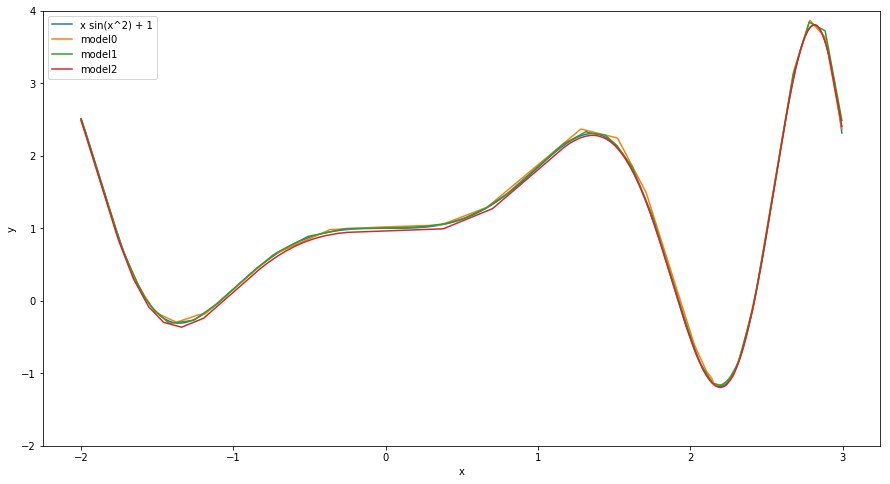

In [17]:
plt.figure(figsize=(15, 8))
plt.plot(source, target, label="x sin(x^2) + 1")
for i in range(3):
    plt.plot(source, pred[i], label="model"+str(i))
plt.xlabel('x')
plt.ylabel('y')
plt.ylim((-2, 4))
plt.legend(loc='best')
plt.show()

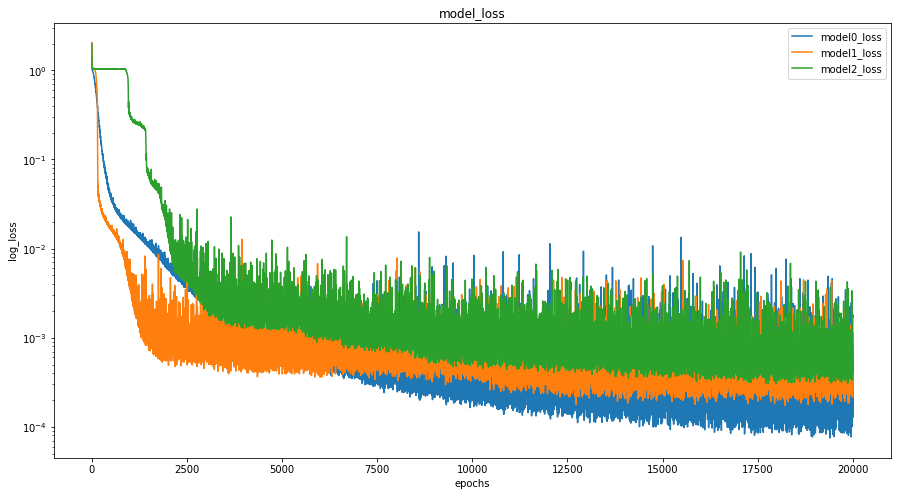

In [21]:
plt.figure(figsize=(15, 8))
for i in range(3):
    plt.semilogy(np.arange(0, nm_epochs), loss_summary[2-i], label="model"+str(i)+"_loss")
plt.xlabel('epochs')
plt.ylabel('log_loss')
plt.title('model_loss')
plt.legend(loc='best')
plt.show()